#  Dataset of LogP values without pH/T parameters

1. All standardized datasets have been merged, only rows where pH=NaN and T=NaN are left -> $13344$ molecules without duplicated SMILES-logP rows left
2. Strange molecules have been removed -> $12859$ molecules left ($12633$ unique SMILES)
3. Values of LogP out of range [-5, 10] have been removed -> $12854$ molecules left
4. Std of logP over all molecules without duplicates is $1.82$, most of the std of logP of each duplicated SMILES is in range $[0,1]$ (2 molecules excepted) -> SMILES with std of logP>$2$ have been removed, other logP was averaged ->**$12626$ rows is the final size of dataset**

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from rdkit import Chem
import sys
sys.path
sys.path.append('../scripts/preprocess')
from remove_strange_mols import remove_strange_mols

In [6]:
VALUE_COLUMN = "logP"
TEMPERATURE_COLUMN = "Temperature"
PH_COLUMN = "pH"
SMILES_COLUMN = "smiles"

In [23]:
DATASETS_PATH = Path("../data/2_standardize")

In [7]:
with os.scandir(DATASETS_PATH) as entries:
    datasets = dict([(entry.name, pd.read_csv(entry)) \
                     for entry in entries if entry.is_file() and '.csv' in entry.name])

In [8]:
all_data = pd.concat(datasets.values(), ignore_index=True, sort=False)

In [9]:
all_data.head()

smiles  logP    pH  Temperature
0  COc1ccccc1[C@@H]1CC(=O)Nc2cc(C)c(C)cc21  4.17   5.0          NaN
1     COc1ccc2c(c1)O[C@](O)(C(F)(F)F)CC2=O  2.79   5.0          NaN
2       CC(C)(C)C1(C)OC(C(N)=O)C(C(N)=O)O1  1.60   6.5          NaN
3  CCOc1cc(-c2nnc(-c3ccco3)o2)cc(OCC)c1OCC  3.96  10.5          NaN
4      C=C(c1ccc(N(C)C)cc1)c1ccc(N(C)C)cc1  5.30   7.3          NaN

In [11]:
# leave only rows with NaN in pH or Temperature
logp_without_parameters = all_data[np.logical_and(all_data[TEMPERATURE_COLUMN].isna().values,all_data[PH_COLUMN].isna().values)]

logp_without_parameters = logp_without_parameters.drop(columns=[TEMPERATURE_COLUMN, PH_COLUMN])

In [12]:
logp_without_parameters.describe()

logP
count  15709.000000
mean       1.997038
std        1.914550
min      -11.960000
25%        0.810000
50%        1.910000
75%        3.080000
max       46.420000

In [13]:
logp_without_parameters = logp_without_parameters.drop_duplicates()

In [14]:
logp_without_parameters.describe()

logP
count  13344.000000
mean       2.017883
std        1.938632
min      -11.960000
25%        0.810000
50%        1.920000
75%        3.100000
max       46.420000

In [4]:
def create_dataset(dataFrame, columns, filename, save_path = "../data/raw"):
    dataset = dataFrame[columns].dropna()
    dataset = dataset.drop_duplicates()
    initial_size = dataset.shape[0]
    dataset.to_csv(os.path.join(save_path, filename), index= False)
    remove_strange_mols(os.path.join(save_path, filename), os.path.join(save_path, filename))
    dataset = pd.read_csv(os.path.join(save_path, filename))
    return dataset, initial_size

In [15]:
logp_without_parameters, logp_init_size = create_dataset(logp_without_parameters, [SMILES_COLUMN, VALUE_COLUMN], 'logP_wo_params_remove_strange_mols.csv')

2020-07-08 12:24:58.258 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=CC(=O)C=CC1=O isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.262 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(P(c2ccccc2)c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.265 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(Cc1ccccc1)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.267 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(CC#N)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.269 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(Cc1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.271 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)C(C)=O isn't in the list of v

2020-07-08 12:24:58.325 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC(c1ccccc1)(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.326 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCS isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.327 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)Sc1ccccc1S2 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.328 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)=NO isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.329 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.330 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=CC(=NCl)C=C1 isn't in the list of very soluble

2020-07-08 12:24:58.367 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(O)C(C)(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.368 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccccn1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.369 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1ccncc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.370 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC/C=C/CO isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.370 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC1(C(=O)O)CCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.371 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CCO isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.3

2020-07-08 12:24:58.410 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(Cl)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.411 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCc1ccc(O)cc1O isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.412 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.412 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cc(O)cc(O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.414 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccccc1O isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.415 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)N/N=C/c1ccccc1 isn't in the list of very soluble in water molecul

2020-07-08 12:24:58.464 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc2ccccc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.465 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC(Cl)=Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.466 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(=O)c2[nH]cnc2n(C)c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.467 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)/C=C/c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.468 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=c1c(C)c(O)c(=C)c(C)c1O isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.469 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C(=C/c1ccccc1)\c1ccccc1 isn

2020-07-08 12:24:58.506 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNS(=O)(=O)c1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.507 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(C)c1cc(O)c(C)cc1O isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.508 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.509 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NN isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.510 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CCCCN1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.511 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(Cl)ccc1OCC(=O)O isn't in the list of very soluble in wat

2020-07-08 12:24:58.547 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.548 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(Cl)c1O isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.549 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.550 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.551 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCC(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.552 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)COc1ccc(Cl)cc1Cl isn't in the list of very soluble in wate

2020-07-08 12:24:58.589 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.590 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.591 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.592 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2nc3ccccc3cc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.593 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccccn1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.594 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1 isn't in the list of very soluble in water

2020-07-08 12:24:58.631 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.632 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.633 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)c1ccccc1O isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.634 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cc1c[nH]c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.634 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CC(C)(O)CCC=C(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.635 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(c1ccccc1)c1ccccc1 isn't in the list of very sol

2020-07-08 12:24:58.672 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.673 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1ccccc1N isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.674 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=Nc1c(O)ccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.675 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.675 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc2ccccc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.676 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cccc2ccccc12 isn't in the list of very soluble

2020-07-08 12:24:58.776 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=Nc1ccc(NO)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.779 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cccc(N)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.781 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.781 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1cccc(C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.782 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCC(COC(C)=O)OC(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.783 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)c1ccc(C(=O)O)cc1 isn't in the list of very soluble 

2020-07-08 12:24:58.863 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1cccc(C(C)C)c1O isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.864 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)OC(=O)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.867 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)/C=C/C(=O)OC isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.872 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CC(=O)OCCCC isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.877 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C1CCCCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.878 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1OCC(=O)O isn't in the list of very soluble in wat

2020-07-08 12:24:58.916 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.917 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(N)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.918 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc([N+](=O)[O-])cc1N isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.919 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.920 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1ccccc1C(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.920 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCC#N isn't i

2020-07-08 12:24:58.958 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.959 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CCC(=O)O)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O)C12C isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.960 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cl/C=C/Cl isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.961 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(Cl)[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.962 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(Cl)cc1N isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.963 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C)cc1N isn't in the list o

2020-07-08 12:24:58.999 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:58.999 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.000 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.001 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C(C)(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.002 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=O)(OC)OC=C(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.003 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClCC1CO1 isn't in the list of very soluble in water mol

2020-07-08 12:24:59.040 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccc(OC)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.041 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cnc2c1ncn2C1OC(CO)C(O)C1O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.042 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C(=O)c2ccccc2-c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.043 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(C)C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.044 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(=O)(O)c1ccc2ccccc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.045 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(OC)cc1 isn't in the

2020-07-08 12:24:59.082 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCC(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.083 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.084 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.084 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CC(O)(CC(=O)O)C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.085 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1[nH]c2ccccc2s1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.086 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in

2020-07-08 12:24:59.123 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)N isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.124 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1ccccn1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.125 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)OC(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.125 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCC(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.126 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC(F)(F)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.127 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:5

2020-07-08 12:24:59.165 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1cccc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.166 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.167 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)OCC(O)CO isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.167 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)COc1ccccc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.168 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccccc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.169 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCCCCCC isn't in the list of very soluble in water mo

2020-07-08 12:24:59.207 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.208 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.209 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.209 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccccc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.210 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.211 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-

2020-07-08 12:24:59.281 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC1=C(Cl)C2(Cl)C3C(Cl)C(Cl)CC3C1(Cl)C2(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.282 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=S)(OCC)Oc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.283 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.284 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC1=C(Cl)C2(Cl)C3C4C=CC(C4)C3C1(Cl)C2(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.285 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=S)(OCC)Oc1cc(C)nc(C(C)C)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.285 | DEBUG    | 

2020-07-08 12:24:59.321 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.322 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCC1(CC=C)C(=O)NC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.323 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(OCC(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.324 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CI isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.324 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(Cl)(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.325 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSSC isn't in the list of very soluble in water molecules
2020-07

2020-07-08 12:24:59.364 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(=O)c1ccncc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.364 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC12CCC3c4ccc(O)cc4CCC3C1CCC2=O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.365 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC12CCC(=O)C=C1CCC1C2CCC2(C)C(O)CCC12 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.366 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC12CCC(=O)C=C1CCC1C2CCC2(C)C1CCC2(C)O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.367 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC12CCC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.369 | DEBUG    | remove_strange_mols:check_not_stra

2020-07-08 12:24:59.406 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(C=O)C(O)O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.407 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(Cc1ccc(O)cc1)C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.408 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CNC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.409 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCO isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.409 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.411 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC1CCCCC1O isn't in the list of ve

2020-07-08 12:24:59.448 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NS(=O)(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.449 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)[nH]c(=NS(=O)(=O)c2ccc(N)cc2)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.450 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(c1ccccc1)C(O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.451 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCCCCCl isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.452 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.453 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)=CC=C(C)C isn't in the list o

2020-07-08 12:24:59.533 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2nc3ccccc3nc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.533 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(CSSCC(N)C(=O)O)C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.534 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C1C(=O)C(C(N)=O)C(=O)C2(O)C(=O)C3C(=O)c4c(O)ccc(Cl)c4C(C)(O)C3CC12 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.535 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC12C=CC(=O)C=C1CCC1C3CC(O)C(O)(C(=O)CO)C3(C)CC(O)C12F isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.536 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=CC(=O)N1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.537 | DEBUG    | remove_strange_mols:

2020-07-08 12:24:59.574 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(N)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.575 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.576 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C=O)ccc1O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.577 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccccc1C(=O)OC isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.578 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3CCC21C isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.578 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[As](O)(O)c1ccccc1 isn't in the lis

2020-07-08 12:24:59.618 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.619 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.620 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.621 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cccc(-c2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.622 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.623 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1c(Cc2c(O)oc3ccccc3c2=O)c(O)oc2ccccc12 isn't in

2020-07-08 12:24:59.662 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(c1ccccc1)c1ccccn1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.663 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCNCC=C isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.665 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CC(=O)OCC(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.666 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(C)C(=O)OCCCC isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.668 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(C)C(=O)OC(C)(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.670 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(C)C(=O)OC1CCCCC1 isn't in the list of very soluble in wat

2020-07-08 12:24:59.707 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(C)C(=O)OCC isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.708 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(C)C(=O)OCC(CC)CCCC isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.709 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(C)C(=O)OCCO isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.710 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC/C=C/C/C=C/CCCCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.711 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCC1CCC(=O)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.711 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC1CO1 isn't in the list of very soluble i

2020-07-08 12:24:59.749 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1cc(-c2ccccc2)oc2cccc(O)c12 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.788 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=Cc1ccc2c(c1)OCO2 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.790 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC12C(=COC(N)=O)c3c(O)c(N)c(C)c(O)c3N1CC1NC12 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.791 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1c2ccccc2cc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.793 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1cc(Br)c(Br)cc1Br isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.797 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1c

2020-07-08 12:24:59.856 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccncc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.857 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnccn1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.857 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(C)(COC(N)=O)COC(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.858 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(CCN)cc(OC)c1OC isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.859 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(CC)C(=O)NCC(C)C1=O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.860 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cccc(C(F)(F)F)c1 isn't in the list 

2020-07-08 12:24:59.897 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(Nc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.897 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)C(=O)c1cccc(C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.898 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.899 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule BrCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.900 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.901 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)c1cc(O)c(O)c(O)c1 isn't

2020-07-08 12:24:59.949 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.950 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc(C(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.951 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=S)Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.952 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1c(S(=O)(=O)O)ccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.953 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.954 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Oc1c

2020-07-08 12:24:59.990 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCC(N)C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.991 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1CCN(C)CC1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.991 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(O)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.992 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCNC isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.993 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:24:59.994 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in wat

2020-07-08 12:25:00.049 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CC(=O)OCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.050 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(/C=C/c1ccccc1)OC/C=C/c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.051 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)CCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.052 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1cccc(C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.053 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C1CCCN1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.054 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C1CC(O)CN1 isn't in the list of very so

2020-07-08 12:25:00.116 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C=NO isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.122 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1cc2c(cc1Cl)NCNS2(=O)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.125 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc(Br)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.130 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(O)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.135 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.142 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1ccccc1O isn't in the list of very soluble in water molec

2020-07-08 12:25:00.202 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CCCCCCCN1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.203 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCCCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.204 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C=Cc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.205 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc2c(C)cccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.206 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccc2ccccc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.207 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cccc2ccccc12 isn't in the list of very soluble in water m

2020-07-08 12:25:00.247 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=I(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.248 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)ncn1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.249 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCCC=C isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.249 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(O)CC isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.250 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1cc([N+](=O)[O-])cc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.251 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1cccc(CCl)c1 isn't in the list of very soluble in wate

2020-07-08 12:25:00.295 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CC(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.296 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.297 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.298 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCC(O)c1ccc(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.299 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.300 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNCCNCC isn't in the list of very soluble in water molecules
2020-07-08 12:2

2020-07-08 12:25:00.344 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccccc1CO isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.345 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.346 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccccc1C#N isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.347 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc([N+](=O)[O-])cc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.348 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1CO isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.349 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(N)c(C)c1 isn't in the list of very soluble in wat

2020-07-08 12:25:00.397 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOC(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.397 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NCC(O)c1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.398 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1c2c([nH]c3ccccc13)CCCC2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.399 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=Nc1ccc(-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.400 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1[nH]ccc2c1[nH]c1cc(=O)ccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.401 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2ncncc2c1 isn't in 

2020-07-08 12:25:00.439 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.440 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1c(CCS(=O)c2ccccc2)c(O)n(-c2ccccc2)n1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.441 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccccc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.442 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(CC(=O)O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.442 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(N)Cc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.443 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC1COC(O)C(O)C1O i

2020-07-08 12:25:00.482 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-c2c[nH]nn2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.483 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1nc[nH]n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.484 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.485 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1ccn(C2CC(O)C(CO)O2)c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.486 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cnc2c1ncn2C1CC(O)C(CO)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.487 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CNc1

2020-07-08 12:25:00.536 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)Cc1c-2ccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.537 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)Cc1cc3ccccc3cc1-2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.538 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)-c1cccc3c1c-2cc1ccccc13 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.539 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)c1cccc3ccc4cccc2c4c31 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.540 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2cc3c(ccc4c5ccccc5ccc34)cc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.541 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 -

2020-07-08 12:25:00.582 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1CC(OC2CCC3(C)C(CCC4C3CCC3(C)C(c5coc(O)c5)C(OC(C)=O)CC43O)C2)OC(C)C1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.583 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(c2ccccc2)CCC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.584 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cc(-c2ccccc2)ccc1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.585 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(=O)c2[nH]c(=O)[nH]c2n(C)c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.585 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(C(F)(F)F)C(F)(F)F isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.586 | DEBUG    | remove_strange_mols:

2020-07-08 12:25:00.673 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ncc[nH]c1=NS(=O)(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.674 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)S(=O)(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.675 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C1CN2CCC1CC2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.676 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC[Si](C)(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.676 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C1C2CCC(O2)C1C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.678 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCN=C(N)N=C(N)N isn't in the

2020-07-08 12:25:00.715 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)c1cc(O)c(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.716 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)CCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.716 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(C(=O)O)c1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.717 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CC(=O)NCCN(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.718 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.719 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNS(=O)(=O)c1ccc(N)cc1 isn't in the list of very solub

2020-07-08 12:25:00.756 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCc1c[nH]c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.757 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ncccn1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.758 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(O)/C=C/C1C(O)CC(=O)C1CCCCCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.759 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(O)/C=C/C1C(O)CC(=O)C1C/C=C/CCCC(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.759 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCNC isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.760 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOC(N)=O isn't in th

2020-07-08 12:25:00.821 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cccc(Cl)c1F isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.822 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1c(F)cccc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.822 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Nc1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.823 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)COc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.824 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCN=C=S isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.825 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1ccc(N=C=S)cc1 isn't in the list of 

2020-07-08 12:25:00.863 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1ccc2c3c1OC1C(OC(C)=O)C=CC4C(C2)N(C)CCC341 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.866 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1ccnc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.868 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(CO)cnc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.869 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCOC(=O)c1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.870 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])N1CN([N+](=O)[O-])CN([N+](=O)[O-])C1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.870 | DEBUG    | remove_strange_mols:check_not_strange

2020-07-08 12:25:00.906 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1ccc(Br)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.907 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.921 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClCC(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.924 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cccc2ncccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.928 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccccc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.931 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21 isn't in the list of very soluble in water mo

2020-07-08 12:25:00.973 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN(CCCl)C(=O)NCCCl isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.974 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(Cl)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.975 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccnnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.976 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1nc(Br)c(Br)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.977 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)/N=N/c1cccc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:00.978 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(=O)[nH]c(=O)c2[nH]cnc21 

2020-07-08 12:25:01.014 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCCC[N+](C)(C)CCS(=O)(=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.015 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC[N+](C)(C)CCCS(=O)(=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.017 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCC[N+](C)(C)CCCS(=O)(=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.021 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCC[N+](C)(C)CCCS(=O)(=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.026 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCC[N+](C)(C)CCCS(=O)(=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.028 | DEBUG    | remove_strange_mols:check_not_s

2020-07-08 12:25:01.067 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(Cc1ccc(OC)cc1)=NC=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.069 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(Cc1ccc2c(c1)OCO2)=NC=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.070 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(Cc1ccccc1)=NC=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.071 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(Cc1cccc([N+](=O)[O-])c1)=NC=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.071 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(Cc1ccc([N+](=O)[O-])cc1)=NC=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.072 | DEBUG    | remove_strange_mols:check_not_strange_m

2020-07-08 12:25:01.107 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N[Pt]1(N)OC(=O)C2(CCC2)C(=O)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.108 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1O[Pt]2(N[C@@H]3CCCC[C@H]3N2)OC1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.109 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1O[Pt]2(N[C@H]3CCCC[C@@H]3N2)OC1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.110 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cl[Pt]1(Cl)(Cl)(Cl)NCCN1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.111 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N[Pt]1(N)OC(=O)C2(CCC2)C(=O)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.112 | DEBUG    | remove_strange_mols:check_not_strange_mols:45

2020-07-08 12:25:01.204 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(=O)NC1CCC(=O)O[Pt]2(N[C@@H]3CCCC[C@H]3N2)OC1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.205 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CCC(NC(=O)OCc2ccccc2)C(=O)O[Pt]2(N[C@@H]3CCCC[C@H]3N2)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.206 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CCC(N2C(=O)c3ccccc3C2=O)C(=O)O[Pt]2(N[C@@H]3CCCC[C@H]3N2)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.207 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(CC2(Cc3cccc(OC)c3)C(=O)O[Pt]3(N[C@@H]4CCCC[C@H]4N3)OC2=O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.208 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1O[Pt]2(N[C@@H]3CCCC[C@H]3N2)OC(=O)C1(Cc1ccc

2020-07-08 12:25:01.244 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc2c(cc1OC)N[Pt](Cl)(Cl)N2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.245 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc2c(cc1Cl)N[Pt](Cl)(Cl)N2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.246 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCC(=O)O[Pt]12(Cl)(N[C@@H]3CCCC[C@H]3N1)OC(=O)C(=O)O2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.247 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(=O)O[Pt]12(Cl)(N[C@@H]3CCCC[C@H]3N1)OC(=O)C(=O)O2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.248 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)O[Pt]12(Cl)(N[C@@H]3CCCC[C@H]3N1)OC(=O)C(=O)O2 isn't in the list of very soluble in water molecules
2020-07-08 1

2020-07-08 12:25:01.283 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)O[Pt]1(N)(N)(OC(C)=O)OCC(=O)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.285 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N[Pt]1(N)(OC(=O)C(F)(F)F)(OC(=O)C(F)(F)F)OCC(=O)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.285 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)O[Pt]1(N)(N)(OC(=O)CC)OCC(=O)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.286 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(=O)O[Pt]1(N)(N)(OC(=O)CCCCC)OCC(=O)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.287 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N[Pt]1(N)(OC(=O)CCC(=O)O)(OC(=O)CCC(=O)O)OCC(=O)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.28

2020-07-08 12:25:01.344 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN[Pt](Cl)(Cl)(NCC)(OC(=O)CCC(=O)NC1CCCC1)OC(=O)CCC(=O)NC1CCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.345 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOC(=O)CCC(=O)O[Pt](Cl)(Cl)(NCC)(NCC)OC(=O)CCC(=O)OCCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.345 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN[Pt](Cl)(Cl)(NCC)(OC(=O)CCC(=O)OCC)OC(=O)CCC(=O)OCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.346 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN[Pt](Cl)(Cl)(NCC)(OC(=O)CCC(=O)O)OC(=O)CCC(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.347 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN[Pt](Cl)(Cl)(NCC)(OC(=O)CCC(=O)OC(C)C)OC(=O)CCC(=O)OC(C)C isn't in 

2020-07-08 12:25:01.383 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1NC(=O)C(=O)C(=O)N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.384 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCC(O)c1oc(O)c(O)c1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.384 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCC1OC(O)C(O)C(O)C1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.385 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1[nH]cc(Br)c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.390 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1[nH]cc(F)c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.396 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1cc(Cl)cc(Cl)c1 isn't in t

2020-07-08 12:25:01.453 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c2cc(Cl)ccc2o1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.454 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(CNC(N)=O)C[Hg]Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.455 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCN1CCC23c4c5ccc(O)c4OC2C(O)C=CC3C1C5 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.456 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(Cc1ccccc1)C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.457 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cccc(C(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.458 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)OC1(c2ccccc2

2020-07-08 12:25:01.495 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.496 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC(F)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.497 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC(F)F isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.498 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CO1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.498 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC(F)(F)Br isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.499 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC(Cl)(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.500 | DEBUG    | re

2020-07-08 12:25:01.535 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1ccccc1C(=O)OCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.536 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)c1ccccc1C(=O)OCCCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.537 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOC(=O)c1ccccc1C(=O)OCCCCCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.538 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCCCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.538 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CN(C)C)CN1c2ccccc2Sc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.539 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - 

2020-07-08 12:25:01.575 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(N)cc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.576 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(N)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.577 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.578 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.579 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccs1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.580 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]ccs1 isn't in the list of very soluble in water molecules
2020-0

2020-07-08 12:25:01.617 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClCCCl isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.617 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.618 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.619 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.620 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1cccc(Br)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.621 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cncc(C)

2020-07-08 12:25:01.658 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc2c(c1)C(=O)c1ccccc1C2=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.659 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.660 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c(=O)c2ncn(C3OC(CO)C(O)C3O)c2[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.661 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cc2c(S(=O)(=O)O)cc(S(=O)(=O)O)cc2cc1S(=O)(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.662 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CC1CN2CCC1CC2C(O)c1ccnc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.663 | DEBUG    | remove_strange

2020-07-08 12:25:01.700 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)sc1ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.701 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1c2c(c(O)n1SC(Cl)(Cl)Cl)CC=CC2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.701 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1c2ccccc2C(=O)N1SC(Cl)(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.702 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCOC(=O)c1ccc(N)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.703 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCC(O)C(O)C(O)C(O)CO isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.704 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c(

2020-07-08 12:25:01.759 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)ccc1c3ccccc3ccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.760 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)ccc1c3ccsc3ccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.761 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)ccc1cc3ccc4ccccc4c3cc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.762 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)ccc1cc3ccc4ccccc4c3nc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.763 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2nc3ccc4ccccc4c3cc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.764 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mo

2020-07-08 12:25:01.803 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC(F)(F)C(F)(F)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.804 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(S(=O)(=O)c2ccc(F)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.805 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)n1c(=O)[nH]c(C)c(Br)c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.806 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cc(C)c(N(C)C)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.807 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC(F)(F)c1cccc2cccnc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.807 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC1C=C

2020-07-08 12:25:01.844 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1nc2ccccc2s1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.845 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(c1ccccc1)c1c(O)c2ccccc2oc1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.846 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)N(c1ccccc1)C1CCN(CCc2ccccc2)CC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.847 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1ccccc1F isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.848 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.849 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - Th

2020-07-08 12:25:01.895 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1cncc(C2CCCN2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.896 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)COC2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.897 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)CCO2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.897 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1cc2ccccc2o1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.898 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1ccocc1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.899 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(Br)C(=O)NC(N)=O isn't in the list of very soluble in water

2020-07-08 12:25:01.938 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC=CCl isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.939 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CCN isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.940 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.940 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC=CCCl isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.941 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCl isn't in the list of very soluble in water molecules
2020-07-08 12:25:01.942 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CCO[N+](=O)[O-] isn't in the lis

2020-07-08 12:25:02.014 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1C(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.015 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.016 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1cnc2ccccc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.016 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc2nc3ccccc3cc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.017 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc2cc3ccccc3nc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.018 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-c2ccncc2)nc1 isn't in the list of very soluble 

2020-07-08 12:25:02.054 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.055 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.056 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccccc1Br isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.057 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1ccoc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.058 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1ccco1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.059 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1nc2ccccc2s1 isn't in the list of very soluble in 

2020-07-08 12:25:02.094 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.096 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])OCCO[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.098 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCl isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.100 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOCCOCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.102 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C1=CC=CC=CC=C1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.103 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1OC(OC2CCC3(C=O)C4CCC5(C)C(c6coc(O)c6)CCC5(O)C4CCC3(O)C2)CC(O)C1O isn't in

2020-07-08 12:25:02.141 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC(Cl)(Cl)Sc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.142 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.142 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1ccccc1F isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.143 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nc([N+](=O)[O-])cn1CCO isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.144 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.145 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=Cc1ccccc1)[N+](=O)[O-] isn't in the lis

2020-07-08 12:25:02.182 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(C2NCCS2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.183 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=S)NN=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.184 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-c2nc3ccccc3o2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.185 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1[nH]c(=O)[nH]c(=O)c1N(CCF)CCCl isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.186 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON(C)C(=O)Nc1cccc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.186 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mole

2020-07-08 12:25:02.250 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cl)c(Cl)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.252 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1cc(-c2ccccc2)o[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.253 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.253 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCCn1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.254 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.255 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)CCc1ccccc1 isn't in the list of v

2020-07-08 12:25:02.310 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1[nH]c(-c2ccccc2)nc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.313 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1Nc2ccccc2CC1c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.317 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC1=C(Cl)C2(Cl)C3C4OC4C(Cl)C3C1(Cl)C2(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.321 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=NS(=O)(=O)c2cc(S(N)(=O)=O)c(Cl)cc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.324 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CCCc1ccc(N(CCCl)CCCl)cc1)O[Na] isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.325 | DEBUG    | remove_strange_mols:check_not_s

2020-07-08 12:25:02.361 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cc(=NS(=O)(=O)c2ccc(N)cc2)[nH]c(OCC)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.362 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1C(O)C(C)OC(OC2CCC3(C=O)C(CCC4C3CCC3(C)C(c5coc(O)c5)CCC43O)C2)C1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.363 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=O)(C=C(Cl)Cl)OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.364 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(C)C(=O)OCCCOC(=O)C(=C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.365 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccco1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.365 | DEBUG    | remove_strange_mols:check_not_st

2020-07-08 12:25:02.402 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1noc(-c2ccccn2)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.403 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC1CCCCC1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.404 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC[Sn](Cl)(CCCC)CCCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.405 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC[Sn](Br)(CCCC)CCCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.406 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=O)NS(=O)(=O)c1ccc(C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.407 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(C)c(C)c(C)c1 isn't in the li

2020-07-08 12:25:02.442 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(C)(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.443 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccc(C)c(C)c1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.444 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc(CCl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.445 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1ccc(OCC(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.446 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cc2ccccc2o1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.447 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=CC(C)(C)S(C)(=O)=O isn't in the list o

2020-07-08 12:25:02.484 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(O)OC(=O)c2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.485 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCOP(C)(=O)OCCCCCCCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.486 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(Oc2ccc(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.487 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(Oc2c(Cl)cc(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.488 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1NCN(c2ccccc2)C12CCN(CCCC(c1ccc(F)cc1)c1ccc(F)cc1)CC2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.489 | DEBUG    | remove_strange_mols:ch

2020-07-08 12:25:02.552 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.553 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(CCC(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.554 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCSC(=O)N(CCC)CCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.555 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc(C(Cl)(Cl)Cl)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.555 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Cc1ccccc1)Nc1cccc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.556 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)CC(=O)CCCC isn'

2020-07-08 12:25:02.632 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC=CC#CC#CC#CC=CC(Cl)CO isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.633 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(=O)(CF)Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.634 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cn[nH]c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.635 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCNc1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.636 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1cccc(OCC(=O)O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.637 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C

2020-07-08 12:25:02.692 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.693 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.694 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=O)(NCC(C)C)Oc1cc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.695 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=O)(NC(C)(C)C)Oc1cc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.696 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(N)(=O)Oc1cc(Cl)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.697 | DEBUG    | remove_strange_mols:check_not_strange

2020-07-08 12:25:02.733 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1[nH]cc(O)n1Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.734 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N(C(=O)SCC(Cl)=CCl)C(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.735 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N(C(=O)SCC(Cl)=C(Cl)Cl)C(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.736 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(Oc2ccc([N+](=O)[O-])cc2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.737 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(C)C(=O)Nc1ccc(C)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.738 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mol

2020-07-08 12:25:02.773 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1c2c(c(O)n1SC(Cl)(Cl)C(Cl)Cl)CC=CC2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.774 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1ccc(C)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.775 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOCC1CO1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.776 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)ON=Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.777 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1nccnc1C(=O)OCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.778 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)C(=O)Cc1ccccc1 isn't i

2020-07-08 12:25:02.815 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1c2ccccc2C(=O)c2c1ccc1ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.815 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(N=O)C(C)(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.816 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1cc[n+]([O-])c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.817 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(OCC)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.818 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(C)(=O)SCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.818 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)P(C)(=O)N(C)C isn't in the lis

2020-07-08 12:25:02.855 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.856 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NCC(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.857 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(Cl)ccc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.857 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)OCc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.858 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)P(=O)(N(CC)CC)N(CC)CC isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.859 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1ccc2c(c1)N(CCCN1CCC(O)CC1)c1ccccc1

2020-07-08 12:25:02.896 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCn1cnc2c(=N)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.897 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccccc1NC(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.898 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccc(C(C)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.899 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1[nH]ccs1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.900 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCC(C)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.901 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCC(CCCCC)c1ccccc1 isn't in t

2020-07-08 12:25:02.938 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC1=NS(=O)(=O)c2cc(S(N)(=O)=O)c(Cl)cc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.938 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCCCc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.939 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCCCc1ccccn1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.940 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1NC(Cc2ccccc2)C(=O)NC1Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.941 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1c(C)cccc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.942 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(N)c2c(c1N)C(=O)c1cccc

2020-07-08 12:25:02.981 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCCCCc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.982 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNCc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.983 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc(CO)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.983 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=Cc1ccc(O)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.984 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CSCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:02.985 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1C1=NCC(=O)Nc2ccc(Cl)cc21 isn't in the list of v

2020-07-08 12:25:03.021 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCC1(CCCC)C(=O)NC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.021 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NC(=O)NS(=O)(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.022 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cnccn1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.023 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.024 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1ccc([N+](=O)[O-])n1CCO isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.025 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc

2020-07-08 12:25:03.098 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCC(O)c1ccc(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.099 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)OCC1OC(n2cc(F)c(=O)[nH]c2=O)CC1OC(=O)CCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.100 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1sc2c(=O)c3ccccc3c(=O)c=2sc1C#N isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.101 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=c1sscc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.102 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ssc(=S)c1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.103 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(=S

2020-07-08 12:25:03.143 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=NC(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.144 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)c1ccc(O)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.145 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-c2cccc(-c3ccccc3)n2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.146 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1ccc(SC)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.147 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc(Cl)c(Cl)c1)Nc1cc(Cl)ccc1Oc1ccc(Cl)cc1S(=O)(=O)O[Na] isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.148 | DEBUG    | remove_strange_mols:check_not_str

2020-07-08 12:25:03.185 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC1=C(Cl)C2(Cl)C3C(Cl)C(Cl)(Cl)CC3C1(Cl)C2(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.185 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=S)(OCC)Oc1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.187 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C(=O)C(Cl)Cl)c1ccc(OC(=O)c2ccco2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.188 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N(CCC(C(N)=O)(c1ccccc1)c1ccccn1)C(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.189 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1cccc(Oc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.189 | DEBUG    | remove_strange_mols:che

2020-07-08 12:25:03.227 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NCC(O)c1ccc(NS(C)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.228 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1ccccc1I isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.229 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cccc(OC(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.230 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1ccccc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.230 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1cccc(OC)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.231 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1ccc(OC)cc1 isn't in the

2020-07-08 12:25:03.269 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cn1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.270 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)Cn1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.271 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCCn1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.271 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCSc1nc(=NC(C)C)[nH]c(=NC(C)C)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.272 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccc(O)c(C(C)(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.273 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(NC2=NCCN2)

2020-07-08 12:25:03.345 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(Cn2ccnn2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.346 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.347 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccccc1C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.347 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(O)c(CO)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.348 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(CCC(C)C)C(=O)NC(=S)NC1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.349 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1ccc[nH]c1=Nc1cccc(C(F

2020-07-08 12:25:03.384 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCC(CCCCC)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.385 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCC(CCCC)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.386 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=S)c1ncccn1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.387 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(N=c1[nH]cnc2c1ncn2C1OC(CO)C(O)C1O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.388 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c(=N)c2ncn(C3CC(O)C(CO)O3)c2[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.389 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule

2020-07-08 12:25:03.425 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cncc(Cl)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.426 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cncc(OC)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.427 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2nc(N3CCNCC3)ccc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.428 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(Oc1ccccc1)C(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.429 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.430 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(Oc2ccccn2)cc1 isn't

2020-07-08 12:25:03.469 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc2cccnc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.470 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc2sccc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.472 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=Nc1ccc(O)c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.472 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1ccc2cccnc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.473 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nonc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.474 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2sc(SN(C3CCCCC3)C3CCCCC3)nc2c1 isn't in the list of

2020-07-08 12:25:03.511 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCC1CC2CCC1C2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.512 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.513 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CONC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.514 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)CNC(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.515 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc2ncccc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.515 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCCCCc1cc

2020-07-08 12:25:03.596 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)OCc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.597 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(CN1CCCC1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.598 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc2c(c1)oc1c(Cl)cccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.599 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(=O)c2c([nH]c(=O)n2C)n(C)c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.600 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(F)cc(C(F)(F)F)c1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.601 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1=C(C)C(=

2020-07-08 12:25:03.638 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(O)c2ncccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.639 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C(=O)O)(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.640 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)c2c(c1)=C(c1ccccc1)NCC(=O)N=2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.641 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc2c(c1)=C(c1ccccc1)NCC(=O)N=2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.642 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN1C(=O)CN=C(c2ccccc2)c2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.642 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - Th

2020-07-08 12:25:03.679 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC1CC2CCC1C2O isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.680 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cc(Cl)ccc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.681 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1[nH]c(=O)n(C(C)(C)C)c(=O)c1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.682 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nccnc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.682 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN=c1[nH]c(Cl)nc(=NC(C)(C)C)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.683 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(=O)c1ccc(Br)cc1 isn't in the 

2020-07-08 12:25:03.719 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cnccn1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.719 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(Cl)ccc1N=CN(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.720 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)Nc1cccc(OCC(=O)O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.721 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(C(=O)OCC)=C(C(=O)OCC)C(=O)OCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.722 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C=C[N+](=O)[O-])ccc1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.722 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N=c1[nH]c

2020-07-08 12:25:03.768 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc(Oc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.769 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCOc1ccccc1OCC(O)CNC(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.770 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(=O)oc2c1ccc1occc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.771 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1NC(=O)C(c2ccccc2)C1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.772 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(=O)cnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.773 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1cnc2ccccc2[nH]1 i

2020-07-08 12:25:03.810 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1ccc(OCC(O)CNC(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.811 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cccc(OCC(O)CNC(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.812 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C1CCC2=NCCCN2CC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.813 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.813 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.814 | DEBUG    | remove_strange_mol

2020-07-08 12:25:03.911 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(N)ccc1Br isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.912 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(C(=O)N(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.913 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c(Cl)c(Cl)cc(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.913 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C(=O)N(C(C)C)C(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.914 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.915 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(O)n1-c1ccc(Cl)cc1 isn't in th

2020-07-08 12:25:03.965 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccccc1)c1ccc(C(=O)Nc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.966 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCN1CCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.967 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Nc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.968 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Nc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.969 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(NC(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:03.969 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc

2020-07-08 12:25:04.008 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cc(Cc2ccccc2)c(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.009 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CC(=O)O)CC(=O)c1ccc(-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.010 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ON=C(O)Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.011 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc2c(c(OC)c1O)-c1ccc(OC)c(=O)cc1C(NC(C)=O)CC2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.012 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.012 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-07-08 12:25:04.058 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(COc1ccc(Cl)cc1Cl)O[Sn](c1ccccc1)(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.060 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule II isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.063 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc2cncnc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.066 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C=C[N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.072 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C1CCCCC1)C1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.074 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccc(C2C(=O)c3ccccc3C

2020-07-08 12:25:04.115 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)c1cccc(OC(=O)NC)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.116 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCCCn1cc(C(O)O)cc1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.117 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC=CCCl isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.117 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC=CCCl isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.118 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(CS)C(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.119 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C(=O)C=CN2CC=CC2)cc(OC)c1OC isn't in the list of 

2020-07-08 12:25:04.155 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CC(C#N)=C(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.156 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)COc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.157 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CCCOc1ccc(Cl)cc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.158 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)=CC1C(C(=O)OCc2coc(Cc3ccccc3)c2)C1(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.159 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=CCC(C(C)(C)O)CC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.160 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c

2020-07-08 12:25:04.236 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOC(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.237 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)Nc1cccc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.238 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClCC(Cl)(Cl)CCl isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.238 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccoc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.239 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C[Si](C)(C)c1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.240 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(NC(=S)Nc1ccccc1)C(=O)c1ccccc1 isn't in th

2020-07-08 12:25:04.293 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1cn2nc(OP(=S)(OCC)OCC)cc2nc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.294 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=NS(=O)(=O)c2cc(Br)ccc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.294 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C1=NS(=O)(=O)c2cc(Cl)ccc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.295 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=C(C2CC2)Nc2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.296 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=CCC2C(C1)C2(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.297 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The

2020-07-08 12:25:04.333 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)Cc1ccsc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.333 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC=NN(C(=O)c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.334 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC(F)OC(F)(F)C(F)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.335 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)c1nc2ccccc2o1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.336 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(CCO)c1nc(=Nc2ccc(C=Cc3ccc(N=c4[nH]c(N(C)CCO)nc(=Nc5ccccc5)[nH]4)cc3S(=O)(=O)O[Na])c(S(=O)(=O)O[Na])c2)[nH]c(=Nc2ccccc2)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.337 | DEBUG   

2020-07-08 12:25:04.373 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=c1ssc2c1CCCC2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.374 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(c1ccc(Cl)cc1)(c1ccc(Cl)cc1)C1CC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.374 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)CC(=O)CCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.375 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc2c1c([N+](=O)[O-])cc[n+]2[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.376 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc2c([N+](=O)[O-])cc[n+]([O-])c12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.377 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N

2020-07-08 12:25:04.414 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=NS(=O)(=O)c2ccc(Cl)cc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.414 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1=NS(=O)(=O)c2ccc(Cl)cc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.415 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)CS(=O)(=O)c1ccc(Cl)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.416 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(O[Na])cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.417 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=c1cc(Cc2ccccc2)ss1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.418 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-08 12:25:04.454 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccnc2c(O)ccc(C)c12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.455 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cnc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.456 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)CCC(C)(C)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.457 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)c2oc(=O)sc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.458 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CCN(N=O)CC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.458 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC(Cl)C(Cl)C(Cl)Cl isn't in the list of very solu

2020-07-08 12:25:04.495 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C=C(C(C)=O)C(C)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.495 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C=C(C(C)=O)C(C)=O)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.496 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1cccc(F)c1)C(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.497 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1ccccc1Cl)C(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.498 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1cccc(Cl)c1)C(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.499 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The

2020-07-08 12:25:04.536 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N=c1ccn(C2OC(COC(C)=O)C(OC(C)=O)C2OC(C)=O)c(=O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.537 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1nccnc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.537 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1nccnc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.538 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C(N)NC(=O)Nc1cccc([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.540 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])OC1COC2C(O)COC12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.541 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molec

2020-07-08 12:25:04.577 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCn1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.578 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCn1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.579 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCn1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.580 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.580 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.581 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CCC2(O)C3Cc4ccc(O)c5c4C2(CCN3CC2CC2)C1O5 isn't in the list 

2020-07-08 12:25:04.617 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(NC(=O)NNC(C)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.618 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NNC(=O)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.619 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.620 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(Sc1ccccc1)Sc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.621 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=NCc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.622 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1ccccc

2020-07-08 12:25:04.692 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1nc(-c2ccccc2)c2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.693 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1nonc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.694 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1no[nH]c1=N isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.695 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COP(=O)(OC)Oc1ccc([N+](=O)[O-])cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.696 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOC(=O)NC isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.697 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)NN isn't in the list of very soluble i

2020-07-08 12:25:04.732 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)OCC2OC3(C(=O)O)OC(C)(C)OC3C2O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.733 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(Cc2nn[nH]n2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.734 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(COc1ccccc1)N1CCOCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.735 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1cn[nH]c2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.736 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CC12COC(=O)C(=C)C1C1OC(=O)C(=C)C1C(O)C2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.737 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CO

2020-07-08 12:25:04.773 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NC(=O)c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.774 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.775 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.776 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.777 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.778 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])C=Cc1ccc(Cl)cc1Cl isn't in the list of very so

2020-07-08 12:25:04.814 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)Cc1cccs1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.814 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.815 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=CNc2ccc(Cl)cc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.816 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S1(=O)N=CNc2cc(Cl)ccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.817 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC1CCc2ccccc2C1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.818 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=S)NN=Cc1ccc(O)cn1 isn't in the list of 

2020-07-08 12:25:04.854 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C(CC(Cl)(Cl)Cl)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.855 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=C1C(=O)OC2C1C(OC(=O)C(C)=CC)CC(=C)C1C(O)C3OC3(C)C21O isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.856 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CCl)Nc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.857 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.858 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCNCc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.859 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N(Cc1ccc

2020-07-08 12:25:04.966 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1cc[nH]nc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.966 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(C=CC(C)=O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.967 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C=Cc1cccc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.968 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C=Cc1ccccc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.969 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)cc(OC2OC(CO)C(O)C(O)C2O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:04.970 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C(C)C)c(OC2OC(CO)C(O)C(O)C2

2020-07-08 12:25:05.014 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCCC(=O)Nc1c(C)cccc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.016 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(C)c1NC(=O)CN(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.019 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1C(OC(C)=O)CC(=O)OC(C)C=CC=CCC(=O)C(C)CC(CC=O)C1OC1OC(C)C(OC2CC(C)(O)C(OC(=O)CC(C)C)C(C)O2)C(N(C)C)C1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.020 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.021 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCc1nc(-c2ccccc2)c(-c2ccccc2)o1 isn't in the list of very soluble in water molecules
2020-07-

2020-07-08 12:25:05.066 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1cnc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.067 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c(C=Cc2ccc([N+](=O)[O-])o2)no1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.068 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc([N+](=O)[O-])c(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.069 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1ccc(C(=O)OC)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.069 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cc(OC)c(CC(C)N)cc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.070 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-08 12:25:05.106 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)C(C)NC(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.107 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)NN isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.108 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)c1cccc(Br)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.109 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(c1ccccc1)c1ccc(NS(=O)(=O)C(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.110 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(c1ccccc1)c1cccc(NS(=O)(=O)C(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.111 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)c1cc(

2020-07-08 12:25:05.146 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1ccc2c(c1)C(c1ccccc1)=NCC(=O)N2C isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.147 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(N)C(O)C(C)O1)CC(O)(C(=O)CO)C=4 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.148 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N1CCOC(c2ccccc2)C1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.149 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule S=C=Nc1ccc(Nc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.150 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC=CC#CC=C1C=CC(=O)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.151 | DEBUG    | remove_strange_mols:chec

2020-07-08 12:25:05.203 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnc([N+](=O)[O-])n1CCO isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.203 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOC(=O)c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.204 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[PH](=O)(O)CN(CCCCCCN(C[PH](=O)(=O)O)C[PH](=O)(=O)O)C[PH](=O)(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.205 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cncc(Cl)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.206 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1ccc(OCC)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.207 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - Th

2020-07-08 12:25:05.299 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOP(=S)(OCCC)SCC(=O)N1CCCCC1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.300 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)N=C(N=c2[nH]cc([N+](=O)[O-])s2)OC1(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.301 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1c[nH]c(=NC2=NCCO2)s1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.302 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cnc(N=C2OCCN2CCO)s1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.303 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cnc(N=C2SCCN2CCO)s1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.303 | DEBUG    | remove_strange_mols:check_no

2020-07-08 12:25:05.353 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=c1nc(C(Cl)(Cl)Cl)nc(C)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.354 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)C1CCCN1C(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.355 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CC)COC(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.356 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Br)c(Cc2c[nH]c(=N)[nH]c2=N)cc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.357 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccncn1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.358 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)cc(Oc2ccccc2)c1 i

2020-07-08 12:25:05.394 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)C(O)C(N=[N+]=[N-])C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1(C)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.395 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule BrC=CBr isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.395 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Cl)c(-c2cc(Cl)c(Cl)cc2Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.396 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=S)NC12CC3CC(CC(C3)C1)C2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.397 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-c2csnn2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.398 | DEBUG    | remove_st

2020-07-08 12:25:05.433 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccccc1OP(=O)(Oc1ccccc1)Oc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.434 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)Oc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.435 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(OCC)Oc1ccc(SC)cc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.436 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=S)(OCC)Oc1ccc(SC)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.437 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCn1sccc1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.438 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C

2020-07-08 12:25:05.514 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.515 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.515 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)CS(=O)(=O)c1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.516 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1cncnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.517 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)CNc1ccccc1C(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.518 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - T

2020-07-08 12:25:05.554 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C#N)=NNc1ccc(C(F)(F)F)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.555 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C#N)=NNc1ccc(SC(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.556 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C(C#N)=NNc1cc(C(F)(F)F)ccc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.557 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C(C#N)=NNc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.558 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C(C#N)=NNc1ccccc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.559 | DEBUG    | remove_strange_mols:check_not_stran

2020-07-08 12:25:05.596 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccccc1OC(=O)N(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.597 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)c1nc(C)cc(OP(=S)(OC)OC)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.598 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(=O)c1ccnc(I)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.599 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1nc(-c2ccccc2[N+](=O)[O-])[nH]c(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.600 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1nc(-c2cccc([N+](=O)[O-])c2)[nH]c(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.600 | DEBUG    | remove_strange_mols:check_not_strange_mo

2020-07-08 12:25:05.639 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1NC(=O)N(Cc2ccccc2)C1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.640 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)OCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.641 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccccc1-c1nc(=N)[nH]c(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.642 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1nc(-c2cccc(C(F)(F)F)c2)[nH]c(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.643 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cn(C2CC(N=[N+]=[N-])C(CO)O2)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.644 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-07-08 12:25:05.681 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cn[nH]c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.682 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1c(I)c(C(=O)NC2C(O)OC(CO)C(O)C2O)c(I)c(N(C)C(C)=O)c1I isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.683 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCCCNc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.684 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N(CCO)c1c(I)c(C(=O)N(C)CC(O)CO)c(I)c(C(=O)N(C)CC(O)CO)c1I isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.685 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1c(I)c(C(=O)N(C)CC(O)CO)c(I)c(C(=O)N(C)CC(O)CO)c1I isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.685 | DEBUG 

2020-07-08 12:25:05.722 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1CC(OC2CCC3(C)C(CCC4C3CC(O)C3(C)C(c5coc(O)c5)CCC43O)C2)OC(C)C1OC1CC(O)C(OC2CC(O)C(O)C(C)O2)C(C)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.723 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule BrC1C2CC3C(C2)C13 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.724 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCNc1c(C)n(C)c(=O)n(-c2ccccc2)c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.725 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)c1c(C)n(C)c(=O)n(-c2ccccc2)c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.726 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(N(C)C)c(=O)[nH]c(=O)n1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12

2020-07-08 12:25:05.764 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C=O)cc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.765 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1nccnc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.766 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)c1cnccn1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.767 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Nc1ccc(C(C)(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.768 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CCC(=O)NCC(=O)O)C1CCC2C3C(O)C(O)C4CC(O)CCC4(C)C3CCC12C isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.768 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(Cl

2020-07-08 12:25:05.806 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(-c2ccccc2)c(Cl)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.807 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C2Sc3ccccc3N(CCN(C)C)C(=O)C2OC(C)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.808 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1[nH]c(O)c(Cc2ccccc2)s1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.809 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1ccccc1C(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.810 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1ccc(C(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.811 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The m

2020-07-08 12:25:05.848 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NCC(=O)NC(C(N)=O)C(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.849 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.850 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCNCCN isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.851 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1C(=O)CN=C(c2ccccc2F)c2cc(N)ccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.851 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)CS(=O)(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.852 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c

2020-07-08 12:25:05.906 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cnc2ccccc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.907 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON(C)C(=O)Nc1ccc(C(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.908 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Cl)c(-c2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.910 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)cc(-c2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.912 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(-c2ccccc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.913 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)NCC(O)COc1ccccc1C

2020-07-08 12:25:05.957 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(N(C)C(C)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.958 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc2c(c(Cl)c1Cl)Oc1c(Cl)c(Cl)c(Cl)c(Cl)c1O2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.959 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1OC(=O)CC(O)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(CC=O)CC(C)C(=O)C=CC2(C)OC2C1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.960 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc2cc(c1Cl)N(C)C(=O)CC(OC(=O)C(C)N(C)C(C)=O)C1(C)OC1C(C)C1CC(O)(NC(=O)O1)C(OC)C=CC=C(C)C2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.962 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(S(=O)(=O)c2ccc(N)cc2N)cc1 isn't in the list of very s

2020-07-08 12:25:05.998 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C#N)=NNc1cc(C(F)(F)F)cc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:05.999 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C#N)=NNc1cc(Cl)c(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.000 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C(C#N)=NNc1ccc2c(c1)OC(F)(F)C(F)(F)O2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.000 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C#N)=NNc1ccc(Cl)cc1C(F)(F)F isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.001 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(C#N)=NNc1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.002 | DEBUG    | remove_stra

2020-07-08 12:25:06.094 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC1=NS(=O)(=O)c2ccc(Cl)cc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.095 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCSCC1=NS(=O)(=O)c2ccc(Cl)cc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.096 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CN1CCCCC1)Nc1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.097 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CC(F)(F)F isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.098 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(N)Cc1ccc(O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.098 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccccc1[

2020-07-08 12:25:06.133 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)C=CC4(C)C3C(=O)CC21C isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.134 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(N2CCNCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.135 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)SC2C(NC(=O)C(C(=O)Oc3ccccc3)c3ccccc3)C(=O)N2C1C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.136 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)C2CCC(CN)C1C2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.137 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)NN isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.138 | DEBUG    | remove_strange_mols:check_not_strange

2020-07-08 12:25:06.173 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CN(C(=O)CCl)c1c(CC)cccc1CC isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.174 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1C2CCC3C(O)C2(CC(O)C2(O)C1CC(O)C2(C)C)CC3(C)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.175 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Brc1cc(Br)c(NC2=NCCN2)c(Br)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.176 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC1CC1c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.177 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)C(C)C(=O)Nc1c(C)cccc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.178 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-07-08 12:25:06.214 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCOc1cc(-n2nc(C(C)(C)C)oc2=O)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.215 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC1OC(CO)C(O)C(O)C1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.216 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCOC1OC(CO)C(O)C(O)C1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.217 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOC1OC(CO)C(O)C(O)C1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.217 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc2oncc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.219 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C

2020-07-08 12:25:06.261 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(C)(C)CCCC(C)C=CC=C(C)CC(=O)OC(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.262 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1c[nH]c(C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.263 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc([N+](=O)[O-])c1C(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.264 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(C=[N+](C)[O-])cnc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.266 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccccc1NCCO isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.267 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(

2020-07-08 12:25:06.306 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1c(C)nc(=NCC)[nH]c1OS(=O)(=O)N(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.306 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCOc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.307 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1cncc(N)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.308 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C(C)(C)C)c(OC)cc1CC(C)N isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.309 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)COc1cccc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.310 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(NC=O)cc1

2020-07-08 12:25:06.410 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(S(C)(=O)=O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.411 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.412 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CCC(NC(=O)c1ccc(N(C)Cc2cnc3[nH]c(=N)[nH]c(=N)c3n2)cc1)C(=O)OCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.413 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCc1cn2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.414 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cncnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.415 | DEBUG    | remove_strange_mols:check_not_strange_mols:4

2020-07-08 12:25:06.452 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.452 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN=C(N)N=C(N)Nc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.453 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1ssc2c1CCCC2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.454 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nonc1Sc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.455 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)C(=O)N(CC)N=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.457 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(N=O)C(=O)N(C)C isn't

2020-07-08 12:25:06.548 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(NC(=O)Cc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.550 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(NC(=O)Cc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.551 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(NC(=O)Cc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.552 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1nnc(N2CCOCC2)n(N)c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.552 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCSc1nnc(C(C)C)c(=O)n1N isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.553 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCSc1nnc(C

2020-07-08 12:25:06.611 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(c1ccccn1)S(=O)(=O)c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.612 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCSC1OC(CO)C(O)C(O)C1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.613 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Oc1cccnc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.614 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Oc1cccnc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.615 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Oc1cccnc1Br isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.619 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)O

2020-07-08 12:25:06.659 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(NNC(=O)COc1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.660 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)NS(=O)(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.661 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)NC(=O)NS(=O)(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.662 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)NS(=O)(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.663 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]cnc2c1nc([Se]Cc1ccccc1)n2C1OC2CO[PH](=O)(=O)OC2C1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.664 | DEBUG    | remove_strange_mols:check_not_

2020-07-08 12:25:06.701 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(=O)NC1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.702 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccccc1-c1ccc(Cl)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.702 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc(-c2c(Cl)ccc(Cl)c2Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.703 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Cl)c(-c2cc(Cl)cc(Cl)c2Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.704 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Cl)c(-c2ccc(Cl)c(Cl)c2Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.705 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The

2020-07-08 12:25:06.742 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C=COc1ccc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.743 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(CC=NC=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.744 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(Cc1ccccc1)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.745 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Cc1ccccc1)NCCNCC(O)COc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.746 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1C(=O)NCCN isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.747 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc([Sn]c2ccccc2)cc1 i

2020-07-08 12:25:06.783 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(N)CC1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.784 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1ccccc1C(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.785 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN(CCCl)C(=O)NC1C(O)OC(CO)C(O)C1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.786 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CN=[N+]([O-])c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.787 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc([N+]([O-])=NC#N)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.787 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CN=[N+]([O-])c1ccc(Cl)cc1 

2020-07-08 12:25:06.825 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Oc2ccccc2)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.826 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN1CCCC(O)C1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.827 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CCC(C)N1N=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.827 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CN(N=O)C(C)CN1N=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.828 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN1CCC(=O)CC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.829 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN1CC=CCC1 isn't in the list of very soluble in water 

2020-07-08 12:25:06.877 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCOc1ccc(NC(=O)OCCN2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.878 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCOc1ccccc1NC(=O)OCCN1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.879 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCOc1cccc(NC(=O)OCCN2CCCCC2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.880 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCOc1ccc(NC(=O)OCCN2CCCCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.881 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCOc1ccccc1NC(=O)OCCN1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.882 | DEBUG    | remove_strange_mols:check_not_st

2020-07-08 12:25:06.919 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1c(C2CC(c3ccc(-c4ccc(Br)cc4)cc3)Cc3ccccc32)c(O)oc2ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.920 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule FC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.921 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)c1ccc(C(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.921 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOP(=O)(OCC)SCS(=O)C(C)(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.922 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1ccccc1C(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.923 | DEBUG    | remove_strange_mols:check_not_strange_mols:45

2020-07-08 12:25:06.958 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(O)(c1ccc(OC(F)(F)F)cc1)c1cncnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.959 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNc1c(Cl)cccc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.960 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(S(N)(=O)=O)cc1C(=O)NCC1CCCN1Cc1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.961 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Cl)c(NC2=NCCN2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.962 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1Br isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.962 | DEBUG    | remove_strange_mols:check_not_strange

2020-07-08 12:25:06.997 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c2oc3c(Cl)c(Cl)ccc3c2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.998 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc2oc3c(Cl)c(Cl)ccc3c2cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:06.999 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc2oc3cc(Cl)c(Cl)c(Cl)c3c2cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.000 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc2oc3c(Cl)c(Cl)ccc3c2c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.001 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(Cc1ccccn1)c1nc2ccccc2[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.002 | DEBUG    | remove_strange_mols:check_not_strange_m

2020-07-08 12:25:07.038 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCC(=O)N(c1c(C)cccc1C)C(C)C(=O)OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.039 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ssc(=O)c1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.040 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NC(=O)NN isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.041 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC=NC(=O)NC(=O)C(C#N)NOC isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.042 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)NC1=C(N2CC2)C(=O)C(NC(=O)OCC)=C(N2CC2)C1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.043 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule 

2020-07-08 12:25:07.080 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC1CC2CC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.081 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC1CC2CC1c1ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.082 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc2oc3c(Cl)cc(Cl)c(Cl)c3c2cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.083 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc2oc3ccc(Cl)c(Cl)c3c2cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.084 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(C)c1N(C(=O)CCl)C1CCOC1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.085 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-

2020-07-08 12:25:07.123 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)N1CCC(N(C(=O)Cc2ccccc2)c2ccc(Cl)cc2)CC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.124 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1ccc(OCc2ncc([N+](=O)[O-])n2C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.125 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1cc(-c2ccccc2)c(=O)c(-c2cccc(C(F)(F)F)c2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.126 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1cccc(F)c1NC1=NCCN1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.126 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1cccc(Cl)c1NC1=NCCN1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.127 | DEBUG    | remove_strange_mols:check_not_stran

2020-07-08 12:25:07.217 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CN(C(=O)CCl)c1ccccc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.218 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CN(C(=O)CCl)c1ccccc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.219 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CN(C(=O)CCl)c1ccccc1OC(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.219 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NC(O)=NO isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.220 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)C(O)Nc1c(I)c(C(=O)NC(CO)CO)c(I)c(C(=O)NC(CO)CO)c1I isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.221 | DEBUG    | remove_strange_mols:check_not_str

2020-07-08 12:25:07.255 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Oc2cc(Cl)c(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.256 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(Cl)C(=O)NC(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.256 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCC1(CC)C(=O)NC(=O)N(C)C1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.257 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(C(C)c2ccccc2)C(=O)NC(=O)N(C)C1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.258 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(CCN)cc(OC)c1OC(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.259 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecul

2020-07-08 12:25:07.296 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc2nccnc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.297 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cl[Sn]Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.298 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCCCc1ccncc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.299 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOC1OC(CO)C(O)C(O)C1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.300 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccccc1OCC(=O)NNC(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.301 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1OCC(=O)NNC(C)C isn't in the list of very soluble 

2020-07-08 12:25:07.339 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CC(=O)c1ccc(-c2ccccc2)cc1)C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.340 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)NCC(O)COCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.341 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)NC(O)=NO isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.342 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Oc2c(Cl)cc(Cl)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.343 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=NC(c2ccccc2Br)c2cc(Cl)ccc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.344 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C

2020-07-08 12:25:07.384 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NC(=O)c1ccccc1Cl)Nc1ccc(OC(F)(F)F)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.385 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1cc(OC)c(CC(C)N)cc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.386 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1cc(OC)c(CC(C)N)cc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.387 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCc1cc(OC)c(CC(C)N)cc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.388 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)COC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.389 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC

2020-07-08 12:25:07.425 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=NC(c2cccc(Cl)c2)c2cc(Br)ccc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.425 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=NC(c2ccc(Cl)cc2)c2cc(Br)ccc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.426 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)c1cccc(Oc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.427 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C)c(Oc2cccc(C(=O)NC(C)C)c2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.428 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C)c(Oc2cccc(C(=O)NC(C)(C)C)c2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.429 | DEBUG    | remove_strange_mols:check_n

2020-07-08 12:25:07.519 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)C(C=C(Cl)Cl)C1C(=O)OC(C#N)c1cccc(Oc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.520 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)C(C=C(Cl)Cl)C1C(=O)OC(C#N)c1cccc(Oc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.521 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1ccnc2n1CCCC2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.522 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)C(=O)COC(=O)c1ccccc1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.523 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)c(OC)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.524 | DEBUG    | remove_strange_mols:

2020-07-08 12:25:07.560 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)n1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.561 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(N=O)C(=O)NC1C(O)OC(CO)C(O)C1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.562 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=CN=CCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.563 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1ccc(CC=NC=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.564 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NCC(O)COc1ccccc1C1CC2CCC1C2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.564 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(C)=NOC(=O)N(C)SN

2020-07-08 12:25:07.603 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CC=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.604 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(C)c1N(Cn1cccn1)C(=O)CCl isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.605 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(C2CNCCc3c2cc(O)c(O)c3Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.605 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(C)n1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.606 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(N)Cc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.607 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(N)C

2020-07-08 12:25:07.644 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)C(C=C(Cl)Cl)C1C(=O)OC(C#N)c1ccc(F)c(Oc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.645 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1NC(=O)C2(CCOc3ccc(F)cc32)N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.646 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOS(=O)(=O)c1cccc2c1C(C)(C)CO2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.647 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN1CCCC1CNC(=O)c1cc(S(N)(=O)=O)ccc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.648 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(=O)COC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.649 | DEBUG    | remove_strange_mols:c

2020-07-08 12:25:07.684 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CCCn1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.685 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CCCCn1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.686 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CCCCCn1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.686 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)Cn1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.687 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CCn1nc2ccccc2n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.688 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)OCCCn1nc2ccccc2

2020-07-08 12:25:07.779 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)NC1=NC(c2ccccc2Br)CN1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.781 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)NC1=NC(c2cccc(Br)c2)CN1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.782 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOc1ccccc1NC(=O)OCCN1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.785 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOc1ccccc1NC(=O)OCCN1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.787 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CON(C)C(=O)Nc1ccc(OCCc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.790 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The m

2020-07-08 12:25:07.866 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cc(-c2ccncc2)cnc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.867 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ncc(-c2ccncc2)cc1C#N isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.868 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)Cn1cnc([N+](=O)[O-])n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.869 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1cnc2n(c1=O)CCC(C)C2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.870 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OCC(O)Cn1ccnc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.871 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCn

2020-07-08 12:25:07.922 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc2c(c(Cl)c1Cl)Oc1c(Cl)cccc1O2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.923 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN1CCCC1CNC(=O)c1cc(S(=O)(=O)CC)c(N)cc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.924 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)n1cc(F)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.925 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCn1nnnc1SC=C1CSC2C(NC(=O)Cc3csc(=N)[nH]3)C(=O)N2C1C(=O)OCOC(=O)C(C)(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.926 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Oc2cc(Cl)c(Cl)cc2Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.927

2020-07-08 12:25:07.962 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccc(-n2c(O)ccc2O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.963 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(c1ccccc1)C(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.963 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C(C)Oc1ccc(Oc2ncc(C(F)(F)F)cc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.964 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc(Cl)cc1[N+](=O)[O-])c1cc(Br)cc(Br)c1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.965 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCCOc1cc(C)c(O)cc1C(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:07.966 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-07-08 12:25:08.002 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(=O)Nc1cccc(O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.002 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(=O)Nc1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.003 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(=O)Nc1ccccc1C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.004 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(=O)Nc1cccc(C(=O)O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.005 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NNC(=O)Nc1ccc(C(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.006 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1cnc(=NS(=O)(=O)c2ccc(N)cc2)

2020-07-08 12:25:08.040 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CN(C(=O)CCl)c1ccccc1)Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.040 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N(CC(=O)Nc1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.041 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(Cl)C(=O)N(CC(=O)Nc1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.042 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CN(C(=O)C(Cl)Cl)c1ccccc1)Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.043 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)N(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.044 | DEBUG    | remove_strange_mols:check_not

2020-07-08 12:25:08.080 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(CC(=O)O)ccc1OCC1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.081 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(=O)OC1CC(C)C=C2C=CC(C)C(CCC(O)CC(O)CC(=O)O)C21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.082 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(=O)OC1CC(C)C=C2C=CC(C)C(CCC3CC(O)CC(=O)O3)C21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.083 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])cc2[N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.083 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCN(C)CC3)c(F)c21 isn't in the list of very soluble in water molecules
202

2020-07-08 12:25:08.118 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C(=O)CCBr)c1ccc(S(=O)(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.119 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.120 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOCCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.120 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C(=O)CCI)c1ccc(S(=O)(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.121 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.122 | DEBUG    | remove_strange_mol

2020-07-08 12:25:08.158 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN=c1cc(-c2nc(=N)[nH][nH]2)cc[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.159 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCN=c1cc(-c2nc(=N)[nH][nH]2)cc[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.160 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCCCN=c1cc(-c2nc(=N)[nH][nH]2)cc[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.161 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCN=c1cc(-c2nc[nH]n2)cc[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.162 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1nc(-c2cc[nH]c(=NCCO)c2)[nH][nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.163 | DEBUG    | remove_strange_mols

2020-07-08 12:25:08.199 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C=O)c1ccc(S(=O)(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.199 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.201 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc2[nH]c(N3CCN(C(=O)C4COc5ccccc5O4)CC3)nc(=N)c2cc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.202 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCOCCOCCO2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.203 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.203 | DEBUG    

2020-07-08 12:25:08.238 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(CCF)c3c2F)CC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.239 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)N1CCC(=C2c3ccc(Cl)cc3CCc3cccnc32)CC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.240 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(N2CCOCC2)C(O)C(C)O1)CC(O)(C(C)=O)C=4 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.241 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)(C)C(=O)OC1CC(C)C=C2C=CC(C)C(CCC3CC(O)CC(=O)O3)C21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.242 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(Cc2ccccc2)no[n+]1[O-] isn't in the list of very soluble in wa

2020-07-08 12:25:08.279 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(=O)OC1CC(O)C=C2C=CC(C)C(CCC(O)CC(O)CC(=O)O[Na])C21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.280 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(OCC2CN=C(N)O2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.281 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=C1NCC(COc2ccc(Cl)cc2)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.282 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(OCC2CN=C(N)O2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.283 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(C#N)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.284 | DEBUG    | remove_strange_mols:check_not_strange_

2020-07-08 12:25:08.348 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc(Cl)cc1C(O)c1ccccc1)c1ccncc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.349 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOCC(O)Cn1ccnc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.350 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1[nH]c(=O)c2ncn(COC(CO)CO)c2[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.351 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)Cc1ccc(C(C)(O)C(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.352 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.353 | DEBUG    | remove_strange_mols:ch

2020-07-08 12:25:08.387 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC1CC2CC1c1cc(C(F)(F)F)ccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.388 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NC(=O)c1c(F)cccc1F)Nc1cc(Cl)c(F)c(Cl)c1F isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.389 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC=CCOC(=O)C1C(C=C(C)C)C1(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.390 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1c(O)[nH]c(=O)n(C)c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.391 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CCN(Cc1ccccc1)SN(C)C(=O)ON=C(C)SC isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.393 | DEBUG    | remove_strange_mols:check_not_strang

2020-07-08 12:25:08.443 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NCCCCC(NC(CCc1ccccc1)C(=O)O)C(=O)N1CCCC1C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.444 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Oc2cc(Cl)c(Cl)c(Cl)c2Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.445 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Oc2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.446 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Oc2c(Cl)c(Cl)cc(Cl)c2Cl)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.447 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Oc2cc(Cl)c(Cl)c(Cl)c2Cl)cc(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.448 | DEBU

2020-07-08 12:25:08.482 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(COC(=O)N(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.483 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(COC(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.484 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)OCc1cccc(N)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.485 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)OCc1cccc(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.485 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)OCc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.486 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)OCc1cccc(N(C)

2020-07-08 12:25:08.521 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(Br)cc1Cc1c[nH]c(=N)[nH]c1=N isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.522 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(Br)c(Cc2c[nH]c(=N)[nH]c2=N)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.523 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)c(Br)cc1Br isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.524 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)c(I)c(OC)c1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.524 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.525 | DEBUG    | remove_strang

2020-07-08 12:25:08.585 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)OC1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.586 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.587 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)N(C)SN(C)C(=O)ON=C(C)SC isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.588 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)N(C)SN(C)C(=O)ON=C(C)SC isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.589 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)C(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.590 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-07-08 12:25:08.637 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)OCc1ccc(C(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.638 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(-c2nc3ccncc3[nH]2)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.639 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(-c2nc3ccncc3[nH]2)c(OCCCCl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.640 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCOc1cc(OC(=O)N2CCCC2)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.641 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCOc1cc(OC(=O)N2CCCCC2)c(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.642 | DEBUG    | remove_strange_mols:check_not_strang

2020-07-08 12:25:08.717 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCON=C(CC)C1C(=O)CC(c2c(C)cc(C)cc2C)CC1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.718 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(Cc1cnccn1)C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.719 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)N=C(N)N=C(N)N1c1ccc(N)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.720 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CO)CN=c1[nH]cc[nH]c1=[N+]([O-])O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.721 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1[nH]c(=NCC(=O)CO)cnc1[NH+]([O-])O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.721 | DEBUG    | remove_strange_mols:check_not_stra

2020-07-08 12:25:08.781 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)SC2C(NC(=O)Cc3ccc(Cl)cc3Cl)C(=O)N2C1C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.782 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)SC2C(NC(=O)C(NS(C)(=O)=O)c3ccccc3)C(=O)N2C1C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.783 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(C#N)(Cn1cncn1)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.784 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(N(C)C(=S)Oc2cccc(C(C)(C)C)c2)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.785 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=NC(c2ccccc2F)c2cc(Cl)c(Cl)cc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.786 | DE

2020-07-08 12:25:08.822 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCC(O)(c1cccnc1)c1ccc2ccccc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.822 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1ccc(CC(=O)Nc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.823 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(NC(=O)Cc2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.824 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#Cc1cccc(NC(=O)Cc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.825 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=NN=c1nc(C)cc(C)[nH]1)c1ccccc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.826 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - Th

2020-07-08 12:25:08.860 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)C=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.861 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)C=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.862 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCNC(=O)C=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.863 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)c1c(O)[nH]c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.864 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(C)CCC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.865 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The

2020-07-08 12:25:08.900 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c(OC)c(OC(C)=O)c2c(OC)cccc2c1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.901 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c(OC)c(OC(C)=O)c2c(C#N)cccc2c1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.902 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c(OC)c(OC(C)=O)c2cc(C#N)ccc2c1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.903 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c(OC)c(OC(C)=O)c2cc(NC(C)=O)ccc2c1OC(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.904 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc2c(OC(C)=O)c(OC)c(OC)c(OC(C)=O)c2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.905 | DEBUG

2020-07-08 12:25:08.941 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C(c1ccc(-c2ccccc2)cc1)C(O)c1ccccc1F isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.942 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C(c1ccc(-c2ccccc2)cc1)C(O)c1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.943 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(O)C(C(=O)O)c1ccc(-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.943 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)C(O)C(C(=O)O)c1ccc(-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.944 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1C=CC(=O)OCCOc1ccc(C=O)cc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.945 | DEBUG    | remove_st

2020-07-08 12:25:08.994 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccnc(C#N)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.995 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN1CCOC2c3cccc(O)c3CCC21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.996 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=COC(=O)C(C)Oc1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.997 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(O)c(=O)ccn1CCCCO isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.998 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc(NC(=O)OCC(C)C)cc1OCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:08.999 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mol

2020-07-08 12:25:09.034 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)Cn1cnc(I)c1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.035 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Cn1cnc([N+](=O)[O-])c1I)NCc1cccnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.035 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Cn1cnc(I)c1[N+](=O)[O-])NCc1ccc[n+]([O-])c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.036 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(C(=O)c2ccc3n2CCC3C(=O)O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.037 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=CC1=CC=C2C(C(=O)O)CCN2c2cc(Br)ccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.038 | DEBUG    | remove_strange_m

2020-07-08 12:25:09.074 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CC)C(=O)Nc1cc(C(F)(F)F)ccc1S(N)(=O)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.075 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CC)C(=O)Nc1cc(OC)ccc1S(N)(=O)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.076 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CC)C(=O)Nc1cc(Cl)ccc1S(N)(=O)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.077 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=NN=C(N)Nc1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.078 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(CCC)=NN=C(N)Nc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.079 | DEBUG    | remove_strange_mols:check_not_strange

2020-07-08 12:25:09.114 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOCCOC(=O)C(C#N)C(CC)=NCc1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.115 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSC(=O)c1c(C(F)F)nc(C(F)(F)F)c(C(=O)SC)c1CC(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.116 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnc(C#N)cn1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.117 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNC(C)C3)cc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.122 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNC(C)C3)c(F)c21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.123 | DEBUG    | remo

2020-07-08 12:25:09.158 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)OCn1cc2c(=O)n(COC(=O)CCC)cnc2n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.160 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.160 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)OCn1cc2c(=O)[nH]cnc2n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.161 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.162 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)C(=O)CCC(=O)OCn1ncc2c(=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.163 | DEBUG    | remove_strange_mols:check_not_str

2020-07-08 12:25:09.199 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(Cc1ccc(O)c(O)c1)C(=O)OCCc1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.200 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(CCOC(=O)C(N)Cc2ccc(O)c(O)c2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.201 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(Cc1ccc(O)c(O)c1)C(=O)OCCOc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.202 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCNC(=O)c1cc2ccccc2[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.203 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC1(c2ccc(Cl)cc2)CCCCCC1n1cncn1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.204 | DEBUG    | remove_strange_mols:check_not_str

2020-07-08 12:25:09.242 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCC1=NS(=O)(=O)c2ccc(C(F)(F)F)cc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.243 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCCC1=NS(=O)(=O)c2ccc(Cl)cc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.244 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCCC1=NS(=O)(=O)c2cc(Cl)ccc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.244 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCCC1=NS(=O)(=O)c2cc(Cl)cc(Cl)c2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.245 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCCC1=NS(=O)(=O)c2cc(Cl)c(Cl)cc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.246 | DEBUG    | remove_str

2020-07-08 12:25:09.283 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(CCNCC(O)COc2ccc(COCc3ncc[nH]3)cc2)cc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.284 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(CCNCC(O)COc2ccc(-c3nc(C)c[nH]3)cc2OC)cc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.286 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(CCNCC(O)COc2ccc(-c3nc(C(C)=O)c(C)[nH]3)cc2)cc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.287 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCc1c[nH]c(-c2ccc(OCC(O)CNCCc3ccc(OC)c(OC)c3)cc2)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.288 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(CCNCC(O)COc2ccc(-c3nc(Cl)c[nH]3)cc2)cc1OC isn't in the list of very soluble in w

2020-07-08 12:25:09.326 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCN1C(=O)COc2cc(F)c(-n3c(O)c4c(c3O)CCC=C4)cc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.327 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc2c(Cl)cc(Cl)c(Cl)c2c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.328 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc2c(Cl)c(Cl)c(Cl)c(Cl)c2cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.329 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCN(C#N)C1CC(OC2=CC(O)(C(C)=O)Cc3c2c(O)c2c(O)c4c(OC)cccc4c(O)c2c3O)OC(C)C1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.330 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ON=Cc1nc(Cc2ccccc2)no1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.331 | 

2020-07-08 12:25:09.403 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCn1ccc(=O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.404 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)n1ccc(=O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.405 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCn1ccc(=O)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.407 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc2sc(C(=O)N=c3nn[nH][nH]3)c(OC(C)C)c2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.408 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(C)c1NN=C(C#N)C#N isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.411 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)OCCOC

2020-07-08 12:25:09.454 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc2c(c1)OCC2NC(=O)CN1CCCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.455 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc2c(c1)OCC2NC(=O)CN1CCOCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.455 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CC(=O)NC1COc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.456 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCN(CCCC)CC(=O)NC1COc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.457 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(CN1CCCC1)NC1COc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.458 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mo

2020-07-08 12:25:09.492 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1cc2c(s1)S(=O)(=O)CC(O)C2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.493 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1cc2c(s1)C(O)CCS2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.494 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1cc2c(s1)C(O)CCS2(=O)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.495 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1cc2c(s1)CC(O)CS2(=O)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.496 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1ccc(C2(Cn3cncn3)OC2c2ccccc2Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.497 | DEBUG    | remove_strange_mols:check_not_stran

2020-07-08 12:25:09.532 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1[nH]c(=NCC(C)O)c(C#N)cc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.533 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1[nH]c(=NCCCO)c(C#N)cc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.534 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nc(N2CCOCC2)c(C#N)cc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.535 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nc(N2CCNCC2)c(C#N)cc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.536 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(-c2cc(C#N)c(Cl)nc2C)cc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.537 | DEBUG    | remove_strange_mols:check_not_stra

2020-07-08 12:25:09.571 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(=CC(=O)N2CCOCC2)c2ccc(Cl)cc2)cc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.572 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccccc1OCC(O)CNCC(O)COc1ccccc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.573 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC(Cn1ccnc1)(c1ccc(F)cc1)c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.573 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)N(C)C(=O)Nc1cc(Cc2ccccc2)ccc1F isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.574 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccc(F)c(NC(=O)N(C)C(=O)NC)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.575 | DEBUG    | remove_strange_mols:c

2020-07-08 12:25:09.611 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(COc1ccc(Br)cc1)OC(=O)n1ccnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.612 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(COc1ccc([N+](=O)[O-])cc1)OC(=O)n1ccnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.613 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)C(COc1ccc(C#N)cc1)OC(=O)n1ccnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.614 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.615 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.616 | DEBUG    | 

2020-07-08 12:25:09.695 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1c(F)cccc1F isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.699 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(=O)N(NC(=O)c2ccccc2)C(C)(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.700 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccccc1I isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.701 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CSc1ccccc1C(=O)N(NC(=O)c1ccccc1)C(C)(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.702 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.703 | DEBUG  

2020-07-08 12:25:09.738 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)Oc1c(C(=O)N=c2nn[nH][nH]2)sc(Br)c1Br isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.739 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1sc(C(=O)N=c2nn[nH][nH]2)c(OC(C)C)c1Br isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.740 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)Oc1c(Br)c(Br)n(C)c1C(=O)N=c1nn[nH][nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.741 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)NS(=O)(=O)c1cccnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.742 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)Nc1ccc(OCC)c(OCC)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.743 | DEBUG    | remove_strange_mols:chec

2020-07-08 12:25:09.786 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CN=[N+]([O-])c1cccc(C(F)(F)F)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.787 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CN=[N+]([O-])c1cccc(C#N)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.787 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CN=[N+]([O-])c1ccc(C#N)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.788 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCSCS(=O)CC(CO)NC(=O)C=Cc1c(C)[nH]c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.789 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C(N)=O)n1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.790 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-07-08 12:25:09.846 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(COC(=O)c1ccccc1)NC(CO)(CO)CO isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.847 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(C)C(=O)COC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.848 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CN(CC(C)C)C(=O)COC(=O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.849 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1ccc(Cn2cncn2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.849 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(Cn2cncn2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.850 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1ccc(

2020-07-08 12:25:09.923 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCn1nnc(Oc2ccc(NC(=O)N(C)C)cc2)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.924 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Nc1ccc(Oc2nnn(Cc3ccccc3)n2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.925 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Nc1ccc(Oc2nnn(CCC#N)n2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.926 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1nnc(Oc2ccc(NC(=O)N(C)C)cc2Cl)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.927 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCn1nnc(Oc2ccc(NC(=O)N(C)C)cc2)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.928 | DEBUG    | remove_strange_mols:ch

2020-07-08 12:25:09.962 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CC(Oc2c3ccccc3cc3ccccc23)N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.962 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CC(Oc2ccc(C(=O)c3ccccc3)cc2)N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.963 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CC(Oc2ccc(C(=O)C=Cc3ccccc3)cc2)N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.964 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CC(Oc2ccc(C(=O)CCc3ccccc3)cc2)N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.965 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CC(Oc2ccccc2C(=O)c2ccccc2)N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:09.966 | DEBUG    | remove_strange_mols:check_not_str

2020-07-08 12:25:10.018 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(N(C)C)=S(I)c1c(Cl)cc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.019 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(N(C)C)=S(I)c1cc(Cl)c(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.020 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(N(C)C)=S(I)c1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.021 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccccc1S(I)=C(N(C)C)N(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.022 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1cccc(S(I)=C(N(C)C)N(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.023 | DEBUG    | remove_strange_mols:check_not_stra

2020-07-08 12:25:10.057 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCOCCOc1ccc(OCCOCCOC)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.058 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCOCCOc1cccc(OCCOCCOC)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.059 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCOc1ccccc1OCCOCCOCCOCCOCCOCCOCCO2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.060 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cc(Oc2cc(C(F)(F)F)ccc2Cl)ccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.061 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cn(C2OC(CO)CC2F)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.062 | DEBUG    | remov

2020-07-08 12:25:10.132 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)CCNCc1cc2cc(S(N)(=O)=O)sc2s1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.133 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1cc2cc(CN3CCOCC3)sc2o1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.134 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1cc2cc(CNCCF)sc2o1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.135 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOCn1c(-c2ccc(Cl)cc2)c(C#N)c(Br)c1C(F)(F)F isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.136 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1[nH]c(=S)ccn1C1C=CC(CO)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.137 | DEBUG    | remove_strange_mols:check_not_stran

2020-07-08 12:25:10.171 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1CCOC(O)(c2ccc(Br)cc2)C1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.172 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1N(C)CCOC1(O)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.172 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1C(c2ccccc2)OC(O)(c2ccccc2)CN1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.173 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1CCOC(O)C1c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.174 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN1CCOC(O)(c2cccc(C(F)(F)F)c2)C1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.175 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOC1(c

2020-07-08 12:25:10.213 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(-c2nc3cc(N)cnc3[nH]2)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.214 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1c(C)[nH]c(-c2cccc(Cl)n2)c1C(=O)OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.215 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccccc1S(I)=C(N(C)C)N(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.215 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1S(I)=C(N(C)C)N(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.216 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccccc1S(I)=C(N(C)C)N(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.217 | DEBUG    | remove_strange_mols:check_not_strange_mo

2020-07-08 12:25:10.254 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ncc(-c2ccncc2)cc1C#N isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.257 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1nc(C)c(-c2ccncc2)cc1C#N isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.257 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=c1ccc(=O)[nH][nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.258 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1c(C(=O)O)c(=O)cnn1-c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.259 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)COc1ccc(Cl)c(Br)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.260 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1nc(-

2020-07-08 12:25:10.305 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCCOC(=O)n1cnc(CC(NC(=O)c2ccc(O)[nH]2)C(O)N2CCCC2C(N)=O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.306 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(CC)COC(=O)n1cnc(CC(NC(=O)c2ccc(O)[nH]2)C(O)N2CCCC2C(N)=O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.307 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)C1CCCN1C(=O)C(Cc1cn(C(=O)OC2CCCCC2)cn1)NC(O)c1ccc(O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.308 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)C1CCCN1C(=O)C(Cc1cn(C(=O)OCc2ccccc2)cn1)NC(O)c1ccc(O)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.309 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC1OC2OC3(C)CCC4C(C)C(O)CC(C1C)C24OO3

2020-07-08 12:25:10.355 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1ccc(Br)c(C(C)C)c1NC(=O)CN(CC(=O)O)CC(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.356 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(Br)c(C)c1NC(=O)CN(CC(=O)O)CC(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.357 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1nc(F)c2ncn(C3CCC(CO)O3)c2[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.358 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1nc(Br)c2ncn(C3CCC(CO)O3)c2[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.359 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N=c1nc(I)c2ncn(C3CCC(CO)O3)c2[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.360 | DEBUG    | remove_stran

2020-07-08 12:25:10.396 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)c1csc(-c2ccc(C(C)C(=O)O)cc2)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.397 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C(=O)O)c1ccc(-c2nc(C(=O)N(C)C)cs2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.398 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1csc(-c2ccc(C(C)C(=O)O)cc2)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.399 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C(=O)O)c1ccc(-c2nccs2)c(O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.400 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C(C)C(=O)O)ccc1-c1nccs1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.401 | DEBUG    | remove_strange_mols:check_not_s

2020-07-08 12:25:10.448 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(NC(C)=O)C(=O)NC(Cc1ccccc1)C(=O)NC(C)C(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.449 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NCC(=O)NC(C)C(=O)NC(C(N)=O)C(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.450 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(C)C(=O)NCC(=O)NC(Cc1ccccc1)C(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.451 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(NC(C)=O)C(=O)NC(C)C(=O)NC(C(N)=O)C(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.452 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(NC(=O)C(Cc1ccccc1)NC(C)=O)C(=O)NCC(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:

2020-07-08 12:25:10.487 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CNCCCS(=O)(=O)c1ccc(S(N)(=O)=O)s1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.488 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(SCCCCO)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.489 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCCCO)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.489 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cc(S(N)(=O)=O)ccc1S(=O)(=O)CCO isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.492 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)CNCCS(=O)(=O)c1ccc(S(N)(=O)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.496 | DEBUG    | remove_strange_mols:check_no

2020-07-08 12:25:10.531 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOc1ccc2cc(O)c(O)cc2c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.532 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)CS(=O)(=O)c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.533 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)OCC1OC(n2cnc3c(OC)ncnc32)C(OC(=O)CC)C1OC(=O)CC isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.534 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(=O)OCC1OC(n2cnc3c(OC)ncnc32)C(OC(=O)CCC)C1OC(=O)CCC isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.534 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ncnc2c1ncn2C1OC(COC(=O)C(C)C)C(OC(=O)C(C)C)C1OC(=O)C(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:2

2020-07-08 12:25:10.572 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1nc(-c2ccc(C(C)C(=O)O)cc2)sc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.573 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C(=O)O)c1ccc(-c2nc3c(s2)CCCC3)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.574 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1csc(-c2ccc(C(C)C(=O)O)cc2F)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.574 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1csc(-c2ccc(C(C)C(=O)O)cc2F)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.575 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1csc(-c2ccc(C(C)C(=O)O)cc2F)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.576 | DEBUG    | remove_strange_mols:check_not_str

2020-07-08 12:25:10.684 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)CS(=O)(=O)c1ccc([N+](=O)[O-])cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.684 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)CS(=O)(=O)c1ccc([N+](=O)[O-])cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.685 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)CS(=O)(=O)c1ccccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.686 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)CS(=O)(=O)c1ccc(Cl)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.687 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)CSc1ccc(Cl)cc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.688 | DEBUG

2020-07-08 12:25:10.740 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCOC(=O)n1c(-c2cscn2)nc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.741 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)COC(=O)n1c(-c2cscn2)nc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.742 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc2nn(C3CCCCC3)nc2c1)C(Cl)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.743 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc2nn(C3CCCCC3)nc2c1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.744 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(Nc1ccc2nn(C3CCCCC3)nc2c1)c1ccc(Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.746 | DEBUG    | remove_strange_mol

2020-07-08 12:25:10.801 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c(C)cccc1NC(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.802 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1ccc(NC(C)=O)c(Br)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.803 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1ccc(NC(C)=O)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.805 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(Br)ccc1NC(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.806 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCc1ccc(NC(C)=O)cc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.807 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1cc(NC(C)=O)ccc1OC isn't i

2020-07-08 12:25:10.858 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC1CCN(CCCc2ccccc2COc2ccccc2)CC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.859 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1SCc1ccccc1CCCN1CCC(O)CC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.860 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC1CCN(CCCc2ccccc2CSc2ccccc2)CC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.861 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1ccc(SCc2ccccc2CCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.863 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(SCc2ccccc2CCCN2CCOCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.864 | DEBUG    | remove_strange_mols:check_not_strange_mols

2020-07-08 12:25:10.899 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC12CCCCC1Cc1ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.900 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC12CCCCC1Cc1ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.901 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC12CCCCCC1Cc1ccccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.902 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC12c3ccccc3CC1CCCC2C isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.903 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC12CCCCC1Cc1cc(OC)ccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.904 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC12CCCC1Cc1ccccc12 isn't in th

2020-07-08 12:25:10.944 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOCC(C)OC(=O)COc1[nH]c(F)c(Cl)c(=N)c1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.945 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Oc2cc(Cl)ccc2Cl)c(Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.946 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cccc(Oc2ccc(Cl)cc2Cl)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.947 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Oc2c(Cl)c(Cl)cc(Cl)c2Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.948 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nc(=NCc2ccccc2)nc(C(Cl)(Cl)Cl)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.949 | DEBUG    | remove_strange_mols:check_no

2020-07-08 12:25:10.985 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(NC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCC[N+]1([O-])CCOCC1)C(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.986 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(OC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCCN=c1[nH][nH]c(=N)[nH]1)C(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.987 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1cccc(F)c1-c1nnc(-c2ccccc2Cl)nn1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.988 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Cl)c(Cl)c(Oc2ccccc2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:10.989 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(Cl)c(Oc2ccccc2)c1Cl isn't in

2020-07-08 12:25:11.028 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(CNc2ccc(Cl)cc2)cnc2[nH]c(=N)[nH]c(=N)c12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.029 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C)c(NCc2cnc3[nH]c(=N)[nH]c(=N)c3c2C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.029 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)C(NC(=O)c1cn(CC)c2nc(C)ccc2c1=O)C(=O)OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.031 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CNC(=O)c1cn(CC)c2nc(C)ccc2c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.031 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCn1cc(C(=O)NC(C(=O)OC)C(C)C)c(=O)c2ccc(C)nc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.0

2020-07-08 12:25:11.070 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cc([N+](=O)[O-])c(ONCC(F)(F)F)c([N+](=O)[O-])c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.070 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)C=COc1ccccc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.071 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(CSc2nc[nH]n2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.072 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(CSc2c[nH]nn2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.073 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CC(CC)OC(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.074 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS

2020-07-08 12:25:11.109 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CC)CC(F)(F)F isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.110 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOc1ccnc(C=CC2=CC([N+](=O)[O-])O2)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.111 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(C)cc(NS(=O)(=O)c2ccc(N)cc2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.112 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1nnc(SCC(=O)c2ccccc2)n(N)c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.113 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)CC(N)C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.114 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecu

2020-07-08 12:25:11.151 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cnc2n(c1=O)CCCC2C isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.151 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1(CC)SCC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.152 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)CCc1ccsc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.153 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)c1cc(N)[n+]([O-])c(=N)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.154 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(CC)(OC)C(=O)NC(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.154 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCSC(C)(C)C(N)=O isn't in the

2020-07-08 12:25:11.193 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(N=NN(C)C(C)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.194 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cc(OP(=O)(OC)OC)ccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.195 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNN=CCCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.196 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=CCC(C)c1ccccn1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.197 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=NC2(C)CCC=CN2C(=O)C1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.198 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NCC(O)CO)Nc1ccccc1 is

2020-07-08 12:25:11.234 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CN(C(=O)c2ccccc2)CC(C)N1N=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.235 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(N2C(N)=NC(N)=NC2(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.236 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccccc1C(=O)N1CCN(C)CC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.237 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNC(=O)Oc1ccc(C(C)(C)C)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.238 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)c1ccc(NC(=O)N(C)OC)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.238 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The m

2020-07-08 12:25:11.285 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCN(CCCC)C(=O)COc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.286 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)SC2C(NC(=O)C(Cl)c3ccccc3)C(=O)N2C1C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.287 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(=Cc1cccc(OC)c1OC)C(C)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.288 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=S(=O)(Nc1ccccc1)c1cccc2cccnc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.289 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NN=Cc1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.290 | DEBUG    | remove_strange_mols:check_not_strange_mol

2020-07-08 12:25:11.326 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(C#N)sc(S(C)=O)c1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.327 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(C#N)sc(S(C)=O)c1-c1ccc(Cl)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.328 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1sc(S(C)=O)c(-c2ccc(Cl)cc2)c1N isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.329 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)c1ccc([N+](=O)[O-])s1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.329 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)c1sccc1C#N isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.330 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecul

2020-07-08 12:25:11.441 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1cccc(OC2OC(CO)C(O)C(O)C2O)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.442 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Fc1ccc(-c2ccoc2-c2ccc(F)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.443 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(C(c2ccc(O)cc2)c2ccccn2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.444 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(C(c2ccc(O)cc2)c2cccnc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.445 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1ccc(C(c2ccncc2)c2ccc(O)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.446 | DEBUG    | remove_strange_mols:check_not_strange_

2020-07-08 12:25:11.481 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1N(C2CC(F)C(CO)O2)C(=O)NC(=O)C1(C)Br isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.482 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1N(C2CC(F)C(CO)O2)C(=O)NC(=O)C1(C)Br isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.483 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1N(C2CC(F)C(CO)O2)C(=O)NC(=O)C1(C)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.484 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1N(C2CC(F)C(CO)O2)C(=O)NC(=O)C1(C)Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.485 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC1N(C2CC(F)C(CO)O2)C(=O)NC(=O)C1(C)I isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.485 | DEBUG    | remove_st

2020-07-08 12:25:11.526 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(C)c(C(=O)N(NC(=O)c2ccccc2)C(C)(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.527 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1c(F)cccc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.528 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1cc(F)c(F)c(F)c1F isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.529 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Oc1c2c(c(O)n1-c1ccc(Cl)cc1)CCC=C2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.530 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1OC(=Nc2ccc(Cl)cc2)C2=C1CCCC2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.531 | DEBUG    | rem

2020-07-08 12:25:11.568 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC(NC(C)=O)C(=O)OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.569 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(=N)[nH]c2ccc(C#N)cc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.570 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(=N)[nH]c2cc(C#N)ccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.571 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)N=c1[nH]c(-c2ccccc2)no1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.572 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Oc1c(C)cccc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.572 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CC(Sc2ccccc2)N1 i

2020-07-08 12:25:11.607 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1c(Cl)cc(-c2ccc(=O)[nH]n2)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.607 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=C1CC(=O)c2ccccc2C1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.608 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c(=N)[nH]c2c3cccnc3ccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.609 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccn2c1nc1ccc(=N)[nH]c12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.610 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c([N+](=O)[O-])cnc1-c1ccc(C(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.611 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The mo

2020-07-08 12:25:11.697 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(=O)OCCN(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.698 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1ccc(CCCC(=O)O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.698 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1ccc(N=NN(C)CCO)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.699 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCn1cnc2c(=NC(C)=O)[nH]cnc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.700 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=C(NC#N)NCCSCc1ncccc1OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.701 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1[nH

2020-07-08 12:25:11.735 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=S)N(c1ccccc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.736 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1cccc2oc3ccccc3c12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.737 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCOc1ccccc1C(=C)n1ccnc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.738 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCC1COC(Cn2cncn2)(c2ccc(Cl)cc2Cl)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.739 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1nnnc1SC=C1CSC2C(NC(=O)CSCC#N)C(=O)N2C1C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.740 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-07-08 12:25:11.776 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc2c(c1)cnn2C12CC3CC(CC(C3)C1)C2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.777 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)Nc1cccc(OCc2cccc(N=C(N)N=C(N)N)c2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.779 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)=C1C(=O)OC2CC(C)C3=CCC(=O)C3(C)C(O)C12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.780 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CON=Cc1ccc(OCCOC(=O)CC)c(OC)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.781 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCCCCC1(c2ccncc2)CCC(=O)NC1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.782 | DEBUG    | remove_strange

2020-07-08 12:25:11.818 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(NC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCCN=c1[nH]oc(=N)[nH]1)C(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.819 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1ncc([N+](=O)[O-])n1CCNC(=S)OC isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.820 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ncc([N+](=O)[O-])n1CCNC(=O)OC(C)C isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.821 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1[nH]nc(C(=O)Nc2ccccc2)c1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.822 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)CCC(Nc1ccc(Br)cc1)C(=O)O isn't in the list of very soluble in water molecules
2020

2020-07-08 12:25:11.860 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)n1c(=O)[nH]cc(F)c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.861 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(OC1CCCCC1)n1cc(F)c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.862 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(OCc1ccccc1)n1c(=O)[nH]cc(F)c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.863 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCSCS(=O)CC(C)NC(=O)C=Cc1c(C)[nH]c(=O)[nH]c1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.864 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCNC(=S)C(F)(F)Cn1cnc([N+](=O)[O-])n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.865 | DEBUG    | remove_strange_mols

2020-07-08 12:25:11.902 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cccc(CNC(=O)C2(O)C(C)CC3C4CC=C5CC(=O)C=CC5(C)C4(F)C(O)CC32C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.903 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)N(C)N=Nc1ccc(C(N)=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.904 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1C=NC(c2ccccc2)c2ccc(C(F)(F)F)cc2N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.905 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)C(CS(=O)(=O)c1ccccc1)c1ccc(OC)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.906 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCC(=O)OC(C(=O)NC1C(=O)N2C(C(=O)O)=C(C)CSC12)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 1

2020-07-08 12:25:11.992 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NCO)c1c(I)c(C(=O)NCCO)c(I)c(N(CC(O)CO)C(=O)C(O)CO)c1I isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.993 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=NN(CCCl)C(=O)NC1CCCCC1C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.994 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=O)c1cccc2c1C(=O)C(=O)N(CC)C2=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.995 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(C)ccc3n2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:11.996 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(CCC(=O)O)C(=O)NC(Cc1ccccc1)C(=O)NC(CC(C)C)C(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:11

2020-07-08 12:25:12.033 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule ClC(=Cn1ccnc1)c1ccc(Cl)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.035 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)C(C)Oc1ccc(Oc2cnc3cc(C(F)(F)F)ccc3n2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.036 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(C)c1NC(=O)c1cccc(CN2CCCCC2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.037 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1=C(c2ccccc2)CCN(C)C1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.038 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCSC(=NO)c1nonc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.040 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-07-08 12:25:12.082 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(CO)COC(Cn2cncn2)(c2ccc(Cl)cc2Cl)OC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.083 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(Cn2cccn2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.084 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CC1(OC(=O)C2=CN(C)C=CC2)CCC2C3CC=C4CC(=O)CCC4C3CCC21C isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.085 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCSC(=NO)c1nc(C)no1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.086 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cn1c([N+](=O)[O-])cnc1-c1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.086 | DEBUG    | remove_strange_mols:check_not_s

2020-07-08 12:25:12.130 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])CC1=NCCN1c1ccc(Cl)nc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.131 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NCCCCO)C(F)(F)Cn1ccnc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.132 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1nccn1COC(CO)CO isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.133 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.134 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOC(=O)NCCn1c([N+](=O)[O-])cnc1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.135 | DEBUG    | remove_strange_mols:check_not_stran

2020-07-08 12:25:12.170 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CS(=O)c1ccc2c(c1)=C(c1ccccc1)NCC(=O)N=2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.171 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CCCC(C)C1NC(=O)N(CCCl)N=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.172 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCCOCn1ccnc1C=NO isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.172 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC12CCC(=O)C=C1C1CC1C1C2CCC2(C)C1CCC21CCC(=O)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.173 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(CC)CCSC(=NO)c1noc(-c2ccccc2)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.174 | DEBUG    | remove_strange_mols:check_not_strange

2020-07-08 12:25:12.208 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(Cl)c(C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.209 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.210 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)NCc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.211 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cccc(OCCO)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.212 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN1C(=O)C(=O)c2cccc(OC)c2C1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.213 | DEBUG    | remove_strange_mols:check

2020-07-08 12:25:12.294 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCOc1cccc(NC(=O)OCCN2CCCCC2)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.295 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCCNC(=S)C(F)(F)Cn1cnc([N+](=O)[O-])n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.296 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCC(F)Cn1cnc([N+](=O)[O-])n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.297 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OCC1CCC(n2cnc3cncnc32)O1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.298 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1cnc(C=Cc2ccccc2)n1CCO isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.298 | DEBUG    | remove_strange_mols:check_not_strange_mols:

2020-07-08 12:25:12.372 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.372 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN1C(=O)C(=O)c2ccc(Cl)cc2C1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.373 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(O)CNC(=O)C(F)(F)Cn1cnc([N+](=O)[O-])n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.374 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)NC(Cc1ccccc1)C(=O)NC(CCCCN)C(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.375 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule N#CNc1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.376 | DEBUG    | remove_strange_mols:check_no

2020-07-08 12:25:12.411 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ncnc2c1ncn2C1OC(CO)CC1F isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.412 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COCCCNC(=O)Cn1cnc([N+](=O)[O-])n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.412 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1CC2C3CC=C4CC(=O)CCC4C3CCC2(C)C1C(=O)CF isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.413 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=[N+]([O-])c1ccc(-n2cccn2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.414 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CCC(N)=O)n1nnc2ccccc21 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.415 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 

2020-07-08 12:25:12.451 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C1CC(Sc2ccncc2)N1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.452 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C=CCN(C)N=Nc1ccccc1C(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.453 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1nnn(C23CC4CC(CC(C4)C2)C3)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.453 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)c1ccc(N=NN(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.454 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN1C(=O)C(=O)c2cc(OC)c(OC)cc2C1=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.455 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc2c(

2020-07-08 12:25:12.491 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule C#CCOc1c(Cl)cc(N=CNOC)cc1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.492 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(C=Cc1ccc([N+](=O)[O-])o1)NN=Cc1ccc([N+](=O)[O-])o1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.493 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)N=Nc1ccccc1C(=O)NCC(N)=O isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.494 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN=c1nc(Cl)c(SC)c(N2CCN(C)CC2)[nH]1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.495 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)NCC(COc1cccc2ccccc12)OS(=O)(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.496 | DEBUG    | remove_strange_mols:c

2020-07-08 12:25:12.530 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1cc(=O)oc2cc(OC3OC(CO)C(O)C(O)C3O)ccc12 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.531 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc2c(c(OC)c1OC)-c1ccc(OC)c(=O)cc1C(NC(=O)C(F)(F)F)CC2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.532 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1c(O)cc2c(c1OC)-c1ccc(SC)c(=O)cc1C(NC(C)=O)CC2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.533 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1cc(C)c2c(c1OC)-c1ccc(OC)c(=O)cc1C(NC(=O)c1ccc([N+](=O)[O-])cc1)CC2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.534 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCN(C=Nc1ccn(C2OC(CO)C(O)C2O)c(=O)n1)CC isn't in the list of very soluble in 

2020-07-08 12:25:12.569 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCNC(=O)CCn1ccc(=O)c(O)c1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.570 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCCNC(=O)CCn1ccc(=O)c(O)c1C isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.571 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1[nH]ccc(=O)c1O isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.572 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule c1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.573 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.574 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molec

2020-07-08 12:25:12.607 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NN=Cc1c(O)ccc2ccccc12)c1ccc(O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.608 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NN=Cc1c(O)ccc2ccccc12)c1ccc([N+](=O)[O-])cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.609 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Nc1ccc(C(=O)NN=Cc2c(O)ccc3ccccc23)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.610 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(C(=O)NN=Cc2c(O)ccc3ccccc23)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.611 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(NN=Cc1c(O)ccc2ccccc12)c1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.612 | DEBUG    | remove

2020-07-08 12:25:12.645 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Oc2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.646 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Clc1cc(Oc2c(Cl)c(Cl)cc(Cl)c2Cl)c(Cl)c(Cl)c1Cl isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.647 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCC=NC(=O)CNC(=O)C=[NH+][NH-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.648 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)OC(=O)c1cnc2n(c1=O)C(C)CCC2 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.649 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(CO)OC(C)CO isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.650 | DEBUG    | remove_strange_mols:check_not_strange_

2020-07-08 12:25:12.711 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Oc1ccc(F)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.714 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CN(C)C(=O)Oc1cccc(F)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.717 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C)c1ccc(OC(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.721 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1cccc(OC(=O)N(C)C)c1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.726 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(C)c1ccc(OC(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.732 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(=O)c1ccc(OC(=O)N(C)

2020-07-08 12:25:12.806 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC1C2CC3C4N(C)c5ccccc5C4(CCN3C1O)C2O isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.807 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule O=C(O)c1cc(Oc2cc(C(F)(F)F)ccc2Cl)ccc1[N+](=O)[O-] isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.808 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCC(=O)Oc1ccccc1C(=O)O isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.808 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ccc(S(=O)(=O)C2(C(=O)OC(C)C)CCCC2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.809 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)C1(S(=O)(=O)c2ccc(C)cc2)CCCCC1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.810 | DEBUG    | remove_strange_mol

2020-07-08 12:25:12.849 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1ccc(OC(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.850 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCN(CCCCC(NC(C)=O)C(=O)NCc1ccccc1)C(=O)NC isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.852 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule OC1(Cn2cncn2)CCCC1Cc1ccc(-c2ccccc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.856 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCCc1ccc(OC(=O)N(C)C)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.861 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC1(C)CC2=NOS3=C2C(=NO3)C1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.867 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - Th

2020-07-08 12:25:12.911 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule NC(=O)Cc1ccc(-n2sc3ccccc3c2=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.912 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CC(C(N)=O)c1ccc(-n2sc3ccccc3c2=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.913 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)COc1ccc(-n2sc3ccccc3c2=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.914 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCOC(=O)CCCOc1ccc(-n2sc3ccccc3c2=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.915 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1ccc(-n2sc3ccccc3c2=O)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.916 | DEBUG    | remove_strange_mols:check_n

2020-07-08 12:25:12.952 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COC(=O)c1cnc(-c2ccc(OC)cc2)c(-c2ccc(OC)cc2)n1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.953 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule COc1ccc(-c2nc(C)c(C)nc2-c2ccc(OC)cc2)cc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.954 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1nc(-c2ccccc2)cnc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.955 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule Cc1ncc(-c2ccccc2)nc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.956 | DEBUG    | remove_strange_mols:check_not_strange_mols:45 - The molecule CCc1nc(-c2ccccc2)c(CC)nc1-c1ccccc1 isn't in the list of very soluble in water molecules
2020-07-08 12:25:12.956 | DEBUG    | remove_strange_mols:check_

2020-07-08 12:25:12.996 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccncc1 are allowed
2020-07-08 12:25:12.997 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)N=O are allowed
2020-07-08 12:25:12.998 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCC)N=O are allowed
2020-07-08 12:25:12.999 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CN(CC(C)C)N=O are allowed
2020-07-08 12:25:13.000 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN1CCCCC1 are allowed
2020-07-08 12:25:13.000 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN1CCOCC1 are allowed
2020-07-08 12:25:13.001 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CBr are allowed
2020-07-08 12:25:13.002 | DEBUG    | remove_strange_mols:check_allow

2020-07-08 12:25:13.047 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(c1ccccc1)c1ccccc1O are allowed
2020-07-08 12:25:13.048 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1OC1C1CO1 are allowed
2020-07-08 12:25:13.049 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(C2CO2)cc1 are allowed
2020-07-08 12:25:13.050 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)c1ccccc1N are allowed
2020-07-08 12:25:13.051 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNS(=O)(=O)c1ccccc1 are allowed
2020-07-08 12:25:13.052 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)c1ccccc1 are allowed
2020-07-08 12:25:13.053 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)c1ccccc1O are allowed
2020-07-08 12:25:13.054 | DEBUG    | rem

2020-07-08 12:25:13.098 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(N)cc1N are allowed
2020-07-08 12:25:13.098 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(N)c(N)c1 are allowed
2020-07-08 12:25:13.099 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC(=O)Nc1ccccc1 are allowed
2020-07-08 12:25:13.100 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(=O)c1ccccc1O are allowed
2020-07-08 12:25:13.101 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCC(Br)CBr are allowed
2020-07-08 12:25:13.102 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(O)c([N+](=O)[O-])c1 are allowed
2020-07-08 12:25:13.103 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2nc(-c3ccc4ccccc4n3)ccc2c1 are allowed
2020-07-

2020-07-08 12:25:13.148 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(c1ccccc1)N1CCCCC1 are allowed
2020-07-08 12:25:13.149 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccccc1[N+](=O)[O-] are allowed
2020-07-08 12:25:13.150 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCCCCCCCCC(=O)O are allowed
2020-07-08 12:25:13.151 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C/C(=C\c1ccccc1)[N+](=O)[O-] are allowed
2020-07-08 12:25:13.152 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(N)c1ccccc1 are allowed
2020-07-08 12:25:13.153 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(N=Nc2ccccc2)cc1 are allowed
2020-07-08 12:25:13.154 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)Nc1ccccc1S2 are allowed
2020-0

2020-07-08 12:25:13.198 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)c1cc(O)c(C)cc1O are allowed
2020-07-08 12:25:13.199 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-08 12:25:13.200 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NN are allowed
2020-07-08 12:25:13.200 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CCCCN1 are allowed
2020-07-08 12:25:13.201 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(Cl)ccc1OCC(=O)O are allowed
2020-07-08 12:25:13.202 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(O)n1-c1ccccc1 are allowed
2020-07-08 12:25:13.203 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1cccc(O)c1 are allowed
2020-07-08 12:25:13.204 | DEBUG    | 

2020-07-08 12:25:13.249 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1[nH]c(=N)[nH]c(=N)c1-c1ccc(Cl)cc1 are allowed
2020-07-08 12:25:13.250 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)C(Cl)Cl are allowed
2020-07-08 12:25:13.251 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=C(c1ccc(O)cc1)C(CC)c1ccc(O)cc1 are allowed
2020-07-08 12:25:13.252 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC1CCc2cc(OC)c(OC)c(OC)c2-c2ccc(OC)c(=O)cc21 are allowed
2020-07-08 12:25:13.253 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(C)c1 are allowed
2020-07-08 12:25:13.254 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NC(=O)c2ccccc21 are allowed
2020-07-08 12:25:13.255 | DEBUG    | remove_strange_mols:check_allowed_atoms:6

2020-07-08 12:25:13.343 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2ccccc2c1 are allowed
2020-07-08 12:25:13.344 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(CO)(CO)CO are allowed
2020-07-08 12:25:13.344 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(O)C(F)(F)F are allowed
2020-07-08 12:25:13.345 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(O)C(F)(F)F are allowed
2020-07-08 12:25:13.346 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccccc1[N+](=O)[O-] are allowed
2020-07-08 12:25:13.347 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC[N+](=O)[O-] are allowed
2020-07-08 12:25:13.348 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC[N+](=O)[O-] are allowed
2020-07-08 12:25:13.348 | DEBUG    | 

2020-07-08 12:25:13.394 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1NC(C)=O are allowed
2020-07-08 12:25:13.395 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(NC(C)=O)c1 are allowed
2020-07-08 12:25:13.396 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCC(C)=O are allowed
2020-07-08 12:25:13.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(Oc2ccc(O)cc2)C(O)C(O)C1O are allowed
2020-07-08 12:25:13.398 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(C(=O)c1ccccc1)c1ccccc1 are allowed
2020-07-08 12:25:13.399 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC(c1ccccc1)(c1ccccc1)c1ccccc1 are allowed
2020-07-08 12:25:13.399 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNCCC are allowed
2020-07-

2020-07-08 12:25:13.445 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCOc1ccccc1 are allowed
2020-07-08 12:25:13.446 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)N=c2cccc[nH]2)cc1 are allowed
2020-07-08 12:25:13.447 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccccc1Nc1ccccc1 are allowed
2020-07-08 12:25:13.447 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(=O)O are allowed
2020-07-08 12:25:13.448 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C(=O)OC are allowed
2020-07-08 12:25:13.449 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Nc1ccc(NO)cc1 are allowed
2020-07-08 12:25:13.450 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc(N)c1 are allowed
2020-07-08 12:25:13.451 | DEB

2020-07-08 12:25:13.496 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C)c1C are allowed
2020-07-08 12:25:13.497 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC1CCCc2ccccc21 are allowed
2020-07-08 12:25:13.497 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1c2ccccc2-c2ccccc21 are allowed
2020-07-08 12:25:13.498 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc2c(c1)Cc1ccccc1-2 are allowed
2020-07-08 12:25:13.499 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C(#Cc1ccccc1)c1ccccc1 are allowed
2020-07-08 12:25:13.500 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1c2ccccc2-c2cccc3cccc1c23 are allowed
2020-07-08 12:25:13.501 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(C2CCCCC2)cc1 are allowed
2

2020-07-08 12:25:13.545 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=O)Nc1ccccc1 are allowed
2020-07-08 12:25:13.546 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCO are allowed
2020-07-08 12:25:13.547 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CO are allowed
2020-07-08 12:25:13.548 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNc1ccc([N+](=O)[O-])cc1[N+](=O)[O-] are allowed
2020-07-08 12:25:13.549 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNc1ccccc1 are allowed
2020-07-08 12:25:13.549 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CCCCC1 are allowed
2020-07-08 12:25:13.550 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)CC(C)C are allowed
2020-07-08 12:25:13.551 | DEBUG    | remove_strang

2020-07-08 12:25:13.651 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1cc(Cl)ccc1Cl are allowed
2020-07-08 12:25:13.652 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Ic1ccc(I)cc1 are allowed
2020-07-08 12:25:13.653 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ON=C1CCCCC1 are allowed
2020-07-08 12:25:13.653 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc(I)cc(I)c1O are allowed
2020-07-08 12:25:13.654 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccc(C(=O)O)cc1 are allowed
2020-07-08 12:25:13.655 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC(=O)c2ccccc21 are allowed
2020-07-08 12:25:13.656 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cccc2cccc([N+](=O)[O-])c12 are allowed
2020-07-08 12:25

2020-07-08 12:25:13.701 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc2c(O)cccc2c1 are allowed
2020-07-08 12:25:13.702 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1cccc2c(O)cccc12 are allowed
2020-07-08 12:25:13.703 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)c1ccccc1 are allowed
2020-07-08 12:25:13.704 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=Cc1ccc2c(O)c3ccccc3c(O)c2c1 are allowed
2020-07-08 12:25:13.705 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule BrCBr are allowed
2020-07-08 12:25:13.705 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCBr are allowed
2020-07-08 12:25:13.706 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC are allowed
2020-07-08 12:25:13.707 | DEBUG    | remove_strange_mols:ch

2020-07-08 12:25:13.752 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCC(=O)O are allowed
2020-07-08 12:25:13.752 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)O are allowed
2020-07-08 12:25:13.753 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(=O)O are allowed
2020-07-08 12:25:13.754 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CC(O)(CC(=O)O)C(=O)O are allowed
2020-07-08 12:25:13.755 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c2ccccc2s1 are allowed
2020-07-08 12:25:13.756 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccc([N+](=O)[O-])cc1 are allowed
2020-07-08 12:25:13.757 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C(=O)O)cc1OC are allowed
2020-07-08 12:25:13.758 | DE

2020-07-08 12:25:13.802 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(Br)cc1 are allowed
2020-07-08 12:25:13.803 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCc1ccccc1 are allowed
2020-07-08 12:25:13.804 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNCc1ccccc1 are allowed
2020-07-08 12:25:13.804 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NCc1ccccc1 are allowed
2020-07-08 12:25:13.805 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCc1ccccc1 are allowed
2020-07-08 12:25:13.806 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(Cc2ccncc2)cc1 are allowed
2020-07-08 12:25:13.807 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(c1ccccc1)c1ccccc1 are allowed
2020-07-08 12:25:13.808 | DEBUG    | remove_

2020-07-08 12:25:13.907 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNc1cccc2ccccc12 are allowed
2020-07-08 12:25:13.908 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1c2ccccc2C(=O)c2c(O)cccc21 are allowed
2020-07-08 12:25:13.909 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C(c2[nH]c3ccccc3c2O)=Nc2ccccc21 are allowed
2020-07-08 12:25:13.910 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC are allowed
2020-07-08 12:25:13.911 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)NC(=O)NC1=O are allowed
2020-07-08 12:25:13.912 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)CC are allowed
2020-07-08 12:25:13.913 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(O)CC are allowed
2020-07-08 12:25:13.914 | DEBUG    

2020-07-08 12:25:13.961 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cccc(O)c1 are allowed
2020-07-08 12:25:13.962 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCC(=O)OCC are allowed
2020-07-08 12:25:13.963 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCCC(=O)O are allowed
2020-07-08 12:25:13.964 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=O)C(O)C(O)OCC are allowed
2020-07-08 12:25:13.965 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1CCCCC1 are allowed
2020-07-08 12:25:13.966 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccccc1 are allowed
2020-07-08 12:25:13.967 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOS(=O)(=O)c1ccc(C)cc1 are allowed
2020-07-08 12:25:13.967 | DEBUG

2020-07-08 12:25:14.011 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)cc(O)c1 are allowed
2020-07-08 12:25:14.012 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1=Cc2ccccc2C1 are allowed
2020-07-08 12:25:14.012 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCc1ccccc1 are allowed
2020-07-08 12:25:14.013 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)cc(C)c1 are allowed
2020-07-08 12:25:14.014 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CCOCCC(C)C are allowed
2020-07-08 12:25:14.015 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CCOC(=O)c1ccccc1 are allowed
2020-07-08 12:25:14.016 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(C)=O are allowed
2020-07-08 12:25:14.017 | DEBUG    | remove_st

2020-07-08 12:25:14.062 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO are allowed
2020-07-08 12:25:14.063 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C are allowed
2020-07-08 12:25:14.063 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1CCC1C2C(O)CC2(C)C(C(=O)CO)CCC12 are allowed
2020-07-08 12:25:14.064 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCCCC are allowed
2020-07-08 12:25:14.065 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=P(N1CC1)(N1CC1)N1CC1 are allowed
2020-07-08 12:25:14.066 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(N)C(=O)O are allowed
2020-07-08 12:25:14.067 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in t

2020-07-08 12:25:14.163 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1cccc(Br)c1 are allowed
2020-07-08 12:25:14.164 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1cccc(Cl)c1 are allowed
2020-07-08 12:25:14.165 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1ccc(Cl)cc1 are allowed
2020-07-08 12:25:14.166 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1ccccc1F are allowed
2020-07-08 12:25:14.167 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(F)cc1 are allowed
2020-07-08 12:25:14.167 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(F)cc1O are allowed
2020-07-08 12:25:14.168 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1cccc(F)c1 are allowed
2020-07-08 12:25:14.169 | DEBUG    | remove_s

2020-07-08 12:25:14.213 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc2ccc3cccc4ccc1c2c34 are allowed
2020-07-08 12:25:14.214 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1CCc2cccc3c2C1Cc1ccc(O)c(O)c1-3 are allowed
2020-07-08 12:25:14.215 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ncncn1 are allowed
2020-07-08 12:25:14.216 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C1(CC)C(=O)NC(=O)NC1=O are allowed
2020-07-08 12:25:14.217 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCC1=C(C)C(OC(=O)C2C(C=C(C)C)C2(C)C)CC1=O are allowed
2020-07-08 12:25:14.218 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2cc(C)c(C)cc2c1 are allowed
2020-07-08 12:25:14.219 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC(c

2020-07-08 12:25:14.263 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1cc[nH]cc1 are allowed
2020-07-08 12:25:14.263 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccccc1Cl are allowed
2020-07-08 12:25:14.264 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccccn1 are allowed
2020-07-08 12:25:14.265 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Cc1ccccc1)Nc1ccccc1 are allowed
2020-07-08 12:25:14.266 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNCCc1ccccc1 are allowed
2020-07-08 12:25:14.267 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=c1cc(O)c(=C)cc1O are allowed
2020-07-08 12:25:14.268 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cccc(C(=O)O)c1 are allowed
2020-07-08 12:25:14.268 | DEBUG    

2020-07-08 12:25:14.313 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#C/C=C/C#N are allowed
2020-07-08 12:25:14.314 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1cccnc1 are allowed
2020-07-08 12:25:14.315 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccccc1C#N are allowed
2020-07-08 12:25:14.316 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc(Cl)c1 are allowed
2020-07-08 12:25:14.316 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccc(Br)cc1 are allowed
2020-07-08 12:25:14.317 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccc(Cl)c(Cl)c1 are allowed
2020-07-08 12:25:14.318 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Br)cc1 are allowed
2020-07-08 12:25:14.319 | DEBUG    | remove_strang

2020-07-08 12:25:14.423 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc2ccc3ccccc3c12 are allowed
2020-07-08 12:25:14.424 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cc(Cl)cc(Cl)c1 are allowed
2020-07-08 12:25:14.425 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncc(CO)c(CN)c1O are allowed
2020-07-08 12:25:14.425 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)CF are allowed
2020-07-08 12:25:14.426 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FCC1CO1 are allowed
2020-07-08 12:25:14.427 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC(CF)CF are allowed
2020-07-08 12:25:14.428 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=C1NCCCN1 are allowed
2020-07-08 12:25:14.429 | DEBUG    | remove_strange_mols:check_a

2020-07-08 12:25:14.474 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccc(O)cc1 are allowed
2020-07-08 12:25:14.475 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1ccc(CCl)cc1 are allowed
2020-07-08 12:25:14.476 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1c(O)n(-c2ccccc2)n(-c2ccccc2)c1=O are allowed
2020-07-08 12:25:14.477 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CCBr)N1CCN(C(=O)CCBr)CC1 are allowed
2020-07-08 12:25:14.477 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCC(N)C(=O)O are allowed
2020-07-08 12:25:14.478 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1C(OC(=O)c2ccccc2)CC2CCC1N2C are allowed
2020-07-08 12:25:14.479 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)OCc1ccccc1 a

2020-07-08 12:25:14.526 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OC)c1C(=O)O are allowed
2020-07-08 12:25:14.526 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1cccc2c1CCCC2 are allowed
2020-07-08 12:25:14.527 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCN(C)C are allowed
2020-07-08 12:25:14.528 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1c(O)c(Cl)c(Cl)c(Cl)c1Cl are allowed
2020-07-08 12:25:14.529 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C=C(N2CC2)C(=O)C(N2CC2)=C1N1CC1 are allowed
2020-07-08 12:25:14.530 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Oc1cc(Cl)c(Cl)cc1Cl)C(=O)O are allowed
2020-07-08 12:25:14.531 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)Nc1cccc(Cl)c1 are 

2020-07-08 12:25:14.617 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(CC(C)N)cc1 are allowed
2020-07-08 12:25:14.618 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cnc2[nH]nnc12 are allowed
2020-07-08 12:25:14.619 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCO are allowed
2020-07-08 12:25:14.620 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)/C=C/c1ccccc1 are allowed
2020-07-08 12:25:14.620 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)NC(O)C(Cl)(Cl)Cl are allowed
2020-07-08 12:25:14.621 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CCOC(c1ccccc1)c1ccccc1 are allowed
2020-07-08 12:25:14.622 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1(c2ccccc2)NC(=O)NC1=O are allowed
2020-07-08 12:2

2020-07-08 12:25:14.675 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cc([N+](=O)[O-])c(O)c([N+](=O)[O-])c1 are allowed
2020-07-08 12:25:14.676 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] are allowed
2020-07-08 12:25:14.677 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccc(C(=O)O)cc1 are allowed
2020-07-08 12:25:14.678 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=S)Nc1ccccc1 are allowed
2020-07-08 12:25:14.679 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1c(S(=O)(=O)O)ccc2ccccc12 are allowed
2020-07-08 12:25:14.680 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(-c2ccccc2)cc1 are allowed
2020-07-08 12:25:14.681 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All ato

2020-07-08 12:25:14.746 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)N=c2cnc3ccccc3[nH]2)cc1 are allowed
2020-07-08 12:25:14.747 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Nc1cccc(Cl)c1 are allowed
2020-07-08 12:25:14.748 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC(Cl)(Cl)c1ccc(C(Cl)(Cl)Cl)cc1 are allowed
2020-07-08 12:25:14.749 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1cc(Cl)ccc1Cl are allowed
2020-07-08 12:25:14.750 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1c(Cl)ccc(Cl)c1Cl are allowed
2020-07-08 12:25:14.751 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Nc1ccccc1Cl are allowed
2020-07-08 12:25:14.751 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#C/C=C/c1cccc

2020-07-08 12:25:14.827 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCc1ccc(Cl)cc1 are allowed
2020-07-08 12:25:14.830 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cnc(C)cn1 are allowed
2020-07-08 12:25:14.831 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(Cl)cccc1[N+](=O)[O-] are allowed
2020-07-08 12:25:14.831 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CCc2ccccc2N1 are allowed
2020-07-08 12:25:14.832 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1c(O)cccc1O are allowed
2020-07-08 12:25:14.833 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1ccccc1O are allowed
2020-07-08 12:25:14.834 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCC(=O)NCC(=O)O are allowed
2020-07-08 12:25:14.835 | DEBUG    | re

2020-07-08 12:25:14.895 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1ccc2ccccc2[nH]1 are allowed
2020-07-08 12:25:14.896 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1CCOC1 are allowed
2020-07-08 12:25:14.897 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1=COCCC1 are allowed
2020-07-08 12:25:14.898 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOC(N)=O are allowed
2020-07-08 12:25:14.899 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=P(Oc1ccccc1)(Oc1ccccc1)Oc1ccccc1 are allowed
2020-07-08 12:25:14.899 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccccc1 are allowed
2020-07-08 12:25:14.900 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2nnccc2c1 are allowed
2020-07-08 12:25:14.901 | DEBUG    | remove_stra

2020-07-08 12:25:14.959 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1cccc(Cl)c1Cl are allowed
2020-07-08 12:25:14.963 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1c(Cl)cccc1Cl are allowed
2020-07-08 12:25:14.966 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(Cl)c(Cl)c1 are allowed
2020-07-08 12:25:14.969 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1cc(Cl)cc(Cl)c1 are allowed
2020-07-08 12:25:14.970 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cccc(F)c1 are allowed
2020-07-08 12:25:14.971 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccncc1 are allowed
2020-07-08 12:25:14.972 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccccc1[N+](=O)[O-] are allowed
2020-07-08 12:25:14.973

2020-07-08 12:25:15.021 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNCC(O)c1ccc(O)c(O)c1 are allowed
2020-07-08 12:25:15.021 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCC(=O)O are allowed
2020-07-08 12:25:15.022 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNCCNCC are allowed
2020-07-08 12:25:15.023 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C1CCCNC1 are allowed
2020-07-08 12:25:15.024 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(N)=S are allowed
2020-07-08 12:25:15.025 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(C)(=O)=O are allowed
2020-07-08 12:25:15.026 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCc1ccc(F)cc1 are allowed
2020-07-08 12:25:15.027 | DEBUG    | remove_strange_mols:check_

2020-07-08 12:25:15.075 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCS are allowed
2020-07-08 12:25:15.076 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCS are allowed
2020-07-08 12:25:15.076 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1ccc(F)cc1 are allowed
2020-07-08 12:25:15.077 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(C=NO)cc1 are allowed
2020-07-08 12:25:15.078 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ON=Cc1ccccc1 are allowed
2020-07-08 12:25:15.079 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC1(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C1(F)F are allowed
2020-07-08 12:25:15.080 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1ccccc1 are allowed
2020-07-08 12:25:15.081 | DEBUG    | remove

2020-07-08 12:25:15.128 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCC(C(C)C)CC1 are allowed
2020-07-08 12:25:15.129 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCc1ccccc1 are allowed
2020-07-08 12:25:15.130 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc(N(C)C)cc1 are allowed
2020-07-08 12:25:15.131 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCCCC are allowed
2020-07-08 12:25:15.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)(C)C are allowed
2020-07-08 12:25:15.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCCCCC are allowed
2020-07-08 12:25:15.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cccc(C)c1 are allowed
2020-07-08 12:25:15.134 | DEBUG    | remove_strange_mols:check_al

2020-07-08 12:25:15.180 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]cnc2c[nH]nc12 are allowed
2020-07-08 12:25:15.181 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])OC1COC2C(O[N+](=O)[O-])COC12 are allowed
2020-07-08 12:25:15.182 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc2c1Cc1ccccc1-2 are allowed
2020-07-08 12:25:15.183 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(c2ccccc2)C(=O)NC(=O)NC1=O are allowed
2020-07-08 12:25:15.184 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccccc1)NC1CCCCC1 are allowed
2020-07-08 12:25:15.185 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC1CC1c1ccccc1 are allowed
2020-07-08 12:25:15.186 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S1(=O)C=Cc2ccccc

2020-07-08 12:25:15.234 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccccc1C(F)(F)F are allowed
2020-07-08 12:25:15.235 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1cccc(F)c1 are allowed
2020-07-08 12:25:15.235 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1cc(O)ccc1O are allowed
2020-07-08 12:25:15.237 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)Cc1c-2ccc2ccccc12 are allowed
2020-07-08 12:25:15.238 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)Cc1cc3ccccc3cc1-2 are allowed
2020-07-08 12:25:15.239 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)-c1cccc3c1c-2cc1ccccc13 are allowed
2020-07-08 12:25:15.240 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)c1cccc3ccc4

2020-07-08 12:25:15.288 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccnn1 are allowed
2020-07-08 12:25:15.290 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCc1cccc(CCl)c1 are allowed
2020-07-08 12:25:15.291 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(F)c1nc2ccccc2[nH]1 are allowed
2020-07-08 12:25:15.292 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC(Cl)(Cl)Cl are allowed
2020-07-08 12:25:15.293 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CC(O)C3C(CCC4(O)CC(O)CC(O)C34CO)C1(O)CCC2c1coc(O)c1 are allowed
2020-07-08 12:25:15.294 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1CCCCC1Cl are allowed
2020-07-08 12:25:15.295 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1c(C(=O)O)c(C(=O)O)c(C(=O)O)c(

2020-07-08 12:25:15.342 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1CCC23CCCCC2C1Cc1ccc(O)cc13 are allowed
2020-07-08 12:25:15.343 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2ccc3ccccc3n2)cc1 are allowed
2020-07-08 12:25:15.343 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=C=NCc1ccccc1 are allowed
2020-07-08 12:25:15.344 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(Cl)cc1[N+](=O)[O-] are allowed
2020-07-08 12:25:15.345 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(O)CC1CCC1C2CCC2(C)C(c3coc(O)c3)CCC12O are allowed
2020-07-08 12:25:15.346 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1(C(C)C)C(=O)NC(=O)NC1=O are allowed
2020-07-08 12:25:15.347 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the

2020-07-08 12:25:15.396 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOP(OCCC)OCCC are allowed
2020-07-08 12:25:15.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1ssc2ccccc12 are allowed
2020-07-08 12:25:15.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCc1ccccc1F are allowed
2020-07-08 12:25:15.398 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCF are allowed
2020-07-08 12:25:15.399 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCCCCCCCCCCC(=O)OC are allowed
2020-07-08 12:25:15.400 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CP(C)c1ccccc1 are allowed
2020-07-08 12:25:15.401 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1cc(C(=O)NCCN(CC)CC)c2ccccc2n1 are allowed
2020-07-08 12:25:15.402 | DEBUG

2020-07-08 12:25:15.449 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)c1ccc(O)c(C(C)(C)C)c1 are allowed
2020-07-08 12:25:15.450 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)c1cccc(C(C)(C)C)n1 are allowed
2020-07-08 12:25:15.451 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=Cc1ccc(C(=O)O)cc1 are allowed
2020-07-08 12:25:15.452 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCC[Sn](F)(CCCC)CCCC has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.453 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C=NC(c2ccccc2Cl)c2cc([N+](=O)[O-])ccc2N1 are allowed
2020-07-08 12:25:15.454 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccc2c(c1)N(CCC1CCCCN1C)c1ccccc1S2 are allowed
2020-07-08 12:25:15.454 | DEBUG    | remove_strange_mols:check_allowed_a

2020-07-08 12:25:15.549 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc(C(C)=O)cc1 are allowed
2020-07-08 12:25:15.550 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=O are allowed
2020-07-08 12:25:15.551 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccc2c3c1OC1C(OC(C)=O)C=CC4C(C2)N(C)CCC341 are allowed
2020-07-08 12:25:15.552 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1ccnc1[N+](=O)[O-] are allowed
2020-07-08 12:25:15.553 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(CO)cnc1[N+](=O)[O-] are allowed
2020-07-08 12:25:15.554 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCOC(=O)c1ccc(O)cc1 are allowed
2020-07-08 12:25:15.555 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])N1CN([N+](=

2020-07-08 12:25:15.600 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(=C)CCC=C(C)C are allowed
2020-07-08 12:25:15.601 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCC/C=C/CCCCCCCC(=O)OC are allowed
2020-07-08 12:25:15.601 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CCc1ccccc1 are allowed
2020-07-08 12:25:15.602 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCO are allowed
2020-07-08 12:25:15.603 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1 are allowed
2020-07-08 12:25:15.604 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[IH2]c1ccccc1 are allowed
2020-07-08 12:25:15.605 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC(O)COc1ccccc1 are allowed
2020-07-08 12:25:15.606 | DEBUG    | remove_st

2020-07-08 12:25:15.651 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C=CC(=O)C(Cl)=C1 are allowed
2020-07-08 12:25:15.652 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=S)(OC)Oc1cc(Cl)c(Br)cc1Cl are allowed
2020-07-08 12:25:15.653 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1C2CC3CC1CC(C2)C3 are allowed
2020-07-08 12:25:15.654 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc2ccc(=NC(C)=O)c3c(c2c(OC)c1OC)CCC(=O)C(OC)C3 are allowed
2020-07-08 12:25:15.655 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cc(F)ccc1F are allowed
2020-07-08 12:25:15.656 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)SC2C(NC(=O)C(N)c3ccccc3)C(=O)N2C1C(=O)O are allowed
2020-07-08 12:25:15.657 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All a

2020-07-08 12:25:15.703 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C#Cc2ccccc2)n1 are allowed
2020-07-08 12:25:15.704 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C(#Cc1nccs1)c1ccccc1 are allowed
2020-07-08 12:25:15.705 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C(#Cc1cscn1)c1ccccc1 are allowed
2020-07-08 12:25:15.706 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1csc(C#Cc2ccccc2)n1 are allowed
2020-07-08 12:25:15.707 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nc(C#Cc2ccccc2)cs1 are allowed
2020-07-08 12:25:15.708 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nc(C#Cc2ccccn2)cs1 are allowed
2020-07-08 12:25:15.709 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nc(C#Cc2cccnc2)cs1 are allowed
2020-07

2020-07-08 12:25:15.803 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CC1CN[Pt](Cl)(Cl)N1 has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.804 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule C[C@@H]1N[Pt](Cl)(Cl)N[C@@H]1C has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.804 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule N[Pt]1(N)OC(=O)C2(CCC2)C(=O)O1 has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.805 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule O=C1O[Pt]2(NCCN2)OC(=O)C12CCC2 has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.806 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule Cl[Pt]1(Cl)N[C@@H]2CCCC[C@H]2N1 has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.807 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule O=C1O[Pt]2(N[C@@H]3CCCC[C@H]3N

2020-07-08 12:25:15.842 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule O=[N+]([O-])O[Pt](NC1CCCCC1)(NC1CCCCC1)O[N+](=O)[O-] has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.843 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule O=[N+]([O-])O[Pt](NC1CCCCCC1)(NC1CCCCCC1)O[N+](=O)[O-] has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.844 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule Cl[Pt]1(Cl)(Cl)(Cl)N[C@H]2CCCC[C@@H]2N1 has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.844 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule Cl[Pt]1(Cl)(Cl)(Cl)NC2CCCCC2N1 has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.845 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule Cl[Pt]1(Cl)(Cl)(Cl)N[C@@H]2CCCC[C@H]2N1 has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.846 | DEBUG    | remove_strange

2020-07-08 12:25:15.881 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule OCCN1CCN(CCO)[Pt]1(Cl)Cl has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.882 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule COc1ccc2c(c1OC)N[Pt](Cl)(Cl)N2 has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.883 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule COc1ccc2c(c1)N[Pt](Cl)(Cl)N2 has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.884 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule Clc1ccc2c(c1)N[Pt](Cl)(Cl)N2 has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.885 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule Cl[Pt](Cl)(NC1CCCCC1)NC1CCCCC1 has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.886 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule O=[N+]([O-])c1ccc2c(c1)N[Pt](C

2020-07-08 12:25:15.921 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCCCCCCCCCCN1CCCN[Pt]1(Cl)Cl has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.922 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCCCCCCCCCCCCN1CCCN[Pt]1(Cl)Cl has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.922 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CC(=O)O[Pt](N)(N)(Cl)(Cl)OC(C)=O has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.923 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule N[Pt](N)(Cl)(Cl)(OC(=O)C(F)(F)F)OC(=O)C(F)(F)F has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.924 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCC(=O)O[Pt](N)(N)(Cl)(Cl)OC(=O)CC has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.925 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecul

2020-07-08 12:25:15.958 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule N[Pt](Cl)(Cl)(Cl)(Cl)NC1CCCCC1 has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.959 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CC(=O)O[Pt](N)(Cl)(Cl)(NC1CCCCC1)OC(C)=O has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.960 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCCC(=O)O[Pt](N)(Cl)(Cl)(NC1CCCCC1)OC(=O)CCCC has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.961 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCCCCC(=O)O[Pt](N)(Cl)(Cl)(NC1CCCCC1)OC(=O)CCCCCC has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.962 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCC(=O)O[Pt]1(Cl)(Cl)(OC(=O)CC)N[C@@H]2CCCC[C@H]2N1 has the atom that out of the list of allowed atoms
2020-07-08 12:25:15.963 | DEBUG    | remove_stra

2020-07-08 12:25:16.005 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule Cc1ccc(C(C)C)c2c1O[Pt]1(NC[C@H]3OC(C(C)C)O[C@@H]3CN1)OC2=O has the atom that out of the list of allowed atoms
2020-07-08 12:25:16.006 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CC(C)c1cc2c(c(C(C)C)c1)O[Pt](N)(N)OC2=O has the atom that out of the list of allowed atoms
2020-07-08 12:25:16.007 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CC(C)c1cc2c(c(C(C)C)c1)O[Pt]1(N[C@@H]3CCCC[C@H]3N1)OC2=O has the atom that out of the list of allowed atoms
2020-07-08 12:25:16.008 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CC(C)c1cc2c(c(C(C)C)c1)O[Pt]1(NC[C@H]3OC(C(C)C)O[C@@H]3CN1)OC2=O has the atom that out of the list of allowed atoms
2020-07-08 12:25:16.009 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34 are allowed
2020-07-08 12:25:16.010 | DEBUG    | remov

2020-07-08 12:25:16.091 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule COC(CNC(N)=O)C[Hg]Cl has the atom that out of the list of allowed atoms
2020-07-08 12:25:16.092 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCN1CCC23c4c5ccc(O)c4OC2C(O)C=CC3C1C5 are allowed
2020-07-08 12:25:16.093 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(Cc1ccccc1)C(=O)O are allowed
2020-07-08 12:25:16.094 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cccc(C(C)C)c1 are allowed
2020-07-08 12:25:16.095 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OC1(c2ccccc2)CC(C)N(C)CC1C are allowed
2020-07-08 12:25:16.097 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc2c(c(OC)c1OC)-c1ccc(OC)c(=O)cc1C(NC(C)=O)CC2 are allowed
2020-07-08 12:25:16.098 | DEBUG    | remove_strange_mols:check_a

2020-07-08 12:25:16.144 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CC(Cl)(Cl)Cl are allowed
2020-07-08 12:25:16.145 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Cl)(Cl)C(=O)O are allowed
2020-07-08 12:25:16.145 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC(Cl)C(Cl)(Cl)Cl are allowed
2020-07-08 12:25:16.146 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(Cl)C(F)(Cl)Cl are allowed
2020-07-08 12:25:16.147 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(Cl)C(F)(F)Cl are allowed
2020-07-08 12:25:16.148 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(F)C(F)(F)F are allowed
2020-07-08 12:25:16.149 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(CC1=O)C2(C)C are allowed
2020-07-08 12:25:16.150 | DEBUG 

2020-07-08 12:25:16.193 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)c1ccccc1O are allowed
2020-07-08 12:25:16.194 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCC(C(C)C)C(O)C1 are allowed
2020-07-08 12:25:16.195 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=CC(=O)C(C(C)C)CC1 are allowed
2020-07-08 12:25:16.196 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)=C1CCC(C)CC1=O are allowed
2020-07-08 12:25:16.197 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule Oc1ccccc1[Hg]Cl has the atom that out of the list of allowed atoms
2020-07-08 12:25:16.198 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]nnc2ccccc12 are allowed
2020-07-08 12:25:16.199 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(C)C(O)c1ccccc1 are allowed
2

2020-07-08 12:25:16.246 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCc1ccc(O)cc1 are allowed
2020-07-08 12:25:16.247 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCc1ccc(O)cc1 are allowed
2020-07-08 12:25:16.247 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC=Cc1ccccc1 are allowed
2020-07-08 12:25:16.248 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CC=Cc1ccccc1 are allowed
2020-07-08 12:25:16.249 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(CC)CN are allowed
2020-07-08 12:25:16.250 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccc(CC)cc1 are allowed
2020-07-08 12:25:16.251 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCl are allowed
2020-07-08 12:25:16.252 | DEBUG    | remove_str

2020-07-08 12:25:16.347 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCC1(c2ccccc2)C(=O)NC(=O)NC1=O are allowed
2020-07-08 12:25:16.347 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCC1(C(C)CC)C(=O)NC(=O)NC1=O are allowed
2020-07-08 12:25:16.348 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)Oc1ccc(S(C)=O)cc1 are allowed
2020-07-08 12:25:16.349 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(C)(CCC=C(C)C)OC(C)=O are allowed
2020-07-08 12:25:16.350 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)ON=CC(C)(C)SC are allowed
2020-07-08 12:25:16.351 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S(=O)(c1ccc(Cl)cc1)c1cc(Cl)c(Cl)cc1Cl are allowed
2020-07-08 12:25:16.352 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the

2020-07-08 12:25:16.400 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCOC(=O)c1ccc(N)cc1Cl are allowed
2020-07-08 12:25:16.401 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC(O)C(O)C(O)C(O)CO are allowed
2020-07-08 12:25:16.402 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(=O)c2[nH]nnc2[nH]1 are allowed
2020-07-08 12:25:16.403 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccccc1CC are allowed
2020-07-08 12:25:16.404 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCc1ccccc1O are allowed
2020-07-08 12:25:16.405 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)c(N)cc1C are allowed
2020-07-08 12:25:16.406 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=S)SSC(=S)N(C)C are allowed
2020-07-0

2020-07-08 12:25:16.464 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)Cc1cccnc1-2 are allowed
2020-07-08 12:25:16.467 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)Oc1ccccc1O2 are allowed
2020-07-08 12:25:16.468 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2cc3sccc3cc2c1 are allowed
2020-07-08 12:25:16.469 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1cc2ccsc2cn1 are allowed
2020-07-08 12:25:16.470 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2nocc2c1 are allowed
2020-07-08 12:25:16.471 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2occc2c1 are allowed
2020-07-08 12:25:16.471 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2oncc2c1 are allowed
2020-07-08 12:25:16.472 | DEBUG    | r

2020-07-08 12:25:16.521 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCCC(F)(F)F are allowed
2020-07-08 12:25:16.522 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(CN1CCOCC1)C(C(=O)N1CCCC1)(c1ccccc1)c1ccccc1 are allowed
2020-07-08 12:25:16.523 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)=CCN1CCC2(C)c3cc(O)ccc3CC1C2C are allowed
2020-07-08 12:25:16.524 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S1(=O)N=CNc2ccccc21 are allowed
2020-07-08 12:25:16.525 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1C(F)(F)F are allowed
2020-07-08 12:25:16.526 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(CCC(=O)NCC(=O)O)C1CCC2C3CCC4CC(O)CCC4(C)C3CC(O)C12C are allowed
2020-07-08 12:25:16.528 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - Al

2020-07-08 12:25:16.580 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(CC1)C(C)(C)O2 are allowed
2020-07-08 12:25:16.581 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=O)(OCC)OC(=CCl)c1ccc(Cl)cc1Cl are allowed
2020-07-08 12:25:16.582 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(C(C)C)c(=O)n(-c2ccccc2)n1C are allowed
2020-07-08 12:25:16.583 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1onc2ccccc21 are allowed
2020-07-08 12:25:16.583 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=c1c(O)c(OC)c(OC)c(O)c1=C are allowed
2020-07-08 12:25:16.584 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1c2ccccc2C(=O)C1(O)O are allowed
2020-07-08 12:25:16.585 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C(=

2020-07-08 12:25:16.669 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C1CC=C(CO)CC1 are allowed
2020-07-08 12:25:16.670 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cccnc1 are allowed
2020-07-08 12:25:16.671 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C(=Nc1ccccc1)c1ccccc1 are allowed
2020-07-08 12:25:16.672 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(N)N=Nc1ccc(NNC(N)=S)cc1 are allowed
2020-07-08 12:25:16.673 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCl are allowed
2020-07-08 12:25:16.674 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC=CCl are allowed
2020-07-08 12:25:16.675 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCN are allowed
2020-07-08 12:25:16.676 | DEBUG    | remove_strange_mols:ch

2020-07-08 12:25:16.737 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2ccncc2)nc1 are allowed
2020-07-08 12:25:16.738 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2cccnc2)nc1 are allowed
2020-07-08 12:25:16.739 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc2ccccc2c1 are allowed
2020-07-08 12:25:16.739 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc2nc[nH]c2cc1C are allowed
2020-07-08 12:25:16.740 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=c1[nH]c2ccccc2[nH]1 are allowed
2020-07-08 12:25:16.741 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)c1cccc(O)c1 are allowed
2020-07-08 12:25:16.742 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cc(O)cc([N+](=O)[O-])c1 are al

2020-07-08 12:25:16.789 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1ccc(C(N)=O)cc1 are allowed
2020-07-08 12:25:16.790 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C=O)o1 are allowed
2020-07-08 12:25:16.791 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccncc1 are allowed
2020-07-08 12:25:16.792 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(Cc1ccccc1)C(C)=O are allowed
2020-07-08 12:25:16.793 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=Cc1ccccc1)C(C)=O are allowed
2020-07-08 12:25:16.794 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])OCC(CO)O[N+](=O)[O-] are allowed
2020-07-08 12:25:16.795 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)C=Cc1ccccc1 are allowed
2020-07

2020-07-08 12:25:16.863 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Nc1ccc(F)cc1 are allowed
2020-07-08 12:25:16.864 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cc(C)c(C)cc1C are allowed
2020-07-08 12:25:16.865 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNNCc1ccc(C(=O)NC(C)C)cc1 are allowed
2020-07-08 12:25:16.866 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1cncnc1 are allowed
2020-07-08 12:25:16.867 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F are allowed
2020-07-08 12:25:16.867 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCC[Sn](Cl)(Cl)CCCC has the atom that out of the list of allowed atoms
2020-07-08 12:25:16.868 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(C(F)

2020-07-08 12:25:16.911 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [NH-][NH+]=CC(=O)N=CC(N)=O are allowed
2020-07-08 12:25:16.912 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(=O)OCCO are allowed
2020-07-08 12:25:16.913 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)CC(F)(F)F are allowed
2020-07-08 12:25:16.914 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccsc1 are allowed
2020-07-08 12:25:16.914 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1CCCCC1Cl are allowed
2020-07-08 12:25:16.915 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ncccn1 are allowed
2020-07-08 12:25:16.916 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(O)ccc1O are allowed
2020-07-08 12:25:16.917 | DEBUG    | remove_st

2020-07-08 12:25:16.992 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(Cl)cc(Cl)c(Cl)c1Cl are allowed
2020-07-08 12:25:16.993 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc2cccnc12 are allowed
2020-07-08 12:25:16.994 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cl)c(Cl)c(Cl)c1Cl are allowed
2020-07-08 12:25:16.995 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1cc(-c2ccccc2)o[nH]1 are allowed
2020-07-08 12:25:16.995 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)c1ccccc1 are allowed
2020-07-08 12:25:16.996 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCn1nc2ccccc2n1 are allowed
2020-07-08 12:25:16.997 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)Nc1ccc(Cl)cc1 are allowed
2020-07-08 

2020-07-08 12:25:17.040 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule CCCC[Sn](O)(CCCC)CCCC has the atom that out of the list of allowed atoms
2020-07-08 12:25:17.041 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CNC[PH](=O)(=O)O are allowed
2020-07-08 12:25:17.042 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1csc(-c2ccc(-c3cccs3)s2)c1 are allowed
2020-07-08 12:25:17.042 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCc1ccccc1 are allowed
2020-07-08 12:25:17.043 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(CC(C)N)c(OC)c1OC are allowed
2020-07-08 12:25:17.044 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(OC)c(OC)cc1CC(C)N are allowed
2020-07-08 12:25:17.045 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC

2020-07-08 12:25:17.089 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccc2cccccc1-2 are allowed
2020-07-08 12:25:17.090 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1=NS(=O)(=O)c2cc(Cl)ccc2N1 are allowed
2020-07-08 12:25:17.091 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(Br)CC1(C(C)CCC)C(=O)NC(=O)NC1=O are allowed
2020-07-08 12:25:17.092 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(S(=O)(=O)NC(=O)NN2CCCC2)cc1 are allowed
2020-07-08 12:25:17.093 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(=NS(=O)(=O)c2ccc(N)cc2)[nH]cn1 are allowed
2020-07-08 12:25:17.094 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1COCc2cc3c(cc21)C(C)(C)C(C)C3(C)C are allowed
2020-07-08 12:25:17.095 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 -

2020-07-08 12:25:17.203 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)NN=Cc1ccccc1 are allowed
2020-07-08 12:25:17.203 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC=CC are allowed
2020-07-08 12:25:17.204 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1ccccc1 are allowed
2020-07-08 12:25:17.205 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1cccc(S(N)(=O)=O)c1 are allowed
2020-07-08 12:25:17.206 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCC)c1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-] are allowed
2020-07-08 12:25:17.207 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1CCC1C3CCC4(CCC(=O)O4)C3(C)CC(O)C12F are allowed
2020-07-08 12:25:17.208 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the m

2020-07-08 12:25:17.256 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(CC(=O)c1ccccc1)C(=O)O are allowed
2020-07-08 12:25:17.257 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(CC(=O)O)c1 are allowed
2020-07-08 12:25:17.258 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1cccc(Br)c1 are allowed
2020-07-08 12:25:17.259 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)[nH]c(=N)n2C are allowed
2020-07-08 12:25:17.260 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]cc(Cl)c(=O)[nH]1 are allowed
2020-07-08 12:25:17.261 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc2c(cc1S(N)(=O)=O)S(=O)(=O)NCN2 are allowed
2020-07-08 12:25:17.262 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc2c(cc

2020-07-08 12:25:17.309 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(Cl)ccc(Cl)c1C(=O)O are allowed
2020-07-08 12:25:17.310 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1c(Cl)c(Cl)[nH]c(C(=O)O)c1Cl are allowed
2020-07-08 12:25:17.311 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)N(C(=O)CCl)c1ccccc1 are allowed
2020-07-08 12:25:17.312 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)Nc1ccc(Cl)c(Cl)c1 are allowed
2020-07-08 12:25:17.313 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(CCC(=O)O)cc1 are allowed
2020-07-08 12:25:17.315 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCSC(=O)N(CCC)CCC are allowed
2020-07-08 12:25:17.316 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc(C(Cl)(Cl)Cl)n1 a

2020-07-08 12:25:17.363 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(N=C=S)cc1 are allowed
2020-07-08 12:25:17.364 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(N=C=S)cc1 are allowed
2020-07-08 12:25:17.365 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccc(N=C=S)cc1 are allowed
2020-07-08 12:25:17.366 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(=S)c2ncn(C3CC(O)C(CO)O3)c2[nH]1 are allowed
2020-07-08 12:25:17.367 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c(Cl)c(-c2c(Cl)c(Cl)cc(Cl)c2Cl)c1Cl are allowed
2020-07-08 12:25:17.368 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cn(C2OC(CO)C(O)C2O)c(=O)[nH]c1=N are allowed
2020-07-08 12:25:17.368 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All ato

2020-07-08 12:25:17.415 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=S)c1ccccc1 are allowed
2020-07-08 12:25:17.416 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1c(Cl)c(Cl)c2c(Cl)c(Cl)c(Cl)c(Cl)c2c1Cl are allowed
2020-07-08 12:25:17.416 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)CCCc1ccccc1 are allowed
2020-07-08 12:25:17.417 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1cccc(N)c1 are allowed
2020-07-08 12:25:17.418 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(=O)OCC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C are allowed
2020-07-08 12:25:17.419 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(OC)c1ccccc1 are allowed
2020-07-08 12:25:17.420 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecu

2020-07-08 12:25:17.464 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C=Cc1ccc2c(c1)OCO2 are allowed
2020-07-08 12:25:17.465 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCC1(CC)C(=O)NC(=O)NC1=O are allowed
2020-07-08 12:25:17.466 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)O)cc1O are allowed
2020-07-08 12:25:17.466 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(CCO)ccc1O are allowed
2020-07-08 12:25:17.467 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)=CCCC(C)CC=O are allowed
2020-07-08 12:25:17.468 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1(Cl)C2(Cl)C3(Cl)C4(Cl)C(Cl)(Cl)C5(Cl)C3(Cl)C1(Cl)C5(Cl)C24Cl are allowed
2020-07-08 12:25:17.469 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C

2020-07-08 12:25:17.514 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(N)ccc1C(=O)O are allowed
2020-07-08 12:25:17.514 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCOc1cc(N)ccc1C(=O)O are allowed
2020-07-08 12:25:17.515 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1cc(N)ccc1C(=O)O are allowed
2020-07-08 12:25:17.516 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(N)ccc1C(=O)O are allowed
2020-07-08 12:25:17.517 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(OS(=O)(=O)O)CC1CCC1C2CCC2(C)C(c3coc(O)c3)CCC12O are allowed
2020-07-08 12:25:17.518 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(OS(=O)(=O)O)CC1CCC1C2CCC2(C)C(c3coc(O)c3)CCC12O are allowed
2020-07-08 12:25:17.519 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - Al

2020-07-08 12:25:17.563 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S(=O)(NS(=O)(=O)c1ccccc1)c1ccccc1 are allowed
2020-07-08 12:25:17.564 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(Cl)cc1 are allowed
2020-07-08 12:25:17.564 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NCC(N)=O are allowed
2020-07-08 12:25:17.565 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(Cl)ccc1Cl are allowed
2020-07-08 12:25:17.566 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)OCc1ccc(Cl)cc1 are allowed
2020-07-08 12:25:17.567 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)P(=O)(N(CC)CC)N(CC)CC are allowed
2020-07-08 12:25:17.568 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccc2c(c1)N(CCCN1CCC(O)C

2020-07-08 12:25:17.613 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)c1ccccc1C are allowed
2020-07-08 12:25:17.614 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)c1ccc(C)cc1 are allowed
2020-07-08 12:25:17.615 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C=NC(c2ccccc2C(F)(F)F)c2ccccc2N1 are allowed
2020-07-08 12:25:17.616 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNCC(F)(F)F are allowed
2020-07-08 12:25:17.617 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC#CC#CC#CC=CC(=O)OC are allowed
2020-07-08 12:25:17.618 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=S)NCc1ccccc1 are allowed
2020-07-08 12:25:17.619 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=S)Nc1ccccc1 are allowed
2020-07-

2020-07-08 12:25:17.718 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1CCN=C(c2ccccc2)c2cc(Cl)ccc21 are allowed
2020-07-08 12:25:17.719 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)N=c1[nH]c(Cl)nc(=NCCO)[nH]1 are allowed
2020-07-08 12:25:17.720 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)c(C#[N+][O-])c(C)c1 are allowed
2020-07-08 12:25:17.721 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cccc(Cl)c1 are allowed
2020-07-08 12:25:17.721 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)OCCO1 are allowed
2020-07-08 12:25:17.722 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C1OC1CN1CCN(CC2CO2)CC1 are allowed
2020-07-08 12:25:17.723 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)Oc1nc(Cl)c(

2020-07-08 12:25:17.768 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(CCCC)C(=O)O are allowed
2020-07-08 12:25:17.769 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1onc(-c2c(Cl)cccc2Cl)c1C(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O are allowed
2020-07-08 12:25:17.770 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1=C(OC)C(=O)C=CC1=O are allowed
2020-07-08 12:25:17.771 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1=CC(=O)C(OC)=C(OC)C1=O are allowed
2020-07-08 12:25:17.772 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1=C(OC)C(=O)C(OC)=C(OC)C1=O are allowed
2020-07-08 12:25:17.773 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1cccc(S(N)(=O)=O)c1 are allowed
2020-07-08 12:25:17.773 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the

2020-07-08 12:25:17.819 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(CCC)C(=O)O are allowed
2020-07-08 12:25:17.820 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(C)C(=O)OCC(CC)(COC(=O)C(=C)C)COC(=O)C(=C)C are allowed
2020-07-08 12:25:17.821 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C(=O)NN)cc1 are allowed
2020-07-08 12:25:17.822 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC(CO)(CBr)CBr are allowed
2020-07-08 12:25:17.823 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Oc1ccc(Cl)cc1)C(=O)O are allowed
2020-07-08 12:25:17.824 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(O)c(O)c1 are allowed
2020-07-08 12:25:17.824 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1ccccc(O)c1 are al

2020-07-08 12:25:17.869 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)c1ccc(O)c([N+](=O)[O-])c1 are allowed
2020-07-08 12:25:17.870 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2cccc(-c3ccccc3)n2)cc1 are allowed
2020-07-08 12:25:17.871 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(SC)c(C)c1 are allowed
2020-07-08 12:25:17.872 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccc(Cl)c(Cl)c1)Nc1cc(Cl)ccc1Oc1ccc(Cl)cc1S(=O)(=O)O[Na] are allowed
2020-07-08 12:25:17.873 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CC(OC(N)=O)c1ccccc1 are allowed
2020-07-08 12:25:17.873 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Nc1ccc(Cl)c(Cl)c1 are allowed
2020-07-08 12:25:17.874 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - A

2020-07-08 12:25:17.922 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1occ(O)n1-c1ccccc1 are allowed
2020-07-08 12:25:17.922 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CN1CCCC1 are allowed
2020-07-08 12:25:17.923 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCNC(=O)c1ccc(N)cc1OC are allowed
2020-07-08 12:25:17.924 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1 are allowed
2020-07-08 12:25:17.925 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)c1ccccc1OC(=O)NC are allowed
2020-07-08 12:25:17.926 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1ccc(C(C)C)c(C)c1 are allowed
2020-07-08 12:25:17.927 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(OC2OC(CO)C(O

2020-07-08 12:25:18.029 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]ncs1 are allowed
2020-07-08 12:25:18.030 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(O)c2ncccc12 are allowed
2020-07-08 12:25:18.031 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCC1CO1 are allowed
2020-07-08 12:25:18.032 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)N=C(N)N=C(N)N1c1ccccc1 are allowed
2020-07-08 12:25:18.033 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CC(=O)O)C(N)=O are allowed
2020-07-08 12:25:18.034 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cccc(OC(=O)NC)c1 are allowed
2020-07-08 12:25:18.035 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)c1ccc(C(=O)O)cc1 are allowed
2020-0

2020-07-08 12:25:18.081 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCI are allowed
2020-07-08 12:25:18.082 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)Nc1ccc(Cl)cc1 are allowed
2020-07-08 12:25:18.082 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC(CNC(C)C)COc1cccc2ccccc12 are allowed
2020-07-08 12:25:18.083 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC#CC#CC#Cc1ccccc1 are allowed
2020-07-08 12:25:18.084 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(OCc2ccccc2)C(O)C(O)C1O are allowed
2020-07-08 12:25:18.085 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)c1cccnc1 are allowed
2020-07-08 12:25:18.086 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1c(Cl)ncnc1Cl are allowed


2020-07-08 12:25:18.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCC(C)c1ccccc1 are allowed
2020-07-08 12:25:18.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCC(CCC)c1ccccc1 are allowed
2020-07-08 12:25:18.134 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCC(CC)c1ccccc1 are allowed
2020-07-08 12:25:18.135 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCC(C)c1ccccc1 are allowed
2020-07-08 12:25:18.136 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC(CCCC)c1ccccc1 are allowed
2020-07-08 12:25:18.137 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCC(CCC)c1ccccc1 are allowed
2020-07-08 12:25:18.138 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCC(C)c1ccccc1 are allowed
2020-0

2020-07-08 12:25:18.183 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(Oc1ccccc1)C(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O are allowed
2020-07-08 12:25:18.184 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCc1cccc2ccccc12 are allowed
2020-07-08 12:25:18.185 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(Oc2ccccn2)cc1 are allowed
2020-07-08 12:25:18.186 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1cc(S(N)(=O)=O)c(Cl)cc1NCc1ccco1 are allowed
2020-07-08 12:25:18.187 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(NC2=NCCN2)c(C)c1 are allowed
2020-07-08 12:25:18.188 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[PH](=O)(Oc1ccc(Cl)cc1)Oc1ccc(Cl)cc1 are allowed
2020-07-08 12:25:18.189 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All at

2020-07-08 12:25:18.289 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1[nH]cnc(=NS(=O)(=O)c2ccc(N)cc2)c1OC(C)C are allowed
2020-07-08 12:25:18.290 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1[nH]cnc(=NS(=O)(=O)c2ccc(N)cc2)c1OC are allowed
2020-07-08 12:25:18.291 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2cnc3ccccc3n2)cc1 are allowed
2020-07-08 12:25:18.291 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1CC=C(c2ccc(Cl)cc2)CC1 are allowed
2020-07-08 12:25:18.292 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1cncc[nH]1 are allowed
2020-07-08 12:25:18.293 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncccn1 are allowed
2020-07-08 12:25:18.294 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCC(=O)N1

2020-07-08 12:25:18.364 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]ncc1[N+](=O)[O-] are allowed
2020-07-08 12:25:18.365 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1ccncc1 are allowed
2020-07-08 12:25:18.366 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCc1ccncc1 are allowed
2020-07-08 12:25:18.366 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1c(Cl)cccc1[N+](=O)[O-] are allowed
2020-07-08 12:25:18.367 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(N)cc1Cl are allowed
2020-07-08 12:25:18.368 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=S)c1ccccn1 are allowed
2020-07-08 12:25:18.369 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cc(Cl)c(Cl)cc1N are allowed
2020-07-08 12:25:18.370 | DEBU

2020-07-08 12:25:18.418 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=Cc1ccc2ccccc2n1 are allowed
2020-07-08 12:25:18.421 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1C(O)c1ccccc1 are allowed
2020-07-08 12:25:18.425 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCN1C(=O)c2ccccc2C1=O are allowed
2020-07-08 12:25:18.426 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC1CC1 are allowed
2020-07-08 12:25:18.427 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)c1cccc(C(C)CC)c1O are allowed
2020-07-08 12:25:18.428 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1CC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC(O)C5(C)C(c7coc(O)c7)CCC65O)C4)OC3C)OC2C)OC(C)C1O are allowed
2020-07-08 12:25:18.429 | DEBUG    | remove_strange_mols:check_allowed_atoms:

2020-07-08 12:25:18.474 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)CC1CCCCC1 are allowed
2020-07-08 12:25:18.474 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(O)c(Cc2ccccc2)o1 are allowed
2020-07-08 12:25:18.475 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(O)c(-c2ccccc2)o1 are allowed
2020-07-08 12:25:18.476 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(O)c(-c2ccccc2)oc1=O are allowed
2020-07-08 12:25:18.477 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccnc1 are allowed
2020-07-08 12:25:18.478 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccc(OCc2ccccc2)c(Br)c1 are allowed
2020-07-08 12:25:18.479 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC1CC2CCC1C2O are allowed

2020-07-08 12:25:18.524 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=C[N+](=O)[O-])ccc1O are allowed
2020-07-08 12:25:18.525 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)N=c1[nH]c(Cl)nc(=N)[nH]1 are allowed
2020-07-08 12:25:18.526 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OC)n1 are allowed
2020-07-08 12:25:18.527 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O[Na])c1ccccc1Nc1ccccc1 are allowed
2020-07-08 12:25:18.527 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(C=NO)o1 are allowed
2020-07-08 12:25:18.528 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NCCO)c1cccnc1 are allowed
2020-07-08 12:25:18.529 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1(CCC(C)C)C(=O)NC(=O)N(

2020-07-08 12:25:18.573 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CSSCC(NC(C)=O)C(N)=O)C(N)=O are allowed
2020-07-08 12:25:18.574 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CC(=O)NC1CCc2ccccc21 are allowed
2020-07-08 12:25:18.575 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(Cl)c(Cl)n1 are allowed
2020-07-08 12:25:18.576 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(Cl)c(Cl)cc1Cl are allowed
2020-07-08 12:25:18.576 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)c1ccccc1Cl are allowed
2020-07-08 12:25:18.577 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1ccccc1[N+](=O)[O-] are allowed
2020-07-08 12:25:18.580 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1-c1nc2c

2020-07-08 12:25:18.628 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=Cc1ccc(OC)cc1)C(=O)OCC are allowed
2020-07-08 12:25:18.629 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCc1ccc(COC)cc1 are allowed
2020-07-08 12:25:18.630 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=Cc1cccc(OC)c1)C(=O)OCC are allowed
2020-07-08 12:25:18.631 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(O)cn1Cc1ccccc1 are allowed
2020-07-08 12:25:18.632 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1cccc(C(C)=O)c1 are allowed
2020-07-08 12:25:18.633 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)NC(=O)C1CCC1 are allowed
2020-07-08 12:25:18.634 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=Cc1ccc(

2020-07-08 12:25:18.677 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(C)N=O are allowed
2020-07-08 12:25:18.678 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(NC(C)=O)cc1Cl are allowed
2020-07-08 12:25:18.679 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(Cl)ccc1OC(C)C(=O)O are allowed
2020-07-08 12:25:18.680 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(N=O)C(=O)Oc1cccc2ccccc12 are allowed
2020-07-08 12:25:18.681 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc2c(cc1Cl)=c1cc(Cl)c(Cl)cc1=2 are allowed
2020-07-08 12:25:18.682 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)O are allowed
2020-07-08 12:25:18.683 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(N)Cc

2020-07-08 12:25:18.727 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Oc1ccccc1Br are allowed
2020-07-08 12:25:18.728 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1OC(=O)N(C)C are allowed
2020-07-08 12:25:18.729 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(OC(=O)N(C)C)c1 are allowed
2020-07-08 12:25:18.730 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(OC(=O)N(C)C)cc1 are allowed
2020-07-08 12:25:18.731 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(OC(=O)N(C)C)c1 are allowed
2020-07-08 12:25:18.731 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(OC(=O)N(C)C)cc1 are allowed
2020-07-08 12:25:18.732 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)CC(=O)C(C)(C)C are allowed
20

2020-07-08 12:25:18.811 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule II are allowed
2020-07-08 12:25:18.812 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc2cncnc2c1 are allowed
2020-07-08 12:25:18.813 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C=C[N+](=O)[O-])cc1 are allowed
2020-07-08 12:25:18.814 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C1CCCCC1)C1CCCCC1 are allowed
2020-07-08 12:25:18.815 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccc(C2C(=O)c3ccccc3C2=O)cc1 are allowed
2020-07-08 12:25:18.816 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1c2ccccc2C(=O)C1c1nc2ccccc2cc1O are allowed
2020-07-08 12:25:18.817 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)OCCO are allowed
2020-07-08 1

2020-07-08 12:25:18.861 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nc(Cl)c(C#N)cc1-c1ccccc1 are allowed
2020-07-08 12:25:18.862 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC=C1CSC2C(NC(=O)CC#N)C(=O)N2C1C(=O)O are allowed
2020-07-08 12:25:18.863 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C1C(=O)OC2C1C(OC(=O)C(C)=CC)CC1(CO1)C1C(OC(C)=O)C=C(C)C21O are allowed
2020-07-08 12:25:18.864 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(Br)(Br)C(N)=O are allowed
2020-07-08 12:25:18.865 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1OC(OC2C(Oc3cc(O)c4c(c3)OC(c3ccc(O)cc3)CC4=O)OC(CO)C(O)C2O)C(O)C(O)C1O are allowed
2020-07-08 12:25:18.866 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCN1C(=O)c2cccc3cccc(c23)C1=O are allowed
2020-07-08 12:25:18

2020-07-08 12:25:18.912 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=C(C)C(=O)OC1CC(OC(C)=O)C2(C(=O)OC)COC3C2C12COC(O)(C(=O)OC)C2C(C)(C12OC1(C)C1CC2OC2OC=CC21O)C3O are allowed
2020-07-08 12:25:18.916 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule S=C1NCCNC(=S)S[Zn]S1 has the atom that out of the list of allowed atoms
2020-07-08 12:25:18.919 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule OCC1OC(S[Au])C(O)C(O)C1O has the atom that out of the list of allowed atoms
2020-07-08 12:25:18.922 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Oc1cc(C)c(C)c(C)c1 are allowed
2020-07-08 12:25:18.925 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)cc(-c2ccc(Cl)cc2Cl)c1 are allowed
2020-07-08 12:25:18.929 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C(O)(c2cncnc2)C2CC2)cc1 are al

2020-07-08 12:25:18.997 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=O)(OCC)SCc1ccccc1 are allowed
2020-07-08 12:25:18.998 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C=NN=C(N)N)cc1 are allowed
2020-07-08 12:25:18.998 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(N)NN=Cc1ccc(Cl)cc1 are allowed
2020-07-08 12:25:18.999 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(=O)Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1 are allowed
2020-07-08 12:25:19.000 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CC=C(c2ccccc2)CC1 are allowed
2020-07-08 12:25:19.001 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1nnc2ccccc21 are allowed
2020-07-08 12:25:19.002 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(CC)Cn1c(O)c2c(c

2020-07-08 12:25:19.062 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)Nc1cccc(OC(=O)Nc2cccc(C)c2)c1 are allowed
2020-07-08 12:25:19.063 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc2nccnc12 are allowed
2020-07-08 12:25:19.064 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(Cl)cccc1Nc1ccccc1C(=O)O are allowed
2020-07-08 12:25:19.065 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)Nc1ccccc1[N+](=O)[O-] are allowed
2020-07-08 12:25:19.065 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NO are allowed
2020-07-08 12:25:19.066 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncc([N+](=O)[O-])n1CCc1ccncc1 are allowed
2020-07-08 12:25:19.067 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc(O)c(C

2020-07-08 12:25:19.148 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)CC(=O)CCC are allowed
2020-07-08 12:25:19.149 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc2c1c([N+](=O)[O-])cc[n+]2[O-] are allowed
2020-07-08 12:25:19.149 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc2c([N+](=O)[O-])cc[n+]([O-])c12 are allowed
2020-07-08 12:25:19.150 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC1C2CCC1c1ccccc12 are allowed
2020-07-08 12:25:19.151 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)OCCOCCOCCOCCOCCO2 are allowed
2020-07-08 12:25:19.152 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)OCCOCCOCCOCCO2 are allowed
2020-07-08 12:25:19.153 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N

2020-07-08 12:25:19.197 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2c([N+](=O)[O-])cc[n+]([O-])c2c1 are allowed
2020-07-08 12:25:19.198 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc2ccc[n+]([O-])c2c1 are allowed
2020-07-08 12:25:19.199 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cccc2ccc[n+]([O-])c12 are allowed
2020-07-08 12:25:19.200 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cc[n+]([O-])c2c([N+](=O)[O-])cccc12 are allowed
2020-07-08 12:25:19.201 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)c1ccoc1 are allowed
2020-07-08 12:25:19.202 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1CCCCC1CCN1c2ccccc2Sc2ccc(S(N)(=O)=O)cc21 are allowed
2020-07-08 12:25:19.203 | DEBUG    | remove_strange_mols:

2020-07-08 12:25:19.247 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCC(=O)Nc1ccc(Cl)c(Cl)c1 are allowed
2020-07-08 12:25:19.248 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(O)n1-c1cccc(Cl)c1 are allowed
2020-07-08 12:25:19.249 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(OC)c(CC(C)N)c(OC)c1 are allowed
2020-07-08 12:25:19.250 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(CC(C)N)c1OC are allowed
2020-07-08 12:25:19.251 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1[nH]c(O)cn1-c1ccccc1 are allowed
2020-07-08 12:25:19.252 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)COc1ccccc1 are allowed
2020-07-08 12:25:19.253 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C2C(=O)c3ccccc3C2=O)c

2020-07-08 12:25:19.297 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])C=Cc1cc([N+](=O)[O-])ccc1Cl are allowed
2020-07-08 12:25:19.298 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)C(=Cc1ccc(F)cc1)C(C)=O are allowed
2020-07-08 12:25:19.299 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c(-c2ccccc2)cc1Cl are allowed
2020-07-08 12:25:19.300 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC(O)C1OC2OC(C(Cl)(Cl)Cl)OC2C1O are allowed
2020-07-08 12:25:19.301 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C=C(C(N)=O)C(N)=O)c1 are allowed
2020-07-08 12:25:19.302 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)C(Cc1ccccc1)NC(=O)C(N)Cc1ccccc1 are allowed
2020-07-08 12:25:19.302 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - A

2020-07-08 12:25:19.351 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1cccc(O)c1 are allowed
2020-07-08 12:25:19.352 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCOc1cccc2ccccc12 are allowed
2020-07-08 12:25:19.353 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCCOc1cccc2ccccc12 are allowed
2020-07-08 12:25:19.354 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc2nccnc12 are allowed
2020-07-08 12:25:19.355 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C(=O)O)n1nc2ccccc2n1 are allowed
2020-07-08 12:25:19.356 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCn1nc2ccccc2n1 are allowed
2020-07-08 12:25:19.357 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1nc2ccccc2n1 are allowed
2020-07-08 12:2

2020-07-08 12:25:19.402 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=O)(Sc1ccccc1)Sc1ccccc1 are allowed
2020-07-08 12:25:19.403 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=C=NCc1cccc2ccccc12 are allowed
2020-07-08 12:25:19.404 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccccc1C(N)=O are allowed
2020-07-08 12:25:19.405 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccncn1 are allowed
2020-07-08 12:25:19.406 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cncnc1 are allowed
2020-07-08 12:25:19.407 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)C(Cc1ccccc1)NC(C)=O are allowed
2020-07-08 12:25:19.408 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(O)C(CC(C)N(C)C)(c1ccccc1)c1ccccc1 are allowed
2020-

2020-07-08 12:25:19.456 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)Oc2c(O)cccc2C1=O are allowed
2020-07-08 12:25:19.457 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNP(=O)(OC)Oc1ccc(OC)cc1 are allowed
2020-07-08 12:25:19.458 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(=O)n1c(=NC(=O)OC)[nH]c2ccccc21 are allowed
2020-07-08 12:25:19.459 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C=CC(=O)c1ccccc1 are allowed
2020-07-08 12:25:19.460 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(=O)OCCOCCOCCOCCOC(=O)C=C are allowed
2020-07-08 12:25:19.461 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCc1ccccc1Cl are allowed
2020-07-08 12:25:19.462 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccc(Cl)cc1Nc

2020-07-08 12:25:19.510 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C)nn1-c1nc(C)cc(C)n1 are allowed
2020-07-08 12:25:19.511 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1OC(OC2CCC3(CO)C4CCC5(C)C(c6coc(O)c6)CCC5(O)C4CCC3(O)C2)CC(O)C1O are allowed
2020-07-08 12:25:19.512 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)nc(-n2[nH]c(=O)cc2C)n1 are allowed
2020-07-08 12:25:19.514 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(=O)[nH]n1-c1ccncn1 are allowed
2020-07-08 12:25:19.515 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccccc1I are allowed
2020-07-08 12:25:19.516 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(COc1ccccc1)Nc1ccccc1 are allowed
2020-07-08 12:25:19.517 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All a

2020-07-08 12:25:19.564 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)NCC(O)COCc1ccccc1 are allowed
2020-07-08 12:25:19.565 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C(=O)NN)ccn1 are allowed
2020-07-08 12:25:19.566 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)c1cc(C(=O)NN)ccn1 are allowed
2020-07-08 12:25:19.613 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1cccc(O)c1=O are allowed
2020-07-08 12:25:19.614 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc2c(cc1Br)N=CNS2(=O)=O are allowed
2020-07-08 12:25:19.615 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)(=O)CCn1c([N+](=O)[O-])cnc1C are allowed
2020-07-08 12:25:19.616 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCS(=O)(=O)CCn1c

2020-07-08 12:25:19.668 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)c(C(=O)NS(=O)(=O)c2ccc(N)cc2)c1 are allowed
2020-07-08 12:25:19.669 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=NS(=O)(=O)c2cc(C(F)(F)F)ccc2N1 are allowed
2020-07-08 12:25:19.670 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCc1ccccc1O are allowed
2020-07-08 12:25:19.671 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCc1cccc(O)c1 are allowed
2020-07-08 12:25:19.672 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCc1ccc(O)cc1 are allowed
2020-07-08 12:25:19.673 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C(CC(Cl)(Cl)Cl)c1ccccc1 are allowed
2020-07-08 12:25:19.674 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C

2020-07-08 12:25:19.721 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C(C)C)c(OC2OC(CO)C(O)C(O)C2O)c1 are allowed
2020-07-08 12:25:19.722 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(Oc2cccc(C(F)(F)F)c2)C(O)C(O)C1O are allowed
2020-07-08 12:25:19.723 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Nc1ccc(OC)c(Cl)c1 are allowed
2020-07-08 12:25:19.724 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(OC2OC(CO)C(O)C(O)C2O)cc1 are allowed
2020-07-08 12:25:19.725 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC(O)C5(C)C(c7coc(O)c7)CCC65O)C4)OC3C)OC2C)CC(O)C1O are allowed
2020-07-08 12:25:19.726 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(N)C(O)C(C)O1)CC

2020-07-08 12:25:19.771 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NC(=O)C(c2ccccc2)(c2ccccc2)N1S(=O)(=O)c1ccccc1 are allowed
2020-07-08 12:25:19.772 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1NC(=O)C(c2ccccc2)(c2ccccc2)N1S(=O)(=O)c1ccc([N+](=O)[O-])cc1 are allowed
2020-07-08 12:25:19.773 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nc(Br)c([N+](=O)[O-])n1C are allowed
2020-07-08 12:25:19.774 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1CC2(C)C(O)CCC2C2CCc3cc(O)ccc3C12 are allowed
2020-07-08 12:25:19.775 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(N=O)C(=O)Nc1ccccc1 are allowed
2020-07-08 12:25:19.775 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CSCSc1nc2ccccc2s1 are allowed
2020-07-08 12:25:19.776 | DEBUG    | remove_strange_mols:

2020-07-08 12:25:19.820 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1n[nH]c(=S)n(N)c1=O are allowed
2020-07-08 12:25:19.821 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1nnc2ccccc2c1=O are allowed
2020-07-08 12:25:19.822 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1C(=O)CC(=O)N(c2ccccc2)c2cc(Cl)ccc21 are allowed
2020-07-08 12:25:19.823 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCC(=O)NN are allowed
2020-07-08 12:25:19.824 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(N)CCc1ccccc1 are allowed
2020-07-08 12:25:19.825 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(CN1CCCCC1)C(=O)c1ccccc1 are allowed
2020-07-08 12:25:19.826 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(=O)c(N(C)C)n[nH]1 are allo

2020-07-08 12:25:19.936 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)Nc1cccc(OC)c1 are allowed
2020-07-08 12:25:19.937 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc2c(c1)S(=O)(=O)N=CN2 are allowed
2020-07-08 12:25:19.938 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc2c(cc1C(F)(F)C(F)(F)F)N=CNS2(=O)=O are allowed
2020-07-08 12:25:19.939 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc2c(cc1[N+](=O)[O-])N=CNS2(=O)=O are allowed
2020-07-08 12:25:19.940 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc2c(c1)S(=O)(=O)NCN2 are allowed
2020-07-08 12:25:19.940 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc2c(cc1Br)NCNS2(=O)=O are allowed
2020-07-08 12:25:19.941 | DEBUG    | remove_strange_mols:c

2020-07-08 12:25:19.988 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)Oc1cc(C)nc(N(CC)CC)n1 are allowed
2020-07-08 12:25:19.989 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(=O)NC(N)=O are allowed
2020-07-08 12:25:19.990 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=O)(OC)OC1=C(Cl)C2C=CCC12 are allowed
2020-07-08 12:25:19.991 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)NC(=S)Nc1ccccc1NC(=S)NC(=O)OC are allowed
2020-07-08 12:25:19.992 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1cnc([N+](=O)[O-])n1C are allowed
2020-07-08 12:25:19.993 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cnc([N+](=O)[O-])n1CCO are allowed
2020-07-08 12:25:19.994 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecul

2020-07-08 12:25:20.089 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cnc(N=C2SCCN2CCO)s1 are allowed
2020-07-08 12:25:20.090 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1c[nH]c(=NC2=NCCN2)s1 are allowed
2020-07-08 12:25:20.091 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1c[nH]c(=NC2=NCCN2CCO)s1 are allowed
2020-07-08 12:25:20.092 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1COC(N=c2[nH]cc([N+](=O)[O-])s2)=N1 are allowed
2020-07-08 12:25:20.093 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=COC(N)=O)c1c(O)c(N2CC2)c(C)c(O)c1N1CC1 are allowed
2020-07-08 12:25:20.094 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)c1cc2ccccc2o1 are allowed
2020-07-08 12:25:20.095 | DEBUG    | remove_strange_mols:check_allow

2020-07-08 12:25:20.159 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)N1C(=O)c2ccccc2NS1(=O)=O are allowed
2020-07-08 12:25:20.160 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)Cn1c(=O)sc2cccc(Cl)c21 are allowed
2020-07-08 12:25:20.162 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccccc1C#N are allowed
2020-07-08 12:25:20.163 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CCl are allowed
2020-07-08 12:25:20.164 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OC1(C(=O)CBr)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(=O)CC21C are allowed
2020-07-08 12:25:20.165 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OC1(C(=O)CCl)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C are allowed
2020-07-08 12:25:

2020-07-08 12:25:20.239 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C1=NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 are allowed
2020-07-08 12:25:20.240 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)c1ccccc1NCCO are allowed
2020-07-08 12:25:20.241 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOC(=O)c1ccccc1Cl are allowed
2020-07-08 12:25:20.242 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2ncc3ccccc3n2)cc1 are allowed
2020-07-08 12:25:20.243 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(-c2ccccc2)n[nH]c1=NCCN1CCOCC1 are allowed
2020-07-08 12:25:20.244 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1NC(=O)c1cc(Cl)ccc1O are allowed
2020-07-08 12:25:20.245 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule

2020-07-08 12:25:20.290 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccccc1)c1cc(N2CC2)c([N+](=O)[O-])cc1[N+](=O)[O-] are allowed
2020-07-08 12:25:20.291 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)c2ccccc2N)cc1 are allowed
2020-07-08 12:25:20.292 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(NC=O)c1 are allowed
2020-07-08 12:25:20.294 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C1CCC2C(C1)c1c(OC)cc(CCCCC)cc1OC2(C)C are allowed
2020-07-08 12:25:20.295 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)c1cc(N2CC2)c([N+](=O)[O-])cc1[N+](=O)[O-] are allowed
2020-07-08 12:25:20.296 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1N1CCN(CCNC(=O)c2ccc(F)cc2)CC1 are allowed
2020-07-08 12:25:20.297 | DEBUG    | remove_s

2020-07-08 12:25:20.345 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(C#N)=NNc1ccc(S(=O)(=O)C(F)(F)F)cc1 are allowed
2020-07-08 12:25:20.346 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C#N)=NNc1ccc([N+](=O)[O-])cc1[N+](=O)[O-] are allowed
2020-07-08 12:25:20.347 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(C#N)=NNc1c(Cl)cc(C(F)(F)F)cc1Cl are allowed
2020-07-08 12:25:20.348 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(C#N)=NNc1cccc(C(F)(F)F)c1 are allowed
2020-07-08 12:25:20.348 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(C#N)=NNc1ccc(C(F)(F)F)cc1 are allowed
2020-07-08 12:25:20.349 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(C#N)=NNc1cc(C(F)(F)F)ccc1Cl are allowed
2020-07-08 12:25:20.350 | DEBUG    |

2020-07-08 12:25:20.396 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)c1ccnc(I)c1 are allowed
2020-07-08 12:25:20.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(-c2ccccc2[N+](=O)[O-])[nH]c(=N)[nH]1 are allowed
2020-07-08 12:25:20.398 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(-c2cccc([N+](=O)[O-])c2)[nH]c(=N)[nH]1 are allowed
2020-07-08 12:25:20.399 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(-c2ccc([N+](=O)[O-])cc2)[nH]c(=N)[nH]1 are allowed
2020-07-08 12:25:20.400 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(-c2ccccc2Cl)[nH]c(=N)[nH]1 are allowed
2020-07-08 12:25:20.401 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)c1ccccc1Br are allowed
2020-07-08 12:25:20.402 | DEBUG    | remove_strange_mols:check_allowed_at

2020-07-08 12:25:20.448 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1nc2c(=N)[nH]cnc2n1C1OC2CO[PH](=O)(=O)OC2C1O are allowed
2020-07-08 12:25:20.449 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(O)c(=O)ccn1C are allowed
2020-07-08 12:25:20.450 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1ccc(=O)c(O)c1C are allowed
2020-07-08 12:25:20.451 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCn1ccc(=O)c(O)c1C are allowed
2020-07-08 12:25:20.451 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(O)c(=O)ccn1C(C)C are allowed
2020-07-08 12:25:20.452 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCn1ccc(=O)c(O)c1C are allowed
2020-07-08 12:25:20.453 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCn1ccc(=O)c(O)c1C ar

2020-07-08 12:25:20.499 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1cncnc1 are allowed
2020-07-08 12:25:20.499 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cncnc1 are allowed
2020-07-08 12:25:20.500 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncc([N+](=O)[O-])n1CCOC(N)=O are allowed
2020-07-08 12:25:20.501 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(-c2cc(Cl)c(Cl)cc2Cl)cc1Cl are allowed
2020-07-08 12:25:20.502 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1c2cc([N+](=O)[O-])ccc2-c2ccc([N+](=O)[O-])cc21 are allowed
2020-07-08 12:25:20.503 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Fc1ncccn1 are allowed
2020-07-08 12:25:20.504 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(Cl)cc(Cl

2020-07-08 12:25:20.551 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1ccc(Oc2cc(Br)c(Br)cc2Br)c(Br)c1 are allowed
2020-07-08 12:25:20.552 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1cc(Br)c(Oc2c(Br)c(Br)c(Br)c(Br)c2Br)cc1Br are allowed
2020-07-08 12:25:20.552 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1nonc1C are allowed
2020-07-08 12:25:20.553 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nonc1C(N)=O are allowed
2020-07-08 12:25:20.554 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)c1ccccc1C(=O)c1ccccc1 are allowed
2020-07-08 12:25:20.555 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(CCCl)c1ccc(CC(=O)O)cc1 are allowed
2020-07-08 12:25:20.556 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule

2020-07-08 12:25:20.602 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1cccc(C(N)=O)c1 are allowed
2020-07-08 12:25:20.603 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCc1ccc(N)cc1 are allowed
2020-07-08 12:25:20.604 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCc1ccc(N)cc1 are allowed
2020-07-08 12:25:20.605 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cc(N(CCO)CCO)ccc1NCCO are allowed
2020-07-08 12:25:20.606 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(-c2ccccc2)c(Cl)c1 are allowed
2020-07-08 12:25:20.607 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)cc(-c2cc(Cl)cc(Cl)c2)c1 are allowed
2020-07-08 12:25:20.608 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(-c2ccccc2)c(

2020-07-08 12:25:20.655 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN1C(=O)CN=C(c2ccccc2F)c2cc(N)ccc21 are allowed
2020-07-08 12:25:20.656 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CS(=O)(=O)c1ccccc1 are allowed
2020-07-08 12:25:20.657 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1ccc(NC(=O)N(C)C)cc1 are allowed
2020-07-08 12:25:20.658 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=C1C(=O)OC2C=C(C)C3(O)C=CC(C)(CC(OC(=O)C(=CC)COC(C)=O)C12)O3 are allowed
2020-07-08 12:25:20.659 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NCc1cccc(OCC(O)CNC(C)C)c1 are allowed
2020-07-08 12:25:20.660 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C(c2ccc(OC)cc2)C(C)[N+](=O)[O-])cc1 are allowed
2020-07-08 12:25:20.661 | DEBUG    | remove_strange_m

2020-07-08 12:25:20.706 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCCc1ccccn1 are allowed
2020-07-08 12:25:20.707 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1C(c2ccccc2)OCCN1N=O are allowed
2020-07-08 12:25:20.708 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c(-c2cc(Cl)c(Cl)cc2Cl)cc1Cl are allowed
2020-07-08 12:25:20.709 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc(Cl)c(-c2ccc(Cl)c(Cl)c2Cl)cc1Cl are allowed
2020-07-08 12:25:20.710 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1cccc(S(N)(=O)=O)c1 are allowed
2020-07-08 12:25:20.711 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cccc2cccnc12 are allowed
2020-07-08 12:25:20.711 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1

2020-07-08 12:25:20.818 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(NC(C)CC)Oc1cc(C)ccc1[N+](=O)[O-] are allowed
2020-07-08 12:25:20.821 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1cc(Br)c(-c2c(Br)cc(Br)cc2Br)c(Br)c1 are allowed
2020-07-08 12:25:20.822 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C)c1NC(=O)C1CNCCN1 are allowed
2020-07-08 12:25:20.824 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1(CC(C)C(C)C)C(=O)NC(=O)NC1=O are allowed
2020-07-08 12:25:20.826 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccccc1)C1CNCCN1 are allowed
2020-07-08 12:25:20.829 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1NC(=O)C1CNCCN1 are allowed
2020-07-08 12:25:20.830 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms

2020-07-08 12:25:20.912 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)CC1=NS(=O)(=O)c2cc(Cl)ccc2N1 are allowed
2020-07-08 12:25:20.913 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S1(=O)N=C(CCl)Nc2cc(Cl)ccc21 are allowed
2020-07-08 12:25:20.914 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=CC1=NS(=O)(=O)c2ccc(Cl)cc2N1 are allowed
2020-07-08 12:25:20.915 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC1=NS(=O)(=O)c2ccc(Cl)cc2N1 are allowed
2020-07-08 12:25:20.916 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=NS(=O)(=O)c2cc(Cl)cc([N+](=O)[O-])c2N1 are allowed
2020-07-08 12:25:20.917 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=NS(=O)(=O)c2cc(S(=O)(=O)N(C)C)ccc2N1 are allowed
2020-07-08 12:25:20.918 | DEBUG    | remove_strange_mols:check_al

2020-07-08 12:25:20.997 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)N=Nc1cn(C2OC(CO)C(O)C2O)c(=O)[nH]c1=O are allowed
2020-07-08 12:25:20.998 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1OCC(O)CNCCOc1ccc(C(N)=O)cc1 are allowed
2020-07-08 12:25:20.999 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1ccccc1O are allowed
2020-07-08 12:25:21.000 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=C(CC(=O)O)c2cc(F)ccc2C1=Cc1ccc(S(C)=O)cc1 are allowed
2020-07-08 12:25:21.001 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(=O)OCC(=O)C1(OC(=O)CCCC)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C are allowed
2020-07-08 12:25:21.002 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)C=CC4(C)C3C(=O)CC21C are allowed
2020

2020-07-08 12:25:21.049 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(C)C(=O)Nc1c(C)cccc1C are allowed
2020-07-08 12:25:21.050 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1c(Cl)c(Cl)c2c(oc3c(Cl)c(Cl)c(Cl)c(Cl)c32)c1Cl are allowed
2020-07-08 12:25:21.051 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cnc2c1nc(Br)n2C1OC2CO[PH](=O)(=O)OC2C1O are allowed
2020-07-08 12:25:21.052 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=Cc1cnc([N+](=O)[O-])n1C are allowed
2020-07-08 12:25:21.053 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(C(O)CO)cnc1[N+](=O)[O-] are allowed
2020-07-08 12:25:21.054 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)Nc1cccc(C)c1 are allowed
2020-07-08 12:25:21.055 | DEBUG    | remove_strange_mols:check_allowed_atoms:

2020-07-08 12:25:21.102 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(Cc1ccccc1)N=Nc1[nH]cnc1C(N)=O are allowed
2020-07-08 12:25:21.103 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccc(C(O)C(CO)NC(=O)C(Cl)Cl)cc1 are allowed
2020-07-08 12:25:21.104 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NC(CO)C(O)c1ccc(NC(=O)C2CC2)cc1)C(Cl)Cl are allowed
2020-07-08 12:25:21.105 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)Nc1ccc(C(O)C(CO)NC(=O)C(Cl)Cl)cc1 are allowed
2020-07-08 12:25:21.106 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)NC(=O)C=Cc1ccc([N+](=O)[O-])o1 are allowed
2020-07-08 12:25:21.106 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cnc(N2CCNC2=S)s1 are allowed
2020-07-08 12:25:21.107 | DEBUG    | remove_strange_mo

2020-07-08 12:25:21.153 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCc1cccnc1 are allowed
2020-07-08 12:25:21.154 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1c(=O)[nH]c(=O)c2[nH]cnc21 are allowed
2020-07-08 12:25:21.155 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule c1ncn([Sn](C2CCCCC2)(C2CCCCC2)C2CCCCC2)n1 has the atom that out of the list of allowed atoms
2020-07-08 12:25:21.156 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC12CC3CC(CC(N)(C3)C1)C2 are allowed
2020-07-08 12:25:21.157 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1ccn(C2CC(F)C(CO)O2)c(=O)[nH]1 are allowed
2020-07-08 12:25:21.158 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cnc(C)cn1 are allowed
2020-07-08 12:25:21.159 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atom

2020-07-08 12:25:21.205 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN(CCCl)C(=O)NC1CCC(C(=O)O)CC1 are allowed
2020-07-08 12:25:21.206 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cc(Oc2ccc(Cl)cc2Cl)ccc1[N+](=O)[O-] are allowed
2020-07-08 12:25:21.207 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)C(F)(F)F are allowed
2020-07-08 12:25:21.208 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C(=O)NC(C)(C)c1ccccc1)c1ccccc1 are allowed
2020-07-08 12:25:21.209 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nnc(SCc2ccccc2)s1 are allowed
2020-07-08 12:25:21.209 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CCc2cc(F)cc3c(=O)c(C(=O)O)cn1c23 are allowed
2020-07-08 12:25:21.210 | DEBUG    | remove_strange_mols:check_al

2020-07-08 12:25:21.256 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)(=O)c1no[n+]([O-])c1C are allowed
2020-07-08 12:25:21.257 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)(=O)c1nonc1C are allowed
2020-07-08 12:25:21.258 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(S(=O)(=O)c2ccccc2)no[n+]1[O-] are allowed
2020-07-08 12:25:21.259 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nonc1S(=O)(=O)c1ccccc1 are allowed
2020-07-08 12:25:21.260 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1no[n+]([O-])c1S(=O)(=O)c1ccccc1 are allowed
2020-07-08 12:25:21.261 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C are allowed
2020-07-08 12:25:21.262 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in t

2020-07-08 12:25:21.313 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCSc1nnc(C(C)C)c(=O)n1N are allowed
2020-07-08 12:25:21.314 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCSc1nnc(C(C)C)c(=O)n1N are allowed
2020-07-08 12:25:21.315 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)Sc1nnc(C(C)C)c(=O)n1N are allowed
2020-07-08 12:25:21.316 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCSc1nnc(C(C)C)c(=O)n1N are allowed
2020-07-08 12:25:21.317 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1CC(OC2CCC3(C)C(CCC4C3CCC3(C)C(c5coc(O)c5)C(OC(C)=O)CC43O)C2)OC(C)C1OC(C)=O are allowed
2020-07-08 12:25:21.318 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCNC(=O)c1cc(S(C)(=O)=O)ccc1OC are allowed
2020-07-08 12:25:21.319 | DEBUG    | remove_strange_mols:chec

2020-07-08 12:25:21.379 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccccc1)Nc1csnn1 are allowed
2020-07-08 12:25:21.380 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1CC(OC2CCC3(C)C(CCC4C3CC(O)C3(C)C(c5coc(O)c5)CCC43O)C2)OC(C)C1OC1CC(O)C(OC2CC(O)C(OC)C(C)O2)C(C)O1 are allowed
2020-07-08 12:25:21.382 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1C(O)CC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC(OC(C)=O)C5(C)C(c7coc(O)c7)CCC65O)C4)OC3C)OC2C)OC1C are allowed
2020-07-08 12:25:21.383 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C=NC(c2ccccc2Cl)c2cc(Br)ccc2N1 are allowed
2020-07-08 12:25:21.383 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)P(=O)(N(C)C)N(C)C are allowed
2020-07-08 12:25:21.384 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1

2020-07-08 12:25:21.430 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(Cc1ccc(O)cc1)C(=O)NC(Cc1ccccc1)C(N)=O are allowed
2020-07-08 12:25:21.431 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CNC(=O)c1cccc(I)c1 are allowed
2020-07-08 12:25:21.432 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNCNC(=O)c1ccccc1 are allowed
2020-07-08 12:25:21.432 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)CNCNC(=O)c1ccccc1 are allowed
2020-07-08 12:25:21.433 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule S=c1ssc2c1CCCCCC2 are allowed
2020-07-08 12:25:21.434 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1ccccc1N=NN(C)C are allowed
2020-07-08 12:25:21.435 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1cccc(N=NN(C)C)c1 

2020-07-08 12:25:21.481 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)N(C)C(=O)Nc1ccccc1F are allowed
2020-07-08 12:25:21.483 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(N)Cc1ccccc1 are allowed
2020-07-08 12:25:21.484 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCCC1)Nc1cccc(Br)c1 are allowed
2020-07-08 12:25:21.485 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)C2CCC(CO)C1C2 are allowed
2020-07-08 12:25:21.485 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCNC(=S)NC are allowed
2020-07-08 12:25:21.486 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c([N+](=O)[O-])cnc1C=Cc1ccncn1 are allowed
2020-07-08 12:25:21.487 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)P(=O)(N1CCCC1)N1CCCC1 are a

2020-07-08 12:25:21.534 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CSc1c[nH]c2ccccc12 are allowed
2020-07-08 12:25:21.535 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cnc2n(c1=O)C(C)CCC2 are allowed
2020-07-08 12:25:21.536 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=S)(OCC)OC(Cl)C(Cl)(Cl)Cl are allowed
2020-07-08 12:25:21.537 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1cnc2n(c1=O)CCCC2 are allowed
2020-07-08 12:25:21.538 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cnc2n(c1=O)CCCC2 are allowed
2020-07-08 12:25:21.539 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCc1cc(=O)c(O)co1 are allowed
2020-07-08 12:25:21.540 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(N=O)C(=O)Nc1ccccc1 are al

2020-07-08 12:25:21.586 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CN(N=O)C(C)CN1N=O are allowed
2020-07-08 12:25:21.587 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN1CCC(=O)CC1 are allowed
2020-07-08 12:25:21.587 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN1CC=CCC1 are allowed
2020-07-08 12:25:21.588 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN1CCC(O)CC1 are allowed
2020-07-08 12:25:21.589 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CN(N=O)CCN1N=O are allowed
2020-07-08 12:25:21.590 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN1CCCN(N=O)CC1 are allowed
2020-07-08 12:25:21.653 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(NC(=O)C(Cc1ccccc1)NC(=O)OCc1ccccc1)C(=O)O are allowed
2020-07-08

2020-07-08 12:25:21.700 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc(C(=O)O)cc(N2CCCC2)c1Oc1ccccc1 are allowed
2020-07-08 12:25:21.701 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)N=c1cc(C(C)(C)C)o[nH]1 are allowed
2020-07-08 12:25:21.702 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccc2c(c1)C(=O)c1ccccc1CS2 are allowed
2020-07-08 12:25:21.703 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=C(C[N+](=O)[O-])NCCSCc1[nH]cnc1C are allowed
2020-07-08 12:25:21.704 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(N)c(Cl)cc1C(=O)NC1CCN(Cc2ccccc2)CC1 are allowed
2020-07-08 12:25:21.705 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNc1cc(N)[n+]([O-])c(=N)[nH]1 are allowed
2020-07-08 12:25:21.706 | DEBUG    | remove_strange_mols:

2020-07-08 12:25:21.751 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1ccccc1OC(=O)c1ccc(N)cc1O are allowed
2020-07-08 12:25:21.752 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cccc(OC(=O)c2ccc(N)cc2O)c1 are allowed
2020-07-08 12:25:21.753 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(OC(=O)c2ccc(N)cc2O)cc1 are allowed
2020-07-08 12:25:21.754 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2ccccc2F)c(O)c1 are allowed
2020-07-08 12:25:21.755 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2cccc(F)c2)c(O)c1 are allowed
2020-07-08 12:25:21.756 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(C(=O)Oc2ccc(F)cc2)c(O)c1 are allowed
2020-07-08 12:25:21.757 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in

2020-07-08 12:25:21.802 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C are allowed
2020-07-08 12:25:21.803 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1cc(Cl)c(Cl)c(Cl)c1O are allowed
2020-07-08 12:25:21.804 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)Nc1ccc(OCC(O)CNC(C)(C)C)c(C(C)=O)c1 are allowed
2020-07-08 12:25:21.805 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1CC(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-08 12:25:21.806 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1C=CCC(Cl)C1Cl are allowed
2020-07-08 12:25:21.806 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COP(=S)(OC)Oc1c(Cl)cc(C)cc1Cl are allowed
2020-07-08 12:25:21.807 | DEBUG    | remove_strange_mols:check_allowed_at

2020-07-08 12:25:21.853 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCOCCOCCOc1ccccc1OCCOCCOCCOC are allowed
2020-07-08 12:25:21.854 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1=C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-08 12:25:21.855 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1=C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-08 12:25:21.856 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC1=C(Cl)C(Cl)C(Cl)C(Cl)C1Cl are allowed
2020-07-08 12:25:21.857 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cnc2cccc(C)n2c1=O are allowed
2020-07-08 12:25:21.858 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nnc2n1-c1sc(Br)cc1C(c1ccccc1Cl)=NC2 are allowed
2020-07-08 12:25:21.859 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the

2020-07-08 12:25:21.973 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc2oc3c(Cl)cc(Cl)c(Cl)c3c2cc1Cl are allowed
2020-07-08 12:25:21.974 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc2oc3ccc(Cl)c(Cl)c3c2cc1Cl are allowed
2020-07-08 12:25:21.975 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C)c1N(C(=O)CCl)C1CCOC1=O are allowed
2020-07-08 12:25:21.976 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2cc3ccccc3cn2)nc1 are allowed
2020-07-08 12:25:21.977 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1COC(NC(=O)N(CCCl)N=O)C(OC(C)=O)C1OC(C)=O are allowed
2020-07-08 12:25:21.979 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc2c(Cl)c(Cl)c(Cl)c(Cl)c2c(Cl)c1Cl are allowed
2020-07-08 12:25:21.980 | DEBUG    | remove_strange_mols:check_a

2020-07-08 12:25:22.026 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCNC(=O)c1ccc(S(N)(=O)=O)cc1 are allowed
2020-07-08 12:25:22.027 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NCCN1CCC(n2c(=O)[nH]c3cc(Cl)ccc32)CC1)c1ccc(F)cc1 are allowed
2020-07-08 12:25:22.028 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(O)c1cc(O)n(C)c1 are allowed
2020-07-08 12:25:22.029 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=NN1CC(Cl)C(Cl)C1 are allowed
2020-07-08 12:25:22.030 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C are allowed
2020-07-08 12:25:22.032 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecul

2020-07-08 12:25:22.078 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1 are allowed
2020-07-08 12:25:22.078 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(N)CCC(=O)O are allowed
2020-07-08 12:25:22.079 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(O)n1-c1cccc(F)c1 are allowed
2020-07-08 12:25:22.080 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Oc1ccc(O)n1-c1ccc(F)cc1 are allowed
2020-07-08 12:25:22.081 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)c1ccco1 are allowed
2020-07-08 12:25:22.082 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccc(OCc2ccccc2)c(Cl)c1 are allowed
2020-07-08 12:25:22.083 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCCc1cccnc1 are a

2020-07-08 12:25:22.129 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCC(C)(C)c1cc(O)c2c(c1)OC(C)(C)C1CC=C(C)CC21 are allowed
2020-07-08 12:25:22.130 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2ccccc2c1OC(C)=O are allowed
2020-07-08 12:25:22.131 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(SC)c(OC)cc1CC(C)N are allowed
2020-07-08 12:25:22.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(SC)c(OC)cc1CCN are allowed
2020-07-08 12:25:22.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1cncc(Cl)n1 are allowed
2020-07-08 12:25:22.134 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Nc1ccc(C(=O)c2ccccc2)cc1 are allowed
2020-07-08 12:25:22.135 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in

2020-07-08 12:25:22.183 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(OC)c(NC2=NCCN2)cc1Cl are allowed
2020-07-08 12:25:22.184 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C)ccc1NC1=NCCN1 are allowed
2020-07-08 12:25:22.185 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1ccc(NC2=NCCN2)cc1 are allowed
2020-07-08 12:25:22.186 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1cccc(C(C)C)c1NC1=NCCN1 are allowed
2020-07-08 12:25:22.187 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCSC1OC(CO)C(O)C(O)C1O are allowed
2020-07-08 12:25:22.188 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCSC1OC(CO)C(O)C(O)C1O are allowed
2020-07-08 12:25:22.189 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1OC(SCc2ccccc2)C(

2020-07-08 12:25:22.291 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1cc(OC)c(CC(C)N)cc1OC are allowed
2020-07-08 12:25:22.292 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1cc(OC)c(CC(C)N)cc1OC are allowed
2020-07-08 12:25:22.293 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCc1cc(OC)c(CC(C)N)cc1OC are allowed
2020-07-08 12:25:22.293 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)COC(=O)c1ccccc1 are allowed
2020-07-08 12:25:22.294 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)COC(=O)c1ccccc1 are allowed
2020-07-08 12:25:22.295 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)COC(=O)c1ccccc1 are allowed
2020-07-08 12:25:22.296 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)c1cc2ccccc

2020-07-08 12:25:22.341 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1ccccc1NC(=O)OCCN1CCOCC1 are allowed
2020-07-08 12:25:22.342 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1ccccc1NC(=O)OCCN1CCOCC1 are allowed
2020-07-08 12:25:22.343 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOc1ccccc1NC(=O)OCCN1CCOCC1 are allowed
2020-07-08 12:25:22.344 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCOc1ccccc1NC(=O)OCCN1CCOCC1 are allowed
2020-07-08 12:25:22.345 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCOc1ccccc1NC(=O)OCCN1CCOCC1 are allowed
2020-07-08 12:25:22.346 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1cccc(NC(=O)OCCN2CCOCC2)c1 are allowed
2020-07-08 12:25:22.348 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All at

2020-07-08 12:25:22.393 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1c(Cl)cccc1Br are allowed
2020-07-08 12:25:22.394 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1c(F)cccc1Cl are allowed
2020-07-08 12:25:22.395 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nnc(-c2ccccn2)o1 are allowed
2020-07-08 12:25:22.396 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCOC(=O)C1=C(C)N=C(C)C(C(=O)OC(C)C)C1c1cccc([N+](=O)[O-])c1 are allowed
2020-07-08 12:25:22.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(CCO)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I are allowed
2020-07-08 12:25:22.398 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(CC(O)CO)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I are allowed
2020-07-08 12:25:22.399 | DEBUG    | 

2020-07-08 12:25:22.445 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)c1ccccc1N=NN(C)C are allowed
2020-07-08 12:25:22.446 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)N=Nc1ccccc1C(=O)NCC#N are allowed
2020-07-08 12:25:22.447 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)c1ccccc1N=NN(C)C are allowed
2020-07-08 12:25:22.448 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)N=Nc1ccccc1C(=O)NC#N are allowed
2020-07-08 12:25:22.449 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(C)N=Nc1ccc(C)cc1 are allowed
2020-07-08 12:25:22.450 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)N=Nc1ccccc1C(=O)NN are allowed
2020-07-08 12:25:22.451 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCN(C)N=Nc1[nH

2020-07-08 12:25:22.549 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=COCC(O)Cn1ccnc1[N+](=O)[O-] are allowed
2020-07-08 12:25:22.551 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(=Cc1ccc([N+](=O)[O-])o1)[N+](=O)[O-] are allowed
2020-07-08 12:25:22.552 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(=Cc1ccc(Br)o1)[N+](=O)[O-] are allowed
2020-07-08 12:25:22.553 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)N(CCC(CCN1CCCCC1)(C(N)=O)c1ccccc1Cl)C(C)C are allowed
2020-07-08 12:25:22.555 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC(O)C5(C)C(c7coc(O)c7)CCC65O)C4)OC3C)OC2C)CC(OC(=O)C2OC(O)CC(O)C2O)C1O are allowed
2020-07-08 12:25:22.558 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1OC(OC2C(O)CC(

2020-07-08 12:25:22.643 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCCn1nnc2ccccc21 are allowed
2020-07-08 12:25:22.644 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCCCn1nnc2ccccc21 are allowed
2020-07-08 12:25:22.645 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)Cn1nc2ccccc2n1 are allowed
2020-07-08 12:25:22.646 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCn1nc2ccccc2n1 are allowed
2020-07-08 12:25:22.647 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)OCCCn1nc2ccccc2n1 are allowed
2020-07-08 12:25:22.648 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCCn1nc2ccccc2n1 are allowed
2020-07-08 12:25:22.649 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CCCCCn1nc2ccc

2020-07-08 12:25:22.718 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1c2c(nc3n1CCCC3)CCC2 are allowed
2020-07-08 12:25:22.719 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOc1cnccn1 are allowed
2020-07-08 12:25:22.720 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(C(=O)OC(C#N)c1cccc(Oc2ccccc2)c1)c1ccc(OC(F)F)cc1 are allowed
2020-07-08 12:25:22.721 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1nccn1CC(O)CN1CCCCC1 are allowed
2020-07-08 12:25:22.722 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccccc1Nc1cccc(Cl)c1Cl are allowed
2020-07-08 12:25:22.723 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccccc1Nc1ccccc1 are allowed
2020-07-08 12:25:22.724 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in th

2020-07-08 12:25:22.790 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(=O)(=O)CCC(C)C)cc(OC)c1OC are allowed
2020-07-08 12:25:22.791 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 are allowed
2020-07-08 12:25:22.792 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(=O)(=O)CC(O)c2ccccc2)cc(OC)c1OC are allowed
2020-07-08 12:25:22.793 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(C)CCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 are allowed
2020-07-08 12:25:22.794 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(CCCC)CCS(=O)(=O)c1cc(OC)c(OC)c(OC)c1 are allowed
2020-07-08 12:25:22.795 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCNC(=O)c1cc(Br)ccc1OC are allowed
2020-07-08 12:25:22.796 | DEBUG    | remove_strange_mols:c

2020-07-08 12:25:22.859 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCCC1)NCc1ccccc1 are allowed
2020-07-08 12:25:22.860 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCOCC1)NCc1ccccc1 are allowed
2020-07-08 12:25:22.861 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCC)CC(=O)NC1c2ccccc2-c2ccccc21 are allowed
2020-07-08 12:25:22.862 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCCc1cccc(O)c1 are allowed
2020-07-08 12:25:22.863 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C2=NCC(=O)N(C)c3ccc(Cl)cc32)cc1 are allowed
2020-07-08 12:25:22.864 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule [O-][n+]1nc(-n2ccnc2)nc2ccc(Cl)cc21 are allowed
2020-07-08 12:25:22.865 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms 

2020-07-08 12:25:22.910 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C(C#N)=Cc1ccc(C)o1 are allowed
2020-07-08 12:25:22.911 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc2occc2c2oc(=O)ccc12 are allowed
2020-07-08 12:25:22.912 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(NC(=O)NN)c1 are allowed
2020-07-08 12:25:22.913 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1cc(Cl)ccc1Cl are allowed
2020-07-08 12:25:22.914 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1ccccc1Br are allowed
2020-07-08 12:25:22.915 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)CNc1cccc(Br)c1 are allowed
2020-07-08 12:25:22.916 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NNC(=O)Nc1ccc(I)cc1 are allowed
2020

2020-07-08 12:25:22.961 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(Cl)C(=O)N(CC(=O)Nc1ccccc1)c1ccccc1 are allowed
2020-07-08 12:25:22.962 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN(C(=O)C(Cl)Cl)c1ccccc1)Nc1ccccc1 are allowed
2020-07-08 12:25:22.963 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)N(C)C are allowed
2020-07-08 12:25:22.964 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)N(C)SN(C)C(=O)ON=C(C)SC are allowed
2020-07-08 12:25:22.965 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C(=O)N(C)C)C1CC1 are allowed
2020-07-08 12:25:22.965 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)N(C(C)C)C(C)C are allowed
2020-07-08 12:25:22.966 | DEBUG    | remove_strange_m

2020-07-08 12:25:23.012 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C)n1nnc2ccccc21 are allowed
2020-07-08 12:25:23.013 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccc(Cl)nn1 are allowed
2020-07-08 12:25:23.014 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1=C(C)N=C(C)C(C(=O)OC(C)C)C1c1cccc2nonc12 are allowed
2020-07-08 12:25:23.015 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)C(O)C(Cc1ccc(Cl)cc1Cl)n1cncn1 are allowed
2020-07-08 12:25:23.016 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1cc(N=O)ccc1O are allowed
2020-07-08 12:25:23.016 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cccc(C2NCCS2)c1 are allowed
2020-07-08 12:25:23.017 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the 

2020-07-08 12:25:23.064 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(C)c1c(I)c(C(=O)NCC(O)CO)c(I)c(C(=O)NCC(O)CO)c1I are allowed
2020-07-08 12:25:23.065 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(C(=O)NC2CC3CCC(C2)N3Cc2ccccc2)c1OC are allowed
2020-07-08 12:25:23.066 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(NC(CCc1ccccc1)C(=O)O)C(=O)N1CCCC1C(=O)O are allowed
2020-07-08 12:25:23.067 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSCOC(=O)c1ccccc1OC(C)=O are allowed
2020-07-08 12:25:23.068 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(=O)OCS(C)=O are allowed
2020-07-08 12:25:23.069 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(=O)OCS(C)(=O)=O are allowed
2020-07-08 12:25:23.070 | DEBUG    | remove_strang

2020-07-08 12:25:23.122 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOn1c(=O)[nH]c(CCC)c(Br)c1=O are allowed
2020-07-08 12:25:23.123 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCOn1c(=O)c(Br)c(C)n(C)c1=O are allowed
2020-07-08 12:25:23.124 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1C(C)(C)O are allowed
2020-07-08 12:25:23.125 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(C)=O)ccc1-c1nc2cncnc2[nH]1 are allowed
2020-07-08 12:25:23.125 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCSP(=O)(OCC)Oc1cnn(-c2ccc(Cl)cc2)c1 are allowed
2020-07-08 12:25:23.126 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCCCCCC(=O)Nc1c(C)cccc1C are allowed
2020-07-08 12:25:23.127 | DEBUG    | remove_strange_mols:check_allo

2020-07-08 12:25:23.183 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)N=C(N)N=C(N)N1c1cccc(COc2ccccc2)c1 are allowed
2020-07-08 12:25:23.184 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cccc(OCc2cccc(N3C(N)=NC(N)=NC3(C)C)c2)c1 are allowed
2020-07-08 12:25:23.185 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1nc(=NC(=O)NS(=O)(=O)c2ccccc2C(=O)O)nc(C)[nH]1 are allowed
2020-07-08 12:25:23.186 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(F)c(F)c(COC(=O)C2C(C=C(Cl)C(F)(F)F)C2(C)C)c(F)c1F are allowed
2020-07-08 12:25:23.187 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCOc1ccc(C(=O)Nc2cccc(Cl)c2Cl)cc1 are allowed
2020-07-08 12:25:23.188 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(C(=O)N(C(C)C)C(C)C)cc1 are allowed
2020-07-08 12:25:

2020-07-08 12:25:23.235 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(OCC2CN=C(N)O2)cc1 are allowed
2020-07-08 12:25:23.236 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NCC(COc2ccc(Cl)cc2)O1 are allowed
2020-07-08 12:25:23.237 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(OCC2CN=C(N)O2)cc1 are allowed
2020-07-08 12:25:23.238 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(C#N)c1ccc([N+](=O)[O-])cc1 are allowed
2020-07-08 12:25:23.239 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C1(C)N=C(c2ncccc2C(=O)O)NC1=O are allowed
2020-07-08 12:25:23.240 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C1(C)N=C(c2nc3ccccc3cc2C(=O)O)NC1=O are allowed
2020-07-08 12:25:23.240 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms i

2020-07-08 12:25:23.288 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccccc1OCc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-08 12:25:23.288 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(COc2ccccc2C(N)=O)cc1 are allowed
2020-07-08 12:25:23.289 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(COc1cccc2ccccc12)O[Na] are allowed
2020-07-08 12:25:23.290 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(-c2cc3ccccn3c2)c1 are allowed
2020-07-08 12:25:23.291 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(-c2cc3ccccn3c2)c1 are allowed
2020-07-08 12:25:23.292 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cccc(-c2cc3ccccn3c2)c1 are allowed
2020-07-08 12:25:23.293 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecu

2020-07-08 12:25:23.341 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1C(C)(C)O are allowed
2020-07-08 12:25:23.342 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1O are allowed
2020-07-08 12:25:23.343 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1OCC#N are allowed
2020-07-08 12:25:23.344 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)COc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC are allowed
2020-07-08 12:25:23.346 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(O)Cn1cc(Br)nc1[N+](=O)[O-] are allowed
2020-07-08 12:25:23.347 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)N=Nc1cc(C(N)=O)cc(C(N)=O)c1 are allowed
2020-07-08 12:25:23.348 | DEBUG    | remove_stra

2020-07-08 12:25:23.393 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCCCc1cccnc1 are allowed
2020-07-08 12:25:23.394 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CCCCc1cccnc1 are allowed
2020-07-08 12:25:23.395 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NCCCCCc1cccnc1 are allowed
2020-07-08 12:25:23.396 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CCc1ccncc1 are allowed
2020-07-08 12:25:23.397 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)CCCCc1ccncc1 are allowed
2020-07-08 12:25:23.451 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CCCC1CNC(=O)c1c(OC)ccc(Br)c1O are allowed
2020-07-08 12:25:23.452 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C1(C)OC(=O)N(c2cc(Cl)cc(Cl)c2)C1=O are allowe

2020-07-08 12:25:23.500 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule C[Si](Cn1cncn1)(c1ccc(F)cc1)c1ccc(F)cc1 has the atom that out of the list of allowed atoms
2020-07-08 12:25:23.501 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC are allowed
2020-07-08 12:25:23.502 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=Cc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OCC are allowed
2020-07-08 12:25:23.503 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1I are allowed
2020-07-08 12:25:23.504 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1N are allowed
2020-07-08 12:25:23.505 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1N are allowed
2020-07-08 12:25:23.506 | DEB

2020-07-08 12:25:23.552 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C)C(C)=O are allowed
2020-07-08 12:25:23.553 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)N(C)SN(C)C(=O)ON=C(C)SC are allowed
2020-07-08 12:25:23.554 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)N(C)SN(C)C(=O)ON=C(C)SC are allowed
2020-07-08 12:25:23.555 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSC(C)=NOC(=O)N(C)SN(C)C(=O)C(C)C are allowed
2020-07-08 12:25:23.556 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(SN(C)C(=O)ON=C(C)SC)C(C)=O are allowed
2020-07-08 12:25:23.557 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(SN(C)C(=O)OC(C)(C)C)C(=O)Oc1cccc2c1OC(C)(C)C2 are allowed
2020-07-08 12:25:23.558 | DEBUG    | remove_strange_mols:check_allowed_

2020-07-08 12:25:23.607 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCn1cnc2[nH]c(=O)n(C)c(=N)c21 are allowed
2020-07-08 12:25:23.608 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCCn1cnc2c(=N)n(C)c(=O)[nH]c21 are allowed
2020-07-08 12:25:23.609 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCCn1cnc2[nH]c(=O)n(C)c(=N)c21 are allowed
2020-07-08 12:25:23.610 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCSCCn1cnc2c(=N)n(C)c(=O)[nH]c21 are allowed
2020-07-08 12:25:23.611 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCSCCn1cnc2[nH]c(=O)n(C)c(=N)c21 are allowed
2020-07-08 12:25:23.612 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=COCCn1cnc2c(=N)n(C)c(=O)[nH]c21 are allowed
2020-07-08 12:25:23.613 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - 

2020-07-08 12:25:23.657 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)c1ccc(NC(=O)N(C)OC)cc1 are allowed
2020-07-08 12:25:23.658 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1ccc(C(=O)c2ccccc2)cc1 are allowed
2020-07-08 12:25:23.659 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1ccc(OCCCCOc2ccccc2)cc1 are allowed
2020-07-08 12:25:23.660 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CON(C)C(=O)Nc1ccc2c(c1)Cc1ccccc1-2 are allowed
2020-07-08 12:25:23.662 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCc1cccc(NC(=O)N(C)C)c1 are allowed
2020-07-08 12:25:23.663 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Nc1ccc(C2CCCCC2)cc1 are allowed
2020-07-08 12:25:23.664 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All

2020-07-08 12:25:23.749 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)NC1=NCC(c2cccc(Cl)c2)N1C are allowed
2020-07-08 12:25:23.750 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(N)c12)C(OC1CC(N2CCOCC2)C(O)C(C)O1)=CC(O)(C(O)CO)C4 are allowed
2020-07-08 12:25:23.751 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(N2CCOCC2C#N)C(O)C(C)O1)CC(O)(C(C)=O)C=4 are allowed
2020-07-08 12:25:23.752 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(N2CCOCC2C#N)C(O)C(C)O1)CC(O)(C(O)CO)C=4 are allowed
2020-07-08 12:25:23.754 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(N)c12)=C(OC1CC(N2CCOCC2C#N)C(O)C(C)O1)CC(O)(C(=O)CO)C=4 are allowed
2020-07-08 12:25:23.755 | D

2020-07-08 12:25:23.801 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)n1N=c1ccc(N(C)CC(C)O)n[nH]1 are allowed
2020-07-08 12:25:23.801 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(c1ccc(N2CCOCC2)nn1)n1c(C)ccc1C are allowed
2020-07-08 12:25:23.802 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)n1N=c1ccc(N2C(C)COCC2C)n[nH]1 are allowed
2020-07-08 12:25:23.803 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1cccc(O)c1=O are allowed
2020-07-08 12:25:23.804 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCn1cccc(O)c1=O are allowed
2020-07-08 12:25:23.805 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCN1CCc2cccc(Cl)c2CC1 are allowed
2020-07-08 12:25:23.806 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule 

2020-07-08 12:25:23.855 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2c(OC)cccc2c1OC(C)=O are allowed
2020-07-08 12:25:23.856 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2c(C#N)cccc2c1OC(C)=O are allowed
2020-07-08 12:25:23.857 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2cc(C#N)ccc2c1OC(C)=O are allowed
2020-07-08 12:25:23.858 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2cc(NC(C)=O)ccc2c1OC(C)=O are allowed
2020-07-08 12:25:23.860 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(OC(C)=O)c(OC)c(OC)c(OC(C)=O)c2c1 are allowed
2020-07-08 12:25:23.862 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(OC)c(OC(C)=O)c2cc(C)ccc2c1OC(C)=O are allowed
2020-07-08 12:25:23.864 | 

2020-07-08 12:25:23.925 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=NO)ccc1OCCOC(=O)c1ccc(Cl)cc1 are allowed
2020-07-08 12:25:23.926 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=NO)ccc1OCCOC(=O)c1cccc(Cl)c1 are allowed
2020-07-08 12:25:23.927 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C=NO)ccc1OCCO are allowed
2020-07-08 12:25:23.928 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CON=Cc1ccc(OCCOC(=O)c2cc(OC)c(OC)c(OC)c2)c(OC)c1 are allowed
2020-07-08 12:25:23.929 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCN1CCC(CNC(=O)c2cc3[nH]nnc3cc2OC)C1 are allowed
2020-07-08 12:25:23.930 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CCNC(=O)c1cc(F)c(N)cc1OC are allowed
2020-07-08 12:25:23.931 | DEBUG    | remove_strange_mol

2020-07-08 12:25:23.987 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Cc1ccccc1)Nc1ccc(O)cc1 are allowed
2020-07-08 12:25:23.988 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Cc1ccccc1)Nc1ccccc1O are allowed
2020-07-08 12:25:23.989 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccccc1NC(=O)Cc1ccccc1 are allowed
2020-07-08 12:25:23.990 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1NC(=O)Cc1ccccc1 are allowed
2020-07-08 12:25:23.991 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)C=CC4(C)C3C(=O)CC21C are allowed
2020-07-08 12:25:23.992 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(C=CS(=O)(=O)c2ccccc2)o1 are allowed
2020-07-08 12:25:23.993 | DEBUG    | remove_strange_mols:check_allowed_atoms:60

2020-07-08 12:25:24.067 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1nc2c(Cl)cc(Cl)cc2s1 are allowed
2020-07-08 12:25:24.068 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1nc2ccc(OCc3ccccc3)cc2s1 are allowed
2020-07-08 12:25:24.069 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1ccc2nc(S(N)(=O)=O)sc2c1 are allowed
2020-07-08 12:25:24.071 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1 are allowed
2020-07-08 12:25:24.072 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccsc1CN(C(=O)CCl)c1c(C)cccc1C are allowed
2020-07-08 12:25:24.073 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNc1oc(-c2ccccc2)c(O)c1-c1ccccc1C(F)(F)F are allowed
2020-07-08 12:25:24.074 | DEBUG    | remove_strange_mols:ch

2020-07-08 12:25:24.174 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)NC(=O)C(=Cc1ccccc1)Sc1ccccc1 are allowed
2020-07-08 12:25:24.175 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)=NC(=O)C(Cc1ccccc1)NC(=O)c1ccccc1 are allowed
2020-07-08 12:25:24.176 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC=C(CC(=O)NC(C)CC)c1ccc(Cl)cc1 are allowed
2020-07-08 12:25:24.177 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC=C(CC(=O)NC(C)CC)c1ccc(Cl)cc1 are allowed
2020-07-08 12:25:24.178 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)NC(=O)C=C(c1ccc(Cl)cc1)C(C)C are allowed
2020-07-08 12:25:24.179 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)NC(=O)C=C(c1ccccc1)c1ccc(Cl)cc1 are allowed
2020-07-08 12:25:24.180 | DEBUG    | remove_strange_mols:check_allo

2020-07-08 12:25:24.226 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCn1cc2c(=O)n(COC(=O)CCC)cnc2n1 are allowed
2020-07-08 12:25:24.227 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCn1ncc2c(=O)[nH]cnc21 are allowed
2020-07-08 12:25:24.228 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCn1cc2c(=O)[nH]cnc2n1 are allowed
2020-07-08 12:25:24.229 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)OCn1ncc2c(=O)[nH]cnc21 are allowed
2020-07-08 12:25:24.230 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)CCC(=O)OCn1ncc2c(=O)[nH]cnc21 are allowed
2020-07-08 12:25:24.231 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCn1ncc2c(=O)[nH]cnc21 are allowed
2020-07-08 12:25:24.232 | DEBUG    | remove_strange_mols:check_allowed_atoms

2020-07-08 12:25:24.277 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1N1CCN(CCNC(=O)C2CCCCC2)CC1 are allowed
2020-07-08 12:25:24.278 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(C=Cc1ccc(O)c(O)c1)NCc1ccccc1 are allowed
2020-07-08 12:25:24.279 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCNC(=O)C=Cc1ccc(O)c(O)c1 are allowed
2020-07-08 12:25:24.280 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC=CCc1ccc(O)c(O)c1 are allowed
2020-07-08 12:25:24.281 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)Cc1ccccc1Nc1c(F)cccc1Cl are allowed
2020-07-08 12:25:24.282 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1c(Cl)nn(C)c1S(=O)(=O)NC(=O)N=c1nc(OC)cc(OC)[nH]1 are allowed
2020-07-08 12:25:24.283 | DEBUG    | remove_strange_mols:check_allowed

2020-07-08 12:25:24.329 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CC(C#N)=NNc1ccccc1C(F)(F)F are allowed
2020-07-08 12:25:24.329 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)c(NN=C(C#N)C#N)c1 are allowed
2020-07-08 12:25:24.330 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CC(=O)NCCCN(CCO)CCO are allowed
2020-07-08 12:25:24.331 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#Cc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 are allowed
2020-07-08 12:25:24.332 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)C(=O)c1ccc(S(=O)(=O)c2ccc(N)cc2)cc1 are allowed
2020-07-08 12:25:24.333 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCN1CCc2[nH]c(=N)sc2CC1 are allowed
2020-07-08 12:25:24.334 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the 

2020-07-08 12:25:24.380 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1ccccc1F are allowed
2020-07-08 12:25:24.381 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1cccc(F)c1 are allowed
2020-07-08 12:25:24.382 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1ccccc1Cl are allowed
2020-07-08 12:25:24.383 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1cccc(Cl)c1 are allowed
2020-07-08 12:25:24.384 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1ccccc1Br are allowed
2020-07-08 12:25:24.385 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(N(C)C)=S(I)c1cccc(Br)c1 are allowed
2020-07-08 12:25:24.386 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the mol

2020-07-08 12:25:24.430 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCCO)s1 are allowed
2020-07-08 12:25:24.431 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)OCCCS(=O)(=O)c1ccc(S(N)(=O)=O)s1 are allowed
2020-07-08 12:25:24.432 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCC(=O)OCCCS(=O)(=O)c1ccc(S(N)(=O)=O)s1 are allowed
2020-07-08 12:25:24.433 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOP(=O)(Cc1ccc(-c2nc3ccccc3s2)cc1)N1CCCC1=O are allowed
2020-07-08 12:25:24.434 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)N=c1[nH]c2cc(C(=O)c3ccccc3)ccc2n1C(=O)OC are allowed
2020-07-08 12:25:24.435 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C(=O)Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1)C(F)(F)F are allowed
2020-07-08 12:25:24.436

2020-07-08 12:25:24.481 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)OCC2NC(=O)CN1CCCCC1 are allowed
2020-07-08 12:25:24.482 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)OCC2NC(=O)CN1CCOCC1 are allowed
2020-07-08 12:25:24.483 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CC)CC(=O)NC1COc2ccccc21 are allowed
2020-07-08 12:25:24.484 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(CCCC)CC(=O)NC1COc2ccccc21 are allowed
2020-07-08 12:25:24.485 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(CN1CCCC1)NC1COc2ccccc21 are allowed
2020-07-08 12:25:24.485 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1cc2c(s1)SCCC2=O are allowed
2020-07-08 12:25:24.486 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the

2020-07-08 12:25:24.531 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCC(Cc1cncn1C)C(CC)C(=O)OCc1ccccc1 are allowed
2020-07-08 12:25:24.532 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC(=O)OCC(Cc1cncn1C)C(CC)C(=O)OCc1ccccc1 are allowed
2020-07-08 12:25:24.533 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C(=O)OCc1ccc(C)cc1)C(COC(=O)C(C)(C)C)Cc1cncn1C are allowed
2020-07-08 12:25:24.534 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(=O)n(C2CCC(CO)O2)cc1Br are allowed
2020-07-08 12:25:24.535 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(=O)n(C2CCC(CO)O2)cc1F are allowed
2020-07-08 12:25:24.536 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC12CCC(=O)C=C1CCC1C2C(O)CC2(C)C1CCC2(O)C(=O)COC(=O)CCCCCC(=O)O are allowed
2020-07-08 1

2020-07-08 12:25:24.611 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cc(S(N)(=O)=O)ccc1S(=O)(=O)CCCO are allowed
2020-07-08 12:25:24.612 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(SCCO)c(F)c1 are allowed
2020-07-08 12:25:24.613 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(SCCCO)c(Cl)c1 are allowed
2020-07-08 12:25:24.614 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(SCCCO)c(F)c1 are allowed
2020-07-08 12:25:24.615 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(SCCCCO)c(F)c1 are allowed
2020-07-08 12:25:24.616 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1ccc(S(=O)(=O)CCO)c(F)c1 are allowed
2020-07-08 12:25:24.617 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All 

2020-07-08 12:25:24.662 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1ccc(N(C)C)cc1 are allowed
2020-07-08 12:25:24.663 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1ccc(O)cc1 are allowed
2020-07-08 12:25:24.664 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1cccc([N+](=O)[O-])c1 are allowed
2020-07-08 12:25:24.665 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-08 12:25:24.666 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NNC(=O)Nc1ccc(C#N)cc1 are allowed
2020-07-08 12:25:24.667 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(=O)c2[nH]cnc2n(C)c1=O are allowed
2020-07-08 12:25:24.668 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in 

2020-07-08 12:25:24.718 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccccc1Cl are allowed
2020-07-08 12:25:24.719 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1ccc(Cl)cc1)C(=O)c1ccccc1 are allowed
2020-07-08 12:25:24.720 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1cccc(Cl)c1)C(=O)c1ccccc1Cl are allowed
2020-07-08 12:25:24.721 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1ccc(Cl)cc1)C(=O)c1ccccc1Cl are allowed
2020-07-08 12:25:24.722 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccccc1F are allowed
2020-07-08 12:25:24.723 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccccc1C(=O)N(NC(=O)c1ccccc1)C(C)(C)C are allowed
2020-07-08 12:25:24.724 |

2020-07-08 12:25:24.768 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1sc(C(=O)N=c2nn[nH][nH]2)c(OC(C)C)c1Br are allowed
2020-07-08 12:25:24.769 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)Oc1c(C(=O)N=c2nn[nH][nH]2)sc(Br)c1Br are allowed
2020-07-08 12:25:24.770 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1sc(C(=O)N=c2nn[nH][nH]2)c(OC(C)C)c1Br are allowed
2020-07-08 12:25:24.771 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)Oc1c(Br)c(Br)n(C)c1C(=O)N=c1nn[nH][nH]1 are allowed
2020-07-08 12:25:24.772 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)NS(=O)(=O)c1cccnc1 are allowed
2020-07-08 12:25:24.773 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOC(=O)Nc1ccc(OCC)c(OCC)c1 are allowed
2020-07-08 12:25:24.774 | DEBUG    | remove_strange_mol

2020-07-08 12:25:24.819 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C(N)=O)n1nnc2ccccc21 are allowed
2020-07-08 12:25:24.819 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(CC)n1nnc2ccccc21 are allowed
2020-07-08 12:25:24.820 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C)(C)n1nnc2ccccc21 are allowed
2020-07-08 12:25:24.821 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(CC)n1nc2ccccc2n1 are allowed
2020-07-08 12:25:24.822 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(C(N)=O)n1nnc2ccccc21 are allowed
2020-07-08 12:25:24.823 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(C(=O)OCC)n1nc2ccccc2n1 are allowed
2020-07-08 12:25:24.824 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(C(

2020-07-08 12:25:24.923 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCC)C1COc2ccc(O)cc2C1 are allowed
2020-07-08 12:25:24.924 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCn1cc(C(O)O)cc1O are allowed
2020-07-08 12:25:24.925 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1ccc(C2(Cn3cncn3)CC(Br)CO2)c(Cl)c1 are allowed
2020-07-08 12:25:24.926 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1c(C)[nH]c(-c2ccc(Cl)cn2)c1C(=O)OC are allowed
2020-07-08 12:25:24.927 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1c(C)[nH]c(-c2cc(Cl)ccn2)c1C(=O)OC are allowed
2020-07-08 12:25:24.928 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCn1cccc(O)c1=O are allowed
2020-07-08 12:25:24.929 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All ato

2020-07-08 12:25:24.974 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(=O)OCC(=O)NCC(N)=O are allowed
2020-07-08 12:25:24.975 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CNC(=O)COC(=O)c1ccccc1OC(C)=O are allowed
2020-07-08 12:25:24.976 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(=O)OCC(=O)N(C)C are allowed
2020-07-08 12:25:24.977 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(=O)OCC(=O)N(C)CCO are allowed
2020-07-08 12:25:24.978 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCC(=O)OCOC(=O)c1ccccc1OC(C)=O are allowed
2020-07-08 12:25:24.979 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Oc1ccccc1C(=O)OCCN(C)C(C)=O are allowed
2020-07-08 12:25:24.980 | DEBUG    | remove_strange_mols:check_allowed_a

2020-07-08 12:25:25.026 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(N2CCN(CC3CN=C(N)O3)CC2)c1C are allowed
2020-07-08 12:25:25.027 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NCC(CN2CCN(c3ncccn3)CC2)O1 are allowed
2020-07-08 12:25:25.028 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(C)=O)ccc1-c1nc2ccnnc2[nH]1 are allowed
2020-07-08 12:25:25.029 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(C)=O)ccc1-c1nc2cnncc2[nH]1 are allowed
2020-07-08 12:25:25.030 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(S(C)=O)ccc1-c1nc2nccnc2[nH]1 are allowed
2020-07-08 12:25:25.031 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(-c2cc3cnccc3[nH]2)c(OC)c1 are allowed
2020-07-08 12:25:25.032 | DEBUG    | remove_strange_mols:check_allowed_a

2020-07-08 12:25:25.078 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(Cl)c(Cl)cc1Cc1c(Cl)cccc1Cl are allowed
2020-07-08 12:25:25.079 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCOCCOc1ccc(OCCOCCOC)cc1 are allowed
2020-07-08 12:25:25.080 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCOCCOc1cccc(OCCOCCOC)c1 are allowed
2020-07-08 12:25:25.081 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOCCOc1ccccc1OCCOCCOCCOCCOCCOCCOCCO2 are allowed
2020-07-08 12:25:25.082 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)c1cc(Oc2cc(C(F)(F)F)ccc2Cl)ccc1[N+](=O)[O-] are allowed
2020-07-08 12:25:25.083 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cn(C2OC(CO)CC2F)c(=O)[nH]c1=O are allowed
2020-07-08 12:25:25.084 | DEBUG    | remove_

2020-07-08 12:25:25.129 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1nn(-c2cc(NS(C)(=O)=O)c(Cl)cc2Cl)c(=O)n1C(F)F are allowed
2020-07-08 12:25:25.130 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)(=O)c1cccnc1S(=O)(=O)NC(=O)N=c1nc(OC)cc(OC)[nH]1 are allowed
2020-07-08 12:25:25.131 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(Cl)c2ncn(C3CCC(CO)O3)c2[nH]1 are allowed
2020-07-08 12:25:25.132 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1cccc(S(N)(=O)=O)c1 are allowed
2020-07-08 12:25:25.133 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1cccc(S(N)(=O)=O)c1 are allowed
2020-07-08 12:25:25.134 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCOc1ccc(S(N)(=O)=O)cc1[N+](=O)[O-] are allowed
2020-07-08 12:25:25.135 | DEBUG    | remove_stra

2020-07-08 12:25:25.241 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCSC1=NS(=O)(=O)c2cc(Br)cc(Br)c2N1 are allowed
2020-07-08 12:25:25.242 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2c(c1)N=C(SCCC(=O)O)NS2(=O)=O are allowed
2020-07-08 12:25:25.243 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(Cl)cc(Cl)c(O)c1C(=O)NCC1CCCN1CCF are allowed
2020-07-08 12:25:25.244 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCSC1=NS(=O)(=O)c2ccc(Cl)cc2N1 are allowed
2020-07-08 12:25:25.245 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)N=C(SCCC(=O)O)NS2(=O)=O are allowed
2020-07-08 12:25:25.246 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCSC1=NS(=O)(=O)c2ccc(C(F)(F)F)cc2N1 are allowed
2020-07-08 12:25:25.247 | DEBUG    | remove_str

2020-07-08 12:25:25.292 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(Cl)c(F)c(Cl)c1F are allowed
2020-07-08 12:25:25.293 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccc(OC)cc2)NC(=O)N2CCOCC2)OC1=O are allowed
2020-07-08 12:25:25.294 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccc(OC)cc2)NC(=O)N2CC(O)C(O)C2)OC1=O are allowed
2020-07-08 12:25:25.295 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccc(OC)cc2)NC(=O)N(C)CC(O)CO)OC1=O are allowed
2020-07-08 12:25:25.297 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1CC(C(=O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccccc2)CC(O)N(C)CCOC)OC1=O are allowed
2020-07-08 12:25:25.298 

2020-07-08 12:25:25.343 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccc2nn(C3CCCC3)nc2c1)c1ccc(Cl)c(Cl)c1 are allowed
2020-07-08 12:25:25.344 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C(=O)Nc2ccc3nn(C4CCCC4)nc3c2)cc(OC)c1OC are allowed
2020-07-08 12:25:25.345 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CS(=O)(=O)Nc1ccc2nn(C3CCCC3)nc2c1 are allowed
2020-07-08 12:25:25.346 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(S(=O)(=O)Nc2ccc3nn(C4CCCC4)nc3c2)cc1 are allowed
2020-07-08 12:25:25.347 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(S(=O)(=O)Nc2ccc3nn(C4CCCC4)nc3c2)cc1 are allowed
2020-07-08 12:25:25.349 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Nc1ccc(S(=O)(=O)Nc2ccc3nn(C4CCCC4)nc3c2)cc1 are allowed
2020-07-08 

2020-07-08 12:25:25.396 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=S)NCC#CCC(NC(=O)C(Cc1ccc2ccccc2c1)Cc1cccc2ccccc12)C(=O)NC(CC1CCCCC1)C(O)CC(=O)NCCN1CCOCC1 are allowed
2020-07-08 12:25:25.398 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C(NCC#CCC(NC(=O)C(Cc1ccc2ccccc2c1)Cc1cccc2ccccc12)C(=O)NC(CC1CCCCC1)C(O)CC(=O)NCCN1CCOCC1)N[N+](=O)[O-] are allowed
2020-07-08 12:25:25.399 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CNCC#CCC(NC(=O)C(Cc1ccc2ccccc2c1)Cc1cccc2ccccc12)C(=O)NC(CC1CCCCC1)C(O)CC(=O)NCCN1CCOCC1 are allowed
2020-07-08 12:25:25.400 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]c(=Nc2c([N+](=O)[O-])cc([N+](=O)[O-])cc2C(F)(F)F)c(C#N)cc1C#N are allowed
2020-07-08 12:25:25.401 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)c1ccc(Br)c(C(C)C)c1NC(=O)CN(CC(=O)O)CC(=O)O ar

2020-07-08 12:25:25.447 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C(C)C(=O)O)ccc1-c1nccs1 are allowed
2020-07-08 12:25:25.448 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CSc1cc(C(C)C(=O)O)ccc1-c1nccs1 are allowed
2020-07-08 12:25:25.449 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C(=O)O)c1ccc(-c2nccs2)c([N+](=O)[O-])c1 are allowed
2020-07-08 12:25:25.449 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C(=O)O)c1ccc(-c2nccs2)c(N)c1 are allowed
2020-07-08 12:25:25.450 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1csc(-c2ccc(C(C)C(=O)O)cc2)n1 are allowed
2020-07-08 12:25:25.451 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1CC2C(=O)NCC2CN1 are allowed
2020-07-08 12:25:25.452 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All 

2020-07-08 12:25:25.552 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C)C(=O)NC(Cc1ccc(O)cc1)C(=O)NC(CC(C)C)C(N)=O are allowed
2020-07-08 12:25:25.553 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C)C(=O)NC(Cc1ccc(O)cc1)C(=O)NC(Cc1ccccc1)C(N)=O are allowed
2020-07-08 12:25:25.554 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(N2CCN(CC3CN=C(N)O3)CC2)cc1 are allowed
2020-07-08 12:25:25.555 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc([N+](=O)[O-])cc1NC(=O)CC are allowed
2020-07-08 12:25:25.556 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)c1ccc[nH]1 are allowed
2020-07-08 12:25:25.557 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)C(=NOC)c1ccccc1Oc1ccccc1 are allowed
2020-07-08 12:25:25.558 | DEBUG    | remove_strang

2020-07-08 12:25:25.605 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N=c1cnc(Cl)c[nH]1 are allowed
2020-07-08 12:25:25.606 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1cnc(Cl)cn1 are allowed
2020-07-08 12:25:25.607 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cnc(N(C)C)cn1 are allowed
2020-07-08 12:25:25.608 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(N=c2c([N+](=O)[O-])c(C)[nH]n2-c2ccccc2)cc1 are allowed
2020-07-08 12:25:25.609 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(N=c2c([N+](=O)[O-])c(C)[nH]n2-c2ccccc2)c1 are allowed
2020-07-08 12:25:25.610 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1[nH]n(-c2ccccc2)c(=Nc2ccc([N+](=O)[O-])cc2)c1[N+](=O)[O-] are allowed
2020-07-08 12:25:25.611 | DEBUG    | remove_strange_mols:ch

2020-07-08 12:25:25.658 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C)C(=O)NC(C)C(=O)NC(C)C(=O)NC(C)(C)C are allowed
2020-07-08 12:25:25.659 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C)C(=O)N1CCCC1C(=O)NC(C)C(=O)NC(C)(C)C are allowed
2020-07-08 12:25:25.660 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C)C(=O)NC(Cc1ccccc1)C(=O)NC(C)C(=O)NC(C)(C)C are allowed
2020-07-08 12:25:25.661 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C)C(=O)NC(Cc1c[nH]c2ccccc12)C(=O)NC(C)C(=O)NC(C)(C)C are allowed
2020-07-08 12:25:25.663 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(C)C(=O)NC(CC(=O)O)C(=O)NC(C)C(=O)NC(C)(C)C are allowed
2020-07-08 12:25:25.664 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])NC1=NCCN1Cc1ccc(Cl

2020-07-08 12:25:25.711 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)CS(=O)c1ccccc1[N+](=O)[O-] are allowed
2020-07-08 12:25:25.712 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CS(=O)c1ccc(Cl)cc1[N+](=O)[O-] are allowed
2020-07-08 12:25:25.713 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)CS(=O)c1ccc(Cl)cc1[N+](=O)[O-] are allowed
2020-07-08 12:25:25.714 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)CS(=O)c1ccc([N+](=O)[O-])cc1[N+](=O)[O-] are allowed
2020-07-08 12:25:25.715 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)CS(=O)c1ccc([N+](=O)[O-])cc1[N+](=O)[O-] are allowed
2020-07-08 12:25:25.716 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)OC(=O)CS(=O)(=O)c1ccc([N+](=O)[O-])cc1 are allowed
2020-07-08 12:25:2

2020-07-08 12:25:25.764 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccc2nn(C3CCCCC3)nc2c1)C(Cl)Cl are allowed
2020-07-08 12:25:25.802 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccc2nn(C3CCCCC3)nc2c1)c1ccccc1 are allowed
2020-07-08 12:25:25.808 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccc2nn(C3CCCCC3)nc2c1)c1ccc(Cl)c(Cl)c1 are allowed
2020-07-08 12:25:25.810 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(C(=O)Nc2ccc3nn(C4CCCCC4)nc3c2)cc(OC)c1OC are allowed
2020-07-08 12:25:25.811 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(Nc1ccc2nn(C3CCCCC3)nc2c1)c1ccc([N+](=O)[O-])cc1 are allowed
2020-07-08 12:25:25.812 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1nc2ccc(NC(=O)CCl)cc2n1 are allowed
2020-07-08 12:25:25.813 | DEBUG  

2020-07-08 12:25:25.893 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(Br)cc(C(F)(F)F)c1Cl are allowed
2020-07-08 12:25:25.894 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(Cl)cc(C(F)(F)F)c1Br are allowed
2020-07-08 12:25:25.895 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(C(F)(F)F)cc(Cl)c1Cl are allowed
2020-07-08 12:25:25.896 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(Cl)cc(Cl)c1Br are allowed
2020-07-08 12:25:25.897 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1c(F)ccc(C(F)(F)F)c1Br are allowed
2020-07-08 12:25:25.898 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)Nc1cc(C(F)(F)F)c(F)cc1F are allowed
2020-07-08 12:25:25.898 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in th

2020-07-08 12:25:25.944 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NCC(CN2CCN(c3ccc(Cl)cc3)CC2)O1 are allowed
2020-07-08 12:25:25.945 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NCC(CN2CCN(c3ccc(Cl)c(Cl)c3)CC2)O1 are allowed
2020-07-08 12:25:25.947 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(N2CCN(CC3CN=C(N)O3)CC2)cc1 are allowed
2020-07-08 12:25:25.947 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=C1NCC(CN2CCN(c3ccccc3Cl)CC2)O1 are allowed
2020-07-08 12:25:25.948 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccccc1N1CCN(CC2CN=C(N)O2)CC1 are allowed
2020-07-08 12:25:25.949 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc2oc(-c3ccccc3C(=O)O)c(Br)c2c1 are allowed
2020-07-08 12:25:25.950 | DEBUG    | remove_strange_mols:check_allowe

2020-07-08 12:25:26.006 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCN(C)C(=O)c1cccc(Oc2ccccc2)c1 are allowed
2020-07-08 12:25:26.007 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCN(C)C(=O)c1cccc(Oc2ccccc2)c1 are allowed
2020-07-08 12:25:26.008 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCN(C)C(=O)c1cccc(Oc2ccccc2)c1 are allowed
2020-07-08 12:25:26.008 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)c1ccsc1 are allowed
2020-07-08 12:25:26.009 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Clc1cc2c(Cl)ccc(Cl)c2c(Cl)c1Cl are allowed
2020-07-08 12:25:26.010 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCC(=O)CC(=O)Nc1c(OC)cc(OC)cc1OC are allowed
2020-07-08 12:25:26.011 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All ato

2020-07-08 12:25:26.063 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(S(=O)(=O)C2(C(=O)OC(C)C)CCC2)cc1 are allowed
2020-07-08 12:25:26.064 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C1(S(=O)(=O)c2ccc(C)cc2)CCC1 are allowed
2020-07-08 12:25:26.065 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1(S(=O)(=O)c2ccccc2)CCC1 are allowed
2020-07-08 12:25:26.065 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1(S(=O)(=O)c2ccccc2)CCCC1 are allowed
2020-07-08 12:25:26.066 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)C1(S(=O)(=O)c2ccccc2)CCCCC1 are allowed
2020-07-08 12:25:26.067 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(C(=O)NN(C(=O)c2cc(C)cc(C)c2)C(C)(C)C)c1C are allowed
2020-07-08 12:25:26.069 | DEBUG    | remove_strange

2020-07-08 12:25:26.139 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C)c(NCc2cnc3[nH]c(=N)[nH]c(=N)c3c2C)c1 are allowed
2020-07-08 12:25:26.143 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C(NC(=O)c1cn(CC)c2nc(C)ccc2c1=O)C(=O)OC are allowed
2020-07-08 12:25:26.148 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)CNC(=O)c1cn(CC)c2nc(C)ccc2c1=O are allowed
2020-07-08 12:25:26.152 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCn1cc(C(=O)NC(C(=O)OC)C(C)C)c(=O)c2ccc(C)nc21 are allowed
2020-07-08 12:25:26.156 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1c(CNc2ccccc2)cnc2[nH]c(=N)[nH]c(=N)c12 are allowed
2020-07-08 12:25:26.157 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(C)cc(NCc2cnc3[nH]c(=N)[nH]c(=N)c3c2C)c1 are allowed
2020-07-08 12:

2020-07-08 12:25:26.211 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1ccc(OCCn2ccnn2)cc1 are allowed
2020-07-08 12:25:26.212 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=CC(CO)OC(C=O)n1cnc2c(=O)[nH]cnc21 are allowed
2020-07-08 12:25:26.213 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN=C(NC)NC#N are allowed
2020-07-08 12:25:26.214 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1NCCN1CCO are allowed
2020-07-08 12:25:26.214 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)CC1CCCCC1 are allowed
2020-07-08 12:25:26.215 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule N#Cc1ccc(C[Se]CCC(=O)O)cc1 has the atom that out of the list of allowed atoms
2020-07-08 12:25:26.216 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O

2020-07-08 12:25:26.264 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cccc(N(C(C)=O)c2ccccc2)c1 are allowed
2020-07-08 12:25:26.265 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(=O)[nH]c2ncn(C)c2c1=O are allowed
2020-07-08 12:25:26.266 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCCOC(=O)C(C#N)C(CC)=Nc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-08 12:25:26.267 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)COCc1ccco1 are allowed
2020-07-08 12:25:26.268 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1)OCC2NC(=O)CN1CCCC1 are allowed
2020-07-08 12:25:26.269 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCN(C)C(=O)COC(=O)c1ccccc1 are allowed
2020-07-08 12:25:26.270 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in t

2020-07-08 12:25:26.315 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1cccc(SC(F)(F)F)c1 are allowed
2020-07-08 12:25:26.316 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1cccc(OC(F)(F)F)c1 are allowed
2020-07-08 12:25:26.317 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)COc1cccc(S(=O)(=O)C(F)(F)F)c1 are allowed
2020-07-08 12:25:26.317 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc2c1ncc[n+]2[O-] are allowed
2020-07-08 12:25:26.318 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)NC1OC(=O)c2ccccc21 are allowed
2020-07-08 12:25:26.319 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)N=c1cnc2ccccc2[nH]1 are allowed
2020-07-08 12:25:26.320 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)

2020-07-08 12:25:26.366 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CCOC(C)=O)c1ccccc1 are allowed
2020-07-08 12:25:26.367 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCSc1ccccc1OC(=O)NC are allowed
2020-07-08 12:25:26.368 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC1(CC)C(=O)NC(=O)N(C)C1=O are allowed
2020-07-08 12:25:26.369 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)Cn1ccnc1C=Cc1occc1[N+](=O)[O-] are allowed
2020-07-08 12:25:26.370 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc2c1OCO2 are allowed
2020-07-08 12:25:26.370 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)NC(=O)C=Cc1ccc(Cl)cc1 are allowed
2020-07-08 12:25:26.371 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the 

2020-07-08 12:25:26.416 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)SC2C(NC(=O)C(Cl)c3ccccc3)C(=O)N2C1C(=O)O are allowed
2020-07-08 12:25:26.417 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(=Cc1cccc(OC)c1OC)C(C)=O are allowed
2020-07-08 12:25:26.418 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S(=O)(Nc1ccccc1)c1cccc2cccnc12 are allowed
2020-07-08 12:25:26.419 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NN=Cc1ccccc1)c1ccccc1 are allowed
2020-07-08 12:25:26.420 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCN1CCCCC1 are allowed
2020-07-08 12:25:26.421 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)C(C)P(C)(C)=O are allowed
2020-07-08 12:25:26.422 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molec

2020-07-08 12:25:26.467 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)c1sc(Cl)cc1C#N are allowed
2020-07-08 12:25:26.468 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)c1sc(C(C)=O)c(C)c1C#N are allowed
2020-07-08 12:25:26.469 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)c1ccc(S(=O)CC)c([N+](=O)[O-])c1 are allowed
2020-07-08 12:25:26.469 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC(=O)c1ccc(S(=O)CC)c([N+](=O)[O-])c1 are allowed
2020-07-08 12:25:26.470 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)c1ccc(C(=O)c2ccccc2)cc1[N+](=O)[O-] are allowed
2020-07-08 12:25:26.471 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCS(=O)c1ccc([N+](=O)[O-])cc1C#N are allowed
2020-07-08 12:25:26.472 | DEBUG    | remove_strange_mols:check_allowed_a

2020-07-08 12:25:26.518 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN(CCO)Cc1cccc(COc2ccccc2)c1 are allowed
2020-07-08 12:25:26.519 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCOc1ccccc1OCC(CNC(C)C)OC(=O)CC are allowed
2020-07-08 12:25:26.521 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc2cc(C(C)C(=O)OCC(=O)N(C)C)ccc2c1 are allowed
2020-07-08 12:25:26.522 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1CC2(C)C(O)C(F)CC2C2CCc3cc(O)ccc3C12 are allowed
2020-07-08 12:25:26.523 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(OCCCN=c1ccc(-c2ccncc2)c[nH]1)c1ccccc1 are allowed
2020-07-08 12:25:26.524 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CC1(O)C(F)CC2C3CCc4cc(O)ccc4C3C(OC)CC21C are allowed
2020-07-08 12:25:26.525 | DEBUG    | remove_str

2020-07-08 12:25:26.568 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C(=O)CCN2CCCCC2)c(C)c1 are allowed
2020-07-08 12:25:26.569 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C)c1C(=O)CCN1CCCCC1 are allowed
2020-07-08 12:25:26.570 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(CN1CCCCC1)C(=O)c1ccccc1 are allowed
2020-07-08 12:25:26.571 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccccc1C(=O)C(C)CN1CCCCC1 are allowed
2020-07-08 12:25:26.572 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc2cc(C(C)C(=O)OCC(N)=O)ccc2c1 are allowed
2020-07-08 12:25:26.573 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(OCC(OC(=S)n2ccnc2)C(C)(C)C)cc1 are allowed
2020-07-08 12:25:26.574 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - Al

2020-07-08 12:25:26.664 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N=c1[nH]cnc2c1ncn2C are allowed
2020-07-08 12:25:26.666 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NCCO)C(F)(F)Cn1ccnc1[N+](=O)[O-] are allowed
2020-07-08 12:25:26.669 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1nccn1C1OC(CI)C(O)C1O are allowed
2020-07-08 12:25:26.671 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=Nc1cc(O)c(NC)cc1O are allowed
2020-07-08 12:25:26.672 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)c1[nH]nc(C)c1[N+](=O)[O-] are allowed
2020-07-08 12:25:26.673 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN=c1nc(SC(F)F)[nH]c(=NCC)[nH]1 are allowed
2020-07-08 12:25:26.673 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in

2020-07-08 12:25:26.742 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN=C1CC(=O)c2ccccc2C1=O are allowed
2020-07-08 12:25:26.743 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(=N)[nH]c2c3cccnc3ccc21 are allowed
2020-07-08 12:25:26.744 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccn2c1nc1ccc(=N)[nH]c12 are allowed
2020-07-08 12:25:26.745 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c([N+](=O)[O-])cnc1-c1ccc(C(N)=O)cc1 are allowed
2020-07-08 12:25:26.746 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1=C(N2CC2)C(=O)C(Cl)=C(N2CC2)C1=O are allowed
2020-07-08 12:25:26.747 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1cccc2cccnc12 are allowed
2020-07-08 12:25:26.748 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule

2020-07-08 12:25:26.797 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(NC(=O)c2cccnc2)cc1 are allowed
2020-07-08 12:25:26.798 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)C(c1ccccc1)c1ccccn1 are allowed
2020-07-08 12:25:26.799 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cn1c(=N)[nH]c2ncc(-c3ccccc3)cc21 are allowed
2020-07-08 12:25:26.800 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(OCc2ccccc2)n1 are allowed
2020-07-08 12:25:26.801 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C(Cc1ccccc1)n1cccc1 are allowed
2020-07-08 12:25:26.802 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(N)(C(=O)O)c1cccc2ccccc12 are allowed
2020-07-08 12:25:26.803 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(Cc1ccc2c

2020-07-08 12:25:26.859 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(COC(=O)c1ccccc1)NC1CCCCC1 are allowed
2020-07-08 12:25:26.860 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CC(C)OC(=O)Nc1ccc(OCC)c(OCC)c1 are allowed
2020-07-08 12:25:26.861 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCC1(c2ccncc2)CCC(=O)NC1=O are allowed
2020-07-08 12:25:26.862 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CC2OC(=O)C(C)C2C(O)C2(C)C(=O)C=CC12 are allowed
2020-07-08 12:25:26.863 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCCCOc1cccc(CN2CCCCC2)c1 are allowed
2020-07-08 12:25:26.864 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1ccc(C(=O)OCCN(C)C)cc1 are allowed
2020-07-08 12:25:26.865 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in

2020-07-08 12:25:26.914 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(NCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1 are allowed
2020-07-08 12:25:26.915 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCCCCCCN(C)N=Nc1ccc(C(N)=O)cc1 are allowed
2020-07-08 12:25:26.916 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC1CC(C(=O)NC(C(C)Cl)C2OC(SC)C(O)C(O)C2O)N(CC)C1 are allowed
2020-07-08 12:25:26.917 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCOCc1cccc(NC(=O)OCCN2CCCCC2)c1 are allowed
2020-07-08 12:25:26.918 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(-c2cc(-c3ccccc3)c(=NCCN3CCOCC3)[nH]n2)cc1 are allowed
2020-07-08 12:25:26.919 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(=O)C1C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C are allowed
2020-07-08 

2020-07-08 12:25:27.025 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(OCC1CCC(n2cnc3c(=O)[nH]cnc32)O1)c1ccccc1 are allowed
2020-07-08 12:25:27.029 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(C(C)C(=O)OCC(=O)N(C)CC(N)=O)ccc2c1 are allowed
2020-07-08 12:25:27.032 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(C(C)C(=O)OCC(=O)N(C)CCO)ccc2c1 are allowed
2020-07-08 12:25:27.035 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(C(C)C(=O)OCC(=O)N(CCO)CCO)ccc2c1 are allowed
2020-07-08 12:25:27.039 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)C1(c2cccc(OC(=O)CC(C)(C)C)c2)CCN(C)CC1 are allowed
2020-07-08 12:25:27.042 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N#CCC(=O)c1ccccc1 are allowed
2020-07-08 12:25:27.047 | DEBUG    | re

2020-07-08 12:25:27.097 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(CNC(=O)C2(O)C(C)CC3C4CC=C5CC(=O)C=CC5(C)C4(F)C(O)CC32C)c1 are allowed
2020-07-08 12:25:27.098 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)N(C)N=Nc1ccc(C(N)=O)cc1 are allowed
2020-07-08 12:25:27.099 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C1C=NC(c2ccccc2)c2ccc(C(F)(F)F)cc2N1 are allowed
2020-07-08 12:25:27.100 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)C(CS(=O)(=O)c1ccccc1)c1ccc(OC)cc1 are allowed
2020-07-08 12:25:27.101 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(=O)OC(C(=O)NC1C(=O)N2C(C(=O)O)=C(C)CSC12)c1ccccc1 are allowed
2020-07-08 12:25:27.102 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)Oc1ccc(CC#N)cc1 are allowed
2020-07-08 12:25:27.103 | 

2020-07-08 12:25:27.148 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(C)c1NC(=O)c1ccc(CN2CCCC2)cc1 are allowed
2020-07-08 12:25:27.148 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC(=O)Cc1ccc(O)c2ncccc12 are allowed
2020-07-08 12:25:27.149 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)C1(C)CCC2C3=C(CCC21C)C1=C(CC3)CC(=O)CC1 are allowed
2020-07-08 12:25:27.150 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])CC1=NCCN1Cc1cccnc1 are allowed
2020-07-08 12:25:27.151 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCCCC(=O)OC(C(=O)NC1C(=O)N2C(C(=O)O)=C(C)CSC12)c1ccccc1 are allowed
2020-07-08 12:25:27.152 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ncc([N+](=O)[O-])n1CCSC(=S)N(C)C are allowed
2020-07-08 12:25:27.153 | DEBUG    | remove_

2020-07-08 12:25:27.198 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(CCc1ccccc1)C(=O)O are allowed
2020-07-08 12:25:27.199 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(Cn2cccc2)cc1 are allowed
2020-07-08 12:25:27.200 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)NC(=O)C(Br)=Cc1ccccc1 are allowed
2020-07-08 12:25:27.201 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCCCC(S)CCS are allowed
2020-07-08 12:25:27.202 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C2(Cn3cncn3)OCCO2)cc1 are allowed
2020-07-08 12:25:27.203 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)c1ccc2c(c1)C(=O)N(OS(C)(=O)=O)C2=O are allowed
2020-07-08 12:25:27.204 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)(C)OC(=O)NC(

2020-07-08 12:25:27.249 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc2c(c1)Cc1ccccc1S2 are allowed
2020-07-08 12:25:27.250 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1COC(Cn2cncn2)(c2ccc(NC(=O)c3ccc([N+](=O)[O-])cc3)cc2)O1 are allowed
2020-07-08 12:25:27.251 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=Cc1ncc([N+](=O)[O-])n1C are allowed
2020-07-08 12:25:27.252 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CNC(Cc1ccccc1)C(=O)O are allowed
2020-07-08 12:25:27.253 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)C(OCc1ccc(Cl)cc1)c1ccccc1 are allowed
2020-07-08 12:25:27.254 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC1COC(Cn2cncn2)(c2ccc(-n3cncn3)cc2Cl)O1 are allowed
2020-07-08 12:25:27.255 | DEBUG    | remove_strange_mols:check_allowed_atoms

2020-07-08 12:25:27.304 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1nc(C(Cl)(Cl)Cl)[nH]c(C(Cl)(Cl)Cl)n1 are allowed
2020-07-08 12:25:27.305 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(O)cc(Br)c1O are allowed
2020-07-08 12:25:27.307 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)Cn1ccnc1C=Cc1ccc([N+](=O)[O-])o1 are allowed
2020-07-08 12:25:27.308 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCn1cccn1 are allowed
2020-07-08 12:25:27.308 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=C(O)CCCCCNCCc1ccccc1 are allowed
2020-07-08 12:25:27.309 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1nccn1CCN1CCCCC1 are allowed
2020-07-08 12:25:27.310 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(CC)

2020-07-08 12:25:27.356 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(Cl)nc2c1ncn2C1CC(O)C(CO)O1 are allowed
2020-07-08 12:25:27.357 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(=O)C(CS(=O)(=O)c1ccc(C)cc1)c1ccc(C)cc1 are allowed
2020-07-08 12:25:27.358 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(Cl)c(C)c1 are allowed
2020-07-08 12:25:27.358 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C are allowed
2020-07-08 12:25:27.359 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)NCc1ccccc1 are allowed
2020-07-08 12:25:27.360 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cccc(OCCO)c1 are allowed
2020-07-08 12:25:27.361 | DEBUG    | remove_stra

2020-07-08 12:25:27.406 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(C)SC2C(NC(=O)c3c(-c4c(F)cccc4Cl)noc3CO)C(=O)N2C1C(=O)O are allowed
2020-07-08 12:25:27.407 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOc1ccc(C2(C(=O)OC)CC2(Cl)Cl)cc1 are allowed
2020-07-08 12:25:27.408 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CCCCN)C(=O)NC(Cc1ccccc1)C(=O)NC(C(N)=O)C(C)C are allowed
2020-07-08 12:25:27.409 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cnc2c1ncn2C1OC(CO)CC1O are allowed
2020-07-08 12:25:27.410 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]cc(Cc2cccc(Cl)c2Cl)c(=N)[nH]1 are allowed
2020-07-08 12:25:27.411 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)C(NC(C)=O)C(=O)NC(CC(C)C)C(=O)NC(CC(=O)O)C(N)=O are allowed
2020-07-08

2020-07-08 12:25:27.456 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1(c2ccccc2)OC(=O)NC1=O are allowed
2020-07-08 12:25:27.457 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)N=Nc1ccc([N+](=O)[O-])cc1 are allowed
2020-07-08 12:25:27.458 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(C)N1C(=O)C(=O)c2ccccc2C1=O are allowed
2020-07-08 12:25:27.459 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCNC(=O)C(F)(F)Cn1cnc([N+](=O)[O-])n1 are allowed
2020-07-08 12:25:27.460 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)c1ccc(O)c2ncccc12 are allowed
2020-07-08 12:25:27.461 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1ccc(C(=O)OCCN(C)C)cc1 are allowed
2020-07-08 12:25:27.462 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecu

2020-07-08 12:25:27.510 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COCCNC(=O)Cn1cnc([N+](=O)[O-])n1 are allowed
2020-07-08 12:25:27.511 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OCC1CC(F)C(n2cnc3c(F)ncnc32)O1 are allowed
2020-07-08 12:25:27.512 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc(O)c2c(c1O)c(COC(N)=O)c1n2CC=C1OC(C)=O are allowed
2020-07-08 12:25:27.513 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOCC(N)C(=O)O are allowed
2020-07-08 12:25:27.514 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCN1C(=O)C(=O)c2c(C(N)=O)cccc2C1=O are allowed
2020-07-08 12:25:27.515 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)NC(CO)c1ccccc1 are allowed
2020-07-08 12:25:27.516 | DEBUG    | remove_strange_mo

2020-07-08 12:25:27.609 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CCCN)C(=O)NC(Cc1ccccc1)C(N)=O are allowed
2020-07-08 12:25:27.610 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCOc1c(Cl)cc(N=CNOC(C)C)cc1Cl are allowed
2020-07-08 12:25:27.611 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCOc1c(Cl)cc(N=CNOCCC)cc1Cl are allowed
2020-07-08 12:25:27.612 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ON=Cc1nc(-c2cccs2)no1 are allowed
2020-07-08 12:25:27.613 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCON=CNc1cc(Cl)c(OCC#C)c(Cl)c1 are allowed
2020-07-08 12:25:27.614 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCOc1c(Cl)cc(N=CNOCC)cc1Cl are allowed
2020-07-08 12:25:27.615 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in 

2020-07-08 12:25:27.661 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2ccc(=O)oc2c1 are allowed
2020-07-08 12:25:27.662 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCCOc1ccc2ccc(=O)oc2c1 are allowed
2020-07-08 12:25:27.663 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH]c(=O)n(C2CCC(CO)O2)cc1I are allowed
2020-07-08 12:25:27.664 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Cc1cc(=O)oc2cc(OC3OC(CO)C(O)C(O)C3O)ccc12 are allowed
2020-07-08 12:25:27.665 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cc2c(c(OC)c1OC)-c1ccc(OC)c(=O)cc1C(NC(=O)C(F)(F)F)CC2 are allowed
2020-07-08 12:25:27.666 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1c(O)cc2c(c1OC)-c1ccc(SC)c(=O)cc1C(NC(C)=O)CC2 are allowed
2020-07-08 12:25:27.668 | DEBUG    | remove_strange_

2020-07-08 12:25:27.716 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCOc1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 are allowed
2020-07-08 12:25:27.717 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 are allowed
2020-07-08 12:25:27.718 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=S(=O)(Oc1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1)c1ccccc1 are allowed
2020-07-08 12:25:27.719 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NC(=O)c1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 are allowed
2020-07-08 12:25:27.720 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule Brc1cccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)c1 are allowed
2020-07-08 12:25:27.721 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=[N+]([O-])c1cccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)c1 are allowed
2020-07-08 1

2020-07-08 12:25:27.769 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O are allowed
2020-07-08 12:25:27.770 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1nn2c(=Nc3ccccc3)snc2s1 are allowed
2020-07-08 12:25:27.771 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1nn2c(=Nc3cccc(Cl)c3)snc2s1 are allowed
2020-07-08 12:25:27.772 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule NS(=O)(=O)c1nn2c(=Nc3ccc(Cl)cc3)snc2s1 are allowed
2020-07-08 12:25:27.773 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1cccc(N=c2snc3sc(S(N)(=O)=O)nn23)c1 are allowed
2020-07-08 12:25:27.774 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc(N=c2snc3sc(S(N)(=O)=O)nn23)cc1 are allowed
2020-07-08 12:25:27.775 | DEBUG    | remove_

2020-07-08 12:25:27.847 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C#CCNC(=O)NCCCCC(NC(C)=O)C(=O)NCc1ccccc1 are allowed
2020-07-08 12:25:27.848 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)NC(CCCNC(=O)N(C)N=O)C(=O)NCc1ccccc1 are allowed
2020-07-08 12:25:27.849 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2c(c1OC)-c1ccc(OC)c(=O)cc1C(NC(C)=O)CC2 are allowed
2020-07-08 12:25:27.850 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1ccc2cc(CC(=O)OCC(=O)NC(C)(C)C)ccc2c1 are allowed
2020-07-08 12:25:27.851 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCNC(=O)NCCCC(NC(C)=O)C(=O)NCc1ccccc1 are allowed
2020-07-08 12:25:27.852 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CN(C)C(=O)Oc1cccc([N+](=O)[O-])c1 are allowed
2020-07-08 12:25:27.853 | DEBUG    

2020-07-08 12:25:27.911 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCCNC(=O)COC(=O)Cc1ccc2cc(OC)ccc2c1 are allowed
2020-07-08 12:25:27.912 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCC(C)NC(=O)COC(=O)Cc1ccc2cc(OC)ccc2c1 are allowed
2020-07-08 12:25:27.913 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCC)C(=O)COC(=O)Cc1ccc2cc(OC)ccc2c1 are allowed
2020-07-08 12:25:27.914 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCNC(=O)COC(=O)Cc1ccc2cc(OC)ccc2c1 are allowed
2020-07-08 12:25:27.915 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COC1CC(OC2CCC3(C=O)C4CCC5(C)C(c6coc(O)c6)CCC5(O)C4CCC3(O)C2)OCC1OC1CC(O)C(O)C(C)O1 are allowed
2020-07-08 12:25:27.916 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule O=c1nc(N=CN2CCOCC2)ccn1C1OC(CO)C(O)C1O are allowed
2020-

2020-07-08 12:25:27.967 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule c1ccc(CC2CC3=NOS4=C3C(=NO4)C2)cc1 are allowed
2020-07-08 12:25:27.968 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCOC(=O)C(C)c1ccc(-n2sc3ccccc3c2=O)cc1 are allowed
2020-07-08 12:25:27.969 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCc1ccc(OC(=O)N(C)C)cc1 are allowed
2020-07-08 12:25:27.970 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCN(CCCCC(NC(C)=O)C(=O)NCc1ccccc1)C(=O)NC are allowed
2020-07-08 12:25:27.971 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule OC1(Cn2cncn2)CCCC1Cc1ccc(-c2ccccc2)cc1 are allowed
2020-07-08 12:25:27.972 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CCCc1ccc(OC(=O)N(C)C)cc1 are allowed
2020-07-08 12:25:27.973 | DEBUG    | remove_strange_mols:check_allowed_atoms

2020-07-08 12:25:28.046 | DEBUG    | remove_strange_mols:check_allowed_atoms:57 - The molecule Cc1cccc(OCC(=O)O[Sn](c2ccccc2)(c2ccccc2)c2ccccc2)c1 has the atom that out of the list of allowed atoms
2020-07-08 12:25:28.047 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule C=CCOc1ccc2c(c1)[n+]([O-])[nH]c(=N)[n+]2[O-] are allowed
2020-07-08 12:25:28.049 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH][n+]([O-])c2ccccc2[n+]1[O-] are allowed
2020-07-08 12:25:28.052 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule CC(=O)CC(=O)N=c1[nH][n+]([O-])c2ccccc2[n+]1[O-] are allowed
2020-07-08 12:25:28.056 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule COc1n[n+]([O-])c2ccccc2[n+]1[O-] are allowed
2020-07-08 12:25:28.059 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule N=c1[nH][n+]([O-])c2ccc(Cl)cc2[n+]1[O-] are allowed


2020-07-08 12:25:28.112 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCC1(CCl)C2C(Cl)C(Cl)C1(C(Cl)Cl)C(Cl)C2Cl are allowed
2020-07-08 12:25:28.113 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCC1(C(Cl)Cl)C2C(Cl)CC1(C(Cl)Cl)C(Cl)C2Cl are allowed
2020-07-08 12:25:28.114 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCC1(C(Cl)Cl)C2CC(Cl)C1(C(Cl)Cl)CC2(Cl)Cl are allowed
2020-07-08 12:25:28.115 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCC1(C(Cl)Cl)C2C(Cl)C(Cl)C1(C(Cl)Cl)C(Cl)C2Cl are allowed
2020-07-08 12:25:28.116 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClCC1(C(Cl)Cl)C2CC(Cl)(Cl)C1(C(Cl)Cl)C(Cl)C2Cl are allowed
2020-07-08 12:25:28.116 | DEBUG    | remove_strange_mols:check_allowed_atoms:60 - All atoms in the molecule ClC=C1C2CC(C(Cl)C2(Cl)Cl)C1(CCl)CCl are allowed
2020-07-08 12:25:28.1

2020-07-08 12:25:28.165 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1ccc2ccccc2c1 has more than 5 atoms
2020-07-08 12:25:28.166 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CCl)Nc1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.167 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(S(=O)(=O)N(C)N=O)cc1 has more than 5 atoms
2020-07-08 12:25:28.167 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N(N=O)C(C)C has more than 5 atoms
2020-07-08 12:25:28.168 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN1CCN(N=O)CC1 has more than 5 atoms
2020-07-08 12:25:28.169 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cccc2cccnc12 has more than 5 atoms
2020-07-08 12:25:28.170 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=P(c1ccccc1)(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.170 | DEBUG    | remove_strange_mols:check_atoms:73 - Th

2020-07-08 12:25:28.222 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC/C=C/CO has more than 5 atoms
2020-07-08 12:25:28.229 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC1(C(=O)O)CCCC1 has more than 5 atoms
2020-07-08 12:25:28.235 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CCO has more than 5 atoms
2020-07-08 12:25:28.240 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC#N has more than 5 atoms
2020-07-08 12:25:28.243 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C1CC1 has more than 5 atoms
2020-07-08 12:25:28.247 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(-c2ccc(Cl)cc2)cc1 has more than 5 atoms
2020-07-08 12:25:28.248 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(Oc1ccc(Cl)cc1)C(=O)O has more than 5 atoms
2020-07-08 12:25:28.249 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC(Cl)=C(c1ccc(Cl)cc1)c1ccc(Cl)cc1 has 

2020-07-08 12:25:28.308 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccc(-c2ccccc2)cc1 has more than 5 atoms
2020-07-08 12:25:28.311 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCOc1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.316 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)COc1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.321 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)COc1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.326 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Cc1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.329 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc([N+](=O)[O-])c2ncccc2c1 has more than 5 atoms
2020-07-08 12:25:28.330 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccccc1)c1ccc(O)cc1 has more than 5 atoms
2020-07-08 12:25:28.331 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1ccc

2020-07-08 12:25:28.379 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1c(Cl)cc(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:28.380 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1C(N)=O has more than 5 atoms
2020-07-08 12:25:28.381 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C(N)=O)c1 has more than 5 atoms
2020-07-08 12:25:28.382 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(NC(N)=O)c1 has more than 5 atoms
2020-07-08 12:25:28.383 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccccc1S has more than 5 atoms
2020-07-08 12:25:28.384 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1S(N)(=O)=O has more than 5 atoms
2020-07-08 12:25:28.384 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC(Br)(Br)Br has more than 5 atoms
2020-07-08 12:25:28.385 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCC(=O)O has more than 

2020-07-08 12:25:28.432 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(Cl)c1O has more than 5 atoms
2020-07-08 12:25:28.433 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccc(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:28.434 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-08 12:25:28.435 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCC(=O)O has more than 5 atoms
2020-07-08 12:25:28.435 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccc(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:28.436 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(C2CC2)cc1 has more than 5 atoms
2020-07-08 12:25:28.437 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.438 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CNC=O has less than 5 atom

2020-07-08 12:25:28.484 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(Br)cc1 has more than 5 atoms
2020-07-08 12:25:28.485 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOCCOCCSC#N has more than 5 atoms
2020-07-08 12:25:28.486 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cccc(I)c1 has more than 5 atoms
2020-07-08 12:25:28.487 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(Cl)cc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:28.488 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-08 12:25:28.488 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc2ccccc12 has more than 5 atoms
2020-07-08 12:25:28.489 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2ccccc2c1 has more than 5 atoms
2020-07-08 12:25:28.490 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecul

2020-07-08 12:25:28.538 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(C(=O)O)cc1 has more than 5 atoms
2020-07-08 12:25:28.539 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1NC(C)=O has more than 5 atoms
2020-07-08 12:25:28.540 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(NC(C)=O)c1 has more than 5 atoms
2020-07-08 12:25:28.540 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCC(C)=O has more than 5 atoms
2020-07-08 12:25:28.541 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC1OC(Oc2ccc(O)cc2)C(O)C(O)C1O has more than 5 atoms
2020-07-08 12:25:28.542 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(C(=O)c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.543 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(c1ccccc1)(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.544 | DEBUG    | remove_strange_mols:check_atoms:

2020-07-08 12:25:28.591 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C(=O)OC has more than 5 atoms
2020-07-08 12:25:28.592 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Nc1ccc(NO)cc1 has more than 5 atoms
2020-07-08 12:25:28.592 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc(N)c1 has more than 5 atoms
2020-07-08 12:25:28.593 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(N)cc1 has more than 5 atoms
2020-07-08 12:25:28.594 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1cccc(C)c1 has more than 5 atoms
2020-07-08 12:25:28.595 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCC(COC(C)=O)OC(C)=O has more than 5 atoms
2020-07-08 12:25:28.596 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)c1ccc(C(=O)O)cc1 has more than 5 atoms
2020-07-08 12:25:28.597 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOCCOP(=O)(OCCOCCCC)

2020-07-08 12:25:28.657 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)CCC2 has more than 5 atoms
2020-07-08 12:25:28.658 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1OCC(=O)O has more than 5 atoms
2020-07-08 12:25:28.659 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(/C=C/C(=O)O)cc1 has more than 5 atoms
2020-07-08 12:25:28.660 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(O)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.661 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C1c2ccccc2-c2ccccc21 has more than 5 atoms
2020-07-08 12:25:28.662 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(O)c2ccccc2)cc1 has more than 5 atoms
2020-07-08 12:25:28.662 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.663 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C

2020-07-08 12:25:28.711 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1ccccc1OC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-07-08 12:25:28.712 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=S)Nc1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.712 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCCN has more than 5 atoms
2020-07-08 12:25:28.713 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(=O)ccc2ccccc21 has more than 5 atoms
2020-07-08 12:25:28.714 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1c(O)c(C)c(O)c2c1OC1=CC(=O)C(C(C)=O)C(=O)C12C has more than 5 atoms
2020-07-08 12:25:28.715 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(COCc2ccccc2)cc1 has more than 5 atoms
2020-07-08 12:25:28.716 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNc1ccc(Br)cc1 has more than 5 atoms
2020-07-08 12:25:28.717 | DEBUG    | remove_strange_mols:check_atoms:73 -

2020-07-08 12:25:28.765 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=CCO has less than 5 atoms
2020-07-08 12:25:28.765 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.766 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(Br)cc1 has more than 5 atoms
2020-07-08 12:25:28.767 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.768 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.769 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(C)(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:28.769 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=O)(OC)OC=C(Cl)Cl has more than 5 atoms
2020-07-08 12:25:28.770 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC1CO1 has more than 5 atoms
2020-07-08

2020-07-08 12:25:28.817 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(=O)NCC(=O)O)cc1 has more than 5 atoms
2020-07-08 12:25:28.818 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1c2ccccc2[nH]c2ccccc12 has more than 5 atoms
2020-07-08 12:25:28.819 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1CC2OC2CC1C1CO1 has more than 5 atoms
2020-07-08 12:25:28.820 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CC#N has less than 5 atoms
2020-07-08 12:25:28.821 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CC=O has less than 5 atoms
2020-07-08 12:25:28.821 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=CCBr has less than 5 atoms
2020-07-08 12:25:28.822 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=CCN has less than 5 atoms
2020-07-08 12:25:28.823 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)=NO has more than 5 atoms
2020-07-08 12:25:28.824 | DE

2020-07-08 12:25:28.921 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)NCCCC(N)C(=O)O has more than 5 atoms
2020-07-08 12:25:28.922 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.923 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.924 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(N)cc1 has more than 5 atoms
2020-07-08 12:25:28.925 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C(O)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.926 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)O)cc1 has more than 5 atoms
2020-07-08 12:25:28.927 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(C(=O)O)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.927 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCC(O)c1ccc(O)c(O)c1 has more than 

2020-07-08 12:25:28.977 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCl has more than 5 atoms
2020-07-08 12:25:28.978 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(N)=O has more than 5 atoms
2020-07-08 12:25:28.978 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)CO has more than 5 atoms
2020-07-08 12:25:28.979 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccccc1 has more than 5 atoms
2020-07-08 12:25:28.980 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cccc(Cl)c1 has more than 5 atoms
2020-07-08 12:25:28.981 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-08 12:25:28.982 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)OCC(O)CO has more than 5 atoms
2020-07-08 12:25:28.983 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccccc1Cl has more than 5 atoms
2020-07-08 12:25:

2020-07-08 12:25:29.030 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(CCc2ccccc2)cc1 has more than 5 atoms
2020-07-08 12:25:29.030 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CCC(=O)O)C1CCC2C3CCC4CC(O)CCC4(C)C3CC(O)C12C has more than 5 atoms
2020-07-08 12:25:29.031 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:29.032 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C#CCO has less than 5 atoms
2020-07-08 12:25:29.033 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=CC=O has less than 5 atoms
2020-07-08 12:25:29.033 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccccc1N has more than 5 atoms
2020-07-08 12:25:29.034 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CCBr has less than 5 atoms
2020-07-08 12:25:29.035 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule CCI has less than 5 atoms
2020-0

2020-07-08 12:25:29.080 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC(=C)C has more than 5 atoms
2020-07-08 12:25:29.080 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCCC(=O)O has more than 5 atoms
2020-07-08 12:25:29.081 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(CCC(=O)O)C(=O)O has more than 5 atoms
2020-07-08 12:25:29.082 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSCCC(N)C(=O)O has more than 5 atoms
2020-07-08 12:25:29.083 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl has more than 5 atoms
2020-07-08 12:25:29.083 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Ic1ccccc1 has more than 5 atoms
2020-07-08 12:25:29.084 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccccc1I has more than 5 atoms
2020-07-08 12:25:29.085 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(I)cc1 has more than 5 atoms
2020-

2020-07-08 12:25:29.186 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=CC(=O)c2ccccc21 has more than 5 atoms
2020-07-08 12:25:29.186 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cccc2ccccc12 has more than 5 atoms
2020-07-08 12:25:29.187 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1cccc2ccccc12 has more than 5 atoms
2020-07-08 12:25:29.188 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(O)c1ccc(O)c2ccccc12 has more than 5 atoms
2020-07-08 12:25:29.189 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1ccc(C(=O)c2ccc(N(C)C)cc2)cc1 has more than 5 atoms
2020-07-08 12:25:29.190 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1ccncc1 has more than 5 atoms
2020-07-08 12:25:29.191 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC3c4ccc(O)cc4CCC3C1CCC2=O has more than 5 atoms
2020-07-08 12:25:29.192 | DEBUG    | remove_strange_mols:che

2020-07-08 12:25:29.236 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCCC(=O)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:29.237 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CN1CCCC1=O has more than 5 atoms
2020-07-08 12:25:29.238 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccccc1F has more than 5 atoms
2020-07-08 12:25:29.239 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1c(Cl)c(Cl)cc(Cl)c1Cl has more than 5 atoms
2020-07-08 12:25:29.240 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccc(F)c(F)c1 has more than 5 atoms
2020-07-08 12:25:29.241 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1cccc(Br)c1 has more than 5 atoms
2020-07-08 12:25:29.242 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1cccc(Cl)c1 has more than 5 atoms
2020-07-08 12:25:29.243 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccc(Cl)cc1 has

2020-07-08 12:25:29.289 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc2ccc3cccc4ccc1c2c34 has more than 5 atoms
2020-07-08 12:25:29.290 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCc2cccc3c2C1Cc1ccc(O)c(O)c1-3 has more than 5 atoms
2020-07-08 12:25:29.291 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ncncn1 has more than 5 atoms
2020-07-08 12:25:29.292 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C1(CC)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-08 12:25:29.293 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC1=C(C)C(OC(=O)C2C(C=C(C)C)C2(C)C)CC1=O has more than 5 atoms
2020-07-08 12:25:29.294 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2cc(C)c(C)cc2c1 has more than 5 atoms
2020-07-08 12:25:29.294 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CC(c2ccc(O)cc2)Oc2cc(O)cc(O)c21 has more than 5 atoms
2020-07-08 12:25:29.295 | DEBUG    | 

2020-07-08 12:25:29.340 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=c1cc(O)c(=C)cc1O has more than 5 atoms
2020-07-08 12:25:29.341 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cccc(C(=O)O)c1 has more than 5 atoms
2020-07-08 12:25:29.342 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)CCCN2 has more than 5 atoms
2020-07-08 12:25:29.343 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOC(=O)c1ccccc1C(=O)OCCC has more than 5 atoms
2020-07-08 12:25:29.343 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(=O)c1ccccc1C(=O)OC(C)C has more than 5 atoms
2020-07-08 12:25:29.344 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)COC(=O)c1ccccc1C(=O)OCC(C)C has more than 5 atoms
2020-07-08 12:25:29.345 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCC has more than 5 atoms
2020-07-08 12:25:29.346 | DEBUG    | remove_strang

2020-07-08 12:25:29.465 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)=C(c1ccc(O)cc1)c1ccc(O)cc1 has more than 5 atoms
2020-07-08 12:25:29.467 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccc(C(C)=O)cc1 has more than 5 atoms
2020-07-08 12:25:29.468 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [O-][n+]1ccccc1 has more than 5 atoms
2020-07-08 12:25:29.469 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccnc1 has more than 5 atoms
2020-07-08 12:25:29.470 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccncc1 has more than 5 atoms
2020-07-08 12:25:29.472 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=Cc1ccccn1 has more than 5 atoms
2020-07-08 12:25:29.473 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC(=O)C=C1CCC1C2CCC2(C)C1CCC2(O)C(=O)CO has more than 5 atoms
2020-07-08 12:25:29.476 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecul

2020-07-08 12:25:29.544 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(O)c1 has more than 5 atoms
2020-07-08 12:25:29.545 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34 has more than 5 atoms
2020-07-08 12:25:29.546 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)OC2CC3C4CC=C5CC(=O)C=CC5(C)C4(F)C(O)CC3(C)C2(C(=O)CO)O1 has more than 5 atoms
2020-07-08 12:25:29.547 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2cc3c(ccc4ccccc43)c3c2c1CC3 has more than 5 atoms
2020-07-08 12:25:29.547 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC[Sn](Cl)(CCCC)CCCC has more than 5 atoms
2020-07-08 12:25:29.548 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOC(=O)c1ccc(C(=O)OCCC)nc1 has more than 5 atoms
2020-07-08 12:25:29.549 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)ccc1cc3c(ccc4ccccc43)cc12 has more than 5 atoms
2020-

2020-07-08 12:25:29.594 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:29.595 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCCCC(=O)O has more than 5 atoms
2020-07-08 12:25:29.596 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2(C)C(CCC3C4CCC(O)C4(C)CCC32)CC1=O has more than 5 atoms
2020-07-08 12:25:29.597 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)ccc1ccccc12 has more than 5 atoms
2020-07-08 12:25:29.598 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1ccc2c(c1)OCO2 has more than 5 atoms
2020-07-08 12:25:29.598 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=P1(N(CCCl)CCCl)NCCCO1 has more than 5 atoms
2020-07-08 12:25:29.599 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2[nH]ncc2c1 has more than 5 atoms
2020-07-08 12:25:29.600 | DEBUG    | remove_strange_mols:check_atoms:73 - The molec

2020-07-08 12:25:29.662 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(CCN)cc(OC)c1OC has more than 5 atoms
2020-07-08 12:25:29.663 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1(CC)C(=O)NCC(C)C1=O has more than 5 atoms
2020-07-08 12:25:29.663 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-07-08 12:25:29.664 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CC has more than 5 atoms
2020-07-08 12:25:29.665 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNCC has more than 5 atoms
2020-07-08 12:25:29.665 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC#CCCl has more than 5 atoms
2020-07-08 12:25:29.666 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=C(C)C(=O)OC1CCN2CC=C(COC(=O)C(O)(C(C)OC)C(C)(C)O)C12 has more than 5 atoms
2020-07-08 12:25:29.667 | DEBUG    | remove_strange_mols:check_atoms:73 - The molec

2020-07-08 12:25:29.720 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(Cl)cc(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:29.721 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC(Cl)CCl has more than 5 atoms
2020-07-08 12:25:29.721 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=CC=CC(=O)O has more than 5 atoms
2020-07-08 12:25:29.722 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC1CCC2OC2C1 has more than 5 atoms
2020-07-08 12:25:29.723 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(Cc2nccc3cc(OC)c(OC)cc23)cc1OC has more than 5 atoms
2020-07-08 12:25:29.724 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)N=c2nccc[nH]2)cc1 has more than 5 atoms
2020-07-08 12:25:29.725 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CCC(=O)NCC(=O)O)C1CCC2C3C(O)CC4CC(O)CCC4(C)C3CC(O)C12C has more than 5 atoms
2020-07-08 12:25:29.726 | DEBUG    | remove_s

2020-07-08 12:25:29.810 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCCCCCCCCC#N has more than 5 atoms
2020-07-08 12:25:29.811 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C has more than 5 atoms
2020-07-08 12:25:29.812 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(Oc1ccc(Cl)cc1Cl)C(=O)O has more than 5 atoms
2020-07-08 12:25:29.812 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=O)n(C2CC(O)C(CO)O2)cc1I has more than 5 atoms
2020-07-08 12:25:29.813 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNC(C)C(=O)Nc1ccccc1C has more than 5 atoms
2020-07-08 12:25:29.814 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CC(=O)Nc1c(C)cccc1C has more than 5 atoms
2020-07-08 12:25:29.818 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(=O)Oc2ccccc2)c(O)c1 has more than 5 atoms
2020-07-08 12:25:29.

2020-07-08 12:25:29.886 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CC(=O)OCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:29.887 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(/C=C/c1ccccc1)OC/C=C/c1ccccc1 has more than 5 atoms
2020-07-08 12:25:29.888 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)CCCC1 has more than 5 atoms
2020-07-08 12:25:29.889 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1cccc(C)c1 has more than 5 atoms
2020-07-08 12:25:29.889 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C1CCCN1 has more than 5 atoms
2020-07-08 12:25:29.890 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C1CC(O)CN1 has more than 5 atoms
2020-07-08 12:25:29.891 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCC(=O)NCC(=O)NCC(=O)O has more than 5 atoms
2020-07-08 12:25:29.892 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)

2020-07-08 12:25:29.937 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1(C)O has more than 5 atoms
2020-07-08 12:25:29.937 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule NC1CC1 has less than 5 atoms
2020-07-08 12:25:29.938 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOS(=O)(=O)OCC has more than 5 atoms
2020-07-08 12:25:29.939 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]cnc2c1ccn2C1OC(CO)C(O)C1O has more than 5 atoms
2020-07-08 12:25:29.940 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C2(Cl)C3(Cl)C4(Cl)C(Cl)(Cl)C5(Cl)C3(Cl)C1(Cl)C5(Cl)C24Cl has more than 5 atoms
2020-07-08 12:25:29.941 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(OOC(C)(C)c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:29.941 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(O)c

2020-07-08 12:25:30.009 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC(Cl)Cl has more than 5 atoms
2020-07-08 12:25:30.010 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1c[nH]cn1 has more than 5 atoms
2020-07-08 12:25:30.011 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC(F)(F)C(F)(F)C(F)(F)F has more than 5 atoms
2020-07-08 12:25:30.011 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1=CCOC1 has more than 5 atoms
2020-07-08 12:25:30.012 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C#N has more than 5 atoms
2020-07-08 12:25:30.013 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCOC has more than 5 atoms
2020-07-08 12:25:30.014 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCn1cnc2c(=N)[nH]cnc21 has more than 5 atoms
2020-07-08 12:25:30.014 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1ccccc1Br has more than 5 atoms
2020-07-08 12:25:3

2020-07-08 12:25:30.061 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1CCNC1 has more than 5 atoms
2020-07-08 12:25:30.062 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CC(=O)O has more than 5 atoms
2020-07-08 12:25:30.062 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCC has more than 5 atoms
2020-07-08 12:25:30.063 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=Cc1ccccc1 has more than 5 atoms
2020-07-08 12:25:30.064 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCC(O)c1ccc(O)c(O)c1 has more than 5 atoms
2020-07-08 12:25:30.065 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCC(=O)O has more than 5 atoms
2020-07-08 12:25:30.065 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNCCNCC has more than 5 atoms
2020-07-08 12:25:30.066 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C1CCCNC1 has more than 5 atoms
2020-07-08 12:25:30.067 | 

2020-07-08 12:25:30.118 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCS has more than 5 atoms
2020-07-08 12:25:30.118 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1ccc(F)cc1 has more than 5 atoms
2020-07-08 12:25:30.119 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(C=NO)cc1 has more than 5 atoms
2020-07-08 12:25:30.120 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ON=Cc1ccccc1 has more than 5 atoms
2020-07-08 12:25:30.121 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC1(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C1(F)F has more than 5 atoms
2020-07-08 12:25:30.122 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccccc1 has more than 5 atoms
2020-07-08 12:25:30.123 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC has more than 5 atoms
2020-07-08 12:25:30.124 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)/C(=C/c1ccccc1)C(C)=O h

2020-07-08 12:25:30.170 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cccc(C)c1 has more than 5 atoms
2020-07-08 12:25:30.171 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(C)cc1 has more than 5 atoms
2020-07-08 12:25:30.172 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(C)c(C)c1 has more than 5 atoms
2020-07-08 12:25:30.173 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(C)cc1C has more than 5 atoms
2020-07-08 12:25:30.174 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cc(C)cc(C)c1 has more than 5 atoms
2020-07-08 12:25:30.174 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cc(C)ccc1C has more than 5 atoms
2020-07-08 12:25:30.175 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:30.176 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)c1ccc(Cl)cc1 has more than 5 

2020-07-08 12:25:30.222 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccccc1Nc1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-07-08 12:25:30.223 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C=O)cc1O has more than 5 atoms
2020-07-08 12:25:30.224 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2c[nH]nn2)cc1 has more than 5 atoms
2020-07-08 12:25:30.224 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1nc[nH]n1 has more than 5 atoms
2020-07-08 12:25:30.225 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12 has more than 5 atoms
2020-07-08 12:25:30.226 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1ccn(C2CC(O)C(CO)O2)c(=O)[nH]1 has more than 5 atoms
2020-07-08 12:25:30.227 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]cnc2c1ncn2C1CC(O)C(CO)O1 has more than 5 atoms
2020-07-08 12:25:30.228 | DEBUG    | remove_stran

2020-07-08 12:25:30.275 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccc(C2=CCNCC2)cc1 has more than 5 atoms
2020-07-08 12:25:30.276 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(C2CCNCC2)cc1 has more than 5 atoms
2020-07-08 12:25:30.277 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc2ccccc2c1Cl has more than 5 atoms
2020-07-08 12:25:30.277 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Cl)c2ccccc12 has more than 5 atoms
2020-07-08 12:25:30.278 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)ccc1cc3ccc4ccccc4c3cc12 has more than 5 atoms
2020-07-08 12:25:30.279 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)cc1ccc3cccc4c5ccccc5c2c1c34 has more than 5 atoms
2020-07-08 12:25:30.280 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc([N+](=O)[O-])c(O)c1 has more than 5 atoms
2020-07-08 12:25:30.281 | DEBUG    | remove_s

2020-07-08 12:25:30.330 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)CCCC(C)(C)N1 has more than 5 atoms
2020-07-08 12:25:30.331 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1C=O has more than 5 atoms
2020-07-08 12:25:30.332 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCC=C1c2ccccc2CCc2ccccc21 has more than 5 atoms
2020-07-08 12:25:30.332 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ncc[nH]1 has more than 5 atoms
2020-07-08 12:25:30.333 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1OC has more than 5 atoms
2020-07-08 12:25:30.334 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=O)C(C)CN2CCCCC2)cc1 has more than 5 atoms
2020-07-08 12:25:30.335 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(cc1Cl)NC(CC1CCCC1)NS2(=O)=O has more than 5 atoms
2020-07-08 12:25:30.336 | DEBUG    |

2020-07-08 12:25:30.382 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC1CN2CCC1CC2C(O)c1ccnc2ccc(OC)cc12 has more than 5 atoms
2020-07-08 12:25:30.383 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [O-][n+]1ccc(Cl)c2ccc(Cl)cc21 has more than 5 atoms
2020-07-08 12:25:30.383 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)O has more than 5 atoms
2020-07-08 12:25:30.384 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC(=O)c1ccccc1)Nc1ccccc1 has more than 5 atoms
2020-07-08 12:25:30.385 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCCCC1NC(=O)Nc1ccccc1 has more than 5 atoms
2020-07-08 12:25:30.386 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule BrCCCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:30.387 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(=O)c1cc(O)c(O)c(O)c1 has more than 5 atoms
2020-07-08 12:25:30.424 | DEB

2020-07-08 12:25:30.470 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(CC(C)N)cc(OC)c1OC has more than 5 atoms
2020-07-08 12:25:30.471 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1cccc2c1OC(C)(C)C2 has more than 5 atoms
2020-07-08 12:25:30.472 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(F)c(F)c(C(=O)O)c(F)c1F has more than 5 atoms
2020-07-08 12:25:30.473 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCN1c2ccccc2Sc2ccc(Cl)cc21 has more than 5 atoms
2020-07-08 12:25:30.474 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCC(CN2c3ccccc3Sc3ccccc32)C1 has more than 5 atoms
2020-07-08 12:25:30.475 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCc1ccc(O)c(O)c1 has more than 5 atoms
2020-07-08 12:25:30.476 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1Nc2ccc(Cl)cc2C(c2ccccc2)NC1=O has more than 5 atoms
2020-07-08 12:25:30.477 | DEBUG    | remove

2020-07-08 12:25:30.525 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:30.526 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC1(CC)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-08 12:25:30.527 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(OCC)SCSc1ccc(Cl)cc1 has more than 5 atoms
2020-07-08 12:25:30.528 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(OC)SCSc1ccc(Cl)cc1 has more than 5 atoms
2020-07-08 12:25:30.529 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C1C(=O)OC2CC3(C)CCCC(=C)C3CC12 has more than 5 atoms
2020-07-08 12:25:30.530 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1c2ccccc2cc2ccccc12 has more than 5 atoms
2020-07-08 12:25:30.531 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNC(=O)NS(=O)(=O)c1ccc(N)cc1 has more than 5 atoms
2020-07-08 12:25:30.532 | DEBUG    | remove_stran

2020-07-08 12:25:30.577 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOCCOCCO has more than 5 atoms
2020-07-08 12:25:30.578 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccccc1Br has more than 5 atoms
2020-07-08 12:25:30.579 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccccc1OC(C)=O has more than 5 atoms
2020-07-08 12:25:30.579 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1ccccc1Br has more than 5 atoms
2020-07-08 12:25:30.580 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=O)(OCC)Oc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-08 12:25:30.581 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(Cl)cc1 has more than 5 atoms
2020-07-08 12:25:30.582 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(Cl)cc1C(=O)O has more than 5 atoms
2020-07-08 12:25:30.583 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C

2020-07-08 12:25:30.630 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(=O)[nH]c(=O)c2[nH]cnc21 has more than 5 atoms
2020-07-08 12:25:30.631 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CCCCC1=C1CCCCC1 has more than 5 atoms
2020-07-08 12:25:30.631 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cc(Cl)ccc1O has more than 5 atoms
2020-07-08 12:25:30.632 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1c(Cl)cccc1Cl has more than 5 atoms
2020-07-08 12:25:30.633 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2[nH]ccc2c1 has more than 5 atoms
2020-07-08 12:25:30.634 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1cc2[nH]cnc2cn1 has more than 5 atoms
2020-07-08 12:25:30.635 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccc(C2CCCCC2)cc1 has more than 5 atoms
2020-07-08 12:25:30.636 | DEBUG    | remove_strange_mols:check_atoms:73 - The mol

2020-07-08 12:25:30.723 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[N+](C)(CCCCS(=O)(=O)[O-])CCCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:30.723 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[N+](C)(CCCCc1ccccc1)CCCCS(=O)(=O)[O-] has more than 5 atoms
2020-07-08 12:25:30.724 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(CCC[N+](C)(C)CCCCS(=O)(=O)[O-])cc1 has more than 5 atoms
2020-07-08 12:25:30.725 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCc1ccc(CCC[N+](C)(C)CCCCS(=O)(=O)[O-])cc1 has more than 5 atoms
2020-07-08 12:25:30.726 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CO)C1CCCN1C(=O)C1CCCN1C(=O)Nc1ccccc1 has more than 5 atoms
2020-07-08 12:25:30.727 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(N=Cc1ccccc1)C1CCCC1C(=O)N1CCCC1C(=O)CO has more than 5 atoms
2020-07-08 12:25:30.728 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CC

2020-07-08 12:25:30.772 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCN[Pt]1(Cl)Cl has more than 5 atoms
2020-07-08 12:25:30.773 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CN[Pt](Cl)(Cl)N1 has more than 5 atoms
2020-07-08 12:25:30.773 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[C@@H]1N[Pt](Cl)(Cl)N[C@@H]1C has more than 5 atoms
2020-07-08 12:25:30.774 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N[Pt]1(N)OC(=O)C2(CCC2)C(=O)O1 has more than 5 atoms
2020-07-08 12:25:30.775 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1O[Pt]2(NCCN2)OC(=O)C12CCC2 has more than 5 atoms
2020-07-08 12:25:30.776 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cl[Pt]1(Cl)N[C@@H]2CCCC[C@H]2N1 has more than 5 atoms
2020-07-08 12:25:30.777 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1O[Pt]2(N[C@@H]3CCCC[C@H]3N2)OC1=O has more than 5 atoms
2020-07-08 12:25:30.778 | DEBUG    |

2020-07-08 12:25:30.821 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)NC1CCC(=O)O[Pt]2(N[C@@H]3CCCC[C@H]3N2)OC1=O has more than 5 atoms
2020-07-08 12:25:30.822 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CCC(NC(=O)OCc2ccccc2)C(=O)O[Pt]2(N[C@@H]3CCCC[C@H]3N2)O1 has more than 5 atoms
2020-07-08 12:25:30.823 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CCC(N2C(=O)c3ccccc3C2=O)C(=O)O[Pt]2(N[C@@H]3CCCC[C@H]3N2)O1 has more than 5 atoms
2020-07-08 12:25:30.824 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(CC2(Cc3cccc(OC)c3)C(=O)O[Pt]3(N[C@@H]4CCCC[C@H]4N3)OC2=O)c1 has more than 5 atoms
2020-07-08 12:25:30.825 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1O[Pt]2(N[C@@H]3CCCC[C@H]3N2)OC(=O)C1(Cc1cccc(F)c1)Cc1cccc(F)c1 has more than 5 atoms
2020-07-08 12:25:30.826 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1O[Pt]2(N[C@@H]3CCCC[C@H]3N2)OC(=O)C1(Cc1ccccc1

2020-07-08 12:25:30.868 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C1CC[C@H]2N[Pt]3(N[C@@H]2C1)OC(=O)C(=O)O3 has more than 5 atoms
2020-07-08 12:25:30.869 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C1O[C@@H]2CN[Pt]3(NC[C@H]2O1)OC(=O)c1cc(I)cc(I)c1O3 has more than 5 atoms
2020-07-08 12:25:30.870 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(C)C)c2c1C(=O)O[Pt]1(NC[C@H]3OC(C(C)C)O[C@@H]3CN1)O2 has more than 5 atoms
2020-07-08 12:25:30.871 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1O[Pt]2(N[C@@H]3CCCC[C@H]3N2)Oc2c(I)cc(I)cc21 has more than 5 atoms
2020-07-08 12:25:30.872 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(C)C)c2c1C(=O)O[Pt]1(N[C@@H]3CCCC[C@H]3N1)O2 has more than 5 atoms
2020-07-08 12:25:30.873 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)O[Pt]1(O)(OC(C)=O)(OC(C)=O)N[C@@H]2CCCC[C@H]2N1 has more than 5 atoms
2020-07-08 12:25:30.87

2020-07-08 12:25:30.956 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)O[Pt]1(N)(N)(OC(=O)CC)OCC(=O)O1 has more than 5 atoms
2020-07-08 12:25:30.957 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)O[Pt]1(N)(N)(OC(=O)CCC)OCC(=O)O1 has more than 5 atoms
2020-07-08 12:25:30.957 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=O)O[Pt]1(N)(N)(OC(=O)CCCC)OCC(=O)O1 has more than 5 atoms
2020-07-08 12:25:30.958 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC(=O)O[Pt]1(N)(N)(OC(=O)CCCCC)OCC(=O)O1 has more than 5 atoms
2020-07-08 12:25:30.959 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCC(=O)O[Pt]1(N)(N)(OC(=O)CCCCCC)OCC(=O)O1 has more than 5 atoms
2020-07-08 12:25:30.960 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N[Pt]1(N)(OC(=O)CCC(=O)O)(OC(=O)CCC(=O)O)OCC(=O)O1 has more than 5 atoms
2020-07-08 12:25:30.961 | DEBUG    | remove_strange_mols:check_atoms:73 - The mo

2020-07-08 12:25:31.004 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C1O[C@@H]2CN[Pt]3(NC[C@H]2O1)OC(=O)c1cc(I)cc(I)c1O3 has more than 5 atoms
2020-07-08 12:25:31.005 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(C)C)c2c1O[Pt]1(N[C@@H]3CCCC[C@H]3N1)OC2=O has more than 5 atoms
2020-07-08 12:25:31.006 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(C)C)c2c1O[Pt]1(NC[C@H]3OC(C(C)C)O[C@@H]3CN1)OC2=O has more than 5 atoms
2020-07-08 12:25:31.007 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1cc2c(c(C(C)C)c1)O[Pt](N)(N)OC2=O has more than 5 atoms
2020-07-08 12:25:31.008 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1cc2c(c(C(C)C)c1)O[Pt]1(N[C@@H]3CCCC[C@H]3N1)OC2=O has more than 5 atoms
2020-07-08 12:25:31.009 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1cc2c(c(C(C)C)c1)O[Pt]1(NC[C@H]3OC(C(C)C)O[C@@H]3CN1)OC2=O has more than 5 atoms
2020-07-08 12:25:

2020-07-08 12:25:31.054 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(Cc1ccccc1)C(=O)O has more than 5 atoms
2020-07-08 12:25:31.055 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1cccc(C(C)C)c1 has more than 5 atoms
2020-07-08 12:25:31.055 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OC1(c2ccccc2)CC(C)N(C)CC1C has more than 5 atoms
2020-07-08 12:25:31.056 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc2c(c(OC)c1OC)-c1ccc(OC)c(=O)cc1C(NC(C)=O)CC2 has more than 5 atoms
2020-07-08 12:25:31.057 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1ccn(C2OC(CO)C(O)C2O)c(=O)[nH]1 has more than 5 atoms
2020-07-08 12:25:31.058 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c[nH]c(=O)[nH]c1=O has more than 5 atoms
2020-07-08 12:25:31.059 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cc(=O)[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-08 12:25:31.06

2020-07-08 12:25:31.110 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC1(C2C=CCC2)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-08 12:25:31.111 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(C)C1(CC)C(=O)NC(=S)NC1=O has more than 5 atoms
2020-07-08 12:25:31.112 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O[Sn](c1ccccc1)(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:31.113 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21 has more than 5 atoms
2020-07-08 12:25:31.113 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(C2(N3CCCCC3)CCCCC2)cc1 has more than 5 atoms
2020-07-08 12:25:31.114 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc(C2(O)NC(=O)c3ccccc32)ccc1Cl has more than 5 atoms
2020-07-08 12:25:31.115 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCC(=O)O[Sn](CCCC)(CCCC)OC(=O)CCCCCCCCC

2020-07-08 12:25:31.194 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2cc3cc4ccccc4cc3cc2c1 has more than 5 atoms
2020-07-08 12:25:31.195 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC(OC(C)=O)c1ccc([N+](=O)[O-])o1 has more than 5 atoms
2020-07-08 12:25:31.196 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc2cc3ccc(N)cc3nc2c1 has more than 5 atoms
2020-07-08 12:25:31.197 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2cnc(-c3ccccc3)o2)cc1 has more than 5 atoms
2020-07-08 12:25:31.198 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(OC)c(C=O)c1 has more than 5 atoms
2020-07-08 12:25:31.198 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCC(C)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:31.199 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1n[nH]c(=NS(=O)(=O)c2ccc(N)cc2)s1 has more than 5 atoms
2020-07-08 12:25:31.200 | DEBUG    | remove

2020-07-08 12:25:31.247 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)C has more than 5 atoms
2020-07-08 12:25:31.248 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(C)C has more than 5 atoms
2020-07-08 12:25:31.249 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1cccc(Br)c1 has more than 5 atoms
2020-07-08 12:25:31.249 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cncc(C)n1 has more than 5 atoms
2020-07-08 12:25:31.250 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]ccc(=O)[nH]1 has more than 5 atoms
2020-07-08 12:25:31.251 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1OC(C)OC(C)OC(C)O1 has more than 5 atoms
2020-07-08 12:25:31.252 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC1CCCCC1 has more than 5 atoms
2020-07-08 12:25:31.252 | DEBUG    | remove_strange_mols:check_atoms:73 - The

2020-07-08 12:25:31.314 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc([N+](=O)[O-])cc1Cl has more than 5 atoms
2020-07-08 12:25:31.315 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(=NS(=O)(=O)c2ccc(N)cc2)[nH]c(OC)n1 has more than 5 atoms
2020-07-08 12:25:31.316 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(OC)Oc1ccc([N+](=O)[O-])c(C)c1 has more than 5 atoms
2020-07-08 12:25:31.317 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C=Cc1ccccc1 has more than 5 atoms
2020-07-08 12:25:31.318 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(C=Cc1ccccc1)OCC=Cc1ccccc1 has more than 5 atoms
2020-07-08 12:25:31.318 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:31.319 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1ccc(=O)[nH][nH]1 has more than 5 atoms
2020-07-08 12:25:31.320 | DEBUG    | rem

2020-07-08 12:25:31.366 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)CC(c1ccc([N+](=O)[O-])cc1)c1c(O)c2ccccc2oc1=O has more than 5 atoms
2020-07-08 12:25:31.367 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC=C1CSC2C(NC(=O)Cc3cccs3)C(=O)N2C1C(=O)O has more than 5 atoms
2020-07-08 12:25:31.367 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)O[Na] has more than 5 atoms
2020-07-08 12:25:31.368 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule ClC=CCl has less than 5 atoms
2020-07-08 12:25:31.369 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule ClC=CCl has less than 5 atoms
2020-07-08 12:25:31.370 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cc[nH]c(=S)[nH]1 has more than 5 atoms
2020-07-08 12:25:31.370 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1=c2ccc3c4c(ccc(c24)=C1)=CC=3 has more than 5 atoms
2020-07-08 12:25:31.371 | DEBUG    | remove_strange_mol

2020-07-08 12:25:31.441 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCCc1ccc(N(CCCl)CCCl)cc1 has more than 5 atoms
2020-07-08 12:25:31.446 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC(F)(F)C(F)(F)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:31.451 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)c2ccc(F)cc2)cc1 has more than 5 atoms
2020-07-08 12:25:31.453 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)n1c(=O)[nH]c(C)c(Br)c1=O has more than 5 atoms
2020-07-08 12:25:31.454 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1cc(C)c(N(C)C)c(C)c1 has more than 5 atoms
2020-07-08 12:25:31.454 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC(F)(F)c1cccc2cccnc12 has more than 5 atoms
2020-07-08 12:25:31.455 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1C=CC(Cl)C(Cl)C1Cl has more than 5 atoms
2020-07-08 12:25:31.456 | DEBUG    | remove_

2020-07-08 12:25:31.506 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ON=Cc1ccc(F)cc1 has more than 5 atoms
2020-07-08 12:25:31.507 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule N#CC#N has less than 5 atoms
2020-07-08 12:25:31.507 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCCC(F)(F)F has more than 5 atoms
2020-07-08 12:25:31.508 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=C(N)N has more than 5 atoms
2020-07-08 12:25:31.509 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cn[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-08 12:25:31.510 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCCF has more than 5 atoms
2020-07-08 12:25:31.511 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC=CCC=CCC=CCCCCCCCC(=O)O has more than 5 atoms
2020-07-08 12:25:31.512 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C=C=C has less than 5 atoms
2020-07-08 12:25:31.5

2020-07-08 12:25:31.595 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1ccc2ccc3occc3c2o1 has more than 5 atoms
2020-07-08 12:25:31.596 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)NCC(O)COc1cccc2ccccc12 has more than 5 atoms
2020-07-08 12:25:31.597 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCC=C1c1cccnc1 has more than 5 atoms
2020-07-08 12:25:31.598 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCC(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O has more than 5 atoms
2020-07-08 12:25:31.599 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(S(=O)(=O)N=c2cc[nH]n2-c2ccccc2)cc1 has more than 5 atoms
2020-07-08 12:25:31.600 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(O)c1C has more than 5 atoms
2020-07-08 12:25:31.600 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cccs1 has more than 5 atoms
2020-07-08 12:25:31.601 | DEBUG    | remove_strange_mols:c

2020-07-08 12:25:31.683 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc2nc3ccccc3cc12 has more than 5 atoms
2020-07-08 12:25:31.686 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc2cccnc12 has more than 5 atoms
2020-07-08 12:25:31.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1cc[nH]c2ccccc12 has more than 5 atoms
2020-07-08 12:25:31.688 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1c2ccccc2nc2ccccn12 has more than 5 atoms
2020-07-08 12:25:31.688 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C(=O)C(Cl)Cl)c1ccc(O)cc1 has more than 5 atoms
2020-07-08 12:25:31.689 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NN(C(=O)c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:31.690 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1C(C)=O has more than 5 atoms
2020-07-08 12:25:31.691 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecul

2020-07-08 12:25:31.752 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCc1ccco1 has more than 5 atoms
2020-07-08 12:25:31.753 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccco1 has more than 5 atoms
2020-07-08 12:25:31.754 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1cccc(Cl)c1 has more than 5 atoms
2020-07-08 12:25:31.755 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C1CCC(C)C(O)C1 has more than 5 atoms
2020-07-08 12:25:31.756 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(=O)O)cc1N has more than 5 atoms
2020-07-08 12:25:31.756 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc([N+](=O)[O-])cc1O has more than 5 atoms
2020-07-08 12:25:31.757 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-08 12:25:31.758 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C=O)o1 has 

2020-07-08 12:25:31.812 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(N)(Cc1ccc(O)cc1)C(=O)O has more than 5 atoms
2020-07-08 12:25:31.813 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Nc1ccc(F)cc1 has more than 5 atoms
2020-07-08 12:25:31.814 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1cc(C)c(C)cc1C has more than 5 atoms
2020-07-08 12:25:31.815 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNNCc1ccc(C(=O)NC(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:31.816 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1cncnc1 has more than 5 atoms
2020-07-08 12:25:31.817 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F has more than 5 atoms
2020-07-08 12:25:31.818 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC[Sn](Cl)(Cl)CCCC has more than 5 atoms
2020-07-08 12:25:31.819 | DEBUG    | remove_strange_mols:check_atoms:73 -

2020-07-08 12:25:31.864 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1CCCCC1Cl has more than 5 atoms
2020-07-08 12:25:31.865 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ncccn1 has more than 5 atoms
2020-07-08 12:25:31.866 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(O)ccc1O has more than 5 atoms
2020-07-08 12:25:31.867 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2cccs2)cc1 has more than 5 atoms
2020-07-08 12:25:31.868 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2nnco2)cc1 has more than 5 atoms
2020-07-08 12:25:31.868 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc(I)cc1 has more than 5 atoms
2020-07-08 12:25:31.869 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])C=Cc1ccc([N+](=O)[O-])o1 has more than 5 atoms
2020-07-08 12:25:31.870 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C=CC(=

2020-07-08 12:25:31.917 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccccc1C#N has more than 5 atoms
2020-07-08 12:25:31.918 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1cccc(C#N)c1 has more than 5 atoms
2020-07-08 12:25:31.919 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C=CC(C)=O)cc1 has more than 5 atoms
2020-07-08 12:25:31.920 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=O)(CC)Sc1ccccc1 has more than 5 atoms
2020-07-08 12:25:31.920 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(CC)Sc1ccccc1 has more than 5 atoms
2020-07-08 12:25:31.921 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(Cl)c(Cl)c(Cl)c(Cl)c1OC has more than 5 atoms
2020-07-08 12:25:31.922 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CC(C#N)=NNc1ccc(Cl)cc1 has more than 5 atoms
2020-07-08 12:25:31.923 | DEBUG    | remove_strange_mols:check_atoms:73 - T

2020-07-08 12:25:31.967 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCC=CCCCCCCCCCCCC(=O)OC has more than 5 atoms
2020-07-08 12:25:31.968 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccnn1 has more than 5 atoms
2020-07-08 12:25:31.969 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [O-][n+]1ccc(Cl)cc1 has more than 5 atoms
2020-07-08 12:25:31.970 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1ccncc1 has more than 5 atoms
2020-07-08 12:25:31.970 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cccc(S(=O)(=O)O[Na])c1 has more than 5 atoms
2020-07-08 12:25:31.971 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1csc2ccccc12 has more than 5 atoms
2020-07-08 12:25:31.972 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccccc1C has more than 5 atoms
2020-07-08 12:25:31.973 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1c

2020-07-08 12:25:32.018 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccccc2C(F)(F)F)c2cc([N+](=O)[O-])ccc2N1 has more than 5 atoms
2020-07-08 12:25:32.019 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1cccc2c(S(N)(=O)=O)cccc12 has more than 5 atoms
2020-07-08 12:25:32.020 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccc2ccccc2n1 has more than 5 atoms
2020-07-08 12:25:32.020 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C(=Cc1ccccn1)c1ccccn1 has more than 5 atoms
2020-07-08 12:25:32.021 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CCl)N1CCOCC1 has more than 5 atoms
2020-07-08 12:25:32.022 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCCCc1cccnc1 has more than 5 atoms
2020-07-08 12:25:32.023 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc(C#N)cc1 has more than 5 atoms
2020-07-08 12:25:32.024 | DEBUG    | remove_strange_mols:ch

2020-07-08 12:25:32.070 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc(CCl)cc1 has more than 5 atoms
2020-07-08 12:25:32.071 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1ccc(OCC(=O)O)cc1 has more than 5 atoms
2020-07-08 12:25:32.072 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cc2ccccc2o1 has more than 5 atoms
2020-07-08 12:25:32.072 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=CC(C)(C)S(C)(=O)=O has more than 5 atoms
2020-07-08 12:25:32.073 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCC=C1c2ccccc2COc2ccccc21 has more than 5 atoms
2020-07-08 12:25:32.074 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1cc2ccccc2[nH]1 has more than 5 atoms
2020-07-08 12:25:32.075 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC(O)CC1CCC1C2CC(O)C2(C)C(c3coc(O)c3)CCC12O has more than 5 atoms
2020-07-08 12:25:32.076 | DEBUG    | rem

2020-07-08 12:25:32.122 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1cccc(OCC(=O)O)c1 has more than 5 atoms
2020-07-08 12:25:32.123 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1cccc(OCC(=O)O)c1 has more than 5 atoms
2020-07-08 12:25:32.124 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)c1cccc(OCC(=O)O)c1 has more than 5 atoms
2020-07-08 12:25:32.124 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1cccc(-c2ccccc2)c1 has more than 5 atoms
2020-07-08 12:25:32.125 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccc2c(c1)CCC2 has more than 5 atoms
2020-07-08 12:25:32.126 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1ccc2c(c1)CCCC2 has more than 5 atoms
2020-07-08 12:25:32.127 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)COc1cccc(C(=O)O)c1 has more than 5 atoms
2020-07-08 12:25:32.128 | DEBUG    | remove_strange_mols:chec

2020-07-08 12:25:32.174 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCOC(N)=O has more than 5 atoms
2020-07-08 12:25:32.176 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N=c1cc2n(-c3ccc(Cl)cc3)c3ccccc3[nH]c-2cc1=Nc1ccc(Cl)cc1 has more than 5 atoms
2020-07-08 12:25:32.177 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccc(N(C)C)c(C)c1 has more than 5 atoms
2020-07-08 12:25:32.177 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1cc(C)c(SC)c(C)c1 has more than 5 atoms
2020-07-08 12:25:32.178 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cncnc1 has more than 5 atoms
2020-07-08 12:25:32.179 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FCCCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:32.180 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=Cc1cc(C)ccc1C has more than 5 atoms
2020-07-08 12:25:32.181 | DEBUG    | remove_strange_mols:check_atom

2020-07-08 12:25:32.272 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:32.273 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:32.274 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:32.275 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNP(=O)(OC)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:32.276 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=O)(NCC(C)C)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:32.277 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=O)(NC(C)(C)C)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:32.277 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(N)(=O)Oc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
202

2020-07-08 12:25:32.323 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Nc1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:32.324 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2[nH]nnc2c1 has more than 5 atoms
2020-07-08 12:25:32.325 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC(F)(F)c1nc2c(Cl)c(Cl)c(Cl)cc2[nH]1 has more than 5 atoms
2020-07-08 12:25:32.325 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1ccc(C(=O)O)cc1 has more than 5 atoms
2020-07-08 12:25:32.326 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N=C1CC(=O)c2ccccc2C1=O has more than 5 atoms
2020-07-08 12:25:32.327 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1CC(=O)c2ccccc2C1=O has more than 5 atoms
2020-07-08 12:25:32.328 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1=CC(=O)c2ccccc2C1=O has more than 5 atoms
2020-07-08 12:25:32.329 | DEBUG    | remove_str

2020-07-08 12:25:32.375 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cl)c(Cl)cc1O has more than 5 atoms
2020-07-08 12:25:32.376 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(OC)Oc1ccc([N+](=O)[O-])cc1Cl has more than 5 atoms
2020-07-08 12:25:32.376 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)n1ccnc1 has more than 5 atoms
2020-07-08 12:25:32.377 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc2[nH]c(=O)c(=O)[nH]c2cc1C has more than 5 atoms
2020-07-08 12:25:32.378 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C=Cc1cccc(F)c1 has more than 5 atoms
2020-07-08 12:25:32.379 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CCOC(=O)c1cc(O)c(O)c(O)c1 has more than 5 atoms
2020-07-08 12:25:32.380 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(=O)O)c(Br)c1 has more than 5 atoms
2020-07-08 12:25:32.380 | DEBUG    | remove_strange_mols:chec

2020-07-08 12:25:32.425 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1ccccc1 has more than 5 atoms
2020-07-08 12:25:32.426 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1ccc(C=C[N+](=O)[O-])cc1 has more than 5 atoms
2020-07-08 12:25:32.427 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=CNc1ccc(Cl)cc1 has more than 5 atoms
2020-07-08 12:25:32.429 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(NS(=O)(=O)c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:32.430 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccc(Cl)cc1 has more than 5 atoms
2020-07-08 12:25:32.431 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NCC(N)=O has more than 5 atoms
2020-07-08 12:25:32.432 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cc(Cl)ccc1Cl has more than 5 atoms
2020-07-08 12:25:32.433 | DEBUG    | remove_strange_mols:check_atoms:73 - The 

2020-07-08 12:25:32.531 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccccc2C(F)(F)F)c2ccccc2N1 has more than 5 atoms
2020-07-08 12:25:32.532 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCC(F)(F)F has more than 5 atoms
2020-07-08 12:25:32.533 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC#CC#CC#CC=CC(=O)OC has more than 5 atoms
2020-07-08 12:25:32.534 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=S)NCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:32.535 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=S)Nc1ccccc1 has more than 5 atoms
2020-07-08 12:25:32.535 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=S)NCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:32.536 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCc1ccco1 has more than 5 atoms
2020-07-08 12:25:32.537 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc

2020-07-08 12:25:32.585 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:32.586 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(Cc1ccc([N+](=O)[O-])cc1)C(=O)O has more than 5 atoms
2020-07-08 12:25:32.586 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC(F)(F)CN(CC(F)(F)F)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:32.587 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(OCC(O)CNC(C)C)c1 has more than 5 atoms
2020-07-08 12:25:32.588 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1NCCO has more than 5 atoms
2020-07-08 12:25:32.589 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(CC#N)cc1 has more than 5 atoms
2020-07-08 12:25:32.589 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC1CCc2ccccc2C1 has more than 5 atoms
2020-07-08 12:25:32.590 | DEBUG    | remove_strange_mols:check_atoms

2020-07-08 12:25:32.637 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(N=C=S)c1 has more than 5 atoms
2020-07-08 12:25:32.638 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cccc(N=C=S)c1 has more than 5 atoms
2020-07-08 12:25:32.639 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)c1cccc(C(=O)OCCCC)c1 has more than 5 atoms
2020-07-08 12:25:32.640 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule BrCC1CO1 has more than 5 atoms
2020-07-08 12:25:32.641 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1nc(Cl)nc(N(C)C)n1 has more than 5 atoms
2020-07-08 12:25:32.641 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1ccsc1Br has more than 5 atoms
2020-07-08 12:25:32.642 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1(Cl)CC1(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:32.643 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1CC2C

2020-07-08 12:25:32.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=c1ssc2ccccc12 has more than 5 atoms
2020-07-08 12:25:32.688 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)NN=Cc1ccccc1 has more than 5 atoms
2020-07-08 12:25:32.689 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2nc[nH]n2)cc1 has more than 5 atoms
2020-07-08 12:25:32.690 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCCCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:32.691 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ncc([N+](=O)[O-])n1CC(C)O has more than 5 atoms
2020-07-08 12:25:32.692 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Oc1ccccc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:32.692 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)[N+]([O-])=Cc1ccccc1 has more than 5 atoms
2020-07-08 12:25:32.694 | DEBUG    | remove_strange_mols:check_atoms:73 - Th

2020-07-08 12:25:32.792 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [Na]Oc1ccc(-c2ccccc2)cc1 has more than 5 atoms
2020-07-08 12:25:32.793 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(NC(C)=O)cc1 has more than 5 atoms
2020-07-08 12:25:32.793 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(NC(C)=O)c([N+](=O)[O-])c1 has more than 5 atoms
2020-07-08 12:25:32.794 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(NC(C)=O)cc1 has more than 5 atoms
2020-07-08 12:25:32.795 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccc(Cl)cc1)c1ccccc1O has more than 5 atoms
2020-07-08 12:25:32.796 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccc(Cl)cc1)c1cc(Br)ccc1O has more than 5 atoms
2020-07-08 12:25:32.797 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCC(=O)OCCC has more than 5 atoms
2020-07-08 12:25:32.798 | DEBUG    | remove_strange_m

2020-07-08 12:25:32.842 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)c1ccc(N)cc1 has more than 5 atoms
2020-07-08 12:25:32.843 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)Oc1c(Br)cc(C#N)cc1Br has more than 5 atoms
2020-07-08 12:25:32.844 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2cccc(C(F)(F)F)c2)c2ccccc2N1 has more than 5 atoms
2020-07-08 12:25:32.845 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCC(OC(C)=O)C(OC(C)=O)C(OC(C)=O)C(C=O)OC(C)=O has more than 5 atoms
2020-07-08 12:25:32.846 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccc(C(F)(F)F)cc2)c2ccccc2N1 has more than 5 atoms
2020-07-08 12:25:32.847 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1c(F)cccc1F has more than 5 atoms
2020-07-08 12:25:32.848 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1C(=O)CN=C(c2ccccc2F)c2cc(Cl)ccc21 has more than 5 atoms
202

2020-07-08 12:25:32.898 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(O)c(C(C)(C)C)c1 has more than 5 atoms
2020-07-08 12:25:32.899 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(NC2=NCCN2)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:32.900 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(Cl)c1NC1=NCCN1 has more than 5 atoms
2020-07-08 12:25:32.900 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(Cl)ccc1NC1=NCCN1 has more than 5 atoms
2020-07-08 12:25:32.901 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(Cl)c(NC2=NCCN2)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:32.902 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(Cl)cc(Cl)c1NC1=NCCN1 has more than 5 atoms
2020-07-08 12:25:32.903 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(C)c(NC2=NCCN2)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:32.904 | DEBUG    | remove_strange_m

2020-07-08 12:25:32.949 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-08 12:25:32.950 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-08 12:25:32.951 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Cc1cccs1 has more than 5 atoms
2020-07-08 12:25:32.952 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(OC(=O)c2ccc(N)cc2O)cc1 has more than 5 atoms
2020-07-08 12:25:32.953 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(N=C=S)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:32.954 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC(=O)NC1C(=O)N2C1SC(C)(C)C2C(=O)O has more than 5 atoms
2020-07-08 12:25:32.955 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)CCN1C(=O)c2ccccc2N(C)c2ccccc21 has more than 5 atoms
2020-07-08 12:25:32.956 | DEBU

2020-07-08 12:25:33.075 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C(=O)OC(C)C has more than 5 atoms
2020-07-08 12:25:33.076 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1nc(=N[NH+]=[N-])nc(N=C(C)C)[nH]1 has more than 5 atoms
2020-07-08 12:25:33.077 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CN1CCCCC1)Nc1ccccc1 has more than 5 atoms
2020-07-08 12:25:33.077 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(O)CC23CC(O)C4(O)C(CC(O)C4(C)C)C(C)(O)C2CCC1C3O has more than 5 atoms
2020-07-08 12:25:33.078 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cccc(Cl)n1 has more than 5 atoms
2020-07-08 12:25:33.079 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)SC2C(NC(=O)C(C(=O)O)c3ccccc3)C(=O)N2C1C(=O)O has more than 5 atoms
2020-07-08 12:25:33.080 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NC(c2ccccc2)c2cc(Cl)ccc2NC1=O has more than 5 atoms
202

2020-07-08 12:25:33.146 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cccnc2c1 has more than 5 atoms
2020-07-08 12:25:33.147 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2sccc2c1 has more than 5 atoms
2020-07-08 12:25:33.148 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Nc1ccc(O)c2ccccc12 has more than 5 atoms
2020-07-08 12:25:33.148 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1ccc2cccnc2c1 has more than 5 atoms
2020-07-08 12:25:33.149 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nonc1C has more than 5 atoms
2020-07-08 12:25:33.150 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2sc(SN(C3CCCCC3)C3CCCCC3)nc2c1 has more than 5 atoms
2020-07-08 12:25:33.151 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccccc2[N+](=O)[O-])c2cc([N+](=O)[O-])ccc2N1 has more than 5 atoms
2020-07-08 12:25:33.152 | DEBUG    | remove_strange_mol

2020-07-08 12:25:33.198 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cc(O)n(-c2ccccc2)o1 has more than 5 atoms
2020-07-08 12:25:33.199 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(N)c([N+](=O)[O-])c1 has more than 5 atoms
2020-07-08 12:25:33.199 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1c2ccccc2ncn1O has more than 5 atoms
2020-07-08 12:25:33.200 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(I)cc1C(=O)O has more than 5 atoms
2020-07-08 12:25:33.201 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)CBr has more than 5 atoms
2020-07-08 12:25:33.203 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1cc(Cl)ccc1O has more than 5 atoms
2020-07-08 12:25:33.208 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1cnc2ccccc2c1 has more than 5 atoms
2020-07-08 12:25:33.214 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1ccc2ncccc2c1 

2020-07-08 12:25:33.261 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nccc[nH]1 has more than 5 atoms
2020-07-08 12:25:33.262 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(NC=O)cc1 has more than 5 atoms
2020-07-08 12:25:33.262 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)c1ccc(N)cc1 has more than 5 atoms
2020-07-08 12:25:33.263 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1ccc2ccccc2n1 has more than 5 atoms
2020-07-08 12:25:33.264 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1C(O)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:33.265 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCN1C(=O)c2ccccc2C1=O has more than 5 atoms
2020-07-08 12:25:33.266 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CC1CC1 has more than 5 atoms
2020-07-08 12:25:33.266 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)c1cccc(C(C)CC)

2020-07-08 12:25:33.312 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(O)c(-c2ccccc2)o1 has more than 5 atoms
2020-07-08 12:25:33.312 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(O)c(-c2ccccc2)oc1=O has more than 5 atoms
2020-07-08 12:25:33.313 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cccnc1 has more than 5 atoms
2020-07-08 12:25:33.314 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1ccc(OCc2ccccc2)c(Br)c1 has more than 5 atoms
2020-07-08 12:25:33.315 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC1CC2CCC1C2O has more than 5 atoms
2020-07-08 12:25:33.316 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cc(Cl)ccc1C has more than 5 atoms
2020-07-08 12:25:33.316 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]c(=O)n(C(C)(C)C)c(=O)c1Cl has more than 5 atoms
2020-07-08 12:25:33.317 | DEBUG    | remove_strange_mols:check_atoms:

2020-07-08 12:25:33.361 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1cncc[nH]1 has more than 5 atoms
2020-07-08 12:25:33.362 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc(Cl)cc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:33.362 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C=Cc1ccc([N+](=O)[O-])o1 has more than 5 atoms
2020-07-08 12:25:33.363 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NCO)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:33.364 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cc([N+](=O)[O-])ccc1Cl has more than 5 atoms
2020-07-08 12:25:33.365 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)C(N)Cc1ccc(O)cc1 has more than 5 atoms
2020-07-08 12:25:33.366 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=CC(=O)C=C(Br)C1=O has more than 5 atoms
2020-07-08 12:25:33.366 | DEBUG    | remove_strange_mols:check_atoms:

2020-07-08 12:25:33.442 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(N2CCCCC2)cc1 has more than 5 atoms
2020-07-08 12:25:33.443 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=C(C(=O)Nc2ccccc2-c2ccccc2)SCCO1 has more than 5 atoms
2020-07-08 12:25:33.444 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(CN1CCCC1)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:33.445 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=C(C(=O)O)SCCO1 has more than 5 atoms
2020-07-08 12:25:33.446 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(N)C(=O)O has more than 5 atoms
2020-07-08 12:25:33.451 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [O-][n+]1cccc(O)c1 has more than 5 atoms
2020-07-08 12:25:33.454 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)Nc1ccccc1 has more than 5 atoms
2020-07-08 12:25:33.457 | DEBUG    | remove_strange_mols:check_atoms:73 -

2020-07-08 12:25:33.535 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cncc(=N)[nH]1 has more than 5 atoms
2020-07-08 12:25:33.535 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C(=O)CC(O)O has more than 5 atoms
2020-07-08 12:25:33.536 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCN(CC#C)CC#C has more than 5 atoms
2020-07-08 12:25:33.537 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(-c2cc(=S)ss2)cc1 has more than 5 atoms
2020-07-08 12:25:33.541 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1cnccn1 has more than 5 atoms
2020-07-08 12:25:33.543 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CC[Se]Cc1ccccc1 has more than 5 atoms
2020-07-08 12:25:33.543 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=S)NN has more than 5 atoms
2020-07-08 12:25:33.544 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(=O)C1CCC1 has

2020-07-08 12:25:33.588 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CC(=O)Nc1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:33.589 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(CC1(C)CCCO1)S(=O)(=O)c1ccc(Cl)c(S(N)(=O)=O)c1 has more than 5 atoms
2020-07-08 12:25:33.590 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccc(C(=O)O)cc1 has more than 5 atoms
2020-07-08 12:25:33.591 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=C1CCCCCN1 has more than 5 atoms
2020-07-08 12:25:33.592 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S(=O)(CCl)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:33.593 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2cccccc1-2 has more than 5 atoms
2020-07-08 12:25:33.594 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc2cccccc1-2 has more than 5 atoms
2020-07-08 12:25:33.594 | DEBUG    | remove_strange

2020-07-08 12:25:33.659 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule [Hg] has less than 5 atoms
2020-07-08 12:25:33.660 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule [Ne] has less than 5 atoms
2020-07-08 12:25:33.661 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule [Ar] has less than 5 atoms
2020-07-08 12:25:33.661 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule [Xe] has less than 5 atoms
2020-07-08 12:25:33.662 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCCCC1O has more than 5 atoms
2020-07-08 12:25:33.663 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCCCC1O has more than 5 atoms
2020-07-08 12:25:33.664 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(N(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:33.665 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cccc(C(C)=O)c1 has more than 5 atoms
2020-07-08 12:25:33.666 | DEBUG    | re

2020-07-08 12:25:33.714 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1cccc(O)c1 has more than 5 atoms
2020-07-08 12:25:33.715 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=CCC2CC1C2(C)C has more than 5 atoms
2020-07-08 12:25:33.716 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=CCC2CC1C2(C)C has more than 5 atoms
2020-07-08 12:25:33.717 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC(C1)C(C)(C)C2=O has more than 5 atoms
2020-07-08 12:25:33.717 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC1(C(Cl)Cl)C2CC(Cl)(Cl)C1(CCl)C(Cl)C2Cl has more than 5 atoms
2020-07-08 12:25:33.718 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1c2ccccc2C(=O)C1c1ccc2ccccc2n1 has more than 5 atoms
2020-07-08 12:25:33.719 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=C(S)NCCNC(=S)S has more than 5 atoms
2020-07-08 12:25:33.720 | DEBUG    | remove_strange_mols:check_a

2020-07-08 12:25:33.766 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)=CC1C(C(=O)OCc2coc(Cc3ccccc3)c2)C1(C)C has more than 5 atoms
2020-07-08 12:25:33.767 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=CCC(C(C)(C)O)CC1 has more than 5 atoms
2020-07-08 12:25:33.768 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)C(O)O)cc1 has more than 5 atoms
2020-07-08 12:25:33.769 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)OCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:33.769 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)c1ccc(S(N)(=O)=O)cc1 has more than 5 atoms
2020-07-08 12:25:33.770 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CO)n1cnc2c(=N)[nH]cnc21 has more than 5 atoms
2020-07-08 12:25:33.771 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(S(=O)(=O)N(C)C(=O)c2ccccc2)cc1 has more than 5 atoms
2020-07-08 12:25:33.772 | DEBUG   

2020-07-08 12:25:33.816 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCCn1c([N+](=O)[O-])cnc1C has more than 5 atoms
2020-07-08 12:25:33.817 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCSP(=O)(OCC)SCCC has more than 5 atoms
2020-07-08 12:25:33.818 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSc1ccc(C(=O)O)cc1 has more than 5 atoms
2020-07-08 12:25:33.819 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN(CCCl)C(=O)Nc1ccccc1 has more than 5 atoms
2020-07-08 12:25:33.820 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=S)NNc1ccccc1 has more than 5 atoms
2020-07-08 12:25:33.821 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(O)c2ncccc12 has more than 5 atoms
2020-07-08 12:25:33.822 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:33.823 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(c

2020-07-08 12:25:33.874 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC=CC#CC#Cc1ccccc1 has more than 5 atoms
2020-07-08 12:25:33.875 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCc1ccccc1OCC(O)CNC(C)C has more than 5 atoms
2020-07-08 12:25:33.875 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1c(F)cccc1F has more than 5 atoms
2020-07-08 12:25:33.876 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CCl)OP(=O)(OC(C)CCl)OC(C)CCl has more than 5 atoms
2020-07-08 12:25:33.877 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=P(OC(CCl)CCl)(OC(CCl)CCl)OC(CCl)CCl has more than 5 atoms
2020-07-08 12:25:33.878 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2c(ccc[n+]2[O-])c1 has more than 5 atoms
2020-07-08 12:25:33.879 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=CC#CC#Cc1ccccc1 has more than 5 atoms
2020-07-08 12:25:33.879 | DEBUG    | remove_st

2020-07-08 12:25:33.936 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cncnc1 has more than 5 atoms
2020-07-08 12:25:33.936 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]cnc2ccsc12 has more than 5 atoms
2020-07-08 12:25:33.937 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=c1ssc2c1CCC2 has more than 5 atoms
2020-07-08 12:25:33.938 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=c1ssc2c1CCCC2 has more than 5 atoms
2020-07-08 12:25:33.939 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(c1ccc(Cl)cc1)(c1ccc(Cl)cc1)C1CC1 has more than 5 atoms
2020-07-08 12:25:33.940 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)CC(=O)CCC has more than 5 atoms
2020-07-08 12:25:33.941 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc2c1c([N+](=O)[O-])cc[n+]2[O-] has more than 5 atoms
2020-07-08 12:25:33.942 | DEBUG    | remove_strange_mols:check_atoms:73 - T

2020-07-08 12:25:33.986 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc2c([N+](=O)[O-])cc[n+]([O-])c2c1 has more than 5 atoms
2020-07-08 12:25:33.987 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2ccc[n+]([O-])c2c1 has more than 5 atoms
2020-07-08 12:25:33.988 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cccc2ccc[n+]([O-])c12 has more than 5 atoms
2020-07-08 12:25:33.989 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cc[n+]([O-])c2c([N+](=O)[O-])cccc12 has more than 5 atoms
2020-07-08 12:25:33.990 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)c1ccoc1 has more than 5 atoms
2020-07-08 12:25:33.991 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCCCC1CCN1c2ccccc2Sc2ccc(S(N)(=O)=O)cc21 has more than 5 atoms
2020-07-08 12:25:33.991 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)CS(=O)(=O)c1ccc([N+](=O)[O-])

2020-07-08 12:25:34.065 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(O)cn1-c1ccccc1 has more than 5 atoms
2020-07-08 12:25:34.066 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)COc1ccccc1 has more than 5 atoms
2020-07-08 12:25:34.067 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C2C(=O)c3ccccc3C2=O)c1 has more than 5 atoms
2020-07-08 12:25:34.068 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)CS(=O)(=O)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-08 12:25:34.069 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(Oc2ccc(C(F)(F)F)cc2[N+](=O)[O-])cc1 has more than 5 atoms
2020-07-08 12:25:34.069 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN=c1nc(Cl)[nH]c(=NCC=C)[nH]1 has more than 5 atoms
2020-07-08 12:25:34.070 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1ccccc1OC(=O)NC has more than 5 atoms
2020-07-08 12:25:34.071 | 

2020-07-08 12:25:34.139 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1C(=O)C(=Cc2ccc([N+](=O)[O-])o2)SC1=S has more than 5 atoms
2020-07-08 12:25:34.139 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(NC(=O)NN)c1 has more than 5 atoms
2020-07-08 12:25:34.140 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1NC(=O)NN has more than 5 atoms
2020-07-08 12:25:34.141 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)C(=Cc1cccc(F)c1)C(N)=O has more than 5 atoms
2020-07-08 12:25:34.142 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccc(Cl)c(Cl)c1Cl has more than 5 atoms
2020-07-08 12:25:34.142 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)Nc1ccccc1 has more than 5 atoms
2020-07-08 12:25:34.143 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C)C(N)=O has more than 5 atoms
2020-07-08 12:25:34.144 | DEBUG    | remove_strange_mols:check_atoms:73 

2020-07-08 12:25:34.188 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(-c2ccccc2)c1Cl has more than 5 atoms
2020-07-08 12:25:34.189 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(-c2cc(Cl)ccc2Cl)cc1 has more than 5 atoms
2020-07-08 12:25:34.190 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=N)c2ccc(C)cc2)cc1 has more than 5 atoms
2020-07-08 12:25:34.191 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1c(C(C)C)cccc1C(C)C has more than 5 atoms
2020-07-08 12:25:34.192 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1ccccc1F has more than 5 atoms
2020-07-08 12:25:34.193 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cccc(CC)c1NC(C)=O has more than 5 atoms
2020-07-08 12:25:34.193 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[PH](=O)(O)CCCl has more than 5 atoms
2020-07-08 12:25:34.194 | DEBUG    | remove_strange_mols:check_atoms:73

2020-07-08 12:25:34.253 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(C)(C)C has more than 5 atoms
2020-07-08 12:25:34.260 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NCN1CCOCC1)c1ccccc1O has more than 5 atoms
2020-07-08 12:25:34.265 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)C(Br)Br has more than 5 atoms
2020-07-08 12:25:34.270 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1cc2ccccc2n[nH]1 has more than 5 atoms
2020-07-08 12:25:34.271 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C1c2ccccc2Sc2ccccc21 has more than 5 atoms
2020-07-08 12:25:34.272 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc2ccccc2nn1 has more than 5 atoms
2020-07-08 12:25:34.273 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)(Oc1ccc(Cl)cc1)C(=O)O has more than 5 atoms
2020-07-08 12:25:34.274 | DEBUG    | remove_strange_mols:che

2020-07-08 12:25:34.320 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1c(Cl)c(Cl)c(-c2ccccc2)c(Cl)c1Cl has more than 5 atoms
2020-07-08 12:25:34.321 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccc(Cl)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:34.321 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccc(C#N)cc1 has more than 5 atoms
2020-07-08 12:25:34.322 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1cc(Cl)ccc1Cl has more than 5 atoms
2020-07-08 12:25:34.323 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC1CC(C(=O)NC(C(C)Cl)C2OC(SC)C(O)C(O)C2O)N(C)C1 has more than 5 atoms
2020-07-08 12:25:34.324 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CCC2CCC(=O)N12 has more than 5 atoms
2020-07-08 12:25:34.325 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)CC(=O)C(C)C has more than 5 atoms
2020-07-08 12:25:34.326 | DEBUG    | rem

2020-07-08 12:25:34.372 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOc1ccc(O)cc1 has more than 5 atoms
2020-07-08 12:25:34.373 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOc1cccc(O)c1 has more than 5 atoms
2020-07-08 12:25:34.374 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOc1cccc(O)c1 has more than 5 atoms
2020-07-08 12:25:34.375 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])C=Cc1ccc(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:34.375 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-07-08 12:25:34.376 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(CCC)c1c([N+](=O)[O-])cc(S(N)(=O)=O)cc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:34.377 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(OC)cc(C2C(=O)c3ccccc3C2=O)c1 has more than 5 atoms
2020-07-08 12:25:34.378 | DEBUG    | re

2020-07-08 12:25:34.423 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc2c(c1)NCC2 has more than 5 atoms
2020-07-08 12:25:34.424 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)NCc1cccnc1 has more than 5 atoms
2020-07-08 12:25:34.424 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNCc1cccnc1 has more than 5 atoms
2020-07-08 12:25:34.425 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNCCc1cccnc1 has more than 5 atoms
2020-07-08 12:25:34.426 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cnc(Cl)cn1 has more than 5 atoms
2020-07-08 12:25:34.427 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2nonc2-c2ccccc2)cc1 has more than 5 atoms
2020-07-08 12:25:34.428 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=c1[nH]c2ccccc2o1 has more than 5 atoms
2020-07-08 12:25:34.429 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CCCCN)

2020-07-08 12:25:34.475 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cc(Cl)c(O)c(Cl)c1Cl has more than 5 atoms
2020-07-08 12:25:34.476 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=C(C)C(C)(C)[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:34.477 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)N=C(C2CCCC2)Nc2ccccc21 has more than 5 atoms
2020-07-08 12:25:34.478 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)N=C(Cc2ccccc2)Nc2ccccc21 has more than 5 atoms
2020-07-08 12:25:34.478 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1ccc(OC)c(OC)c1)C(C)=O has more than 5 atoms
2020-07-08 12:25:34.479 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C1C(=O)OC2C1C(OC(=O)C(C)=CC)CC(O)(CCl)C1C(OC(C)=O)C=C(C)C21O has more than 5 atoms
2020-07-08 12:25:34.480 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)C=Cc1ccc(Br)cc1 has mo

2020-07-08 12:25:34.527 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCC(=O)Nc1c(C)cccc1C has more than 5 atoms
2020-07-08 12:25:34.528 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCCC(=O)Nc1c(C)cccc1C has more than 5 atoms
2020-07-08 12:25:34.528 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C)c1NC(=O)CN(C)C has more than 5 atoms
2020-07-08 12:25:34.530 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1C(OC(C)=O)CC(=O)OC(C)C=CC=CCC(=O)C(C)CC(CC=O)C1OC1OC(C)C(OC2CC(C)(O)C(OC(=O)CC(C)C)C(C)O2)C(N(C)C)C1O has more than 5 atoms
2020-07-08 12:25:34.530 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(OC)c1O has more than 5 atoms
2020-07-08 12:25:34.531 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCc1nc(-c2ccccc2)c(-c2ccccc2)o1 has more than 5 atoms
2020-07-08 12:25:34.532 | DEBUG    | remove_strange_mols:check_atoms:73 - The mol

2020-07-08 12:25:34.578 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCOc1ccc(CC(=O)O)cc1Cl has more than 5 atoms
2020-07-08 12:25:34.579 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1CC(Cl)C(Cl)C(Cl)C1Cl has more than 5 atoms
2020-07-08 12:25:34.580 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Nc1ccc(C)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:34.581 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CNC(=O)CCCCSc1ncnc2[nH]cnc12 has more than 5 atoms
2020-07-08 12:25:34.582 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CNC(=O)CNC(=O)CCCCSc1ncnc2[nH]cnc12 has more than 5 atoms
2020-07-08 12:25:34.583 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCN(CCC=C2c3ccccc3Sc3ccc(S(=O)(=O)N(C)C)cc32)CC1 has more than 5 atoms
2020-07-08 12:25:34.584 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(C(C)C(=O)O)ccc2c1 has more than 5 atoms
2

2020-07-08 12:25:34.631 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1nnc(-c2ccccc2)c2ccccc12 has more than 5 atoms
2020-07-08 12:25:34.632 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nc(N(C)C)nc(OC(=O)N(C)C)c1C has more than 5 atoms
2020-07-08 12:25:34.632 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule C[Sn]C has less than 5 atoms
2020-07-08 12:25:34.633 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)ON=C(SC)C(=O)N(C)C has more than 5 atoms
2020-07-08 12:25:34.634 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cccc(NC(=O)NC)c1 has more than 5 atoms
2020-07-08 12:25:34.635 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Nc1cccc(OC)c1 has more than 5 atoms
2020-07-08 12:25:34.636 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc2c(c1)S(=O)(=O)N=CN2 has more than 5 atoms
2020-07-08 12:25:34.636 | DEBUG    | remove_strange_mols:check_a

2020-07-08 12:25:34.683 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(OCC)Oc1cc(C)nc(N(CC)CC)n1 has more than 5 atoms
2020-07-08 12:25:34.684 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)NC(N)=O has more than 5 atoms
2020-07-08 12:25:34.685 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=O)(OC)OC1=C(Cl)C2C=CCC12 has more than 5 atoms
2020-07-08 12:25:34.686 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)NC(=S)Nc1ccccc1NC(=S)NC(=O)OC has more than 5 atoms
2020-07-08 12:25:34.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1cnc([N+](=O)[O-])n1C has more than 5 atoms
2020-07-08 12:25:34.688 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cnc([N+](=O)[O-])n1CCO has more than 5 atoms
2020-07-08 12:25:34.688 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOC(=O)c1cccnc1 has more than 5 atoms
2020-07-08 12:25:34.689 | DEBUG    | remov

2020-07-08 12:25:34.735 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNC(=O)c1cc2ccccc2o1 has more than 5 atoms
2020-07-08 12:25:34.737 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CC(c2ccc(O)c(O)c2)Oc2cccc(O)c21 has more than 5 atoms
2020-07-08 12:25:34.738 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)C1CCCN1C(=O)C(Cc1c[nH]cn1)NC(O)c1ccc(O)[nH]1 has more than 5 atoms
2020-07-08 12:25:34.738 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CC(=O)NN has more than 5 atoms
2020-07-08 12:25:34.739 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1=CC23CCCN2CCc2cc4c(cc2C3C1O)OCO4 has more than 5 atoms
2020-07-08 12:25:34.740 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC1c2ccccc2-c2ccccc21 has more than 5 atoms
2020-07-08 12:25:34.741 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1ccccc1C)C(=O)OCC has more than 5 atoms
2020-07-08 12:25:34.74

2020-07-08 12:25:34.846 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)OC1(C(=O)CCl)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(=O)CC21C has more than 5 atoms
2020-07-08 12:25:34.846 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC(CO)C(O)c1ccccc1)C(Cl)Cl has more than 5 atoms
2020-07-08 12:25:34.847 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1ccccc1OCC(=O)O has more than 5 atoms
2020-07-08 12:25:34.848 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cn(C2CC(O)C(CN)O2)c(=O)[nH]c1=O has more than 5 atoms
2020-07-08 12:25:34.849 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCc1ccc(S(=O)(=O)O[Na])cc1 has more than 5 atoms
2020-07-08 12:25:34.850 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(Oc1ccc(Cl)cc1C)C(=O)O has more than 5 atoms
2020-07-08 12:25:34.851 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cc1ccc(C2CCCC2)cc1 has more than 5 at

2020-07-08 12:25:34.896 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)(C)c1ccc(CC(=O)O)cc1 has more than 5 atoms
2020-07-08 12:25:34.897 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(O)CC(C)C(N)C(C)C(O)C1(C)O has more than 5 atoms
2020-07-08 12:25:34.898 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1ccc(CC(=O)O)cc1 has more than 5 atoms
2020-07-08 12:25:34.899 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C(=O)c2ccc(CC(=O)O)n2C)cc1 has more than 5 atoms
2020-07-08 12:25:34.900 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC1Oc2ccc(OS(C)(=O)=O)cc2C1(C)C has more than 5 atoms
2020-07-08 12:25:34.900 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc2c1CCNCC2 has more than 5 atoms
2020-07-08 12:25:34.901 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCCc1cccc(S(=O)(=

2020-07-08 12:25:34.944 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1cncnc1 has more than 5 atoms
2020-07-08 12:25:34.945 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)CNc1ccccc1C(N)=O has more than 5 atoms
2020-07-08 12:25:34.946 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N1C(=O)SC(=Cc2ccc([N+](=O)[O-])o2)C1=O has more than 5 atoms
2020-07-08 12:25:34.947 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1NC(=O)C(=Cc2ccc([N+](=O)[O-])o2)S1 has more than 5 atoms
2020-07-08 12:25:34.948 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCOC1=NS(=O)(=O)c2ccccc21 has more than 5 atoms
2020-07-08 12:25:34.949 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)N(CCCN(N=O)C(N)=O)N=O has more than 5 atoms
2020-07-08 12:25:34.949 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)N(CCCCCCN(N=O)C(N)=O)N=O has more than 5 atoms
2020-07-08 12:25:34.950 | DEBUG 

2020-07-08 12:25:34.993 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)C(C#N)=NNc1cc(Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:34.994 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCNc1ccccc1C(=O)O has more than 5 atoms
2020-07-08 12:25:34.995 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1NCC#N has more than 5 atoms
2020-07-08 12:25:34.996 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C#N)=NNc1ccccc1C(F)(F)F has more than 5 atoms
2020-07-08 12:25:34.997 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(Cl)c1Oc1ccccc1 has more than 5 atoms
2020-07-08 12:25:34.997 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1cn[nH]c1 has more than 5 atoms
2020-07-08 12:25:34.998 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CC(C)C)C(N)=O has more than 5 atoms
2020-07-08 12:25:34.999 | DEBUG    | remove_strange_mols:check_atoms

2020-07-08 12:25:35.096 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1c(-c2ccccc2)no[n+]1[O-] has more than 5 atoms
2020-07-08 12:25:35.097 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSCc1ccccc1OC(=O)NC has more than 5 atoms
2020-07-08 12:25:35.097 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(CC(=O)O)ccc1OCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:35.098 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(OC(=O)CNC(=O)c2ccccc2)cc1 has more than 5 atoms
2020-07-08 12:25:35.099 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]o[n+]([O-])c1-c1ccccc1 has more than 5 atoms
2020-07-08 12:25:35.100 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)NN=Cc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-08 12:25:35.101 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ON=C(O)Nc1ccc(Cl)cc1 has more than 5 atoms
2020-07-08 12:25:35.102 | DEBUG    | remo

2020-07-08 12:25:35.146 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1CC(OC2CCC3(C)C2CCC2C3CCC3(C)C(c4coc(O)c4)CCC23O)OC(C)C1O has more than 5 atoms
2020-07-08 12:25:35.147 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCCCCC(=O)OCC1OC(n2ccc(=N)[nH]c2=O)C(O)C1O has more than 5 atoms
2020-07-08 12:25:35.148 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cn[nH]c1 has more than 5 atoms
2020-07-08 12:25:35.149 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1c(I)c(C(=O)NC2C(O)OC(CO)C(O)C2O)c(I)c(N(C)C(C)=O)c1I has more than 5 atoms
2020-07-08 12:25:35.149 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCCNc1ccccc1 has more than 5 atoms
2020-07-08 12:25:35.150 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)N(CCO)c1c(I)c(C(=O)N(C)CC(O)CO)c(I)c(C(=O)N(C)CC(O)CO)c1I has more than 5 atoms
2020-07-08 12:25:35.151 | DEBUG    | remove_strange_mols:check_atoms:73 - The 

2020-07-08 12:25:35.196 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)c1c(C)n(-c2ccccc2)c(=O)n(C)c1=O has more than 5 atoms
2020-07-08 12:25:35.197 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCn1c(=O)c(N(C)C)c(C)n(-c2ccccc2)c1=O has more than 5 atoms
2020-07-08 12:25:35.198 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(N2CCCC2)c(=O)n(-c2ccccc2)c(=O)n1C has more than 5 atoms
2020-07-08 12:25:35.199 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(N2CCOCC2)c(=O)n(-c2ccccc2)c(=O)n1C has more than 5 atoms
2020-07-08 12:25:35.200 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCn1c(C)c(N(C)C)c(=O)n(-c2ccccc2)c1=O has more than 5 atoms
2020-07-08 12:25:35.200 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(CC(C)N)c(OC)cc1Br has more than 5 atoms
2020-07-08 12:25:35.201 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC1CCC(C(C)(C)C)CC1 has more t

2020-07-08 12:25:35.245 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCc1cc(O)c2c(c1)OC(C)(C)C1CCC(C)=CC21 has more than 5 atoms
2020-07-08 12:25:35.246 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(N=CN(C)C=Nc2ccc(C)cc2C)c(C)c1 has more than 5 atoms
2020-07-08 12:25:35.246 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=CNc1ccc(C)cc1C has more than 5 atoms
2020-07-08 12:25:35.247 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccccc1NC(C)=O has more than 5 atoms
2020-07-08 12:25:35.248 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1c(Br)cccc1Br has more than 5 atoms
2020-07-08 12:25:35.249 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C1COCCOCCOCCOCCO1 has more than 5 atoms
2020-07-08 12:25:35.250 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=O)n(-c2ccccc2)o1 has more than 5 atoms
2020-07-08 12:25:35.250 | DEBUG    | remove_strange_mol

2020-07-08 12:25:35.347 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1cncc(Cl)n1 has more than 5 atoms
2020-07-08 12:25:35.348 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC1C=CC(Cl)C(Cl)C1Cl has more than 5 atoms
2020-07-08 12:25:35.348 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(-c2c(Cl)cc(Cl)cc2Cl)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:35.349 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)N(C)c1nnc(C(C)(C)C)s1 has more than 5 atoms
2020-07-08 12:25:35.350 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NCC(=O)NC(Cc1ccccc1)C(N)=O has more than 5 atoms
2020-07-08 12:25:35.351 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NCC(=O)NC(CC(C)C)C(N)=O has more than 5 atoms
2020-07-08 12:25:35.352 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NCC(=O)NC(C(N)=O)C(C)C has more than 5 atoms
2020-07-08 12:25:35.353 | DEBUG    | rem

2020-07-08 12:25:35.398 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1C(=O)CN=C(c2ccccc2F)c2cc(I)ccc21 has more than 5 atoms
2020-07-08 12:25:35.398 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1ccc(C2(O)CCN(CCCSc3ccc(F)cc3)CC2)cc1 has more than 5 atoms
2020-07-08 12:25:35.399 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)COc1ccc(OCC(O)CNC(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:35.400 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=S)NCCCCc1c[nH]cn1 has more than 5 atoms
2020-07-08 12:25:35.401 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCCc1ccccn1 has more than 5 atoms
2020-07-08 12:25:35.402 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1C(c2ccccc2)OCCN1N=O has more than 5 atoms
2020-07-08 12:25:35.403 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(-c2cc(Cl)c(Cl)cc2Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:35.404 | DEBU

2020-07-08 12:25:35.449 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOP(=S)(NC(C)CC)Oc1cc(C)ccc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:35.450 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1cc(Br)c(-c2c(Br)cc(Br)cc2Br)c(Br)c1 has more than 5 atoms
2020-07-08 12:25:35.451 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C)c1NC(=O)C1CNCCN1 has more than 5 atoms
2020-07-08 12:25:35.452 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1(CC(C)C(C)C)C(=O)NC(=O)NC1=O has more than 5 atoms
2020-07-08 12:25:35.453 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccccc1)C1CNCCN1 has more than 5 atoms
2020-07-08 12:25:35.454 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1NC(=O)C1CNCCN1 has more than 5 atoms
2020-07-08 12:25:35.454 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(N)C(O)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:35.455 | DEBU

2020-07-08 12:25:35.498 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NS(=O)(=O)c2cc(Cl)cc([N+](=O)[O-])c2N1 has more than 5 atoms
2020-07-08 12:25:35.499 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=NS(=O)(=O)c2cc(S(=O)(=O)N(C)C)ccc2N1 has more than 5 atoms
2020-07-08 12:25:35.500 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC1=NS(=O)(=O)c2cc(Cl)ccc2N1 has more than 5 atoms
2020-07-08 12:25:35.501 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)N=C(C2CCCCC2)Nc2ccccc21 has more than 5 atoms
2020-07-08 12:25:35.502 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)N=C(C2=CCCC2)Nc2ccccc21 has more than 5 atoms
2020-07-08 12:25:35.503 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)N=C(C2CC=CC2)Nc2ccccc21 has more than 5 atoms
2020-07-08 12:25:35.504 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1(=O)N=C(C2CC=CCC2)Nc2ccccc21 has more than 

2020-07-08 12:25:35.549 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)SC2C(NC(=O)C(C(=O)Oc3ccccc3)c3ccccc3)C(=O)N2C1C(=O)O has more than 5 atoms
2020-07-08 12:25:35.550 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)C2CCC(CN)C1C2 has more than 5 atoms
2020-07-08 12:25:35.550 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=O)NN has more than 5 atoms
2020-07-08 12:25:35.551 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(N2CCCCC2)cc(N)[n+]1[O-] has more than 5 atoms
2020-07-08 12:25:35.552 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cccc2nc(C)cc(=O)n12 has more than 5 atoms
2020-07-08 12:25:35.553 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1cnc2n(c1=O)CCCC2 has more than 5 atoms
2020-07-08 12:25:35.554 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCCOC(=O)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:35.606 | DEBUG    | 

2020-07-08 12:25:35.651 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NNC(=O)c1cccc(Br)c1 has more than 5 atoms
2020-07-08 12:25:35.652 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1ccnnc1 has more than 5 atoms
2020-07-08 12:25:35.653 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCO[PH](=O)O[Al](O[PH](=O)OCC)O[PH](=O)OCC has more than 5 atoms
2020-07-08 12:25:35.654 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCCC(C)C1O has more than 5 atoms
2020-07-08 12:25:35.654 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCCC(C)C1O has more than 5 atoms
2020-07-08 12:25:35.655 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNCC(C)C has more than 5 atoms
2020-07-08 12:25:35.656 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNC(C)CC has more than 5 atoms
2020-07-08 12:25:35.657 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1c(OC)cc(CCN)cc

2020-07-08 12:25:35.703 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCCCCCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:35.704 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC1CC(OC2C(O)CC(OC3C(C)OC(OC4CCC5(C)C(CCC6C5CC(O)C5(C)C(c7coc(O)c7)CCC65O)C4)CC3OC(C)=O)OC2C)OC(C)C1O has more than 5 atoms
2020-07-08 12:25:35.705 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCNC(=O)c1cc(Cl)ccc1OC has more than 5 atoms
2020-07-08 12:25:35.706 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(NN=C(C#N)C#N)cc1 has more than 5 atoms
2020-07-08 12:25:35.707 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1cncc(C#N)n1 has more than 5 atoms
2020-07-08 12:25:35.707 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cncc(N(C)C)n1 has more than 5 atoms
2020-07-08 12:25:35.708 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1cncc(C(N)=O)n1 has more tha

2020-07-08 12:25:35.755 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(-c2cc(Cl)ccc2Cl)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:35.755 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)cc(-c2cccc(Cl)c2Cl)c1 has more than 5 atoms
2020-07-08 12:25:35.756 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(-c2cccc(Cl)c2Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:35.757 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1c(C)nc(=NCC)[nH]c1OS(=O)(=O)N(C)C has more than 5 atoms
2020-07-08 12:25:35.758 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCOc1ccccc1 has more than 5 atoms
2020-07-08 12:25:35.759 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1cncc(N)[nH]1 has more than 5 atoms
2020-07-08 12:25:35.760 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(C(C)(C)C)c(OC)cc1CC(C)N has more than 5 atoms
2020-07-08 12:25:35.761 | DEBUG    | 

2020-07-08 12:25:35.805 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(N(C)C)=S(I)c1ccc(Br)cc1 has more than 5 atoms
2020-07-08 12:25:35.806 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(S(I)=C(N(C)C)N(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:35.807 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(N(C)C)=S(I)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-08 12:25:35.807 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(N(C)C)=S(I)c1ccc(F)cc1 has more than 5 atoms
2020-07-08 12:25:35.808 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(N(C)C)=S(I)c1ccc(C#N)cc1 has more than 5 atoms
2020-07-08 12:25:35.809 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(S(I)=C(N(C)C)N(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:35.810 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)N=C(N)N=C(N)N1c1ccc(I)cc1 has more than 5 atoms
2020-07-08 12:25:35.

2020-07-08 12:25:35.912 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:35.913 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:35.914 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCSC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-07-08 12:25:35.915 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC1OC(SCCCc2ccccc2)C(O)C(O)C1O has more than 5 atoms
2020-07-08 12:25:35.916 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)NS(=O)(=O)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:35.917 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C3CC(F)=C4CC(=O)C(Cl)=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CO has more than 5 atoms
2020-07-08 12:25:35.918 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=

2020-07-08 12:25:35.971 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]oc(=O)c1N=Nc1ccccc1Cl has more than 5 atoms
2020-07-08 12:25:35.974 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ccsc1 has more than 5 atoms
2020-07-08 12:25:35.976 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(O[Si]23OCCN(CCO2)CCO3)cc1 has more than 5 atoms
2020-07-08 12:25:35.979 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(O[Si]23OCCN(CCO2)CCO3)cc1 has more than 5 atoms
2020-07-08 12:25:35.981 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(O[Si]23OCCN(CCO2)CCO3)cc1 has more than 5 atoms
2020-07-08 12:25:35.982 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=C(NC#N)NCCSCc1[nH]cnc1C has more than 5 atoms
2020-07-08 12:25:35.983 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1C=Cc2ccccc21 has more than 5 atoms
2020-07-08 12:25:35.984 | DEBUG    | remove_strange

2020-07-08 12:25:36.028 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cc(NC(C)=O)ccc1Br has more than 5 atoms
2020-07-08 12:25:36.029 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(NCc2ccc3[nH]c(=N)[nH]c(=N)c3c2C)cc(OC)c1OC has more than 5 atoms
2020-07-08 12:25:36.030 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cccc(NC(C)=O)c1 has more than 5 atoms
2020-07-08 12:25:36.031 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=S)NNC(=O)c1ccc2c(c1)OCO2 has more than 5 atoms
2020-07-08 12:25:36.032 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCc1cn[nH]c1 has more than 5 atoms
2020-07-08 12:25:36.033 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCC(CC(=O)O)c1ccc(F)cc1 has more than 5 atoms
2020-07-08 12:25:36.033 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1onc(-c2c(Cl)cccc2Cl)c1C(=O)NC1C(=O)N2C1S(=O)C(C)(C)C2C(=O)O has more than 5 atoms
2020-07-

2020-07-08 12:25:36.081 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCn1c(O)c2c(c1O)CCC=C2 has more than 5 atoms
2020-07-08 12:25:36.082 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(S(=O)(=O)Oc2ccccc2C(=O)N(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:36.083 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cnccc2c1 has more than 5 atoms
2020-07-08 12:25:36.084 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(C)[nH]c(=Nc2ccccc2)n1 has more than 5 atoms
2020-07-08 12:25:36.085 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c2cc(Cl)ccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc(F)cc2)CC1 has more than 5 atoms
2020-07-08 12:25:36.086 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CC(C)(C)C(=O)c2ccccc21 has more than 5 atoms
2020-07-08 12:25:36.086 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1NCCN1c1ccc([N+](=O)[O-])o1 has more than 5 atoms
2020-

2020-07-08 12:25:36.153 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNP(=O)(OC)Oc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-08 12:25:36.154 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1cccc(C=O)c1 has more than 5 atoms
2020-07-08 12:25:36.155 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)Oc1ccc(C=O)cc1 has more than 5 atoms
2020-07-08 12:25:36.156 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cccc2cc(C(O)CNC(C)(C)C)oc12 has more than 5 atoms
2020-07-08 12:25:36.157 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCN(Cc2ncc([N+](=O)[O-])n2C)CC1 has more than 5 atoms
2020-07-08 12:25:36.158 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(=O)Nc1ccccc1 has more than 5 atoms
2020-07-08 12:25:36.159 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CSc1c[nH]c2ccccc12 has more than 5 atoms
2020-07-08 12:25:36.159 | DEBUG    | remove_s

2020-07-08 12:25:36.203 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN1CCCC(O)C1 has more than 5 atoms
2020-07-08 12:25:36.204 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCC(C)N1N=O has more than 5 atoms
2020-07-08 12:25:36.204 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CN(N=O)C(C)CN1N=O has more than 5 atoms
2020-07-08 12:25:36.205 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN1CCC(=O)CC1 has more than 5 atoms
2020-07-08 12:25:36.206 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN1CC=CCC1 has more than 5 atoms
2020-07-08 12:25:36.207 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN1CCC(O)CC1 has more than 5 atoms
2020-07-08 12:25:36.208 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CN(N=O)CCN1N=O has more than 5 atoms
2020-07-08 12:25:36.208 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=NN1CCCN(N=O)CC1 has more than 5 ato

2020-07-08 12:25:36.268 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=C(C[N+](=O)[O-])NCCSCc1[nH]cnc1C has more than 5 atoms
2020-07-08 12:25:36.269 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(N)c(Cl)cc1C(=O)NC1CCN(Cc2ccccc2)CC1 has more than 5 atoms
2020-07-08 12:25:36.270 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNc1cc(N)[n+]([O-])c(=N)[nH]1 has more than 5 atoms
2020-07-08 12:25:36.270 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNc1cc(N)[n+]([O-])c(=N)[nH]1 has more than 5 atoms
2020-07-08 12:25:36.271 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCNc1cc(N)[n+]([O-])c(=N)[nH]1 has more than 5 atoms
2020-07-08 12:25:36.272 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(NC2CCCCC2)cc(N)[n+]1[O-] has more than 5 atoms
2020-07-08 12:25:36.273 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1cc(N)[n+]([O-])c(=N)[nH]1 has more 

2020-07-08 12:25:36.326 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(=O)Oc2cccc(Cl)c2)c(O)c1 has more than 5 atoms
2020-07-08 12:25:36.327 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(=O)Oc2ccc(Cl)cc2)c(O)c1 has more than 5 atoms
2020-07-08 12:25:36.327 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(=O)Oc2ccccc2Br)c(O)c1 has more than 5 atoms
2020-07-08 12:25:36.328 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(=O)Oc2cccc(Br)c2)c(O)c1 has more than 5 atoms
2020-07-08 12:25:36.329 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(=O)Oc2ccc(Br)cc2)c(O)c1 has more than 5 atoms
2020-07-08 12:25:36.330 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(=O)Oc2cccc(C(F)(F)F)c2)c(O)c1 has more than 5 atoms
2020-07-08 12:25:36.331 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule FC(F)(F)COC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl has more than 5 atom

2020-07-08 12:25:36.440 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CCN1C(=O)C=CC1=O has more than 5 atoms
2020-07-08 12:25:36.441 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CCCCCN1C(=O)C=CC1=O has more than 5 atoms
2020-07-08 12:25:36.442 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Oc1cc(Cl)c(NC2=NCCN2)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:36.443 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc2oc3c(Cl)c(Cl)c(Cl)cc3c2cc1Cl has more than 5 atoms
2020-07-08 12:25:36.444 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c2oc3cc(Cl)c(Cl)cc3c2c1 has more than 5 atoms
2020-07-08 12:25:36.445 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c2oc3c(Cl)c(Cl)ccc3c2c1 has more than 5 atoms
2020-07-08 12:25:36.446 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc2oc3c(Cl)c(Cl)ccc3c2cc1Cl has more than 5 atoms
2020-07-08 12:25:36

2020-07-08 12:25:36.490 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=CC(=O)c1ccc(-c2ccccc2Cl)cc1)C(=O)O has more than 5 atoms
2020-07-08 12:25:36.491 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-08 12:25:36.492 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1cccc(C#N)c1 has more than 5 atoms
2020-07-08 12:25:36.493 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(NC(=O)N=C(N)N)cc1 has more than 5 atoms
2020-07-08 12:25:36.494 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)NC(=O)Nc1ccc(Cl)cc1 has more than 5 atoms
2020-07-08 12:25:36.494 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(NC(=O)N=C(N)N)ccc1C#N has more than 5 atoms
2020-07-08 12:25:36.495 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CCCC(c2ccccc2)(N2CCCCC2)C1 has more than 5 atoms
2020-07-08 12:25:36.496 | DEBUG    | remov

2020-07-08 12:25:36.543 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(-c2ccc(Cl)c(Cl)c2Cl)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:36.544 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cc(Cl)c(-c2cc(Cl)c(Cl)c(Cl)c2)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:36.545 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cnc(Cl)cn1 has more than 5 atoms
2020-07-08 12:25:36.546 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOC(=O)c1cccs1 has more than 5 atoms
2020-07-08 12:25:36.547 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN1CCCC1CNC(=O)c1cc2[nH]nnc2cc1OC has more than 5 atoms
2020-07-08 12:25:36.548 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(N)C(=O)Nc1c(C)cccc1C has more than 5 atoms
2020-07-08 12:25:36.549 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCC(O)c1ccccc1Cl has more than 5 atoms
2020-07-08 12:25:36.549 | DEBUG    | remove_s

2020-07-08 12:25:36.592 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Oc2cc(Cl)c(Cl)cc2Cl)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:36.593 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(Oc2cc(Cl)c(Cl)cc2Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:36.594 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1C(Cl)C(Cl)C(Cl)C(Cl)C1OC has more than 5 atoms
2020-07-08 12:25:36.595 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl has more than 5 atoms
2020-07-08 12:25:36.595 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C=NCC(=O)NC(=O)C=[NH+][NH-] has more than 5 atoms
2020-07-08 12:25:36.596 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCC=NC(=O)CNC(=O)C=[NH+][NH-] has more than 5 atoms
2020-07-08 12:25:36.597 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [NH-][NH+]=CC(=O)N=CC(=O)N1CCOCC1 has more than 5 atoms
2020-07-0

2020-07-08 12:25:36.644 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1(C(C)c2ccccc2)C(=O)NC(=O)N(C)C1=O has more than 5 atoms
2020-07-08 12:25:36.645 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(CCN)cc(OC)c1OC(C)C has more than 5 atoms
2020-07-08 12:25:36.646 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(CCN)cc(OC)c1Br has more than 5 atoms
2020-07-08 12:25:36.646 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)N(c1ccccc1)C1(C(=O)OC)CCN(CCc2ccccc2)CC1C has more than 5 atoms
2020-07-08 12:25:36.647 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cc(Sc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:36.648 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(Cl)(CC)C(=O)NC(N)=O has more than 5 atoms
2020-07-08 12:25:36.649 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCNC(=O)n1cc(F)c(=O)[nH]c1=O has more than 5 

2020-07-08 12:25:36.693 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1NC(=O)NN has more than 5 atoms
2020-07-08 12:25:36.694 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(NC(=O)NN)cc1 has more than 5 atoms
2020-07-08 12:25:36.695 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(CN(C)N=O)c1 has more than 5 atoms
2020-07-08 12:25:36.696 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(CN(C)N=O)cc1 has more than 5 atoms
2020-07-08 12:25:36.697 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1cccc(Cl)c1 has more than 5 atoms
2020-07-08 12:25:36.698 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1cccc(Br)c1 has more than 5 atoms
2020-07-08 12:25:36.699 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1ccc(Br)cc1 has more than 5 atoms
2020-07-08 12:25:36.700 | DEBUG    | remove_strange_mols:check_atoms:73 -

2020-07-08 12:25:36.746 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COP(=S)(OC)SCC(=O)N(c1ccc(Cl)cc1)C(C)C has more than 5 atoms
2020-07-08 12:25:36.747 | DEBUG    | remove_strange_mols:check_atoms:71 - The molecule N#CSO has less than 5 atoms
2020-07-08 12:25:36.748 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1(C)C(C(=O)OC(C#N)c2cccc(Oc3ccccc3)c2)C1(C)C has more than 5 atoms
2020-07-08 12:25:36.749 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C3CC(F)=C4CC(=O)C(Cl)=CC4(C)C3(Cl)C(O)CC2(C)C1(O)C(=O)COC(=O)C(C)(C)C has more than 5 atoms
2020-07-08 12:25:36.750 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OC1(C(=O)CO)C(C)CC2C3CC(F)=C4CC(=O)C(Cl)=CC4(C)C3(F)C(O)CC21C has more than 5 atoms
2020-07-08 12:25:36.751 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)=CC1C(C(=O)OCc2ccccc2)C1(C)C has more than 5 atoms
2020-07-08 12:25:36.752 | DEBUG    | remove_strange_mols:check_atoms:73 - T

2020-07-08 12:25:36.799 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2cccc(Br)c2)c2cc(Br)ccc2N1 has more than 5 atoms
2020-07-08 12:25:36.800 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccc(Br)cc2)c2cc(Br)ccc2N1 has more than 5 atoms
2020-07-08 12:25:36.800 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2cccc(Cl)c2)c2cc(Br)ccc2N1 has more than 5 atoms
2020-07-08 12:25:36.801 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C=NC(c2ccc(Cl)cc2)c2cc(Br)ccc2N1 has more than 5 atoms
2020-07-08 12:25:36.802 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)c1cccc(Oc2ccccc2)c1 has more than 5 atoms
2020-07-08 12:25:36.803 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C)c(Oc2cccc(C(=O)NC(C)C)c2)c1 has more than 5 atoms
2020-07-08 12:25:36.804 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C)c(Oc2cccc(C(=O)NC(C)(C)C)c2)c1 has 

2020-07-08 12:25:36.849 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(Br)cc(C)c1NC1=NCCN1 has more than 5 atoms
2020-07-08 12:25:36.850 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cl)c(NC2=NCCN2)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:36.851 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1cccc(Br)c1NC1=NCCN1 has more than 5 atoms
2020-07-08 12:25:36.852 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1cc(Cl)c(NC2=NCCN2)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:36.853 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OC1(C(=O)CO)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21C has more than 5 atoms
2020-07-08 12:25:36.853 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCC(O)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:36.854 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCON=C(CCC)C1=C(O[Na])CC(C)(C)C(C(=O)OC)C1=O has more

2020-07-08 12:25:36.946 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN(C)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-08 12:25:36.947 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CON(C)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-08 12:25:36.948 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(N)=O)cc1N=NN(C)C has more than 5 atoms
2020-07-08 12:25:36.949 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1cc(C#N)cc(C#N)c1 has more than 5 atoms
2020-07-08 12:25:36.950 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)c1ccccc1N=NN(C)C has more than 5 atoms
2020-07-08 12:25:36.950 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccccc1C(=O)NCC#N has more than 5 atoms
2020-07-08 12:25:36.951 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NNC(=O)c1ccccc1N=NN(C)C has more than 5 atoms
2020-07-08 12:25:36.952 | DEBUG    | remove_stra

2020-07-08 12:25:36.997 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=COCC(O)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:36.998 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(=Cc1ccc([N+](=O)[O-])o1)[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:36.998 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(=Cc1ccc(Br)o1)[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:36.999 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N(CCC(CCN1CCCCC1)(C(N)=O)c1ccccc1Cl)C(C)C has more than 5 atoms
2020-07-08 12:25:37.001 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC(O)C5(C)C(c7coc(O)c7)CCC65O)C4)OC3C)OC2C)CC(OC(=O)C2OC(O)CC(O)C2O)C1O has more than 5 atoms
2020-07-08 12:25:37.002 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CCC5(C)C(c7coc(O)c7)CCC65O)C4)OC3C)OC2C)CC(OC(=O

2020-07-08 12:25:37.048 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OCCCn1nc2ccccc2n1 has more than 5 atoms
2020-07-08 12:25:37.049 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CCCCn1nc2ccccc2n1 has more than 5 atoms
2020-07-08 12:25:37.050 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CCCCCn1nc2ccccc2n1 has more than 5 atoms
2020-07-08 12:25:37.050 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)Cn1nnc2ccccc21 has more than 5 atoms
2020-07-08 12:25:37.051 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CCn1nnc2ccccc21 has more than 5 atoms
2020-07-08 12:25:37.052 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CCCn1nnc2ccccc21 has more than 5 atoms
2020-07-08 12:25:37.053 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CCCCn1nnc2ccccc21 has more than 5 atoms
2020-07-08 12:25:37.054 | DEBUG    | remove_strange_mols:check_atoms:

2020-07-08 12:25:37.099 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1c(C)nc2cccc(C)n2c1=O has more than 5 atoms
2020-07-08 12:25:37.100 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1c(C)nc2n(c1=O)C(C)CCC2 has more than 5 atoms
2020-07-08 12:25:37.100 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1c(C)nc2ccccn2c1=O has more than 5 atoms
2020-07-08 12:25:37.101 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1nc2cccc(C)n2c(=O)c1C has more than 5 atoms
2020-07-08 12:25:37.102 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1nc2cccc(C)n2c(=O)c1CC has more than 5 atoms
2020-07-08 12:25:37.103 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCN(C)CC3)cc21 has more than 5 atoms
2020-07-08 12:25:37.104 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)cc21 has more than 5 atoms
2020-07-08 12:25:37.105

2020-07-08 12:25:37.203 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccnc1CCCCN=c1[nH]cc(Cc2ccc(C)nc2)c(=O)[nH]1 has more than 5 atoms
2020-07-08 12:25:37.204 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)CCCC(=O)O)cc1Cl has more than 5 atoms
2020-07-08 12:25:37.205 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(O[Si]23OCCN(CCO2)CCO3)c1 has more than 5 atoms
2020-07-08 12:25:37.206 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NC(=O)c1c(F)cccc1F)Nc1cc(Cl)c(Oc2ncc(C(F)(F)F)cc2Cl)c(Cl)c1 has more than 5 atoms
2020-07-08 12:25:37.207 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(O)c1O has more than 5 atoms
2020-07-08 12:25:37.208 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCn1cc(C(O)OC)cc1O has more than 5 atoms
2020-07-08 12:25:37.209 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nn(C)c(OCC(=O)c2cccc

2020-07-08 12:25:37.259 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(-n2c(O)ccc2O)cc1 has more than 5 atoms
2020-07-08 12:25:37.259 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(c1ccccc1)C(C)C has more than 5 atoms
2020-07-08 12:25:37.260 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C(C)Oc1ccc(Oc2ncc(C(F)(F)F)cc2Cl)cc1 has more than 5 atoms
2020-07-08 12:25:37.261 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccc(Cl)cc1[N+](=O)[O-])c1cc(Br)cc(Br)c1O has more than 5 atoms
2020-07-08 12:25:37.262 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCCOc1cc(C)c(O)cc1C(C)C has more than 5 atoms
2020-07-08 12:25:37.264 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(OC)c(Cc2cnc3[nH]c(=N)[nH]c(=N)c3c2C)c1 has more than 5 atoms
2020-07-08 12:25:37.265 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1cccc(F)c1 has more than 5 atoms
2020

2020-07-08 12:25:37.321 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)(C(=O)NC(N)=O)C(=O)OCC(=O)OC has more than 5 atoms
2020-07-08 12:25:37.324 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C(=O)NC(N)=O)(C(=O)OC)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:37.326 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC(CC=C)(C(=O)NC(N)=O)C(=O)OC has more than 5 atoms
2020-07-08 12:25:37.328 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)NC(=O)C(C)(C(=O)OC)C1C=CCCC1 has more than 5 atoms
2020-07-08 12:25:37.332 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)NC(=O)C(C)(C(=O)OCOC)C1=CCCCC1 has more than 5 atoms
2020-07-08 12:25:37.335 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc(C(=O)O)c(I)c1 has more than 5 atoms
2020-07-08 12:25:37.336 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(CC)(C(=O)NC(N)=S)C(=O)OC has more than 5 atoms
2020-07-0

2020-07-08 12:25:37.394 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc(C)c1NC(=O)c1cccc(CN2CCOCC2)c1 has more than 5 atoms
2020-07-08 12:25:37.395 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)C(=O)N=c1[nH]c(-c2ccc3c(c2)OCCO3)cs1 has more than 5 atoms
2020-07-08 12:25:37.396 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N=NCc1ccc2ccccc2n1)Nc1ccccc1 has more than 5 atoms
2020-07-08 12:25:37.397 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=S)NCCSCc1cncn1C has more than 5 atoms
2020-07-08 12:25:37.398 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CON=C(C(=O)NC1C(=O)N2C(C(=O)OCOC(=O)C(C)(C)C)=CCSC12)c1csc(=N)[nH]1 has more than 5 atoms
2020-07-08 12:25:37.399 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(NC(=O)C(Br)C(C)(C)C)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:37.400 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC1OC(C)C(OC(C)

2020-07-08 12:25:37.447 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:37.448 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C(=O)CC[N+](=O)[O-])c1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:37.449 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCC(=O)N(C)c1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:37.469 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C(=O)CCSC#N)c1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:37.472 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CCC(=O)N(C)c1cccc(S(=O)(=O)N(C)C)c1 has more than 5 atoms
2020-07-08 12:25:37.474 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C(=O)CCCl)c1ccc(S(=O)(=O)N(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:37.477 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CSCCC(=O

2020-07-08 12:25:37.543 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(-c2cc[nH]c(=NCCc3ccccc3)c2)[nH][nH]1 has more than 5 atoms
2020-07-08 12:25:37.544 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(CN=c2cc(-c3nc(=N)[nH][nH]3)cc[nH]2)cc1 has more than 5 atoms
2020-07-08 12:25:37.545 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1cc(-c2nc(=N)[nH][nH]2)cc[nH]1 has more than 5 atoms
2020-07-08 12:25:37.546 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=c1cc(-c2nc(=N)[nH][nH]2)cc[nH]1 has more than 5 atoms
2020-07-08 12:25:37.547 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN=c1cc(-c2nc(=N)[nH][nH]2)cc[nH]1 has more than 5 atoms
2020-07-08 12:25:37.548 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN=c1cc(-c2nc(=N)[nH][nH]2)cc[nH]1 has more than 5 atoms
2020-07-08 12:25:37.549 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]c(=O)n(O)c(=O)c1Br 

2020-07-08 12:25:37.633 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(NC(N)=O)ccc1Br has more than 5 atoms
2020-07-08 12:25:37.634 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1cc(OC(C)CCCc2ccccc2)cc2c1C1CC(O)CCC1C(C)N2C has more than 5 atoms
2020-07-08 12:25:37.635 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Brc1cc2ccccc2nn1 has more than 5 atoms
2020-07-08 12:25:37.635 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCOC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-07-08 12:25:37.636 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2 has more than 5 atoms
2020-07-08 12:25:37.637 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1C(=O)NCCN(C)C has more than 5 atoms
2020-07-08 12:25:37.638 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1c(Br)cccc1NC1=NCCN1 has more than 5 atoms
2020-07-08 12:25:37.639 | DEBU

2020-07-08 12:25:37.683 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1cnc2n(c1=O)CCCC2 has more than 5 atoms
2020-07-08 12:25:37.684 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(N2CCOCC2)C(O)C(C)O1)CC(O)(C(=O)CO)C=4 has more than 5 atoms
2020-07-08 12:25:37.685 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(C(C)(C)COCc2cccc(Oc3ccccc3)c2)cc1 has more than 5 atoms
2020-07-08 12:25:37.686 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C(N)=O)(C(N)=O)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:37.687 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)NN has more than 5 atoms
2020-07-08 12:25:37.688 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C(=O)OCC(C)(O)COc1cccc2ccccc12 has more than 5 atoms
2020-07-08 12:25:37.689 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OC=C1CSC2C(NC(=O)CSc

2020-07-08 12:25:37.731 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(O)C(Oc1ccc(Cl)cc1)n1cncn1 has more than 5 atoms
2020-07-08 12:25:37.732 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccc(Cl)cc1C(O)c1ccccc1)c1ccncc1 has more than 5 atoms
2020-07-08 12:25:37.733 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOCC(O)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:37.734 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=O)c2ncn(COC(CO)CO)c2[nH]1 has more than 5 atoms
2020-07-08 12:25:37.734 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)Cc1ccc(C(C)(O)C(=O)O)cc1 has more than 5 atoms
2020-07-08 12:25:37.735 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23 has more than 5 atoms
2020-07-08 12:25:37.736 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)=CC1C(C(=O)OCc2cccc([N+](=O)[O-]

2020-07-08 12:25:37.781 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOc1cc(Cc2c[nH]c(=N)[nH]c2=N)c(C)cc1OC has more than 5 atoms
2020-07-08 12:25:37.781 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(Cl)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1Cl has more than 5 atoms
2020-07-08 12:25:37.783 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(C)c(Cc2c[nH]c(=N)[nH]c2=N)cc1OCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:37.784 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1OCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:37.785 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(Nc1ccc(F)cc1F)c1cccnc1Oc1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-07-08 12:25:37.786 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)cc(I)c1OC has more than 5 atoms
2020-07-08 12:25:37.787 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C

2020-07-08 12:25:37.833 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CCc1ccccn1 has more than 5 atoms
2020-07-08 12:25:37.834 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CCCCc1ccccn1 has more than 5 atoms
2020-07-08 12:25:37.835 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CCc1cccnc1 has more than 5 atoms
2020-07-08 12:25:37.835 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CCCc1cccnc1 has more than 5 atoms
2020-07-08 12:25:37.836 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCCCCc1cccnc1 has more than 5 atoms
2020-07-08 12:25:37.837 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CCCCc1cccnc1 has more than 5 atoms
2020-07-08 12:25:37.838 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NCCCCCc1cccnc1 has more than 5 atoms
2020-07-08 12:25:37.839 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CCc1ccncc1 has more than

2020-07-08 12:25:37.883 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1OC has more than 5 atoms
2020-07-08 12:25:37.884 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC=Cc1c(OC)cc(Cc2c[nH]c(=N)[nH]c2=N)cc1OCC has more than 5 atoms
2020-07-08 12:25:37.885 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1I has more than 5 atoms
2020-07-08 12:25:37.886 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1N has more than 5 atoms
2020-07-08 12:25:37.886 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1N has more than 5 atoms
2020-07-08 12:25:37.887 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(Cc2c[nH]c(=N)[nH]c2=N)cc1N(C)C has more than 5 atoms
2020-07-08 12:25:37.888 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(Cc2c[nH]c(=N)[nH]c2=N)ccc1N(

2020-07-08 12:25:37.931 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(SN(C)C(=O)OC(C)(C)C)C(=O)Oc1cccc2c1OC(C)(C)C2 has more than 5 atoms
2020-07-08 12:25:37.932 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)N(C)SN(C)C(=O)Oc1cccc2c1OC(C)(C)C2 has more than 5 atoms
2020-07-08 12:25:37.933 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)N(C)SN(C)C(=O)Oc1cccc2c1OC(C)(C)C2 has more than 5 atoms
2020-07-08 12:25:37.934 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)N(C)SN(C)C(=O)Oc1cccc2c1OC(C)(C)C2 has more than 5 atoms
2020-07-08 12:25:37.935 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(SN(C)C(=O)c1ccc(Cl)cc1Cl)C(=O)Oc1cccc2c1OC(C)(C)C2 has more than 5 atoms
2020-07-08 12:25:37.936 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(C=Cc1ccccc1)C(F)(F)F has more than 5 atoms
2020-07-08 12:25:37.937 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C

2020-07-08 12:25:38.009 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(=O)[nH]c2c(ncn2Cc2ccccc2)c1=N has more than 5 atoms
2020-07-08 12:25:38.009 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c(=O)[nH]c2ncn(Cc3ccccc3)c2c1=N has more than 5 atoms
2020-07-08 12:25:38.010 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCCn1cnc2c(=N)n(C)c(=O)[nH]c21 has more than 5 atoms
2020-07-08 12:25:38.011 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCOCCn1cnc2c(=N)n(C)c(=O)[nH]c21 has more than 5 atoms
2020-07-08 12:25:38.012 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCOC(=O)COc1cc(-n2c(O)c3c(c2O)CCC=C3)c(F)cc1Cl has more than 5 atoms
2020-07-08 12:25:38.013 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc2c(c1)OCCOCCOCCOCCOCCOCCOc1ccccc1OCCOCCOCCO2 has more than 5 atoms
2020-07-08 12:25:38.014 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)NCCCCn1nc(-

2020-07-08 12:25:38.059 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1NCC(N)=O has more than 5 atoms
2020-07-08 12:25:38.059 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ccccc1NCCO has more than 5 atoms
2020-07-08 12:25:38.060 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1ccccc1NCCCO has more than 5 atoms
2020-07-08 12:25:38.061 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCOC(=O)c1cc(=O)[nH]c(=O)[nH]1 has more than 5 atoms
2020-07-08 12:25:38.062 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CON=C(Cc1cccnc1)c1ccc(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:38.063 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nc2n(c(=O)c1C)CCCC2 has more than 5 atoms
2020-07-08 12:25:38.064 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(CC(=O)O)ccc1OC(C)C has more than 5 atoms
2020-07-08 12:25:38.065 | DEBUG    | remove_strange_mols:check

2020-07-08 12:25:38.108 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCC(O)(c1ccc(C)cc1)c1cccnc1 has more than 5 atoms
2020-07-08 12:25:38.109 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCC(O)(c1cccnc1)c1ccc2ccccc2c1 has more than 5 atoms
2020-07-08 12:25:38.110 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1ccc(CC(=O)Nc2ccccc2)cc1 has more than 5 atoms
2020-07-08 12:25:38.110 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc(NC(=O)Cc2ccccc2)cc1 has more than 5 atoms
2020-07-08 12:25:38.111 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cccc(NC(=O)Cc2ccccc2)c1 has more than 5 atoms
2020-07-08 12:25:38.112 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=NN=c1nc(C)cc(C)[nH]1)c1ccccc1C has more than 5 atoms
2020-07-08 12:25:38.113 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(O)C(Oc1ccc(Cl)cc1)n1cncn1 has more than 5 atoms
2020-07-08 12

2020-07-08 12:25:38.158 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1ccn(C2C=C(CO)C(O)C2O)c(=O)[nH]1 has more than 5 atoms
2020-07-08 12:25:38.158 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc(Cl)cc1Nc1ccc(Cl)cc1 has more than 5 atoms
2020-07-08 12:25:38.159 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1C(=O)NCCCCN has more than 5 atoms
2020-07-08 12:25:38.160 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc(Cl)cc1Nc1ccc(I)cc1 has more than 5 atoms
2020-07-08 12:25:38.161 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cnc2c(C(=O)O)c(Cl)ccc2c1 has more than 5 atoms
2020-07-08 12:25:38.162 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C(N)NN=Cc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-08 12:25:38.163 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)C(=O)Nc1ccccc1S(N)(=O)=O has more than 5 atoms
2020-07-08 12:25:38.163 |

2020-07-08 12:25:38.211 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C(=O)OCc1ccccc1)C(COC(=O)Cc1ccccc1)Cc1cncn1C has more than 5 atoms
2020-07-08 12:25:38.212 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C(=O)OCc1ccccc1)C(COC(=O)c1cccc(Cl)c1)Cc1cncn1C has more than 5 atoms
2020-07-08 12:25:38.213 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C(=O)OCc1ccccc1)C(COC(=O)c1cccnc1)Cc1cncn1C has more than 5 atoms
2020-07-08 12:25:38.214 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCc1nn[nH]n1 has more than 5 atoms
2020-07-08 12:25:38.214 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CC1(O)C(F)CC2C3CCc4cc(O)ccc4C3CCC21C has more than 5 atoms
2020-07-08 12:25:38.215 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C(=O)C(Cl)Cl)c1ccc(OC(=O)c2ccccc2)cc1 has more than 5 atoms
2020-07-08 12:25:38.216 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(C2=NOC

2020-07-08 12:25:38.314 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)Nc1ccc(C#N)cc1 has more than 5 atoms
2020-07-08 12:25:38.314 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCOc1ccccc1S(=O)(=O)NC(=O)N=c1nc(OC)[nH]c(OC)n1 has more than 5 atoms
2020-07-08 12:25:38.315 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1nc2ccc([N+](=O)[O-])cc2s1 has more than 5 atoms
2020-07-08 12:25:38.316 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1ccc2nc(S(N)(=O)=O)sc2c1 has more than 5 atoms
2020-07-08 12:25:38.317 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(C=CC(C)=O)cc1 has more than 5 atoms
2020-07-08 12:25:38.318 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC1(C2=CCCC2)C(=O)NC(=O)N(C)C1=O has more than 5 atoms
2020-07-08 12:25:38.319 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccnc(C#N)n1 has more than 5 atoms
2020-07-08 12:25:38.319 | 

2020-07-08 12:25:38.364 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1cccc(C(F)(F)F)c1)c1ccc2n1CCC2C(=O)O has more than 5 atoms
2020-07-08 12:25:38.366 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccc(C(F)(F)F)cc1)c1ccc2n1CCC2C(=O)O has more than 5 atoms
2020-07-08 12:25:38.367 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1c(F)cccc1F)c1ccc2n1CCC2C(=O)O has more than 5 atoms
2020-07-08 12:25:38.368 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccc(F)cc1F)c1ccc2n1CCC2C(=O)O has more than 5 atoms
2020-07-08 12:25:38.369 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccc(Cl)cc1Cl)c1ccc2n1CCC2C(=O)O has more than 5 atoms
2020-07-08 12:25:38.371 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1c(F)c(F)c(F)c(F)c1F)c1ccc2n1CCC2C(=O)O has more than 5 atoms
2020-07-08 12:25:38.373 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccc(-c2ccccc2)

2020-07-08 12:25:38.425 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1cc(S(=O)(=O)O[Na])c2cccccc1-2 has more than 5 atoms
2020-07-08 12:25:38.425 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)c1ccc(Cl)cc1Nc1cccc(Br)c1 has more than 5 atoms
2020-07-08 12:25:38.426 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1nc(=NC(=O)NS(=O)(=O)c2ccccc2C(=O)OC)[nH]c(=NC)[nH]1 has more than 5 atoms
2020-07-08 12:25:38.427 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)NC(=O)C=C(Br)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:38.428 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)NC(=O)C=C(Br)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:38.429 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)NC(=O)C=C(Cl)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:38.430 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)NC(=O)C(Cl)=Cc1ccccc1 has more than 5 atoms


2020-07-08 12:25:38.478 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(CN(C)N=O)c1 has more than 5 atoms
2020-07-08 12:25:38.479 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(Cc1cccc(Cl)c1)N=O has more than 5 atoms
2020-07-08 12:25:38.480 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(Cc1cccc(Br)c1)N=O has more than 5 atoms
2020-07-08 12:25:38.481 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(Cc1cccc(C(F)(F)F)c1)N=O has more than 5 atoms
2020-07-08 12:25:38.481 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(Cc1ccc(Br)cc1)N=O has more than 5 atoms
2020-07-08 12:25:38.482 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)c1ccc(CN(C)N=O)cc1 has more than 5 atoms
2020-07-08 12:25:38.483 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(Cc1cccc([N+](=O)[O-])c1)N=O has more than 5 atoms
2020-07-08 12:25:38.484 | DEBUG    | remove_strange_mols:check_atoms:

2020-07-08 12:25:38.583 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(CCOC(=O)C(N)Cc2ccc(O)c(O)c2)cc1 has more than 5 atoms
2020-07-08 12:25:38.584 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(Cc1ccc(O)c(O)c1)C(=O)OCCOc1ccccc1 has more than 5 atoms
2020-07-08 12:25:38.585 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCNC(=O)c1cc2ccccc2[nH]1 has more than 5 atoms
2020-07-08 12:25:38.586 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC1(c2ccc(Cl)cc2)CCCCCC1n1cncn1 has more than 5 atoms
2020-07-08 12:25:38.586 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC1(c2ccccc2Cl)CCCCC1n1cncn1 has more than 5 atoms
2020-07-08 12:25:38.587 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC1(c2cc(Cl)ccc2Cl)CCCCC1n1cncn1 has more than 5 atoms
2020-07-08 12:25:38.588 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCC(=O)N1CCCC1=O has more than 5 atoms
2020-07-08 12:25:38

2020-07-08 12:25:38.639 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=C(NC)N[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:38.640 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCCOCCOP(=O)(N1CC1)N1CC1 has more than 5 atoms
2020-07-08 12:25:38.641 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOCCOCCOP(=S)(N1CC1)N1CC1 has more than 5 atoms
2020-07-08 12:25:38.642 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CC(C#N)=NNc1ccccc1Br has more than 5 atoms
2020-07-08 12:25:38.642 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CC(C#N)=NNc1ccccc1C(F)(F)F has more than 5 atoms
2020-07-08 12:25:38.643 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(C)c(NN=C(C#N)C#N)c1 has more than 5 atoms
2020-07-08 12:25:38.644 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CC(=O)NCCCN(CCO)CCO has more than 5 atoms
2020-07-08 12:25:38.645 | DEBUG    | remove_strange_mols:che

2020-07-08 12:25:38.691 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(N(C)C)=S(I)c1ccccc1F has more than 5 atoms
2020-07-08 12:25:38.692 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(N(C)C)=S(I)c1cccc(F)c1 has more than 5 atoms
2020-07-08 12:25:38.693 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(N(C)C)=S(I)c1ccccc1Cl has more than 5 atoms
2020-07-08 12:25:38.694 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(N(C)C)=S(I)c1cccc(Cl)c1 has more than 5 atoms
2020-07-08 12:25:38.695 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(N(C)C)=S(I)c1ccccc1Br has more than 5 atoms
2020-07-08 12:25:38.696 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(N(C)C)=S(I)c1cccc(Br)c1 has more than 5 atoms
2020-07-08 12:25:38.697 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(N(C)C)=S(I)c1ccccc1I has more than 5 atoms
2020-07-08 12:25:38.698 | DEBUG

2020-07-08 12:25:38.741 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)N=c1[nH]c2cc(C(=O)c3ccccc3)ccc2n1C(=O)OC has more than 5 atoms
2020-07-08 12:25:38.742 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C(=O)Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1)C(F)(F)F has more than 5 atoms
2020-07-08 12:25:38.743 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(COc1ccccc1)O[Sn](c1ccccc1)(c1ccccc1)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:38.744 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1CC(c2cccc(O)c2)Oc2cc(O)cc(O)c21 has more than 5 atoms
2020-07-08 12:25:38.745 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCn1ccc(=O)c(O)c1 has more than 5 atoms
2020-07-08 12:25:38.745 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)n1ccc(=O)c(O)c1 has more than 5 atoms
2020-07-08 12:25:38.746 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCn1ccc(=O)c(O)c1 has more than 5

2020-07-08 12:25:38.827 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(s1)C(=O)CCS2(=O)=O has more than 5 atoms
2020-07-08 12:25:38.828 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1cc2c(s1)S(=O)(=O)CCC2 has more than 5 atoms
2020-07-08 12:25:38.829 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1=C(C)N=C(C)C(C(=O)OC2CCCN(Cc3ccccc3)C2)C1c1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-08 12:25:38.829 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]c(Br)nc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:38.830 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nc(Br)n(C)c1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:38.831 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)OCn1cc(F)c(=O)[nH]c1=O has more than 5 atoms
2020-07-08 12:25:38.832 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)OCn1c(=O)[nH]cc(F)c1=

2020-07-08 12:25:38.875 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1c(F)cccc1Br has more than 5 atoms
2020-07-08 12:25:38.876 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1c(Cl)cccc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:38.877 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)c1c(Br)cccc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:38.878 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(O)(CCc1ccc(Cl)cc1)Cn1cncn1 has more than 5 atoms
2020-07-08 12:25:38.879 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]cnc2c1nc(Sc1ccc(Cl)cc1)n2C1OC2COP(=O)(OCc3ccccc3)OC2C1O has more than 5 atoms
2020-07-08 12:25:38.881 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)Sc1nc2c(=N)[nH]cnc2n1C1OC2COP(=O)(OCc3ccccc3)OC2C1O has more than 5 atoms
2020-07-08 12:25:38.883 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]cnc2c1nc

2020-07-08 12:25:38.971 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]cnc2c1ncn2C1OC(CO)CC1F has more than 5 atoms
2020-07-08 12:25:38.972 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC1C2CCC1c1cccc(C(F)(F)F)c1C2 has more than 5 atoms
2020-07-08 12:25:38.974 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC1C2CCC1c1cc(C(F)(F)F)ccc1C2 has more than 5 atoms
2020-07-08 12:25:38.976 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC#Cc1cc(C)[nH]c(=Nc2ccccc2)n1 has more than 5 atoms
2020-07-08 12:25:38.980 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC1C2CCC1c1ccccc1C2 has more than 5 atoms
2020-07-08 12:25:38.982 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC1C2CCC1c1cccc(C(F)(F)F)c1C2 has more than 5 atoms
2020-07-08 12:25:38.983 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC1C2CCC1c1ccc(C(F)(F)F)cc1C2 has more than 5 atoms
2020-07-08 12:25:38.984 | DEBUG    

2020-07-08 12:25:39.063 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:39.064 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:39.065 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(COc1ccc(-c2ccccc2)cc1)OC(=O)n1ccnc1 has more than 5 atoms
2020-07-08 12:25:39.066 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)c1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:39.067 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:39.068 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1ccc(OCC(OC(=O)n2ccnc2)C(C)(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:39.069 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc

2020-07-08 12:25:39.139 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccc(C(F)(F)F)cc1 has more than 5 atoms
2020-07-08 12:25:39.139 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1cccc(C(F)(F)F)c1 has more than 5 atoms
2020-07-08 12:25:39.140 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1ccccc1C(F)(F)F has more than 5 atoms
2020-07-08 12:25:39.141 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1cccc(C#N)c1 has more than 5 atoms
2020-07-08 12:25:39.142 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1c(Cl)cccc1Cl has more than 5 atoms
2020-07-08 12:25:39.143 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)N(NC(=O)c1ccccc1)C(=O)c1cccc(Cl)c1Cl has more than 5 atoms
2020-07-08 12:25:39.144 | DEBUG    | remove_strange_mols:check_atom

2020-07-08 12:25:39.188 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(CO)CC(F)(F)F has more than 5 atoms
2020-07-08 12:25:39.189 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC(=O)C=C1CCC1C2C(O)CC2(C)C1CCC2(O)C(=O)COC(=O)CCC(N)=O has more than 5 atoms
2020-07-08 12:25:39.190 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)CCC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21C has more than 5 atoms
2020-07-08 12:25:39.191 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC(=O)C=C1CCC1C2C(O)CC2(C)C1CCC2(O)C(=O)COC(=O)CCCCCC(N)=O has more than 5 atoms
2020-07-08 12:25:39.192 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC12CCC(=O)C=C1CCC1C2C(O)CC2(C)C1CCC2(O)C(=O)COC(=O)CCCCCO has more than 5 atoms
2020-07-08 12:25:39.193 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)CCCCCC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC21C has more than 5 atoms
2020-07-08 12:25:39

2020-07-08 12:25:39.239 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCNC(=O)COC(=O)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:39.240 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(NC(=O)COC(=O)c1ccccc1)C(N)=O has more than 5 atoms
2020-07-08 12:25:39.241 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(COC(=O)c1ccccc1)NC(CO)(CO)CO has more than 5 atoms
2020-07-08 12:25:39.242 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(C)C(=O)COC(=O)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:39.243 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CN(CC(C)C)C(=O)COC(=O)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:39.244 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Fc1ccc(Cn2cncn2)cc1 has more than 5 atoms
2020-07-08 12:25:39.244 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(Cn2cncn2)cc1 has more than 5 atoms
2020-07-08 12:25:39.245 | DEBUG    | rem

2020-07-08 12:25:39.289 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1cc[n+]([O-])c2ccccc12 has more than 5 atoms
2020-07-08 12:25:39.290 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1cc[n+]([O-])cc1 has more than 5 atoms
2020-07-08 12:25:39.291 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1cnccn1 has more than 5 atoms
2020-07-08 12:25:39.292 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCn1c(O)c2c(c1O)CC=CC2 has more than 5 atoms
2020-07-08 12:25:39.293 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]cnc2c1ncn2C1OC(CO)CC1F has more than 5 atoms
2020-07-08 12:25:39.294 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CN=[N+]([O-])c1ncccn1 has more than 5 atoms
2020-07-08 12:25:39.295 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=c1c(C)c(O)c(=Cc2cccnc2)c(C)c1O has more than 5 atoms
2020-07-08 12:25:39.295 

2020-07-08 12:25:39.340 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(Oc1ccc(Oc2cnc3cc(Cl)ccc3n2)cc1)C(=O)OCC1CCCO1 has more than 5 atoms
2020-07-08 12:25:39.340 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1[nH]n(-c2c(Cl)cc(C(F)(F)F)cc2Cl)c(=N)c1S(=O)C(F)(F)F has more than 5 atoms
2020-07-08 12:25:39.341 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN=c1[nH]cc(-c2ccncc2)cc1C#N has more than 5 atoms
2020-07-08 12:25:39.342 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCN=c1[nH]cc(-c2ccncc2)cc1C#N has more than 5 atoms
2020-07-08 12:25:39.343 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#Cc1cc(-c2ccncc2)cnc1N1CCCC1 has more than 5 atoms
2020-07-08 12:25:39.344 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCCN=c1[nH]cc(-c2ccncc2)cc1C#N has more than 5 atoms
2020-07-08 12:25:39.345 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(OC)[nH]c(=NC(=O)NS(=

2020-07-08 12:25:39.394 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(Cc2ccc(Cl)cc2Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:39.394 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(Cc2cc(Cl)ccc2Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:39.395 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(Cl)ccc(Cc2c(Cl)cccc2Cl)c1Cl has more than 5 atoms
2020-07-08 12:25:39.396 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(Cc2c(Cl)cccc2Cl)c(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:39.397 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(Cl)c(Cc2cc(Cl)ccc2Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:39.398 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(Cc2ccc(Cl)c(Cl)c2)c(Cl)cc1Cl has more than 5 atoms
2020-07-08 12:25:39.399 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(Cl)c(Cl)cc1Cc1ccc(Cl)cc1Cl has more than 5 atoms
2020

2020-07-08 12:25:39.447 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=S)ccn1C1C=CC(CO)O1 has more than 5 atoms
2020-07-08 12:25:39.448 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cn(C2CCC(CO)O2)c(=O)[nH]c1=S has more than 5 atoms
2020-07-08 12:25:39.449 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=S)ccn1C1CCC(CO)O1 has more than 5 atoms
2020-07-08 12:25:39.450 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nn(-c2cc(NS(C)(=O)=O)c(Cl)cc2Cl)c(=O)n1C(F)F has more than 5 atoms
2020-07-08 12:25:39.451 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCS(=O)(=O)c1cccnc1S(=O)(=O)NC(=O)N=c1nc(OC)cc(OC)[nH]1 has more than 5 atoms
2020-07-08 12:25:39.452 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1nc(Cl)c2ncn(C3CCC(CO)O3)c2[nH]1 has more than 5 atoms
2020-07-08 12:25:39.453 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)c1cccc(S(N)(=O)=O)c1 ha

2020-07-08 12:25:39.502 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(Cl)cc(Cl)c(O)c1C(=O)NCC1CCCN1CCF has more than 5 atoms
2020-07-08 12:25:39.503 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCSC1=NS(=O)(=O)c2ccc(Cl)cc2N1 has more than 5 atoms
2020-07-08 12:25:39.504 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2c(c1)N=C(SCCC(=O)O)NS2(=O)=O has more than 5 atoms
2020-07-08 12:25:39.505 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CCSC1=NS(=O)(=O)c2ccc(C(F)(F)F)cc2N1 has more than 5 atoms
2020-07-08 12:25:39.506 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCn1cc(C(=O)OCOC(C)=O)c(=O)c2ccc(C)nc21 has more than 5 atoms
2020-07-08 12:25:39.507 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OCOC(=O)c1cn(CC)c2nc(C)ccc2c1=O has more than 5 atoms
2020-07-08 12:25:39.508 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCOC(=O)c1cc(=O)[nH

2020-07-08 12:25:39.556 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1CC(C(=O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccccc2)CC(O)N(C)CCOCOC)OC1=O has more than 5 atoms
2020-07-08 12:25:39.557 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccc(OC)cc2)NC(=O)N(C)CCOCOCCOC)OC1=O has more than 5 atoms
2020-07-08 12:25:39.558 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccc(OC)cc2)NC(=O)N2CC(OCOC)C(OCOC)C2)OC1=O has more than 5 atoms
2020-07-08 12:25:39.559 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC(Cn1ccnc1)(c1ccc(F)cc1)c1ccc(Br)cc1 has more than 5 atoms
2020-07-08 12:25:39.562 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(n1ccnc1)C(O)(c1ccc(F)cc1)c1ccc(F)cc1 has more than 5 atoms
2020-07-08 12:25:39.566 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(S(=O)(=O)c2

2020-07-08 12:25:39.612 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)COC(=O)n1cnc(CC(NC(=O)c2ccc(O)[nH]2)C(O)N2CCCC2C(N)=O)c1 has more than 5 atoms
2020-07-08 12:25:39.613 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOC(=O)n1cnc(CC(NC(=O)c2ccc(O)[nH]2)C(O)N2CCCC2C(N)=O)c1 has more than 5 atoms
2020-07-08 12:25:39.614 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCOC(=O)n1cnc(CC(NC(=O)c2ccc(O)[nH]2)C(O)N2CCCC2C(N)=O)c1 has more than 5 atoms
2020-07-08 12:25:39.615 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(CC)COC(=O)n1cnc(CC(NC(=O)c2ccc(O)[nH]2)C(O)N2CCCC2C(N)=O)c1 has more than 5 atoms
2020-07-08 12:25:39.616 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)C1CCCN1C(=O)C(Cc1cn(C(=O)OC2CCCCC2)cn1)NC(O)c1ccc(O)[nH]1 has more than 5 atoms
2020-07-08 12:25:39.617 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)C1CCCN1C(=O)C(Cc1cn(C(=O)OCc2ccccc2)cn1)NC(O

2020-07-08 12:25:39.716 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCc1cc(OCCCCCn2cc(O)c3ccccc3c2=O)c2c(c1)OC(C)(C)C1CC=C(C)CC21 has more than 5 atoms
2020-07-08 12:25:39.717 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCc1cc(OCc2ccc(-c3ccccc3)cc2)c2c(c1)OC(C)(C)C1CC=C(C)CC21 has more than 5 atoms
2020-07-08 12:25:39.718 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C1CCC2C(C1)c1c(OCc3ccc(-c4ccccc4)cc3)cc(CCCCC)cc1OC2(C)C has more than 5 atoms
2020-07-08 12:25:39.719 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 has more than 5 atoms
2020-07-08 12:25:39.720 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 has more than 5 atoms
2020-07-08 12:25:39.721 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCC(C)(C)c1ccc(C2CCCC(O)C2)c(O)c1 has more than 5 atoms
2020-07-08 12:25:39.722 | DEBUG    | rem

2020-07-08 12:25:39.768 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C(=O)NC(C)C(N)=O)C(C)C has more than 5 atoms
2020-07-08 12:25:39.769 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(Cc1c[nH]c2ccccc12)C(=O)NC(C(N)=O)C(C)C has more than 5 atoms
2020-07-08 12:25:39.770 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C=O)C(=O)NC(C(C)C)C(N)O has more than 5 atoms
2020-07-08 12:25:39.770 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C=O)C(=O)NC(Cc1ccccc1)C(N)O has more than 5 atoms
2020-07-08 12:25:39.771 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(C(=O)NC(C(N)=O)C(C)C)C(C)O has more than 5 atoms
2020-07-08 12:25:39.772 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(NC(=O)C(NC(C)=O)C(C)=O)C(N)O has more than 5 atoms
2020-07-08 12:25:39.773 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CCC(N)=O)C(=O)NC(C(N)=O)C(C

2020-07-08 12:25:39.819 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(CCN)S(=O)(=O)c1ccc(C(C)(C)[N+](=O)[O-])c([N+](=O)[O-])c1 has more than 5 atoms
2020-07-08 12:25:39.820 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCCN(C)S(=O)(=O)c1ccc(CONC(N)=O)c([N+](=O)[O-])c1 has more than 5 atoms
2020-07-08 12:25:39.820 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [O-][n+]1onc(-c2ccccc2)c1CO has more than 5 atoms
2020-07-08 12:25:39.822 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule [O-][n+]1onc(CO)c1-c1ccccc1 has more than 5 atoms
2020-07-08 12:25:39.822 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCc1nonc1-c1ccccc1 has more than 5 atoms
2020-07-08 12:25:39.823 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1c(-c2ccccc2)no[n+]1[O-] has more than 5 atoms
2020-07-08 12:25:39.824 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=Cc1no[n+]([O-])c1-c1ccccc1 has more than 5

2020-07-08 12:25:39.872 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)OCC1OC(n2cnc3c(OC)ncnc32)C(OC(=O)CCC)C1OC(=O)CCC has more than 5 atoms
2020-07-08 12:25:39.873 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ncnc2c1ncn2C1OC(COC(=O)C(C)C)C(OC(=O)C(C)C)C1OC(=O)C(C)C has more than 5 atoms
2020-07-08 12:25:39.874 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=O)OC1C(CO)OC(n2cnc3c(OC)ncnc32)C1OC(=O)CCCC has more than 5 atoms
2020-07-08 12:25:39.875 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ncnc2c1ncn2C1OC(CO)C(OC(=O)C(C)(C)C)C1OC(=O)C(C)(C)C has more than 5 atoms
2020-07-08 12:25:39.876 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ncnc2c1ncn2C1OC(CO)C(OC(=O)Cc2ccccc2)C1OC(=O)Cc1ccccc1 has more than 5 atoms
2020-07-08 12:25:39.877 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=O)OCC1OC(n2cnc3c(OC)ncnc32)C(OC(=O)CCCC)C1O has more than 5 atoms
2020-07-08

2020-07-08 12:25:39.974 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cnc(-c2ccc(C(C)C(=O)O)cc2Cl)s1 has more than 5 atoms
2020-07-08 12:25:39.975 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1nc(-c2ccc(C(C)C(=O)O)cc2Cl)sc1C has more than 5 atoms
2020-07-08 12:25:39.976 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1nc(-c2ccc(C(C)C(=O)O)cc2Cl)sc1C has more than 5 atoms
2020-07-08 12:25:39.977 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOCc1cc(=O)c(O)co1 has more than 5 atoms
2020-07-08 12:25:39.978 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOCc1cc(=O)c(O)co1 has more than 5 atoms
2020-07-08 12:25:39.979 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=O)n(C2OC(CO)CC2F)cc1Cl has more than 5 atoms
2020-07-08 12:25:39.980 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(N)=O has more than 

2020-07-08 12:25:40.024 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(C=Nc1ccn(C2CC(F)C(CO)O2)c(=O)n1)CCC has more than 5 atoms
2020-07-08 12:25:40.025 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N(C=Nc1ccn(C2CC(F)C(CO)O2)c(=O)n1)C(C)C has more than 5 atoms
2020-07-08 12:25:40.025 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1nc(N=CN2CCCCC2)ccn1C1CC(F)C(CO)O1 has more than 5 atoms
2020-07-08 12:25:40.026 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1nc(N=CN2CCOCC2)ccn1C1CC(F)C(CO)O1 has more than 5 atoms
2020-07-08 12:25:40.027 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1nc(N=CN2CCCC2)ccn1C1CC(F)C(CO)O1 has more than 5 atoms
2020-07-08 12:25:40.028 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N(C=Nc1ccn(C2CCC(CO)O2)c(=O)n1)C(C)C has more than 5 atoms
2020-07-08 12:25:40.029 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)c1cc(C(F

2020-07-08 12:25:40.073 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1NC(=O)C2(CCCCCCC2)C(=O)N1 has more than 5 atoms
2020-07-08 12:25:40.074 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1NC(=O)C2(CCCCCCCCCC2)C(=O)N1 has more than 5 atoms
2020-07-08 12:25:40.075 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1NC(=O)C2(CCCCCCCCCCC2)C(=O)N1 has more than 5 atoms
2020-07-08 12:25:40.076 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Nc1ccccc1Oc1ccccc1 has more than 5 atoms
2020-07-08 12:25:40.077 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(Cl)cccc1NC(C)=O has more than 5 atoms
2020-07-08 12:25:40.077 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(C)cccc1NC(C)=O has more than 5 atoms
2020-07-08 12:25:40.078 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCc1ccc(NC(C)=O)c(Br)c1 has more than 5 atoms
2020-07-08 12:25:40.079 | DEBUG    | remove_st

2020-07-08 12:25:40.124 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCN(CCO)CCCc1ccc(CSc2ccccc2)cc1 has more than 5 atoms
2020-07-08 12:25:40.125 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(OCc2cccc(CN3CCCC3)c2)cc1 has more than 5 atoms
2020-07-08 12:25:40.126 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OC1CCN(Cc2cccc(COc3ccccc3)c2)CC1 has more than 5 atoms
2020-07-08 12:25:40.127 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1CCN(Cc2cccc(COc3ccccc3)c2)CC1 has more than 5 atoms
2020-07-08 12:25:40.128 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(OCc2cccc(CN3CCCOC3)c2)cc1 has more than 5 atoms
2020-07-08 12:25:40.129 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCN(CCO)Cc1cccc(COc2ccccc2)c1 has more than 5 atoms
2020-07-08 12:25:40.130 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(COCc2cccc(CN3CCOCC3)c2)cc1 has more than 5 atoms
2020-07-0

2020-07-08 12:25:40.178 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(Cc1ccccc1)C(=O)C(Cc1ccccc1)NC(=O)C(Cc1cn(C(=O)OC(C)(C)C)c2ccccc12)NC(O)Cc1nc(O)c2n(c1=O)C1CCC2CC1 has more than 5 atoms
2020-07-08 12:25:40.179 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCC(=O)n1cc(CC(NC(O)Cc2nc(O)c3n(c2=O)C2CCC3CC2)C(=O)NC(Cc2ccccc2)C(=O)N(C)Cc2ccccc2)c2ccccc21 has more than 5 atoms
2020-07-08 12:25:40.180 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(CNC(=O)C(=O)c2c[nH]c3ccc([N+](=O)[O-])cc23)cc1 has more than 5 atoms
2020-07-08 12:25:40.181 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NCc1ccc(O)cc1)C(=O)c1c[nH]c2ccc([N+](=O)[O-])cc12 has more than 5 atoms
2020-07-08 12:25:40.182 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)CCCOc1ccc2ccccc2c1 has more than 5 atoms
2020-07-08 12:25:40.183 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(C)C(=O)c1cccc(Oc2ccccc2)c1 ha

2020-07-08 12:25:40.282 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1(S(=O)(=O)c2ccc(Br)cc2)CCCCC1 has more than 5 atoms
2020-07-08 12:25:40.283 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1(S(=O)(=O)c2ccc(Cl)cc2)CCC1 has more than 5 atoms
2020-07-08 12:25:40.284 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)OC(=O)C1(S(=O)(=O)c2ccc(Cl)cc2)CCCC1 has more than 5 atoms
2020-07-08 12:25:40.285 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccc(S(=O)(=O)C2(C(=O)OC(C)C)CCC2)cc1 has more than 5 atoms
2020-07-08 12:25:40.286 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C1(S(=O)(=O)c2ccc(C)cc2)CCC1 has more than 5 atoms
2020-07-08 12:25:40.287 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1(S(=O)(=O)c2ccccc2)CCC1 has more than 5 atoms
2020-07-08 12:25:40.288 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1(S(=O)(=O)c2ccccc2)CCC

2020-07-08 12:25:40.334 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)C(NC(=O)c1cn(CC)c2nc(C)ccc2c1=O)C(=O)OC has more than 5 atoms
2020-07-08 12:25:40.335 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CNC(=O)c1cn(CC)c2nc(C)ccc2c1=O has more than 5 atoms
2020-07-08 12:25:40.336 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCn1cc(C(=O)NC(C(=O)OC)C(C)C)c(=O)c2ccc(C)nc21 has more than 5 atoms
2020-07-08 12:25:40.337 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1c(CNc2ccccc2)cnc2[nH]c(=N)[nH]c(=N)c12 has more than 5 atoms
2020-07-08 12:25:40.338 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(C)cc(NCc2cnc3[nH]c(=N)[nH]c(=N)c3c2C)c1 has more than 5 atoms
2020-07-08 12:25:40.339 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1ccc(NCc2cnc3[nH]c(=N)[nH]c(=N)c3c2C)cc1 has more than 5 atoms
2020-07-08 12:25:40.340 | DEBUG    | remove_strange_mols:check_atoms:73 - The 

2020-07-08 12:25:40.388 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)Oc1cccc(OC(C)=O)c1C(N)=O has more than 5 atoms
2020-07-08 12:25:40.389 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(-c2ncc[nH]2)c(OC)c1 has more than 5 atoms
2020-07-08 12:25:40.390 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)OC1OC(=O)C2C3C=CC(C3)C12 has more than 5 atoms
2020-07-08 12:25:40.391 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NN=CCCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:40.392 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NNC(=O)c1ccccc1N(C)C has more than 5 atoms
2020-07-08 12:25:40.393 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=CCCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:40.393 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ccccc1OCCN(C)C has more than 5 atoms
2020-07-08 12:25:40.394 | DEBUG    | remove_strange_mols:chec

2020-07-08 12:25:40.440 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)NCC(O)COCCCC(C)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:40.440 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cccc(C2C(=O)c3ccccc3C2=O)c1 has more than 5 atoms
2020-07-08 12:25:40.441 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCCCP(C)(C)(C)Br has more than 5 atoms
2020-07-08 12:25:40.442 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCn1cc2c(=O)n(COC(C)=O)cnc2n1 has more than 5 atoms
2020-07-08 12:25:40.443 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)NN=Cc1ccccc1 has more than 5 atoms
2020-07-08 12:25:40.444 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNOc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:40.445 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)Oc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-] has 

2020-07-08 12:25:40.541 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(OC(C)=O)cc1 has more than 5 atoms
2020-07-08 12:25:40.542 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CCCN1C(=O)C=CC1=O has more than 5 atoms
2020-07-08 12:25:40.543 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)CCCOc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-08 12:25:40.544 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(N=NN(C)C(C)=O)cc1 has more than 5 atoms
2020-07-08 12:25:40.544 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1cc(OP(=O)(OC)OC)ccc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:40.545 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNN=CCCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:40.546 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=CCC(C)c1ccccn1 has more than 5 atoms
2020-07-08 12:25:40.547 | DEBUG    | remove_strange_mols

2020-07-08 12:25:40.592 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1cccc(F)c1)C(=O)OCC has more than 5 atoms
2020-07-08 12:25:40.592 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1OC(C2CCCCC2)c2ccccc21 has more than 5 atoms
2020-07-08 12:25:40.593 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1ccc(C)cc1)C(C)=O has more than 5 atoms
2020-07-08 12:25:40.594 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1ccccc1C)C(C)=O has more than 5 atoms
2020-07-08 12:25:40.595 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(=Cc1cccc(C)c1)C(C)=O has more than 5 atoms
2020-07-08 12:25:40.596 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC1OC(=O)c2cc(NC(C)=O)ccc21 has more than 5 atoms
2020-07-08 12:25:40.596 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)NC(=O)C=C(C)c1ccc(Cl)cc1 has more than 5 atoms
2020-07-08 12:25:40.597 |

2020-07-08 12:25:40.642 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCS(=O)c1sccc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:40.642 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCS(=O)c1sccc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:40.643 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)CS(=O)c1sccc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:40.644 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1csc(S(C)=O)c1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:40.645 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1sc(S(C)=O)c([N+](=O)[O-])c1C has more than 5 atoms
2020-07-08 12:25:40.646 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)c1scc(-c2ccccc2)c1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:40.647 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)c1sc(C#N)cc1C#N has more than 5 atoms
2020-07-08 12:25:40.648 | DEBUG

2020-07-08 12:25:40.691 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(=O)C1CCCC(NC(=O)N(CCCl)N=O)C1 has more than 5 atoms
2020-07-08 12:25:40.692 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCSC1OC(CO)C(O)C(O)C1O has more than 5 atoms
2020-07-08 12:25:40.693 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCSC(=O)Oc1cccc2cccnc12 has more than 5 atoms
2020-07-08 12:25:40.693 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNc1ccc(C(=O)OCCN(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:40.694 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOCc1c(CO)cnc(C)c1O has more than 5 atoms
2020-07-08 12:25:40.695 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc2c(c1)S(=O)(=O)NC(Cc1ccccc1)N2 has more than 5 atoms
2020-07-08 12:25:40.696 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCC1OC(=O)c2ccccc21 has more than 5 atoms
2020-07-08 12:25:40.697 | DEBUG   

2020-07-08 12:25:40.783 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1N(C2CC(F)C(CO)O2)C(=O)NC(=O)C1(C)I has more than 5 atoms
2020-07-08 12:25:40.784 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1N(C2CC(F)C(CO)O2)C(=O)NC(=O)C1(C)I has more than 5 atoms
2020-07-08 12:25:40.785 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]c(=N)sc1C(=O)CCN1CCCC1 has more than 5 atoms
2020-07-08 12:25:40.786 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCC(=O)c1sc(=N)[nH]c1C has more than 5 atoms
2020-07-08 12:25:40.787 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN=c1[nH]c(C)c(C(=O)CCN(C)C)s1 has more than 5 atoms
2020-07-08 12:25:40.787 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCn1c(O)c(Cc2ccccc2)[nH]c1=O has more than 5 atoms
2020-07-08 12:25:40.788 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]c(=N)sc1C(=O)CCN1CCCCC1 has more than 5 atoms
2020-07

2020-07-08 12:25:40.842 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)Cn1cccc1 has more than 5 atoms
2020-07-08 12:25:40.843 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)c1ccco1 has more than 5 atoms
2020-07-08 12:25:40.844 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)c1ccoc1 has more than 5 atoms
2020-07-08 12:25:40.844 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(C(=O)O)c1cccs1 has more than 5 atoms
2020-07-08 12:25:40.845 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ncc([N+](=O)[O-])n1CCCl has more than 5 atoms
2020-07-08 12:25:40.846 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1CC(F)CO has more than 5 atoms
2020-07-08 12:25:40.847 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNC(=O)c1[nH]nc(C)c1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:40.848 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule 

2020-07-08 12:25:40.912 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)N=Nc1ccc([N+](=O)[O-])cc1 has more than 5 atoms
2020-07-08 12:25:40.912 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccccc1OCC has more than 5 atoms
2020-07-08 12:25:40.913 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1c(O)c(C)c(C)c(O)c1OC has more than 5 atoms
2020-07-08 12:25:40.914 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule OCCCCCc1ccccn1 has more than 5 atoms
2020-07-08 12:25:40.915 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCC(CC=C)(NC(C)=O)C(N)=O has more than 5 atoms
2020-07-08 12:25:40.916 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)N=c1nc(SC(F)F)[nH]c(=NC(C)C)[nH]1 has more than 5 atoms
2020-07-08 12:25:40.917 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCN=c1[nH]c(SC(F)F)nc(=NCC)[nH]1 has more than 5 atoms
2020-07-08 12:25:40.917 | DEBUG    | remove_stra

2020-07-08 12:25:40.961 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOC(=O)C(C(=O)OCCC)=C1SC=CS1 has more than 5 atoms
2020-07-08 12:25:40.962 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)OCCN(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:40.963 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccc(CCCC(=O)O)cc1 has more than 5 atoms
2020-07-08 12:25:40.964 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)c1ccc(N=NN(C)CCO)cc1 has more than 5 atoms
2020-07-08 12:25:40.965 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCn1cnc2c(=NC(C)=O)[nH]cnc21 has more than 5 atoms
2020-07-08 12:25:40.965 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN=C(NC#N)NCCSCc1ncccc1OC has more than 5 atoms
2020-07-08 12:25:40.966 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1[nH]nc(C(=O)N(C)C2CCCCC2)c1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:40.96

2020-07-08 12:25:41.038 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=CCNc1c(O)c(N2CC2)c(NCCO)c(O)c1N1CC1 has more than 5 atoms
2020-07-08 12:25:41.041 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCc1ccc(C(=O)OCCN(C)C)cc1 has more than 5 atoms
2020-07-08 12:25:41.045 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(C)c1cc([N+](=O)[O-])cc(C(C)CC)c1O has more than 5 atoms
2020-07-08 12:25:41.048 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cccc2ncc(-c3ccccc3)c(=O)n12 has more than 5 atoms
2020-07-08 12:25:41.051 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(O)CN1CCN(C(=O)Cn2c(=O)sc3ccc(Cl)cc32)CC1 has more than 5 atoms
2020-07-08 12:25:41.055 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1NC(=O)Nc1ccccc1OC has more than 5 atoms
2020-07-08 12:25:41.059 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(COC(=O)c1ccccc1)NC1CCCCC1 has more than 5 atoms


2020-07-08 12:25:41.115 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccccc1C=CC(=O)OCCOc1ccc(C=NO)cc1OC has more than 5 atoms
2020-07-08 12:25:41.117 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1COC(Cn2cncn2)(c2ccc(-c3ccccc3)cc2)O1 has more than 5 atoms
2020-07-08 12:25:41.117 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1 has more than 5 atoms
2020-07-08 12:25:41.118 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCCCCCCCN(C)N=Nc1ccc(C(N)=O)cc1 has more than 5 atoms
2020-07-08 12:25:41.119 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC1CC(C(=O)NC(C(C)Cl)C2OC(SC)C(O)C(O)C2O)N(CC)C1 has more than 5 atoms
2020-07-08 12:25:41.120 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCOCc1cccc(NC(=O)OCCN2CCCCC2)c1 has more than 5 atoms
2020-07-08 12:25:41.121 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2c

2020-07-08 12:25:41.169 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(C(C)C(=O)OCC(=O)N(C)CCO)ccc2c1 has more than 5 atoms
2020-07-08 12:25:41.170 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(C(C)C(=O)OCC(=O)N(CCO)CCO)ccc2c1 has more than 5 atoms
2020-07-08 12:25:41.171 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)C1(c2cccc(OC(=O)CC(C)(C)C)c2)CCN(C)CC1 has more than 5 atoms
2020-07-08 12:25:41.171 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N#CCC(=O)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:41.173 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)c1ccc2c(c1)C(=O)N(O)C2=O has more than 5 atoms
2020-07-08 12:25:41.173 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)ON1C(=O)c2ccc([N+](=O)[O-])cc2C1=O has more than 5 atoms
2020-07-08 12:25:41.174 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)n1c(=O)[nH]cc(F)c1=O has m

2020-07-08 12:25:41.241 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)Oc1ccc(CC#N)cc1 has more than 5 atoms
2020-07-08 12:25:41.242 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])CC1=NCCN1Cc1ccccn1 has more than 5 atoms
2020-07-08 12:25:41.243 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])CC1=NCCN1Cc1cnc(Cl)s1 has more than 5 atoms
2020-07-08 12:25:41.243 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=C1CCN(c2cccc(C(F)(F)F)c2)N1 has more than 5 atoms
2020-07-08 12:25:41.244 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)NCCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:41.246 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1CC(OC2CCC3(C)C(CCC4C3CCC3(C)C(c5coc(O)c5)C(OC(C)=O)CC43OC(C)=O)C2)OC(C)C1O has more than 5 atoms
2020-07-08 12:25:41.246 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule 

2020-07-08 12:25:41.307 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=C=NCCCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:41.308 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CS(=O)(=O)ON1C(=O)c2ccc(N)cc2C1=O has more than 5 atoms
2020-07-08 12:25:41.309 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1CCC(O)CO has more than 5 atoms
2020-07-08 12:25:41.310 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])CC1=NCCN1Cc1ccncc1 has more than 5 atoms
2020-07-08 12:25:41.310 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(C(C)C(=O)OCC(N)=O)ccc2c1 has more than 5 atoms
2020-07-08 12:25:41.311 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1CC(C(=O)NC(C(C)O)C2OC(SC)C(O)C(O)C2O)N(C)C1 has more than 5 atoms
2020-07-08 12:25:41.312 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cn1c([N+](=O)[O-])cnc1-c1ccc(N)cc1 has more than 5 atoms
2020-07-

2020-07-08 12:25:41.359 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCCC=Cc1cccnc1 has more than 5 atoms
2020-07-08 12:25:41.359 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=C=NCCCCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:41.360 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1COC(CO)C(O)CO has more than 5 atoms
2020-07-08 12:25:41.361 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(=O)CC(CC(=O)O)c1ccc(Br)cc1 has more than 5 atoms
2020-07-08 12:25:41.362 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH]c(=S)c2ncn(C3CCC(CO)O3)c2[nH]1 has more than 5 atoms
2020-07-08 12:25:41.363 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(NC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCCN)C(C)C has more than 5 atoms
2020-07-08 12:25:41.364 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule S=c1[nH]c(-c2ccccc2)ns1 has more than 5 ato

2020-07-08 12:25:41.409 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)c1c(C)n(C)c2ccccc12 has more than 5 atoms
2020-07-08 12:25:41.410 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])CC1=NCCN1c1ccc(Cl)nc1 has more than 5 atoms
2020-07-08 12:25:41.411 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(NCCCCO)C(F)(F)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:41.412 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1nccn1COC(CO)CO has more than 5 atoms
2020-07-08 12:25:41.412 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:41.413 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCOC(=O)NCCn1c([N+](=O)[O-])cnc1C has more than 5 atoms
2020-07-08 12:25:41.414 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1ncc([N+](=O)[O-])n1CCNC(=O)OC1CCCCC1 has more than 5 atom

2020-07-08 12:25:41.459 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1(CC)OCC(c2ccc(NC(=O)N(C)C)cc2C)CO1 has more than 5 atoms
2020-07-08 12:25:41.460 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClC(Cl)(Cl)c1nc(C(Cl)(Cl)Cl)nc(C(Cl)(Cl)Cl)n1 has more than 5 atoms
2020-07-08 12:25:41.461 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1[nH][n+]([O-])c2cc(OCC(O)CO)ccc2[n+]1[O-] has more than 5 atoms
2020-07-08 12:25:41.462 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)n1ccnc1C=NO has more than 5 atoms
2020-07-08 12:25:41.463 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(NC(Cc1ccccc1)C(=O)N1CCC(OCOC)CC1)C(=O)NC(CC1CCCCC1)C(O)CC(C(=O)NCCC[N+]1([O-])CCOCC1)C(C)C has more than 5 atoms
2020-07-08 12:25:41.464 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Cc1cc(OCCN(C)C)c(C(C)C)cc1OS(=O)(=O)C12CCC(CC1=O)C2(C)C has more than 5 atoms
2020-07-08 12:25:41.465 | DEBUG    | remov

2020-07-08 12:25:41.512 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ncn(CC(F)(F)CO)n1 has more than 5 atoms
2020-07-08 12:25:41.513 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCOc1cccc(NC(=O)OCCN2CCCCC2)c1 has more than 5 atoms
2020-07-08 12:25:41.514 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN1C(=O)CN=C(c2ccccc2Cl)c2cc([N+](=O)[O-])ccc21 has more than 5 atoms
2020-07-08 12:25:41.515 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C has more than 5 atoms
2020-07-08 12:25:41.516 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OC(C(=O)NC1C(=O)N2C(C(=O)O)=C(C)CSC12)c1ccccc1 has more than 5 atoms
2020-07-08 12:25:41.516 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)OCC(O)Cn1ccnc1[N+](=O)[O-] has more than 5 atoms
2020-07-08 12:25:41.517 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C

2020-07-08 12:25:41.563 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=C(C(=O)O)N2C(=O)C(NC(=O)C(OC(=O)C(C)C)c3ccccc3)C2SC1 has more than 5 atoms
2020-07-08 12:25:41.564 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN1C(=O)C(=O)c2ccccc2C1=O has more than 5 atoms
2020-07-08 12:25:41.565 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)CCSC(=NO)c1nc(-c2ccccc2)no1 has more than 5 atoms
2020-07-08 12:25:41.566 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CCCCN)C(=O)NC(Cc1ccccc1)C(N)=O has more than 5 atoms
2020-07-08 12:25:41.567 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COCCN1CCc2cccc(Cl)c2CC1 has more than 5 atoms
2020-07-08 12:25:41.567 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C1C(=O)N(c2ccccc2)C(=O)c2ccccc21 has more than 5 atoms
2020-07-08 12:25:41.568 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(C(=O)NP(=O)(N2CC2)N2CC2)c1 has m

2020-07-08 12:25:41.614 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(COc1ccc(S(C)(=O)=O)cc1)OC(=O)n1ccnc1 has more than 5 atoms
2020-07-08 12:25:41.614 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCCCNC(=O)C1(O)C(C)CC2C3CC=C4CC(=O)C=CC4(C)C3(F)C(O)CC21C has more than 5 atoms
2020-07-08 12:25:41.615 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccc(S(C)(=O)=O)cc1 has more than 5 atoms
2020-07-08 12:25:41.616 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(C(=O)NP(=O)(N2CC2)N2CC2)cc1 has more than 5 atoms
2020-07-08 12:25:41.617 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)N=Nc1ccc(C(F)(F)F)cc1 has more than 5 atoms
2020-07-08 12:25:41.618 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC(O)Cn1c([N+](=O)[O-])nc(Br)c1Br has more than 5 atoms
2020-07-08 12:25:41.619 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ncnc2c1ncn2C1OC(CO)C

2020-07-08 12:25:41.667 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(COCc1ccccc1)C(=O)O has more than 5 atoms
2020-07-08 12:25:41.668 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(CCn1cnc([N+](=O)[O-])n1)NCCO has more than 5 atoms
2020-07-08 12:25:41.669 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1c(Cl)cc(N=CNOc2ccccc2)cc1Cl has more than 5 atoms
2020-07-08 12:25:41.670 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1c(Cl)cc(NC=NO)cc1Cl has more than 5 atoms
2020-07-08 12:25:41.671 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1c(Cl)cc(N=CNOCCCC)cc1Cl has more than 5 atoms
2020-07-08 12:25:41.672 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1CC(OC2CCC3(C=O)C4CCC5(C)C(c6coc(O)c6)CCC5(O)C4CCC3(O)C2)OCC1O has more than 5 atoms
2020-07-08 12:25:41.673 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COC1(NC(=O)CSC(F)F)C(=O)N2C(C(=O)OCOC(=O)C(C)

2020-07-08 12:25:41.721 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=C(c1ccccn1)n1c(=O)[nH]cc(F)c1=O has more than 5 atoms
2020-07-08 12:25:41.722 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1ncn2CC(O)CSCCO has more than 5 atoms
2020-07-08 12:25:41.723 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(C)(C)C(=O)OCCOCn1cnc2c(=O)[nH]c(=N)[nH]c21 has more than 5 atoms
2020-07-08 12:25:41.724 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1ccn(C2CC(CO)C(O)C2O)c(=O)[nH]1 has more than 5 atoms
2020-07-08 12:25:41.725 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCN(C=Nc1ccn(C2OC(CO)C(O)C2O)c(=O)n1)CCC has more than 5 atoms
2020-07-08 12:25:41.725 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]c(=Nc2ccccc2)[nH]c2c1ncn2CCO has more than 5 atoms
2020-07-08 12:25:41.726 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1[nH]cc(CO)c(=O)[n

2020-07-08 12:25:41.775 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCN(CC)C(=O)CCn1ccc(=O)c(O)c1C has more than 5 atoms
2020-07-08 12:25:41.775 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCNC(=O)CCn1ccc(=O)c(O)c1C has more than 5 atoms
2020-07-08 12:25:41.776 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCNC(=O)CCn1ccc(=O)c(O)c1C has more than 5 atoms
2020-07-08 12:25:41.777 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCc1[nH]ccc(=O)c1O has more than 5 atoms
2020-07-08 12:25:41.778 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 has more than 5 atoms
2020-07-08 12:25:41.779 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Clc1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 has more than 5 atoms
2020-07-08 12:25:41.780 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=[N+]([O-])c1ccc(-c2c[nH]c(SCCc3c[nH]cn3)n2)cc1 has more than 5 atoms
2020-0

2020-07-08 12:25:41.877 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O has more than 5 atoms
2020-07-08 12:25:41.878 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O has more than 5 atoms
2020-07-08 12:25:41.879 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCCCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O has more than 5 atoms
2020-07-08 12:25:41.880 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1nn2c(=Nc3ccccc3)snc2s1 has more than 5 atoms
2020-07-08 12:25:41.881 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1nn2c(=Nc3cccc(Cl)c3)snc2s1 has more than 5 atoms
2020-07-08 12:25:41.882 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1nn2c(=Nc3ccc(Cl)cc3)snc2s1 has more than 5 atoms
2020-07-08 12:25:41.883 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(N=c2s

2020-07-08 12:25:41.927 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC(=O)NC(CCCNC(=O)N(C)N=O)C(=O)NCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:41.928 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2c(c1OC)-c1ccc(OC)c(=O)cc1C(NC(C)=O)CC2 has more than 5 atoms
2020-07-08 12:25:41.929 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(CC(=O)OCC(=O)NC(C)(C)C)ccc2c1 has more than 5 atoms
2020-07-08 12:25:41.930 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=CCNC(=O)NCCCC(NC(C)=O)C(=O)NCc1ccccc1 has more than 5 atoms
2020-07-08 12:25:41.930 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Oc1cccc([N+](=O)[O-])c1 has more than 5 atoms
2020-07-08 12:25:41.931 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CN(C)C(=O)Oc1cccc(C#N)c1 has more than 5 atoms
2020-07-08 12:25:41.932 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1cc(N=CNOCOC)cc(Cl)c1OCC

2020-07-08 12:25:41.980 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=c1nc(N=CN2CCOCC2)ccn1C1OC(CO)C(O)C1O has more than 5 atoms
2020-07-08 12:25:41.981 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NS(=O)(=O)c1ccc2ccccc2c1 has more than 5 atoms
2020-07-08 12:25:41.982 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)C(CC)C(CO)Cc1cncn1C has more than 5 atoms
2020-07-08 12:25:41.983 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOC(=O)CCC(C)n1nc2ccccc2n1 has more than 5 atoms
2020-07-08 12:25:41.984 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule N=c1c2ncn(C3OC(CO)CC3F)c2[nH]c[n+]1[O-] has more than 5 atoms
2020-07-08 12:25:41.984 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule NC(Cc1cccc2ccccc12)C(=O)O has more than 5 atoms
2020-07-08 12:25:41.985 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCC1C2CC3C4N(C)c5ccccc5C4(CCN3C1O)C2O has more than 5 atoms
2020-07-08 12

2020-07-08 12:25:42.032 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCON=CNc1cc(F)c(OCC#C)c(OCC#C)c1 has more than 5 atoms
2020-07-08 12:25:42.033 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1cc(N=CNOCC)cc(F)c1OCC#C has more than 5 atoms
2020-07-08 12:25:42.034 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule O=S1CC2=NOS3=C2C(=NO3)C1 has more than 5 atoms
2020-07-08 12:25:42.035 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cccc(OC)c1C(=O)N=c1[nH]nc(-c2ccc(F)cc2)s1 has more than 5 atoms
2020-07-08 12:25:42.036 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C#CCOc1ccc(N=CNOCC)cc1OCC#C has more than 5 atoms
2020-07-08 12:25:42.037 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc2cc(CC(=O)OCC(=O)N(C)C)ccc2c1 has more than 5 atoms
2020-07-08 12:25:42.038 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CCOc1ccc(NC(=O)OC(C)COC)cc1OCC has more than 5 atoms
2020

2020-07-08 12:25:42.137 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1c(Oc2ccccc2)c(Oc2ccccc2)c(N)c2c1C(=O)c1ccccc1C2=O has more than 5 atoms
2020-07-08 12:25:42.138 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1c(Cl)c(Cl)c(N)c2c1C(=O)c1ccccc1C2=O has more than 5 atoms
2020-07-08 12:25:42.139 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1cc(N=Nc2c(Br)cc([N+](=O)[O-])cc2[N+](=O)[O-])c(NC(C)=O)c(N(CCOC(C)=O)CCOC(C)=O)c1 has more than 5 atoms
2020-07-08 12:25:42.140 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule Nc1c(OC2C=CC(N3CCCCCC3=O)=CC2)cc(O)c2c1C(=O)c1ccccc1C2=O has more than 5 atoms
2020-07-08 12:25:42.141 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule c1ccc(-c2cnccn2)cc1 has more than 5 atoms
2020-07-08 12:25:42.142 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule COc1ccc(-c2cnccn2)cc1 has more than 5 atoms
2020-07-08 12:25:42.143 | DEBUG    | remove_strange_mols:check_atoms:

2020-07-08 12:25:42.186 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC1(CCl)C2C(Cl)C(Cl)(Cl)C1(C(Cl)Cl)CC2(Cl)Cl has more than 5 atoms
2020-07-08 12:25:42.187 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC1(C(Cl)Cl)C2CC(Cl)(Cl)C1(C(Cl)Cl)C(Cl)C2Cl has more than 5 atoms
2020-07-08 12:25:42.187 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC1(C(Cl)Cl)C2C(Cl)C(Cl)C1(C(Cl)Cl)C(Cl)C2Cl has more than 5 atoms
2020-07-08 12:25:42.188 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule ClCC1(C(Cl)Cl)C2CC(Cl)(Cl)C1(C(Cl)Cl)C(Cl)C2(Cl)Cl has more than 5 atoms
2020-07-08 12:25:42.189 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule CC1=CCC2C(C1=O)C2(C)C has more than 5 atoms
2020-07-08 12:25:42.190 | DEBUG    | remove_strange_mols:check_atoms:73 - The molecule C=C(C)C1CCC2(C)OC2C1 has more than 5 atoms
2020-07-08 12:25:42.203 | INFO     | remove_strange_mols:remove_strange_mols:86 - Shape of the dataset without 

In [16]:
logp_without_parameters.describe()

logP
count  12859.000000
mean       2.065164
std        1.829240
min      -11.960000
25%        0.870000
50%        1.970000
75%        3.120000
max       11.290000

In [19]:
print('Number of strange molecules = ', logp_init_size - logp_without_parameters.shape[0])

Number of strange molecules =  485


In [2]:
DATASETS_PATH = Path("../data/raw")

In [64]:
logp_without_parameters = pd.read_csv(os.path.join(DATASETS_PATH, 'logP_wo_params_remove_strange_mols.csv'))

In [65]:
logp_without_parameters.head()

smiles  logP
0              CC1=CC(=O)C=CC1=O  0.72
1  c1ccc(P(c2ccccc2)c2ccccc2)cc1  5.69
2        O=S(Cc1ccccc1)Cc1ccccc1  1.99
3               COc1ccc(CC#N)cc1  1.70
4          CN(Cc1ccccc1)c1ccccc1  4.22

## Check LogP values

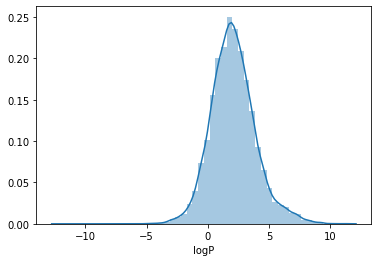

In [67]:
sns.distplot(logp_without_parameters[VALUE_COLUMN])

In [71]:
ranges = [-20, -10, -5, 0, 10, 20, 30, 40, 50]
logp_without_parameters[VALUE_COLUMN].groupby(pd.cut(logp_without_parameters[VALUE_COLUMN], ranges)).count()

logP
(-20, -10]        1
(-10, -5]         1
(-5, 0]        1421
(0, 10]       11433
(10, 20]          3
(20, 30]          0
(30, 40]          0
(40, 50]          0
Name: logP, dtype: int64

In [69]:
logp_dataset_clipped_logp = logp_without_parameters.drop(logp_without_parameters[logp_without_parameters[VALUE_COLUMN]>10].index) 
logp_dataset_clipped_logp = logp_dataset_clipped_logp.drop(logp_dataset_clipped_logp[logp_dataset_clipped_logp[VALUE_COLUMN]<-5].index) 

In [70]:
logp_dataset_clipped_logp.describe()

logP
count  12854.000000
mean       2.064774
std        1.819427
min       -4.650000
25%        0.870000
50%        1.970000
75%        3.120000
max        9.960000

In [72]:
logp_without_parameters = logp_dataset_clipped_logp

## Averaging

In [73]:
duplicates_std = logp_without_parameters.groupby([SMILES_COLUMN]).std().dropna()

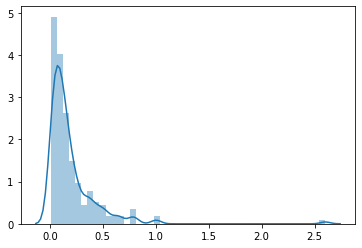

In [74]:
# distribution of std values of duplicates
sns.distplot(duplicates_std)

In [75]:
ranges = [0, 0.1, 0.2, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
duplicates_std[VALUE_COLUMN].groupby(pd.cut(duplicates_std[VALUE_COLUMN], ranges)).count()

logP
(0.0, 0.1]    84
(0.1, 0.2]    56
(0.2, 0.5]    40
(0.5, 1.0]    16
(1.0, 1.5]     1
(1.5, 2.0]     0
(2.0, 2.5]     0
(2.5, 3.0]     1
(3.0, 3.5]     0
Name: logP, dtype: int64

In [76]:
# Number of unique SMILES
len(logp_without_parameters[SMILES_COLUMN].unique())

12628

In [77]:
logP_without_duplicates = logp_without_parameters.drop_duplicates(subset=SMILES_COLUMN)

In [78]:
print('Standard deviation of logP value in the whole dataset without duplicates is', round(logP_without_duplicates[VALUE_COLUMN].std(),2))

Standard deviation of logP value in the whole dataset without duplicates is 1.81


In [79]:
STD_TRESHOLD = 1.0

In [80]:
# Drop 2 SMILES with logP std > 1
logp_small_std = logp_without_parameters[~logp_without_parameters[SMILES_COLUMN].isin(duplicates_std[duplicates_std[VALUE_COLUMN]>=1].index)]

In [81]:
logp_small_std.describe()

logP
count  12850.000000
mean       2.064682
std        1.819485
min       -4.650000
25%        0.870000
50%        1.970000
75%        3.120000
max        9.960000

In [82]:
# Averaging of logP value
logp_dataset = logp_small_std.groupby(SMILES_COLUMN, group_keys=False).apply(lambda x: x[VALUE_COLUMN].mean()).to_frame(name='logP')

In [83]:
logp_dataset.head()

logP
smiles                 
BrC(Br)(Br)Br      3.42
BrC1C2CC3C(C2)C13  3.11
BrC1CC2CCC1C2      3.54
BrC1CCCCC1         3.20
BrC=C(Br)Br        3.20

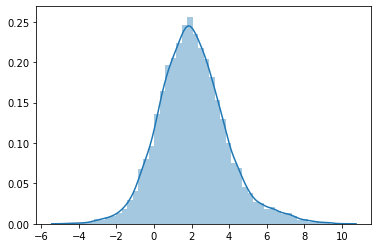

In [85]:
sns.distplot(logp_dataset)

In [87]:
logp_dataset.describe()

logP
count  12626.000000
mean       2.057782
std        1.810431
min       -4.650000
25%        0.870000
50%        1.960000
75%        3.110000
max        9.960000

In [86]:
PROCESSED_PATH = "../data/3_final_data"

logp_dataset.to_csv(os.path.join(PROCESSED_PATH, 'logP_wo_parameters.csv'))